# Machine Learning: Artificial Neural Networks

Instructions
_____________________________

This file contains code that helps you get started. 
You will need to complete the following functions 
 
    - predict.m
    - sigmoidGradient.m
    - randInitializeWeights.m
    - nnCostFunction.m

For this exercise, you will not need to change any code in this file, or any other files other than those mentioned above.

## Import the required packages

In [1]:
import scipy.io
import numpy as np

from predict import predict
from displayData import displayData
from sigmoidGradient import sigmoidGradient
from randInitializeWeights import randInitializeWeights
from nnCostFunction import nnCostFunction
from checkNNGradients import checkNNGradients
from fmincg import fmincg

## Setup the parameters you will use for this exercise

In [2]:
input_layer_size = 400;     # 20x20 Input Images of Digits
hidden_layer_size = 25;     # 25 hidden units
num_labels = 10;            # 10 labels, from 0 to 9   
                            # (note that we have mapped "0" to label 9 to follow
                            # the same structure used in the MatLab version)

# =========== Part 1: Loading and Visualizing Data =============
We start the exercise by first loading and visualizing the dataset. 
You will be working with a dataset that contains handwritten digits.

## Load Training Data

Loading and Visualizing Data ...


E:\SURFDrive\_Maastricht\_DKE\_Teaching\2020-2021\02Machine Learning\Labs\ML Lab 4 - Artificial Neural Network\Jupyter\Initial code\displayData.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.sqrt(data.shape[0]), np.sqrt(data.shape[0]), i+1)


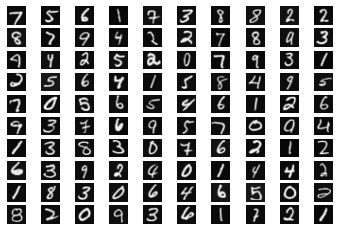

In [3]:
print('Loading and Visualizing Data ...')

mat = scipy.io.loadmat('digitdata.mat')
X = mat['X']
y = mat['y']
y = np.squeeze(y)
m, _ = np.shape(X)

# Randomly select 100 data points to display
sel = np.random.choice(range(X.shape[0]), 100)
sel = X[sel,:]

displayData(sel)

# ================ Part 2: Loading Pameters ================
In this part of the exercise, we load some pre-initialized neural network parameters.

In [4]:
print('Loading Saved Neural Network Parameters ...')

# Load the weights into variables Theta1 and Theta2
mat = scipy.io.loadmat('debugweights.mat');

# Unroll parameters
Theta1 = mat['Theta1']
Theta1_1d = np.reshape(Theta1, Theta1.size, order='F')
Theta2 = mat['Theta2']
Theta2_1d = np.reshape(Theta2, Theta2.size, order='F')

nn_params = np.hstack((Theta1_1d, Theta2_1d))

Loading Saved Neural Network Parameters ...


# ================= Part 3: Implement Predict =================
After training the neural network, we would like to use it to predict the labels. You will now implement the "predict" function to use the neural network to predict the labels of the training set. This lets you compute the training set accuracy.

In [5]:
pred = predict(Theta1, Theta2, X);
print('Training Set Accuracy: ', (pred == y).mean()*100)

Training Set Accuracy:  0.0


##  Testing (you can skip this block)
To give you an idea of the network's output, you can also run through the examples one at the a time to see what it is predicting. Change the value of the show_examples variable to true to view examples.

**NOTE:** to avoid the printing of all the sample instances, you can replace *range(m)* with a small number

0
Displaying Example Image


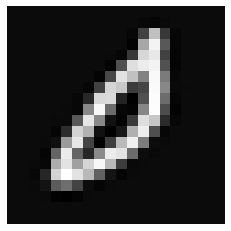

Neural Network Prediction:  [0.] (digit  [0.] )
1
Displaying Example Image


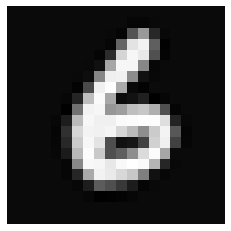

Neural Network Prediction:  [0.] (digit  [0.] )
2
Displaying Example Image


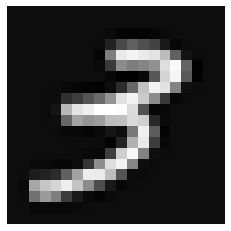

Neural Network Prediction:  [0.] (digit  [0.] )
3
Displaying Example Image


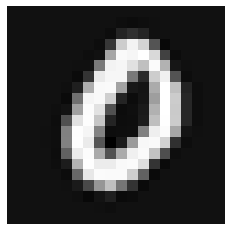

Neural Network Prediction:  [0.] (digit  [0.] )
4
Displaying Example Image


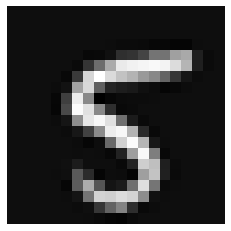

Neural Network Prediction:  [0.] (digit  [0.] )
5
Displaying Example Image


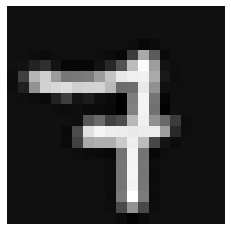

Neural Network Prediction:  [0.] (digit  [0.] )
6
Displaying Example Image


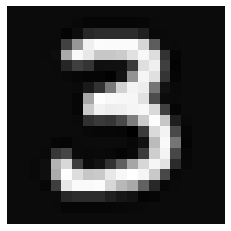

Neural Network Prediction:  [0.] (digit  [0.] )
7
Displaying Example Image


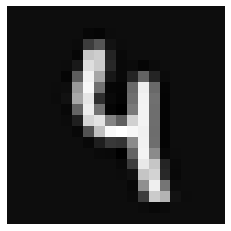

Neural Network Prediction:  [0.] (digit  [0.] )
8
Displaying Example Image


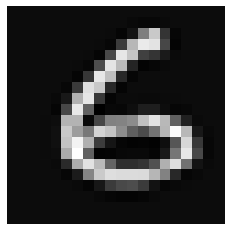

Neural Network Prediction:  [0.] (digit  [0.] )
9
Displaying Example Image


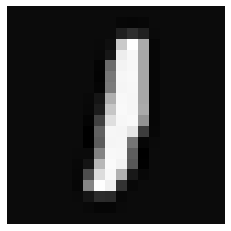

Neural Network Prediction:  [0.] (digit  [0.] )
10
Displaying Example Image


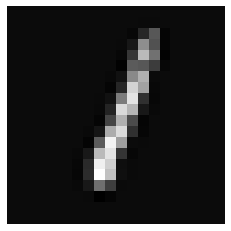

Neural Network Prediction:  [0.] (digit  [0.] )
11
Displaying Example Image


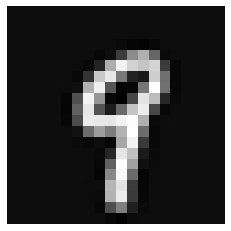

Neural Network Prediction:  [0.] (digit  [0.] )
12
Displaying Example Image


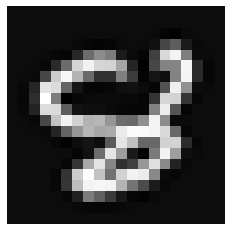

Neural Network Prediction:  [0.] (digit  [0.] )
13
Displaying Example Image


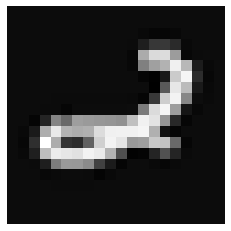

Neural Network Prediction:  [0.] (digit  [0.] )
14
Displaying Example Image


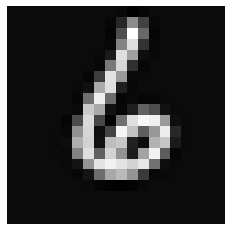

Neural Network Prediction:  [0.] (digit  [0.] )
15
Displaying Example Image


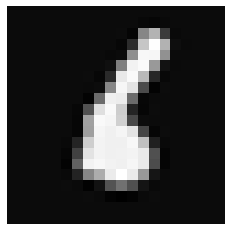

Neural Network Prediction:  [0.] (digit  [0.] )
16
Displaying Example Image


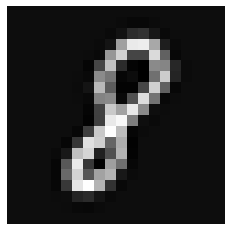

Neural Network Prediction:  [0.] (digit  [0.] )
17
Displaying Example Image


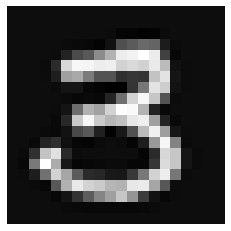

Neural Network Prediction:  [0.] (digit  [0.] )
18
Displaying Example Image


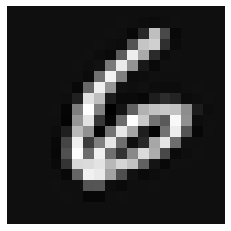

Neural Network Prediction:  [0.] (digit  [0.] )
19
Displaying Example Image


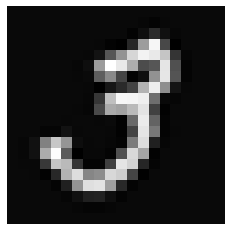

Neural Network Prediction:  [0.] (digit  [0.] )
20
Displaying Example Image


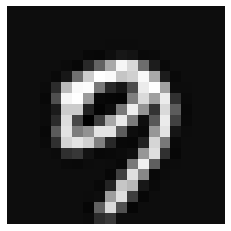

Neural Network Prediction:  [0.] (digit  [0.] )
21
Displaying Example Image


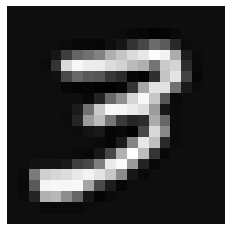

Neural Network Prediction:  [0.] (digit  [0.] )
22
Displaying Example Image


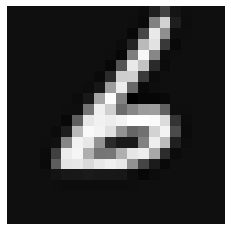

Neural Network Prediction:  [0.] (digit  [0.] )
23
Displaying Example Image


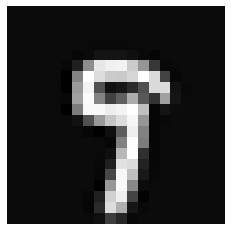

Neural Network Prediction:  [0.] (digit  [0.] )
24
Displaying Example Image


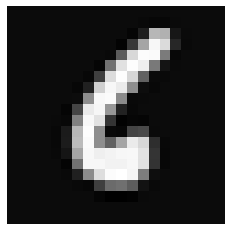

Neural Network Prediction:  [0.] (digit  [0.] )
25
Displaying Example Image


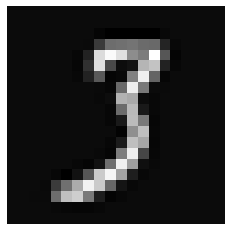

Neural Network Prediction:  [0.] (digit  [0.] )
26
Displaying Example Image


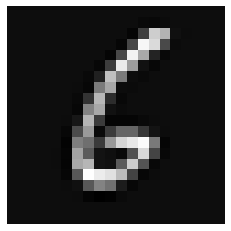

Neural Network Prediction:  [0.] (digit  [0.] )
27
Displaying Example Image


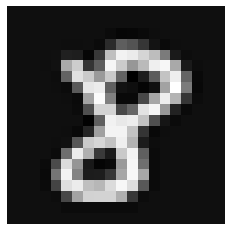

Neural Network Prediction:  [0.] (digit  [0.] )
28
Displaying Example Image


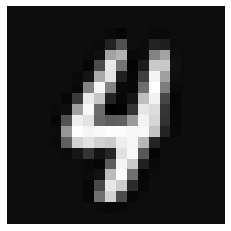

Neural Network Prediction:  [0.] (digit  [0.] )
29
Displaying Example Image


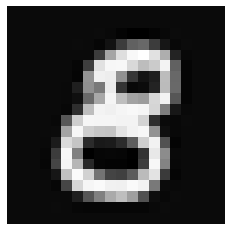

Neural Network Prediction:  [0.] (digit  [0.] )
30
Displaying Example Image


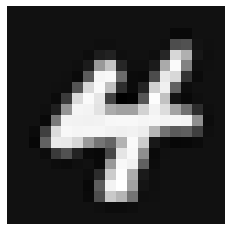

Neural Network Prediction:  [0.] (digit  [0.] )
31
Displaying Example Image


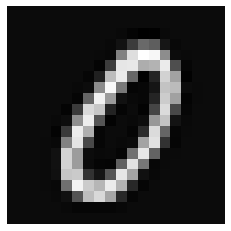

Neural Network Prediction:  [0.] (digit  [0.] )
32
Displaying Example Image


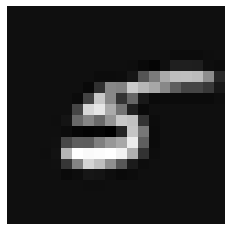

Neural Network Prediction:  [0.] (digit  [0.] )
33
Displaying Example Image


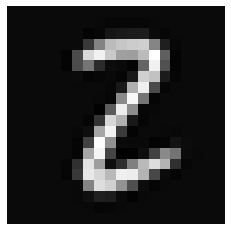

Neural Network Prediction:  [0.] (digit  [0.] )
34
Displaying Example Image


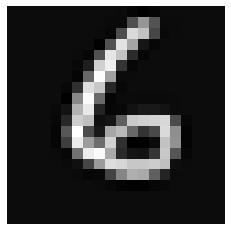

Neural Network Prediction:  [0.] (digit  [0.] )
35
Displaying Example Image


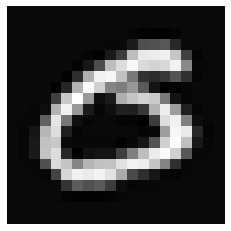

Neural Network Prediction:  [0.] (digit  [0.] )
36
Displaying Example Image


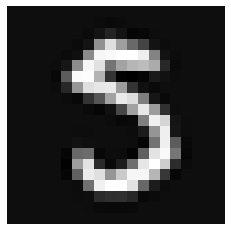

Neural Network Prediction:  [0.] (digit  [0.] )
37
Displaying Example Image


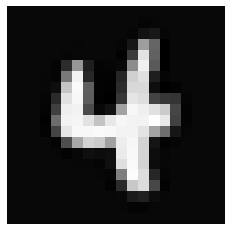

Neural Network Prediction:  [0.] (digit  [0.] )
38
Displaying Example Image


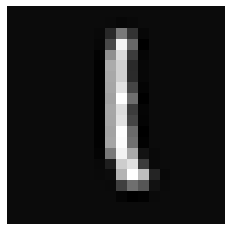

Neural Network Prediction:  [0.] (digit  [0.] )
39
Displaying Example Image


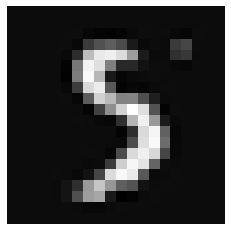

Neural Network Prediction:  [0.] (digit  [0.] )
40
Displaying Example Image


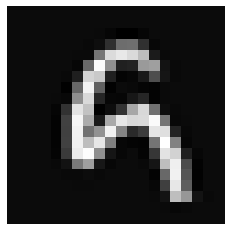

Neural Network Prediction:  [0.] (digit  [0.] )
41
Displaying Example Image


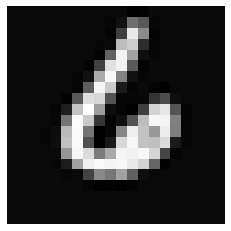

Neural Network Prediction:  [0.] (digit  [0.] )
42
Displaying Example Image


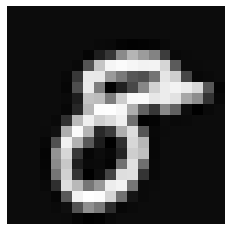

Neural Network Prediction:  [0.] (digit  [0.] )
43
Displaying Example Image


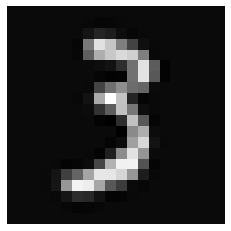

Neural Network Prediction:  [0.] (digit  [0.] )
44
Displaying Example Image


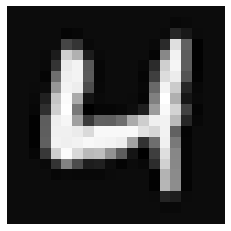

Neural Network Prediction:  [0.] (digit  [0.] )
45
Displaying Example Image


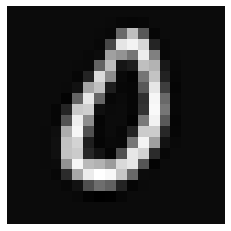

Neural Network Prediction:  [0.] (digit  [0.] )
46
Displaying Example Image


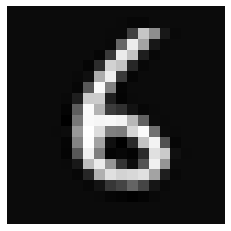

Neural Network Prediction:  [0.] (digit  [0.] )
47
Displaying Example Image


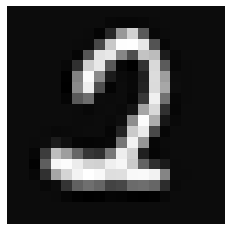

Neural Network Prediction:  [0.] (digit  [0.] )
48
Displaying Example Image


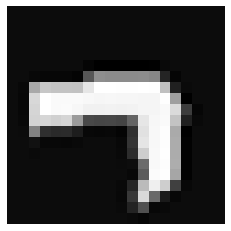

Neural Network Prediction:  [0.] (digit  [0.] )
49
Displaying Example Image


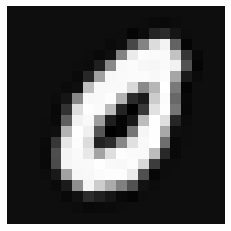

Neural Network Prediction:  [0.] (digit  [0.] )
50
Displaying Example Image


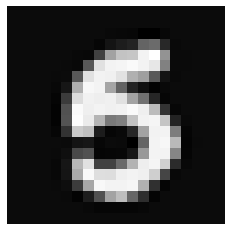

Neural Network Prediction:  [0.] (digit  [0.] )
51
Displaying Example Image


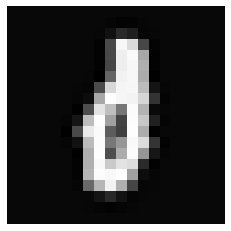

Neural Network Prediction:  [0.] (digit  [0.] )
52
Displaying Example Image


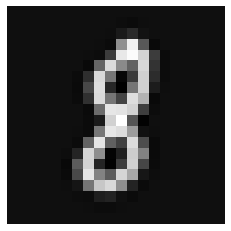

Neural Network Prediction:  [0.] (digit  [0.] )
53
Displaying Example Image


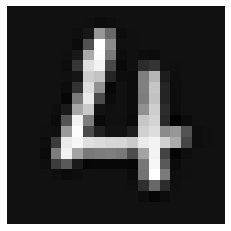

Neural Network Prediction:  [0.] (digit  [0.] )
54
Displaying Example Image


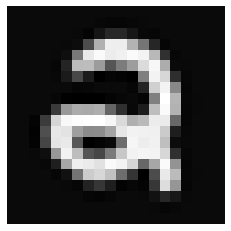

Neural Network Prediction:  [0.] (digit  [0.] )
55
Displaying Example Image


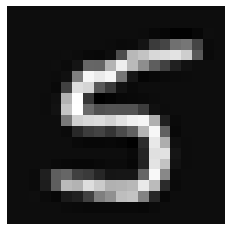

Neural Network Prediction:  [0.] (digit  [0.] )
56
Displaying Example Image


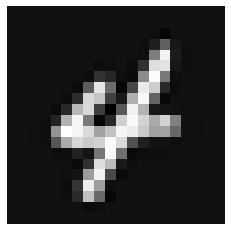

Neural Network Prediction:  [0.] (digit  [0.] )
57
Displaying Example Image


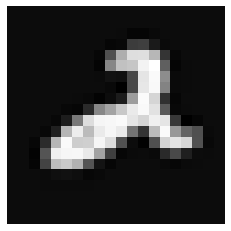

Neural Network Prediction:  [0.] (digit  [0.] )
58
Displaying Example Image


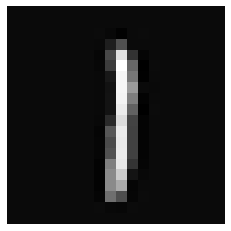

Neural Network Prediction:  [0.] (digit  [0.] )
59
Displaying Example Image


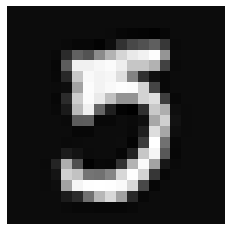

Neural Network Prediction:  [0.] (digit  [0.] )
60
Displaying Example Image


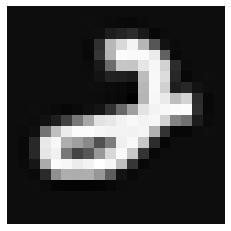

Neural Network Prediction:  [0.] (digit  [0.] )
61
Displaying Example Image


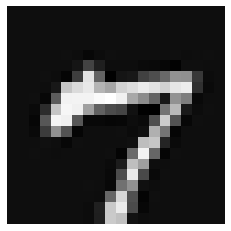

Neural Network Prediction:  [0.] (digit  [0.] )
62
Displaying Example Image


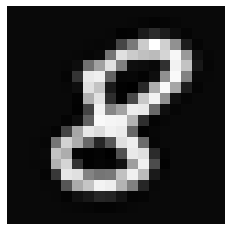

Neural Network Prediction:  [0.] (digit  [0.] )
63
Displaying Example Image


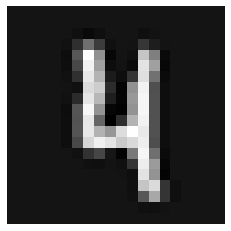

Neural Network Prediction:  [0.] (digit  [0.] )
64
Displaying Example Image


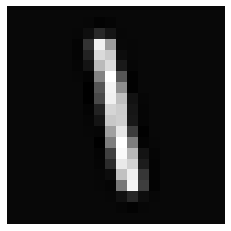

Neural Network Prediction:  [0.] (digit  [0.] )
65
Displaying Example Image


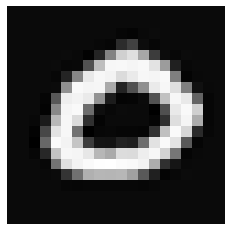

Neural Network Prediction:  [0.] (digit  [0.] )
66
Displaying Example Image


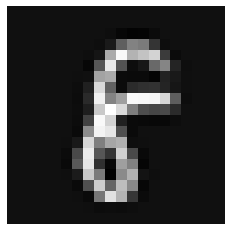

Neural Network Prediction:  [0.] (digit  [0.] )
67
Displaying Example Image


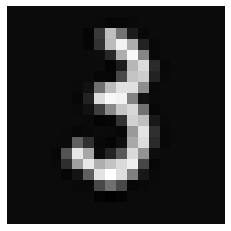

Neural Network Prediction:  [0.] (digit  [0.] )
68
Displaying Example Image


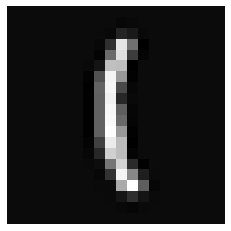

Neural Network Prediction:  [0.] (digit  [0.] )
69
Displaying Example Image


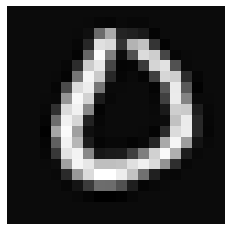

Neural Network Prediction:  [0.] (digit  [0.] )
70
Displaying Example Image


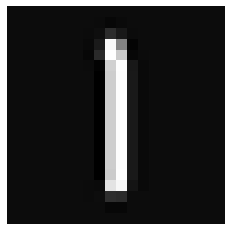

Neural Network Prediction:  [0.] (digit  [0.] )
71
Displaying Example Image


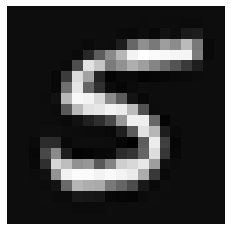

Neural Network Prediction:  [0.] (digit  [0.] )
72
Displaying Example Image


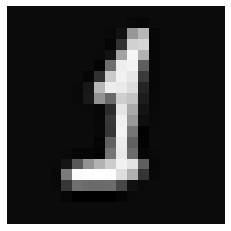

Neural Network Prediction:  [0.] (digit  [0.] )
73
Displaying Example Image


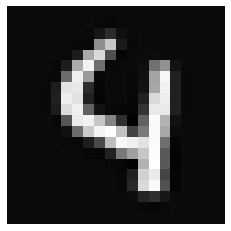

Neural Network Prediction:  [0.] (digit  [0.] )
74
Displaying Example Image


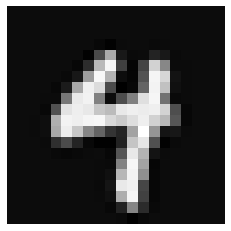

Neural Network Prediction:  [0.] (digit  [0.] )
75
Displaying Example Image


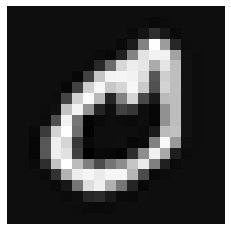

Neural Network Prediction:  [0.] (digit  [0.] )
76
Displaying Example Image


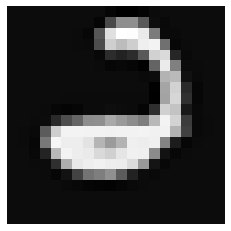

Neural Network Prediction:  [0.] (digit  [0.] )
77
Displaying Example Image


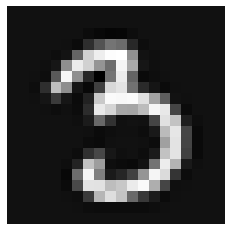

Neural Network Prediction:  [0.] (digit  [0.] )
78
Displaying Example Image


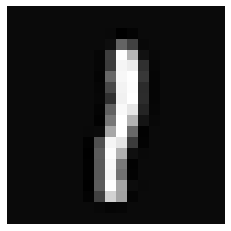

Neural Network Prediction:  [0.] (digit  [0.] )
79
Displaying Example Image


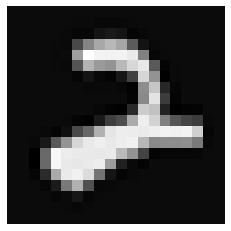

Neural Network Prediction:  [0.] (digit  [0.] )
80
Displaying Example Image


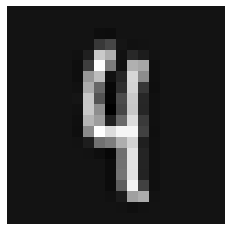

Neural Network Prediction:  [0.] (digit  [0.] )
81
Displaying Example Image


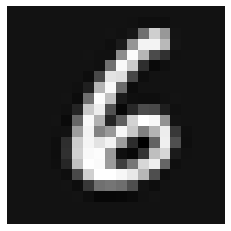

Neural Network Prediction:  [0.] (digit  [0.] )
82
Displaying Example Image


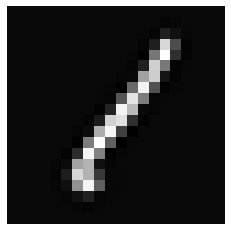

Neural Network Prediction:  [0.] (digit  [0.] )
83
Displaying Example Image


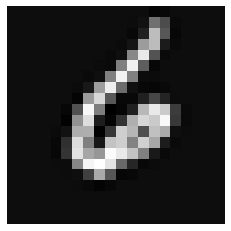

Neural Network Prediction:  [0.] (digit  [0.] )
84
Displaying Example Image


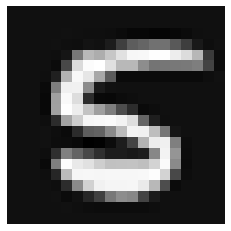

Neural Network Prediction:  [0.] (digit  [0.] )
85
Displaying Example Image


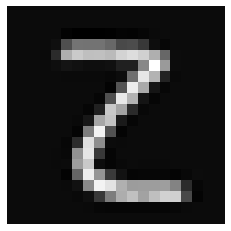

Neural Network Prediction:  [0.] (digit  [0.] )
86
Displaying Example Image


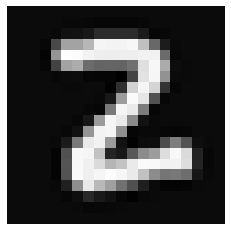

Neural Network Prediction:  [0.] (digit  [0.] )
87
Displaying Example Image


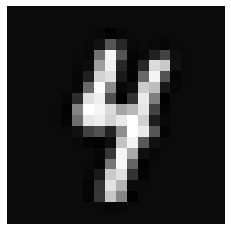

Neural Network Prediction:  [0.] (digit  [0.] )
88
Displaying Example Image


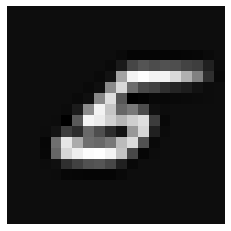

Neural Network Prediction:  [0.] (digit  [0.] )
89
Displaying Example Image


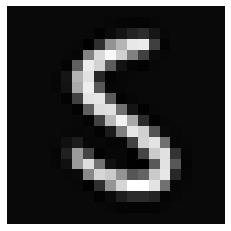

Neural Network Prediction:  [0.] (digit  [0.] )
90
Displaying Example Image


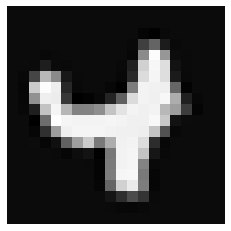

Neural Network Prediction:  [0.] (digit  [0.] )
91
Displaying Example Image


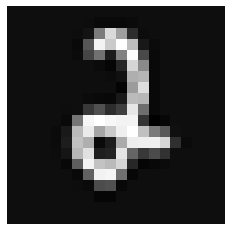

Neural Network Prediction:  [0.] (digit  [0.] )
92
Displaying Example Image


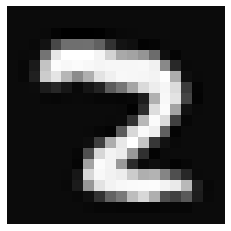

Neural Network Prediction:  [0.] (digit  [0.] )
93
Displaying Example Image


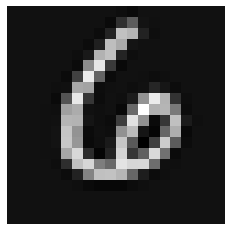

Neural Network Prediction:  [0.] (digit  [0.] )
94
Displaying Example Image


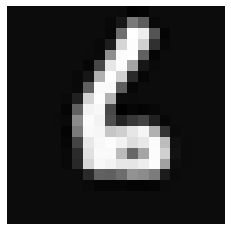

Neural Network Prediction:  [0.] (digit  [0.] )
95
Displaying Example Image


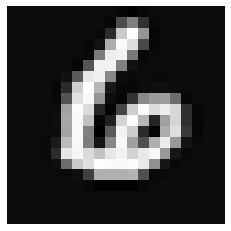

Neural Network Prediction:  [0.] (digit  [0.] )
96
Displaying Example Image


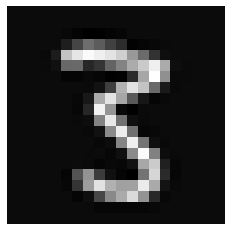

Neural Network Prediction:  [0.] (digit  [0.] )
97
Displaying Example Image


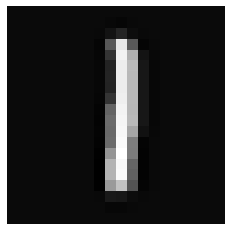

Neural Network Prediction:  [0.] (digit  [0.] )
98
Displaying Example Image


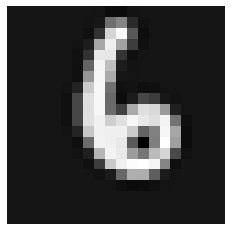

Neural Network Prediction:  [0.] (digit  [0.] )
99
Displaying Example Image


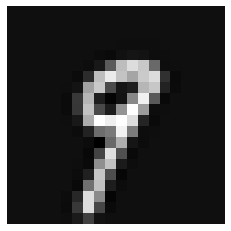

Neural Network Prediction:  [0.] (digit  [0.] )
100
Displaying Example Image


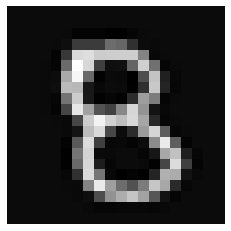

Neural Network Prediction:  [0.] (digit  [0.] )
101
Displaying Example Image


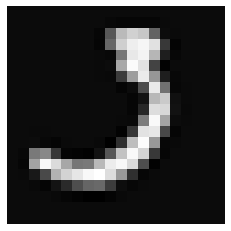

Neural Network Prediction:  [0.] (digit  [0.] )
102
Displaying Example Image


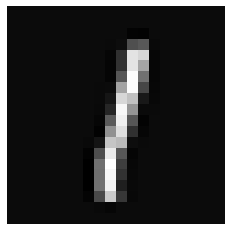

Neural Network Prediction:  [0.] (digit  [0.] )
103
Displaying Example Image


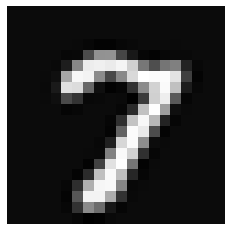

Neural Network Prediction:  [0.] (digit  [0.] )
104
Displaying Example Image


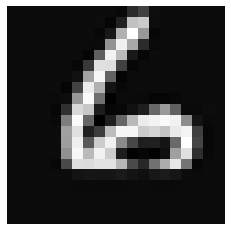

Neural Network Prediction:  [0.] (digit  [0.] )
105
Displaying Example Image


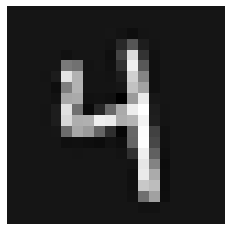

Neural Network Prediction:  [0.] (digit  [0.] )
106
Displaying Example Image


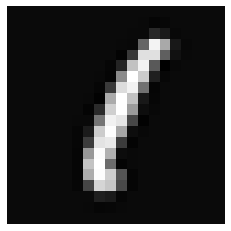

Neural Network Prediction:  [0.] (digit  [0.] )
107
Displaying Example Image


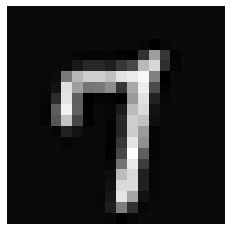

Neural Network Prediction:  [0.] (digit  [0.] )
108
Displaying Example Image


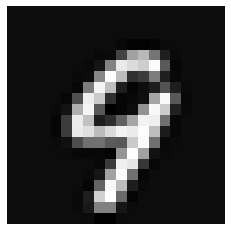

Neural Network Prediction:  [0.] (digit  [0.] )
109
Displaying Example Image


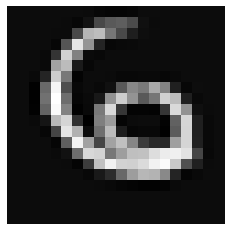

Neural Network Prediction:  [0.] (digit  [0.] )
110
Displaying Example Image


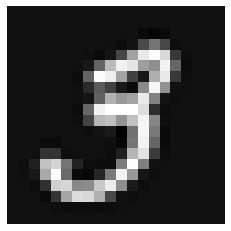

Neural Network Prediction:  [0.] (digit  [0.] )
111
Displaying Example Image


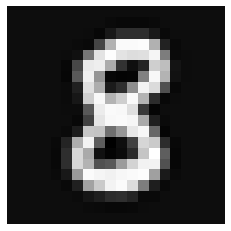

Neural Network Prediction:  [0.] (digit  [0.] )
112
Displaying Example Image


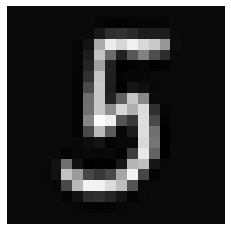

Neural Network Prediction:  [0.] (digit  [0.] )
113
Displaying Example Image


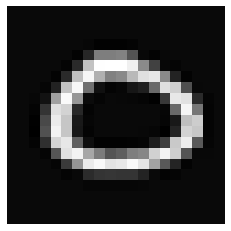

Neural Network Prediction:  [0.] (digit  [0.] )
114
Displaying Example Image


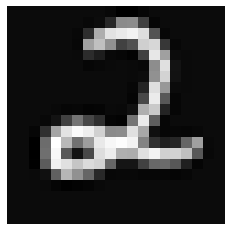

Neural Network Prediction:  [0.] (digit  [0.] )
115
Displaying Example Image


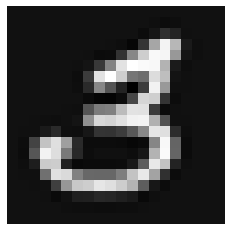

Neural Network Prediction:  [0.] (digit  [0.] )
116
Displaying Example Image


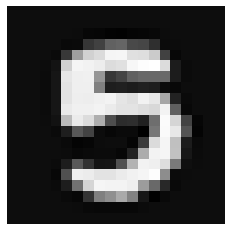

Neural Network Prediction:  [0.] (digit  [0.] )
117
Displaying Example Image


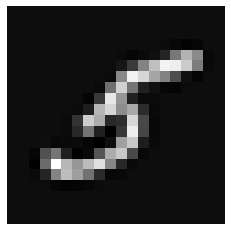

Neural Network Prediction:  [0.] (digit  [0.] )
118
Displaying Example Image


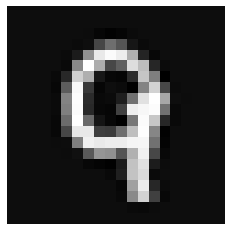

Neural Network Prediction:  [0.] (digit  [0.] )
119
Displaying Example Image


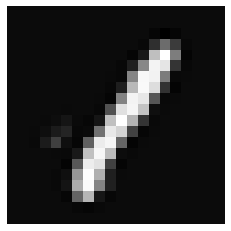

Neural Network Prediction:  [0.] (digit  [0.] )
120
Displaying Example Image


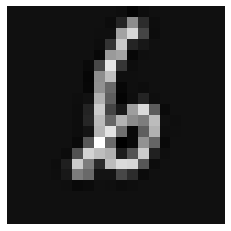

Neural Network Prediction:  [0.] (digit  [0.] )
121
Displaying Example Image


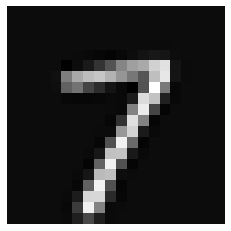

Neural Network Prediction:  [0.] (digit  [0.] )
122
Displaying Example Image


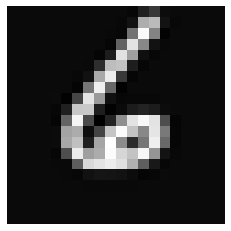

Neural Network Prediction:  [0.] (digit  [0.] )
123
Displaying Example Image


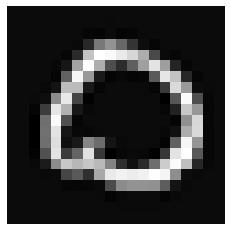

Neural Network Prediction:  [0.] (digit  [0.] )
124
Displaying Example Image


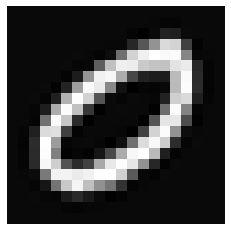

Neural Network Prediction:  [0.] (digit  [0.] )
125
Displaying Example Image


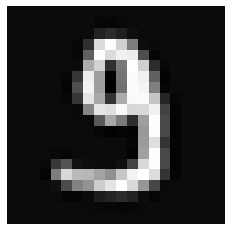

Neural Network Prediction:  [0.] (digit  [0.] )
126
Displaying Example Image


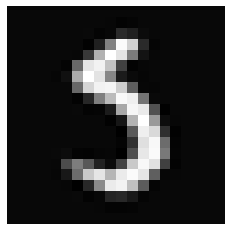

Neural Network Prediction:  [0.] (digit  [0.] )
127
Displaying Example Image


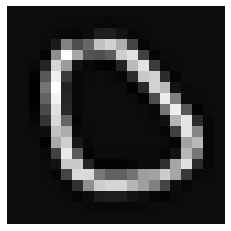

Neural Network Prediction:  [0.] (digit  [0.] )
128
Displaying Example Image


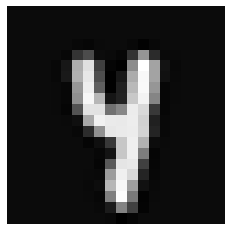

Neural Network Prediction:  [0.] (digit  [0.] )
129
Displaying Example Image


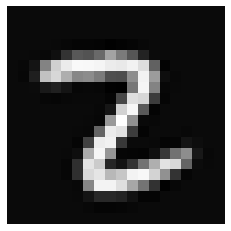

Neural Network Prediction:  [0.] (digit  [0.] )
130
Displaying Example Image


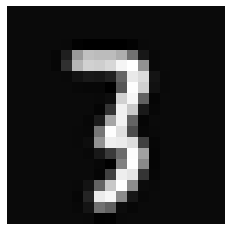

Neural Network Prediction:  [0.] (digit  [0.] )
131
Displaying Example Image


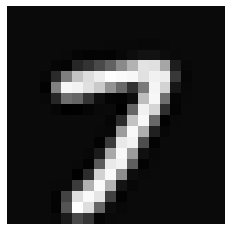

Neural Network Prediction:  [0.] (digit  [0.] )
132
Displaying Example Image


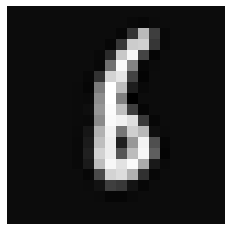

Neural Network Prediction:  [0.] (digit  [0.] )
133
Displaying Example Image


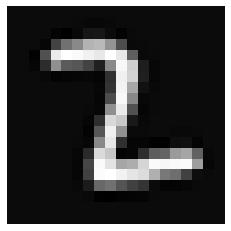

Neural Network Prediction:  [0.] (digit  [0.] )
134
Displaying Example Image


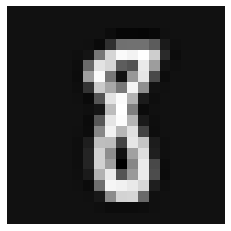

Neural Network Prediction:  [0.] (digit  [0.] )
135
Displaying Example Image


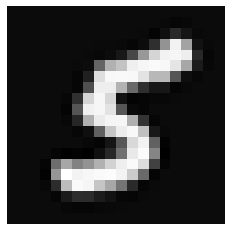

Neural Network Prediction:  [0.] (digit  [0.] )
136
Displaying Example Image


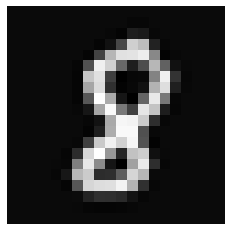

Neural Network Prediction:  [0.] (digit  [0.] )
137
Displaying Example Image


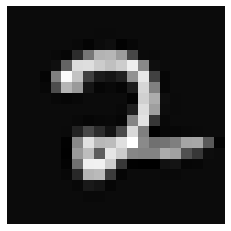

Neural Network Prediction:  [0.] (digit  [0.] )
138
Displaying Example Image


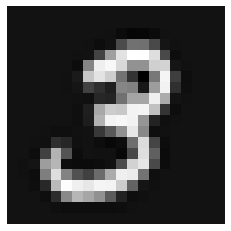

Neural Network Prediction:  [0.] (digit  [0.] )
139
Displaying Example Image


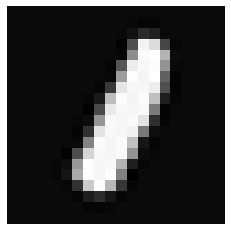

Neural Network Prediction:  [0.] (digit  [0.] )
140
Displaying Example Image


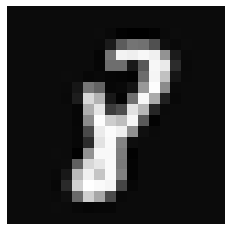

Neural Network Prediction:  [0.] (digit  [0.] )
141
Displaying Example Image


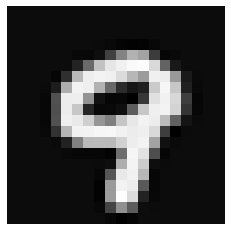

Neural Network Prediction:  [0.] (digit  [0.] )
142
Displaying Example Image


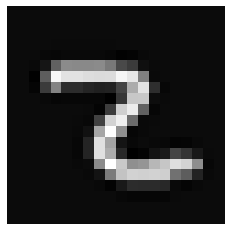

Neural Network Prediction:  [0.] (digit  [0.] )
143
Displaying Example Image


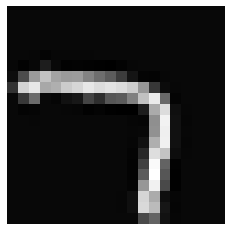

Neural Network Prediction:  [0.] (digit  [0.] )
144
Displaying Example Image


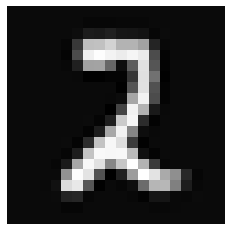

Neural Network Prediction:  [0.] (digit  [0.] )
145
Displaying Example Image


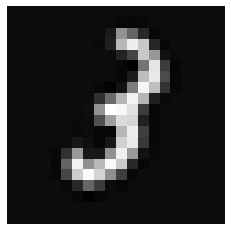

Neural Network Prediction:  [0.] (digit  [0.] )
146
Displaying Example Image


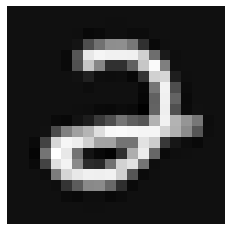

Neural Network Prediction:  [0.] (digit  [0.] )
147
Displaying Example Image


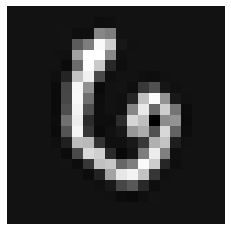

Neural Network Prediction:  [0.] (digit  [0.] )
148
Displaying Example Image


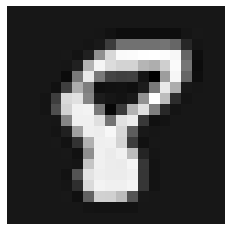

Neural Network Prediction:  [0.] (digit  [0.] )
149
Displaying Example Image


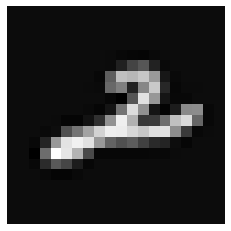

Neural Network Prediction:  [0.] (digit  [0.] )
150
Displaying Example Image


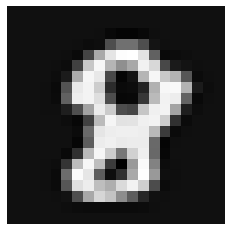

Neural Network Prediction:  [0.] (digit  [0.] )
151
Displaying Example Image


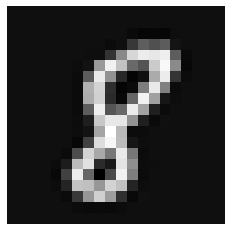

Neural Network Prediction:  [0.] (digit  [0.] )
152
Displaying Example Image


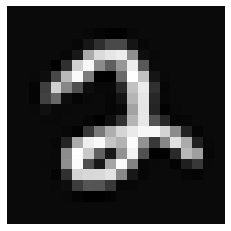

Neural Network Prediction:  [0.] (digit  [0.] )
153
Displaying Example Image


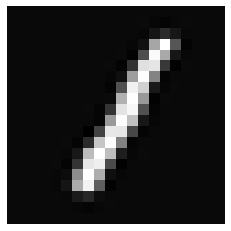

Neural Network Prediction:  [0.] (digit  [0.] )
154
Displaying Example Image


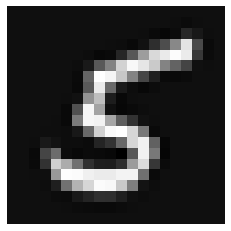

Neural Network Prediction:  [0.] (digit  [0.] )
155
Displaying Example Image


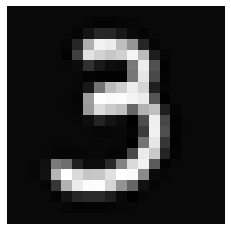

Neural Network Prediction:  [0.] (digit  [0.] )
156
Displaying Example Image


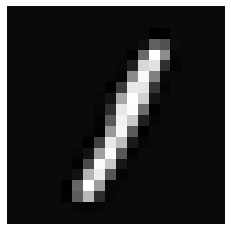

Neural Network Prediction:  [0.] (digit  [0.] )
157
Displaying Example Image


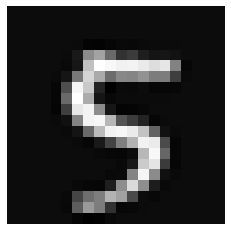

Neural Network Prediction:  [0.] (digit  [0.] )
158
Displaying Example Image


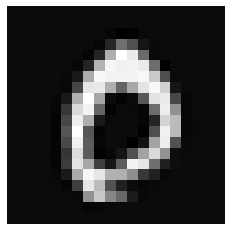

Neural Network Prediction:  [0.] (digit  [0.] )
159
Displaying Example Image


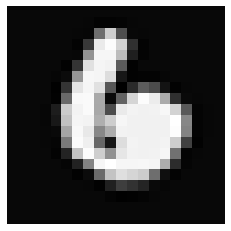

Neural Network Prediction:  [0.] (digit  [0.] )
160
Displaying Example Image


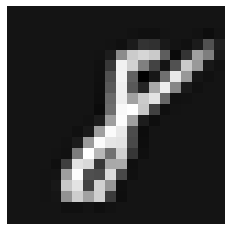

Neural Network Prediction:  [0.] (digit  [0.] )
161
Displaying Example Image


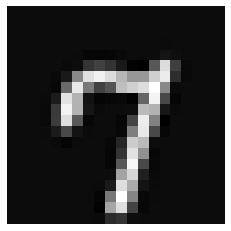

Neural Network Prediction:  [0.] (digit  [0.] )
162
Displaying Example Image


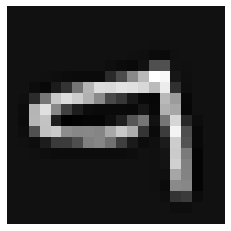

Neural Network Prediction:  [0.] (digit  [0.] )
163
Displaying Example Image


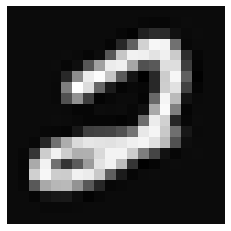

Neural Network Prediction:  [0.] (digit  [0.] )
164
Displaying Example Image


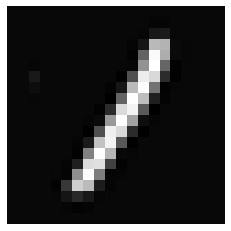

Neural Network Prediction:  [0.] (digit  [0.] )
165
Displaying Example Image


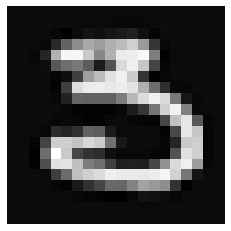

Neural Network Prediction:  [0.] (digit  [0.] )
166
Displaying Example Image


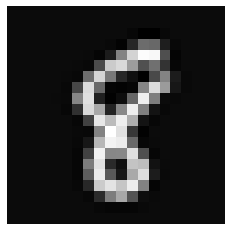

Neural Network Prediction:  [0.] (digit  [0.] )
167
Displaying Example Image


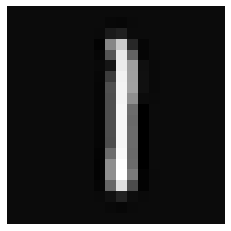

Neural Network Prediction:  [0.] (digit  [0.] )
168
Displaying Example Image


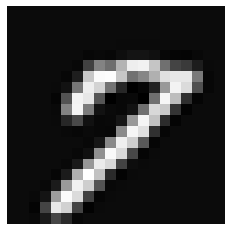

Neural Network Prediction:  [0.] (digit  [0.] )
169
Displaying Example Image


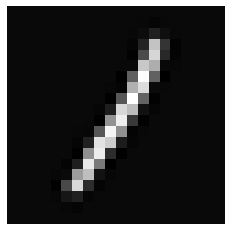

Neural Network Prediction:  [0.] (digit  [0.] )
170
Displaying Example Image


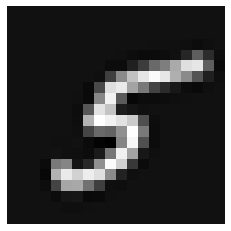

Neural Network Prediction:  [0.] (digit  [0.] )
171
Displaying Example Image


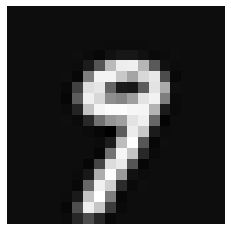

Neural Network Prediction:  [0.] (digit  [0.] )
172
Displaying Example Image


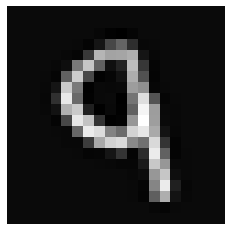

Neural Network Prediction:  [0.] (digit  [0.] )
173
Displaying Example Image


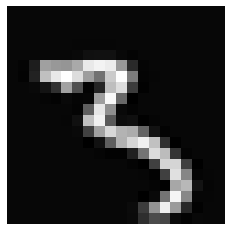

Neural Network Prediction:  [0.] (digit  [0.] )
174
Displaying Example Image


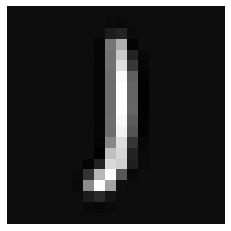

Neural Network Prediction:  [0.] (digit  [0.] )
175
Displaying Example Image


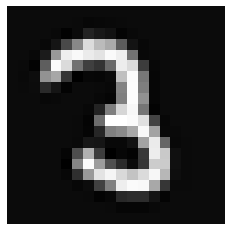

Neural Network Prediction:  [0.] (digit  [0.] )
176
Displaying Example Image


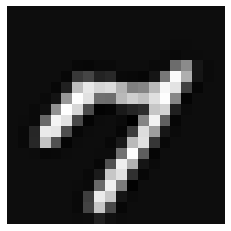

Neural Network Prediction:  [0.] (digit  [0.] )
177
Displaying Example Image


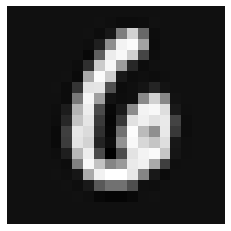

Neural Network Prediction:  [0.] (digit  [0.] )
178
Displaying Example Image


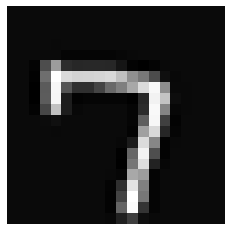

Neural Network Prediction:  [0.] (digit  [0.] )
179
Displaying Example Image


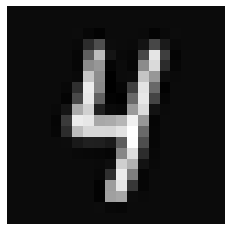

Neural Network Prediction:  [0.] (digit  [0.] )
180
Displaying Example Image


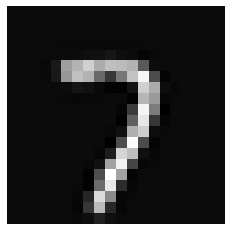

Neural Network Prediction:  [0.] (digit  [0.] )
181
Displaying Example Image


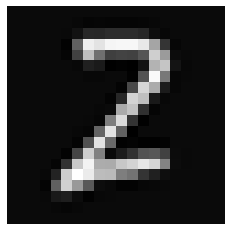

Neural Network Prediction:  [0.] (digit  [0.] )
182
Displaying Example Image


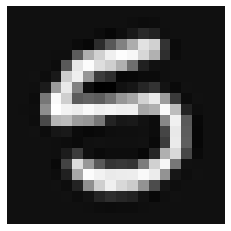

Neural Network Prediction:  [0.] (digit  [0.] )
183
Displaying Example Image


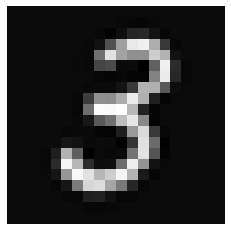

Neural Network Prediction:  [0.] (digit  [0.] )
184
Displaying Example Image


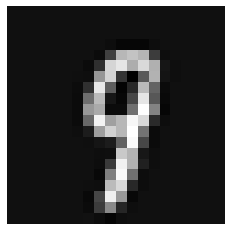

Neural Network Prediction:  [0.] (digit  [0.] )
185
Displaying Example Image


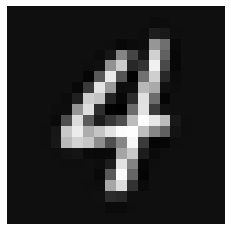

Neural Network Prediction:  [0.] (digit  [0.] )
186
Displaying Example Image


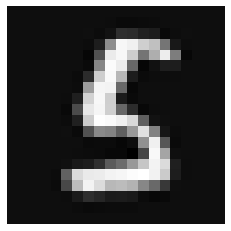

Neural Network Prediction:  [0.] (digit  [0.] )
187
Displaying Example Image


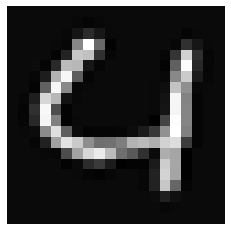

Neural Network Prediction:  [0.] (digit  [0.] )
188
Displaying Example Image


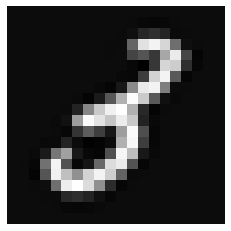

Neural Network Prediction:  [0.] (digit  [0.] )
189
Displaying Example Image


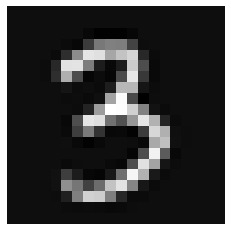

Neural Network Prediction:  [0.] (digit  [0.] )
190
Displaying Example Image


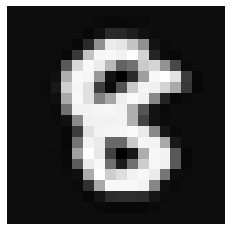

Neural Network Prediction:  [0.] (digit  [0.] )
191
Displaying Example Image


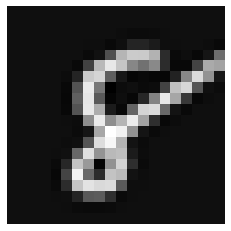

Neural Network Prediction:  [0.] (digit  [0.] )
192
Displaying Example Image


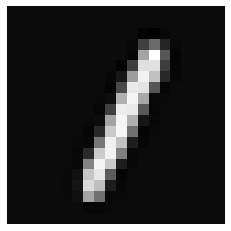

Neural Network Prediction:  [0.] (digit  [0.] )
193
Displaying Example Image


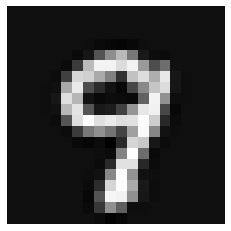

Neural Network Prediction:  [0.] (digit  [0.] )
194
Displaying Example Image


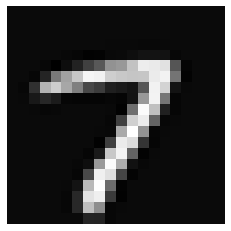

Neural Network Prediction:  [0.] (digit  [0.] )
195
Displaying Example Image


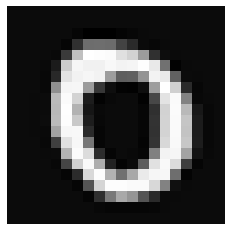

Neural Network Prediction:  [0.] (digit  [0.] )
196
Displaying Example Image


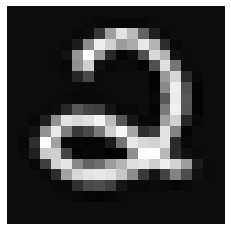

Neural Network Prediction:  [0.] (digit  [0.] )
197
Displaying Example Image


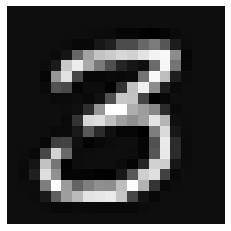

Neural Network Prediction:  [0.] (digit  [0.] )
198
Displaying Example Image


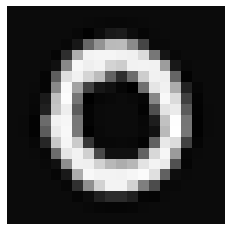

Neural Network Prediction:  [0.] (digit  [0.] )
199
Displaying Example Image


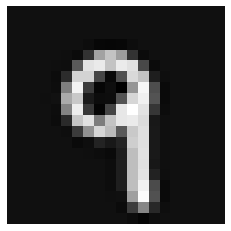

Neural Network Prediction:  [0.] (digit  [0.] )
200
Displaying Example Image


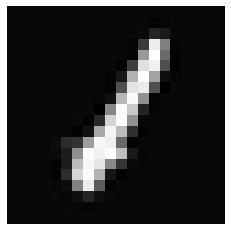

Neural Network Prediction:  [0.] (digit  [0.] )
201
Displaying Example Image


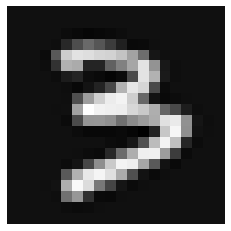

Neural Network Prediction:  [0.] (digit  [0.] )
202
Displaying Example Image


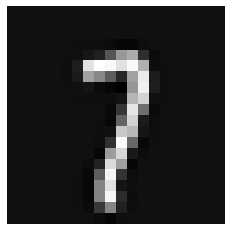

Neural Network Prediction:  [0.] (digit  [0.] )
203
Displaying Example Image


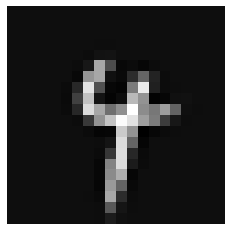

Neural Network Prediction:  [0.] (digit  [0.] )
204
Displaying Example Image


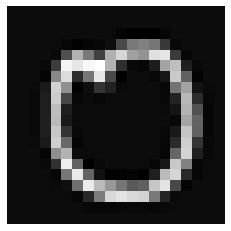

Neural Network Prediction:  [0.] (digit  [0.] )
205
Displaying Example Image


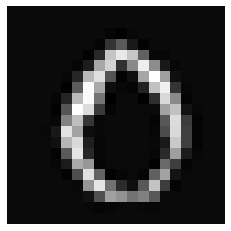

Neural Network Prediction:  [0.] (digit  [0.] )
206
Displaying Example Image


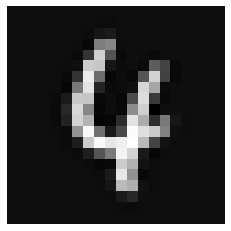

Neural Network Prediction:  [0.] (digit  [0.] )
207
Displaying Example Image


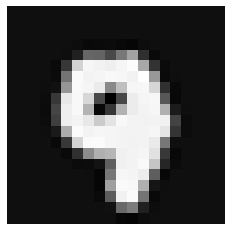

Neural Network Prediction:  [0.] (digit  [0.] )
208
Displaying Example Image


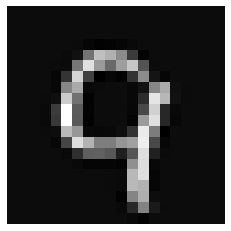

Neural Network Prediction:  [0.] (digit  [0.] )
209
Displaying Example Image


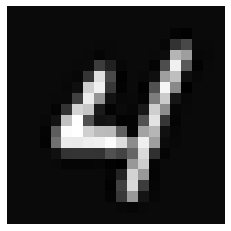

Neural Network Prediction:  [0.] (digit  [0.] )
210
Displaying Example Image


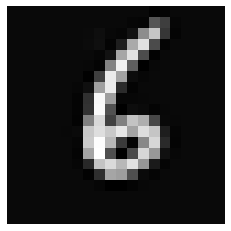

Neural Network Prediction:  [0.] (digit  [0.] )
211
Displaying Example Image


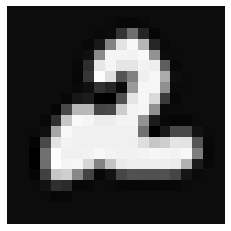

Neural Network Prediction:  [0.] (digit  [0.] )
212
Displaying Example Image


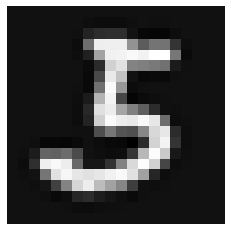

Neural Network Prediction:  [0.] (digit  [0.] )
213
Displaying Example Image


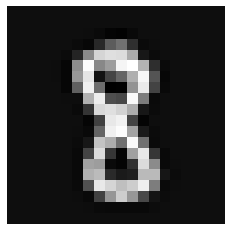

Neural Network Prediction:  [0.] (digit  [0.] )
214
Displaying Example Image


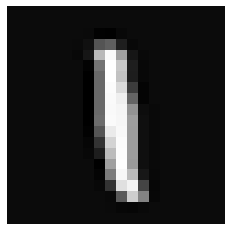

Neural Network Prediction:  [0.] (digit  [0.] )
215
Displaying Example Image


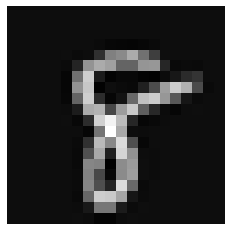

Neural Network Prediction:  [0.] (digit  [0.] )
216
Displaying Example Image


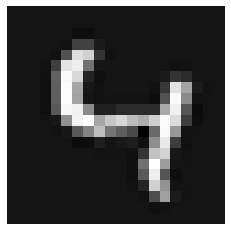

Neural Network Prediction:  [0.] (digit  [0.] )
217
Displaying Example Image


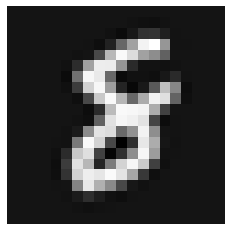

Neural Network Prediction:  [0.] (digit  [0.] )
218
Displaying Example Image


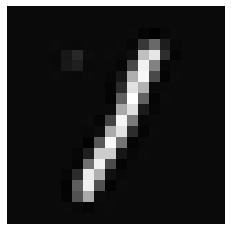

Neural Network Prediction:  [0.] (digit  [0.] )
219
Displaying Example Image


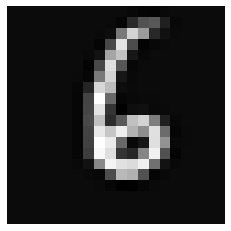

Neural Network Prediction:  [0.] (digit  [0.] )
220
Displaying Example Image


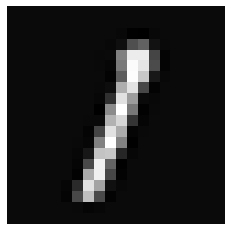

Neural Network Prediction:  [0.] (digit  [0.] )
221
Displaying Example Image


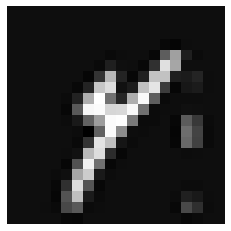

Neural Network Prediction:  [0.] (digit  [0.] )
222
Displaying Example Image


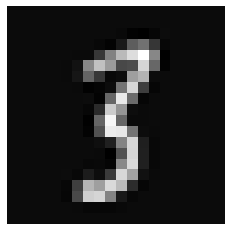

Neural Network Prediction:  [0.] (digit  [0.] )
223
Displaying Example Image


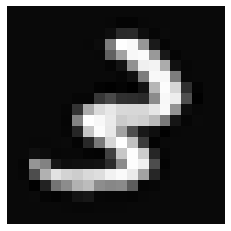

Neural Network Prediction:  [0.] (digit  [0.] )
224
Displaying Example Image


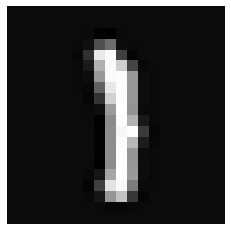

Neural Network Prediction:  [0.] (digit  [0.] )
225
Displaying Example Image


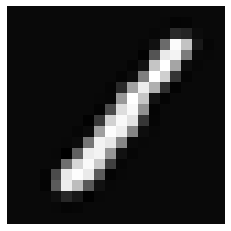

Neural Network Prediction:  [0.] (digit  [0.] )
226
Displaying Example Image


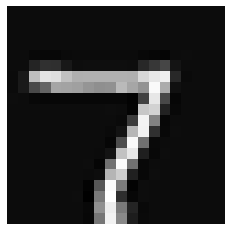

Neural Network Prediction:  [0.] (digit  [0.] )
227
Displaying Example Image


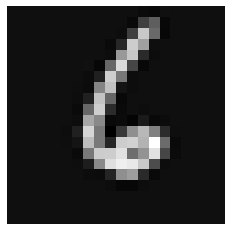

Neural Network Prediction:  [0.] (digit  [0.] )
228
Displaying Example Image


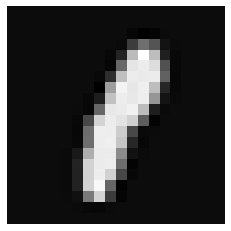

Neural Network Prediction:  [0.] (digit  [0.] )
229
Displaying Example Image


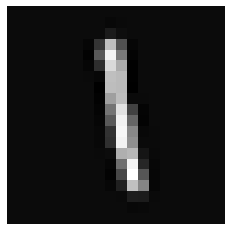

Neural Network Prediction:  [0.] (digit  [0.] )
230
Displaying Example Image


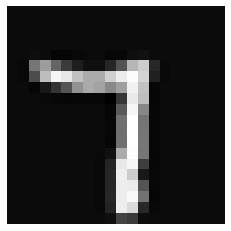

Neural Network Prediction:  [0.] (digit  [0.] )
231
Displaying Example Image


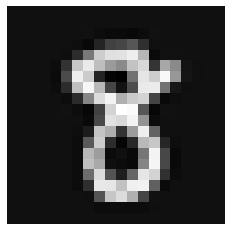

Neural Network Prediction:  [0.] (digit  [0.] )
232
Displaying Example Image


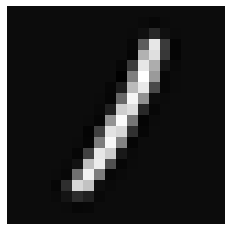

Neural Network Prediction:  [0.] (digit  [0.] )
233
Displaying Example Image


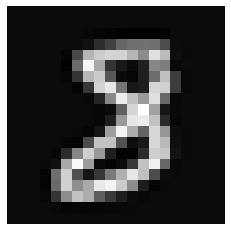

Neural Network Prediction:  [0.] (digit  [0.] )
234
Displaying Example Image


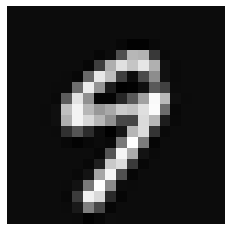

Neural Network Prediction:  [0.] (digit  [0.] )
235
Displaying Example Image


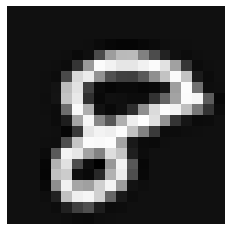

Neural Network Prediction:  [0.] (digit  [0.] )
236
Displaying Example Image


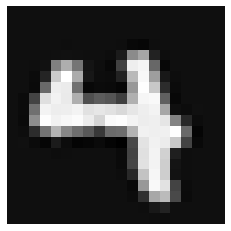

Neural Network Prediction:  [0.] (digit  [0.] )
237
Displaying Example Image


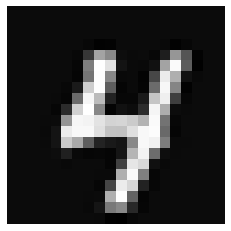

Neural Network Prediction:  [0.] (digit  [0.] )
238
Displaying Example Image


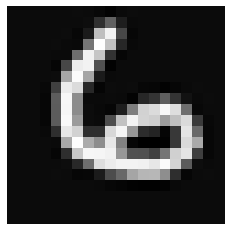

Neural Network Prediction:  [0.] (digit  [0.] )
239
Displaying Example Image


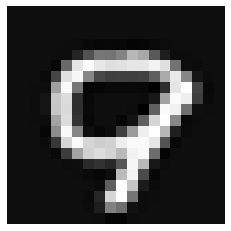

Neural Network Prediction:  [0.] (digit  [0.] )
240
Displaying Example Image


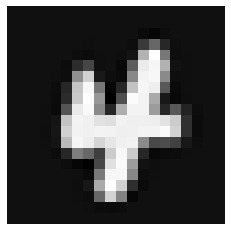

Neural Network Prediction:  [0.] (digit  [0.] )
241
Displaying Example Image


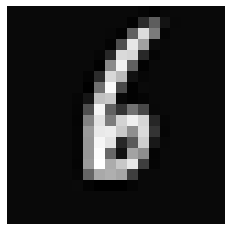

Neural Network Prediction:  [0.] (digit  [0.] )
242
Displaying Example Image


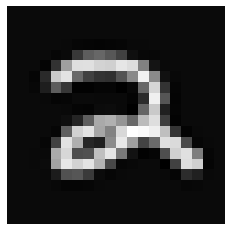

Neural Network Prediction:  [0.] (digit  [0.] )
243
Displaying Example Image


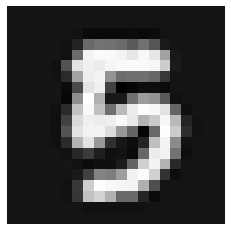

Neural Network Prediction:  [0.] (digit  [0.] )
244
Displaying Example Image


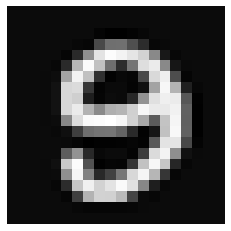

Neural Network Prediction:  [0.] (digit  [0.] )
245
Displaying Example Image


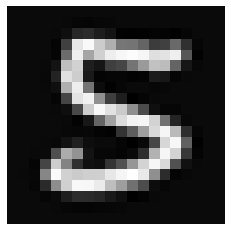

Neural Network Prediction:  [0.] (digit  [0.] )
246
Displaying Example Image


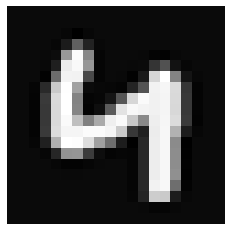

Neural Network Prediction:  [0.] (digit  [0.] )
247
Displaying Example Image


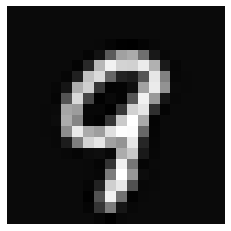

Neural Network Prediction:  [0.] (digit  [0.] )
248
Displaying Example Image


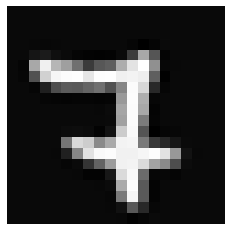

Neural Network Prediction:  [0.] (digit  [0.] )
249
Displaying Example Image


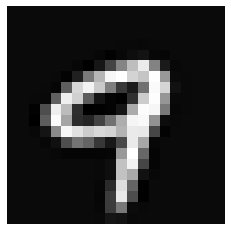

Neural Network Prediction:  [0.] (digit  [0.] )
250
Displaying Example Image


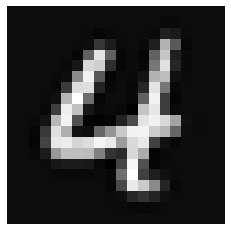

Neural Network Prediction:  [0.] (digit  [0.] )
251
Displaying Example Image


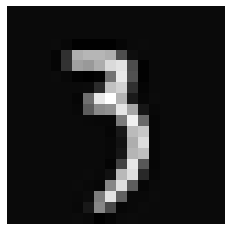

Neural Network Prediction:  [0.] (digit  [0.] )
252
Displaying Example Image


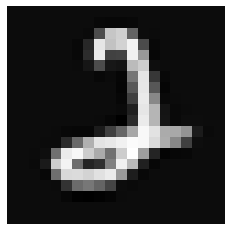

Neural Network Prediction:  [0.] (digit  [0.] )
253
Displaying Example Image


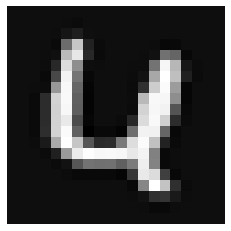

Neural Network Prediction:  [0.] (digit  [0.] )
254
Displaying Example Image


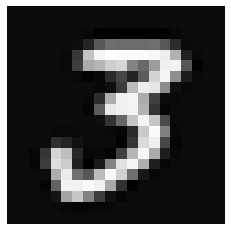

Neural Network Prediction:  [0.] (digit  [0.] )
255
Displaying Example Image


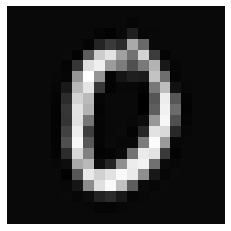

Neural Network Prediction:  [0.] (digit  [0.] )
256
Displaying Example Image


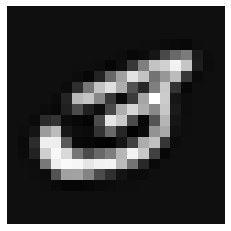

Neural Network Prediction:  [0.] (digit  [0.] )
257
Displaying Example Image


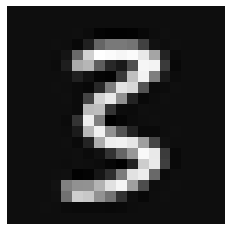

Neural Network Prediction:  [0.] (digit  [0.] )
258
Displaying Example Image


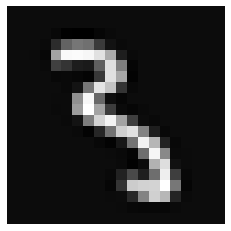

Neural Network Prediction:  [0.] (digit  [0.] )
259
Displaying Example Image


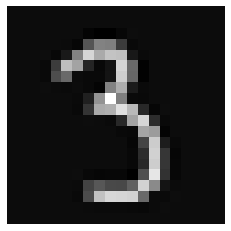

Neural Network Prediction:  [0.] (digit  [0.] )
260
Displaying Example Image


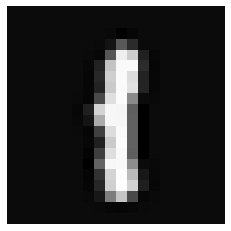

Neural Network Prediction:  [0.] (digit  [0.] )
261
Displaying Example Image


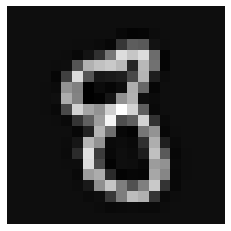

Neural Network Prediction:  [0.] (digit  [0.] )
262
Displaying Example Image


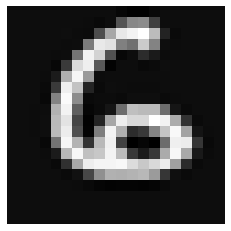

Neural Network Prediction:  [0.] (digit  [0.] )
263
Displaying Example Image


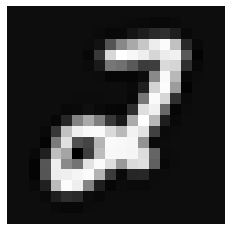

Neural Network Prediction:  [0.] (digit  [0.] )
264
Displaying Example Image


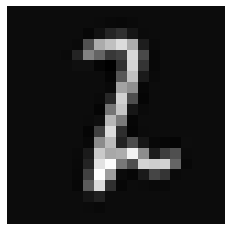

Neural Network Prediction:  [0.] (digit  [0.] )
265
Displaying Example Image


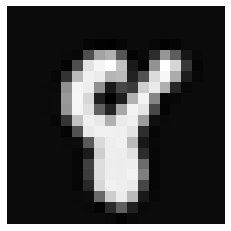

Neural Network Prediction:  [0.] (digit  [0.] )
266
Displaying Example Image


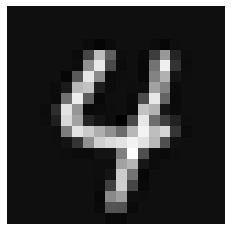

Neural Network Prediction:  [0.] (digit  [0.] )
267
Displaying Example Image


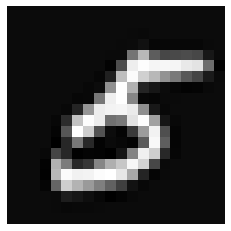

Neural Network Prediction:  [0.] (digit  [0.] )
268
Displaying Example Image


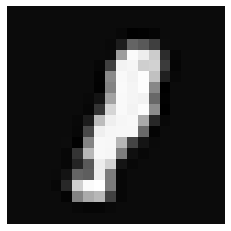

Neural Network Prediction:  [0.] (digit  [0.] )
269
Displaying Example Image


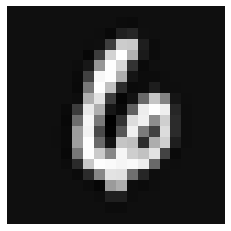

Neural Network Prediction:  [0.] (digit  [0.] )
270
Displaying Example Image


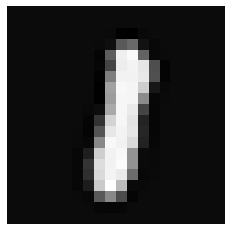

Neural Network Prediction:  [0.] (digit  [0.] )
271
Displaying Example Image


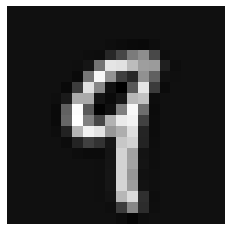

Neural Network Prediction:  [0.] (digit  [0.] )
272
Displaying Example Image


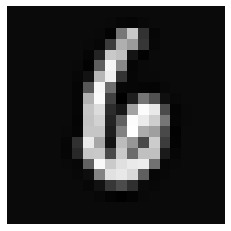

Neural Network Prediction:  [0.] (digit  [0.] )
273
Displaying Example Image


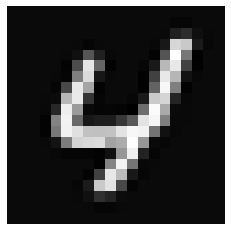

Neural Network Prediction:  [0.] (digit  [0.] )
274
Displaying Example Image


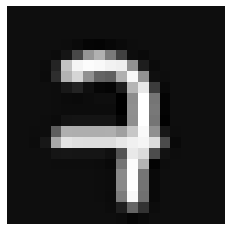

Neural Network Prediction:  [0.] (digit  [0.] )
275
Displaying Example Image


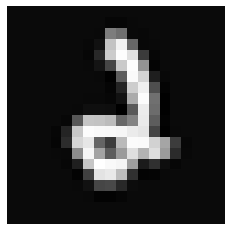

Neural Network Prediction:  [0.] (digit  [0.] )
276
Displaying Example Image


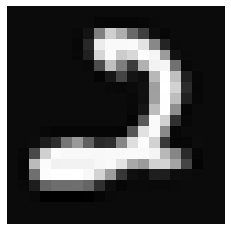

Neural Network Prediction:  [0.] (digit  [0.] )
277
Displaying Example Image


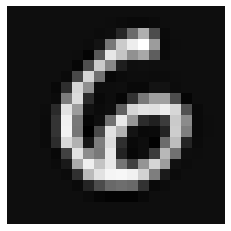

Neural Network Prediction:  [0.] (digit  [0.] )
278
Displaying Example Image


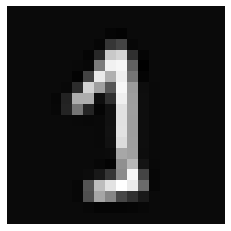

Neural Network Prediction:  [0.] (digit  [0.] )
279
Displaying Example Image


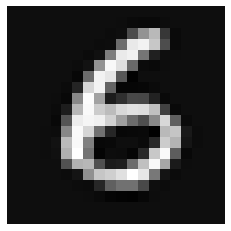

Neural Network Prediction:  [0.] (digit  [0.] )
280
Displaying Example Image


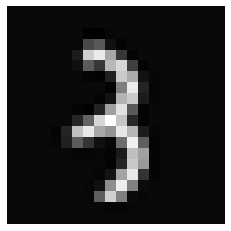

Neural Network Prediction:  [0.] (digit  [0.] )
281
Displaying Example Image


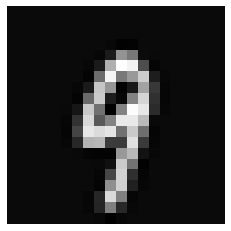

Neural Network Prediction:  [0.] (digit  [0.] )
282
Displaying Example Image


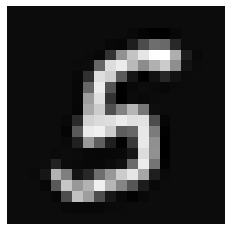

Neural Network Prediction:  [0.] (digit  [0.] )
283
Displaying Example Image


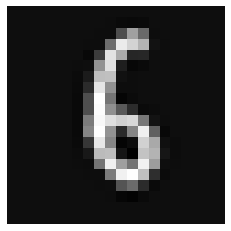

Neural Network Prediction:  [0.] (digit  [0.] )
284
Displaying Example Image


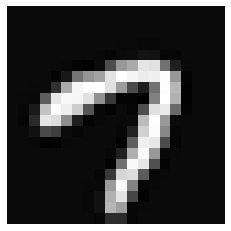

Neural Network Prediction:  [0.] (digit  [0.] )
285
Displaying Example Image


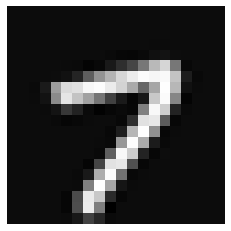

Neural Network Prediction:  [0.] (digit  [0.] )
286
Displaying Example Image


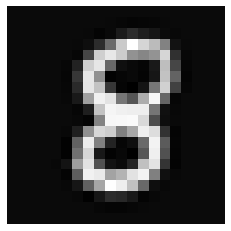

Neural Network Prediction:  [0.] (digit  [0.] )
287
Displaying Example Image


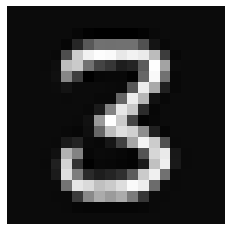

Neural Network Prediction:  [0.] (digit  [0.] )
288
Displaying Example Image


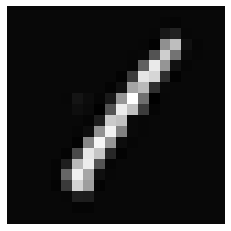

Neural Network Prediction:  [0.] (digit  [0.] )
289
Displaying Example Image


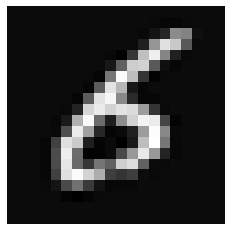

Neural Network Prediction:  [0.] (digit  [0.] )
290
Displaying Example Image


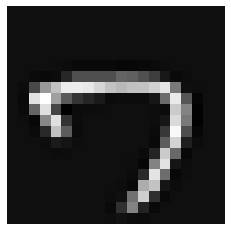

Neural Network Prediction:  [0.] (digit  [0.] )
291
Displaying Example Image


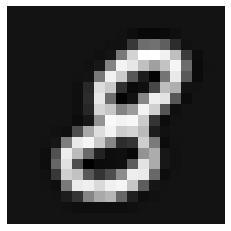

Neural Network Prediction:  [0.] (digit  [0.] )
292
Displaying Example Image


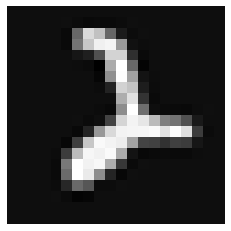

Neural Network Prediction:  [0.] (digit  [0.] )
293
Displaying Example Image


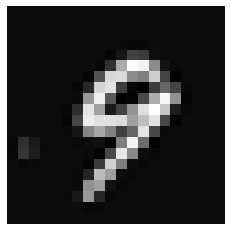

Neural Network Prediction:  [0.] (digit  [0.] )
294
Displaying Example Image


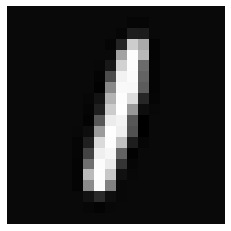

Neural Network Prediction:  [0.] (digit  [0.] )
295
Displaying Example Image


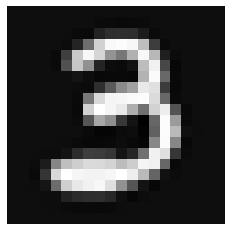

Neural Network Prediction:  [0.] (digit  [0.] )
296
Displaying Example Image


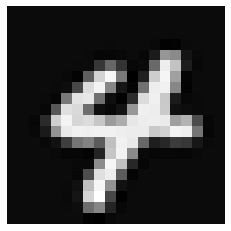

Neural Network Prediction:  [0.] (digit  [0.] )
297
Displaying Example Image


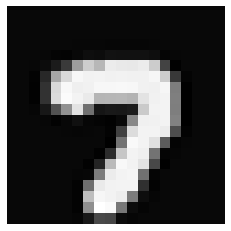

Neural Network Prediction:  [0.] (digit  [0.] )
298
Displaying Example Image


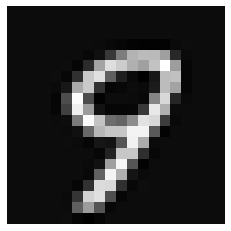

Neural Network Prediction:  [0.] (digit  [0.] )
299
Displaying Example Image


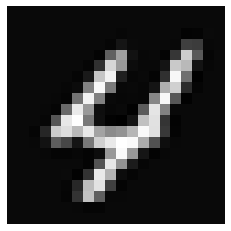

Neural Network Prediction:  [0.] (digit  [0.] )
300
Displaying Example Image


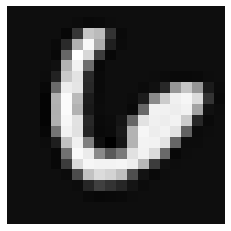

Neural Network Prediction:  [0.] (digit  [0.] )
301
Displaying Example Image


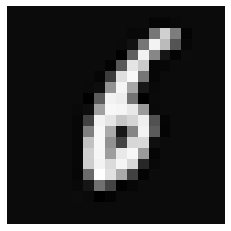

Neural Network Prediction:  [0.] (digit  [0.] )
302
Displaying Example Image


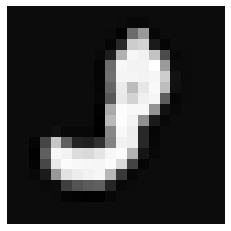

Neural Network Prediction:  [0.] (digit  [0.] )
303
Displaying Example Image


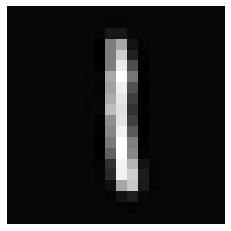

Neural Network Prediction:  [0.] (digit  [0.] )
304
Displaying Example Image


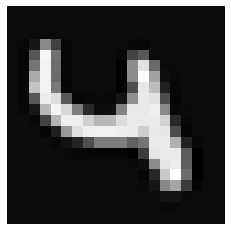

Neural Network Prediction:  [0.] (digit  [0.] )
305
Displaying Example Image


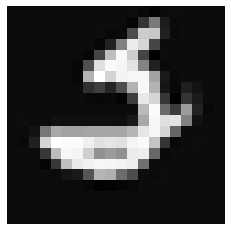

Neural Network Prediction:  [0.] (digit  [0.] )
306
Displaying Example Image


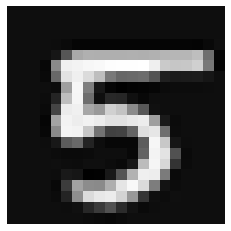

Neural Network Prediction:  [0.] (digit  [0.] )
307
Displaying Example Image


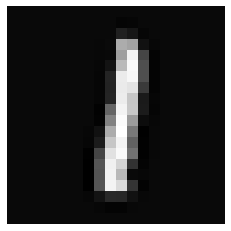

Neural Network Prediction:  [0.] (digit  [0.] )
308
Displaying Example Image


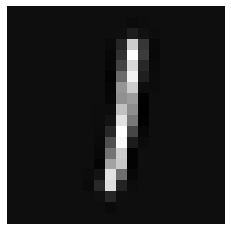

Neural Network Prediction:  [0.] (digit  [0.] )
309
Displaying Example Image


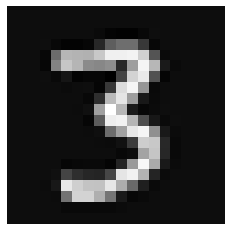

Neural Network Prediction:  [0.] (digit  [0.] )
310
Displaying Example Image


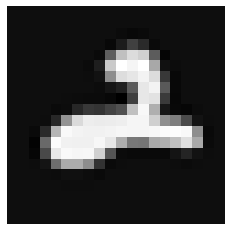

Neural Network Prediction:  [0.] (digit  [0.] )
311
Displaying Example Image


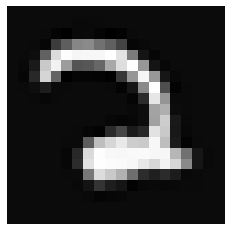

Neural Network Prediction:  [0.] (digit  [0.] )
312
Displaying Example Image


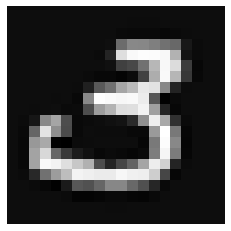

Neural Network Prediction:  [0.] (digit  [0.] )
313
Displaying Example Image


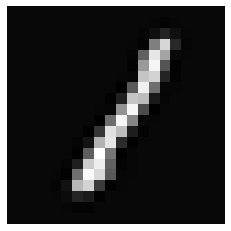

Neural Network Prediction:  [0.] (digit  [0.] )
314
Displaying Example Image


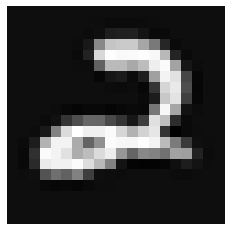

Neural Network Prediction:  [0.] (digit  [0.] )
315
Displaying Example Image


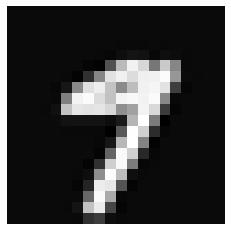

Neural Network Prediction:  [0.] (digit  [0.] )
316
Displaying Example Image


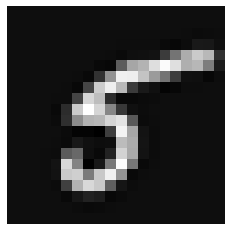

Neural Network Prediction:  [0.] (digit  [0.] )
317
Displaying Example Image


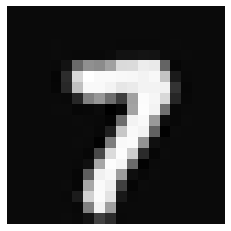

Neural Network Prediction:  [0.] (digit  [0.] )
318
Displaying Example Image


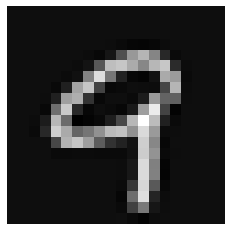

Neural Network Prediction:  [0.] (digit  [0.] )
319
Displaying Example Image


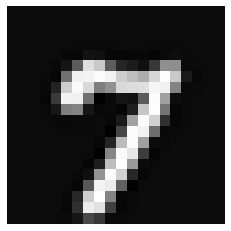

Neural Network Prediction:  [0.] (digit  [0.] )
320
Displaying Example Image


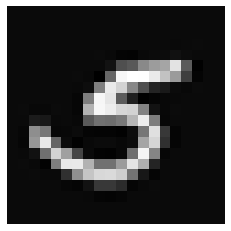

Neural Network Prediction:  [0.] (digit  [0.] )
321
Displaying Example Image


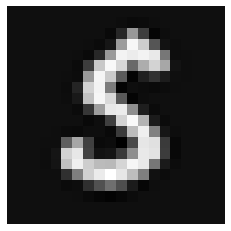

Neural Network Prediction:  [0.] (digit  [0.] )
322
Displaying Example Image


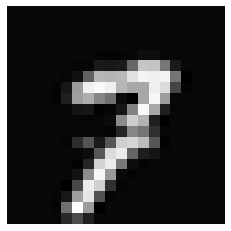

Neural Network Prediction:  [0.] (digit  [0.] )
323
Displaying Example Image


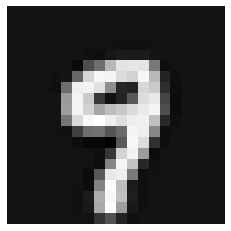

Neural Network Prediction:  [0.] (digit  [0.] )
324
Displaying Example Image


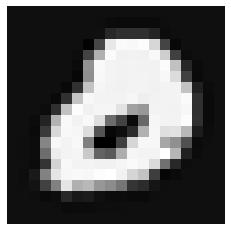

Neural Network Prediction:  [0.] (digit  [0.] )
325
Displaying Example Image


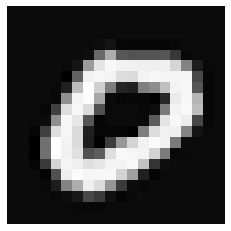

Neural Network Prediction:  [0.] (digit  [0.] )
326
Displaying Example Image


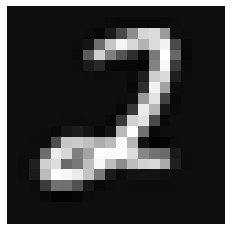

Neural Network Prediction:  [0.] (digit  [0.] )
327
Displaying Example Image


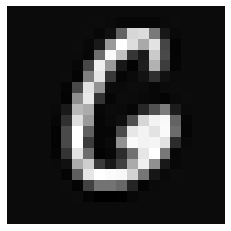

Neural Network Prediction:  [0.] (digit  [0.] )
328
Displaying Example Image


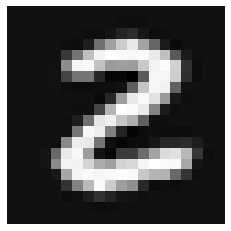

Neural Network Prediction:  [0.] (digit  [0.] )
329
Displaying Example Image


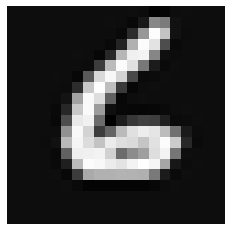

Neural Network Prediction:  [0.] (digit  [0.] )
330
Displaying Example Image


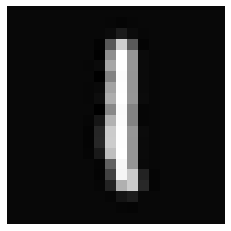

Neural Network Prediction:  [0.] (digit  [0.] )
331
Displaying Example Image


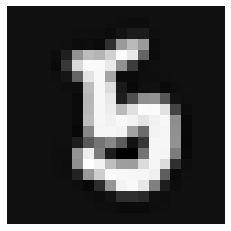

Neural Network Prediction:  [0.] (digit  [0.] )
332
Displaying Example Image


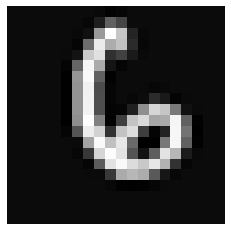

Neural Network Prediction:  [0.] (digit  [0.] )
333
Displaying Example Image


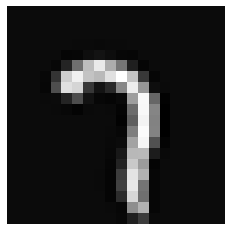

Neural Network Prediction:  [0.] (digit  [0.] )
334
Displaying Example Image


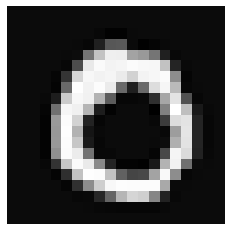

Neural Network Prediction:  [0.] (digit  [0.] )
335
Displaying Example Image


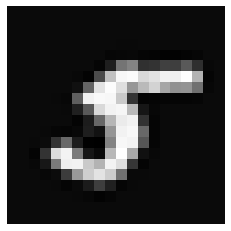

Neural Network Prediction:  [0.] (digit  [0.] )
336
Displaying Example Image


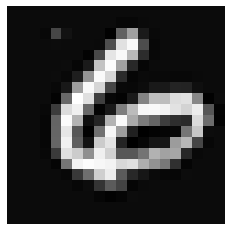

Neural Network Prediction:  [0.] (digit  [0.] )
337
Displaying Example Image


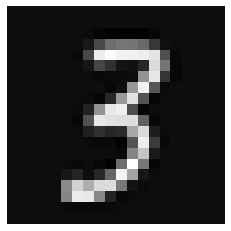

Neural Network Prediction:  [0.] (digit  [0.] )
338
Displaying Example Image


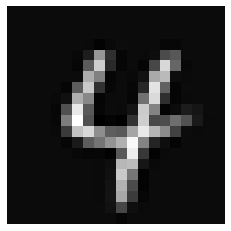

Neural Network Prediction:  [0.] (digit  [0.] )
339
Displaying Example Image


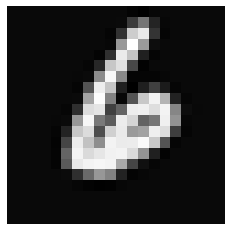

Neural Network Prediction:  [0.] (digit  [0.] )
340
Displaying Example Image


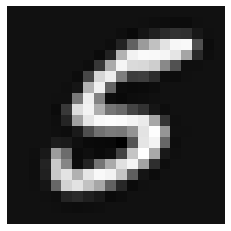

Neural Network Prediction:  [0.] (digit  [0.] )
341
Displaying Example Image


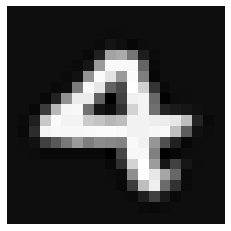

Neural Network Prediction:  [0.] (digit  [0.] )
342
Displaying Example Image


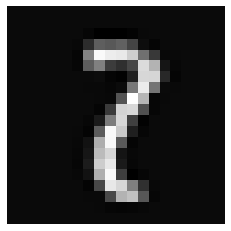

Neural Network Prediction:  [0.] (digit  [0.] )
343
Displaying Example Image


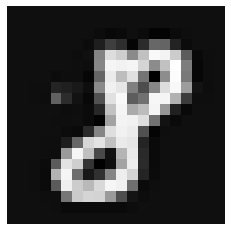

Neural Network Prediction:  [0.] (digit  [0.] )
344
Displaying Example Image


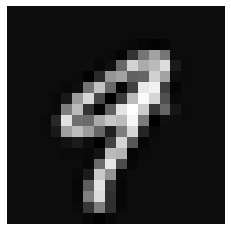

Neural Network Prediction:  [0.] (digit  [0.] )
345
Displaying Example Image


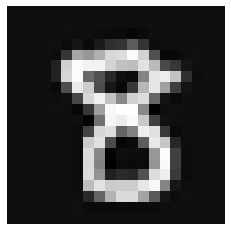

Neural Network Prediction:  [0.] (digit  [0.] )
346
Displaying Example Image


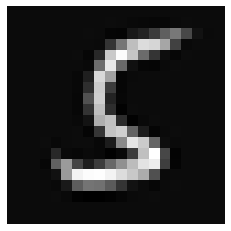

Neural Network Prediction:  [0.] (digit  [0.] )
347
Displaying Example Image


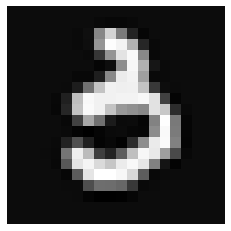

Neural Network Prediction:  [0.] (digit  [0.] )
348
Displaying Example Image


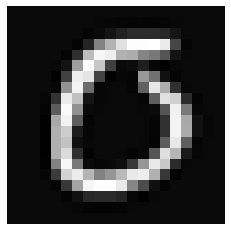

Neural Network Prediction:  [0.] (digit  [0.] )
349
Displaying Example Image


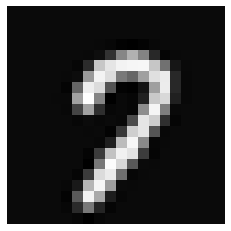

Neural Network Prediction:  [0.] (digit  [0.] )
350
Displaying Example Image


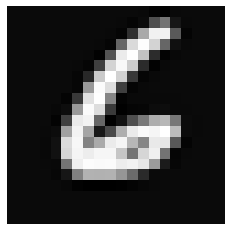

Neural Network Prediction:  [0.] (digit  [0.] )
351
Displaying Example Image


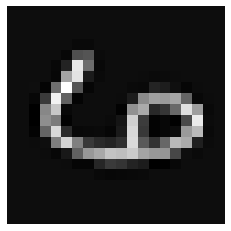

Neural Network Prediction:  [0.] (digit  [0.] )
352
Displaying Example Image


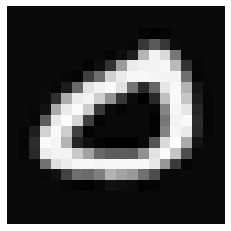

Neural Network Prediction:  [0.] (digit  [0.] )
353
Displaying Example Image


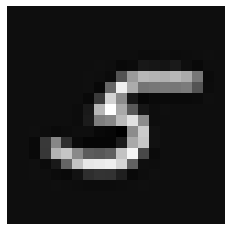

Neural Network Prediction:  [0.] (digit  [0.] )
354
Displaying Example Image


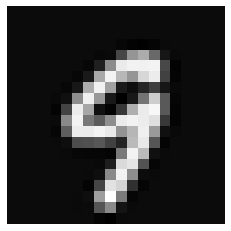

Neural Network Prediction:  [0.] (digit  [0.] )
355
Displaying Example Image


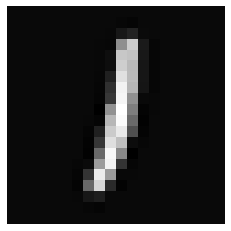

Neural Network Prediction:  [0.] (digit  [0.] )
356
Displaying Example Image


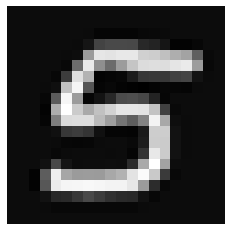

Neural Network Prediction:  [0.] (digit  [0.] )
357
Displaying Example Image


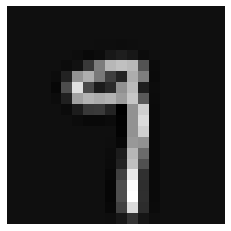

Neural Network Prediction:  [0.] (digit  [0.] )
358
Displaying Example Image


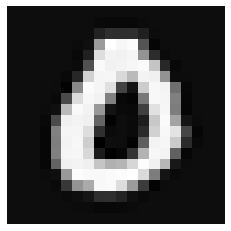

Neural Network Prediction:  [0.] (digit  [0.] )
359
Displaying Example Image


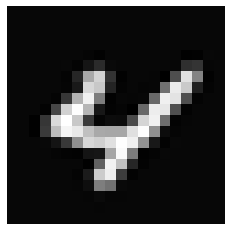

Neural Network Prediction:  [0.] (digit  [0.] )
360
Displaying Example Image


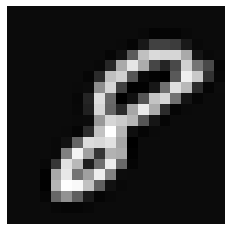

Neural Network Prediction:  [0.] (digit  [0.] )
361
Displaying Example Image


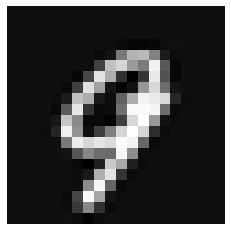

Neural Network Prediction:  [0.] (digit  [0.] )
362
Displaying Example Image


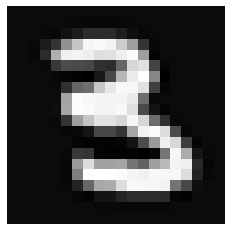

Neural Network Prediction:  [0.] (digit  [0.] )
363
Displaying Example Image


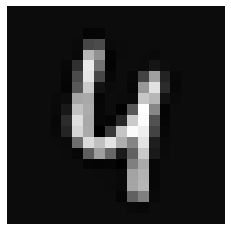

Neural Network Prediction:  [0.] (digit  [0.] )
364
Displaying Example Image


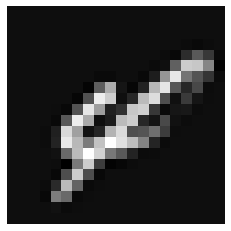

Neural Network Prediction:  [0.] (digit  [0.] )
365
Displaying Example Image


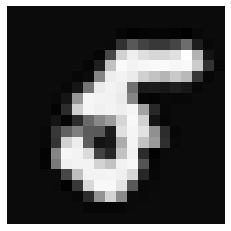

Neural Network Prediction:  [0.] (digit  [0.] )
366
Displaying Example Image


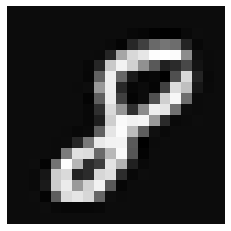

Neural Network Prediction:  [0.] (digit  [0.] )
367
Displaying Example Image


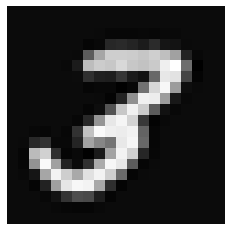

Neural Network Prediction:  [0.] (digit  [0.] )
368
Displaying Example Image


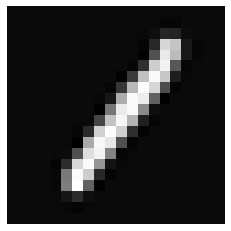

Neural Network Prediction:  [0.] (digit  [0.] )
369
Displaying Example Image


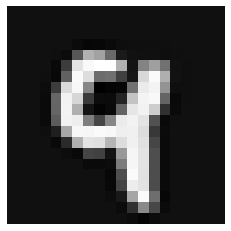

Neural Network Prediction:  [0.] (digit  [0.] )
370
Displaying Example Image


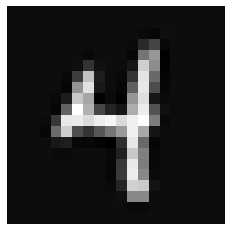

Neural Network Prediction:  [0.] (digit  [0.] )
371
Displaying Example Image


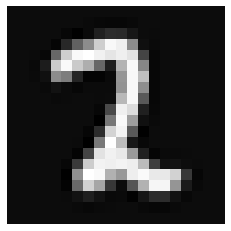

Neural Network Prediction:  [0.] (digit  [0.] )
372
Displaying Example Image


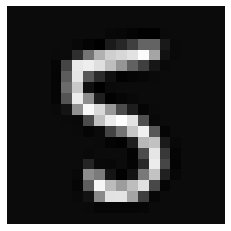

Neural Network Prediction:  [0.] (digit  [0.] )
373
Displaying Example Image


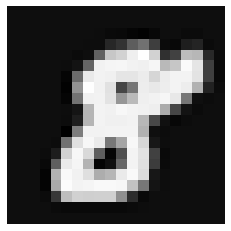

Neural Network Prediction:  [0.] (digit  [0.] )
374
Displaying Example Image


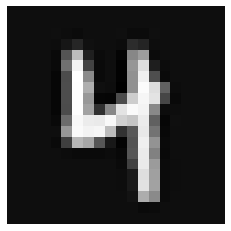

Neural Network Prediction:  [0.] (digit  [0.] )
375
Displaying Example Image


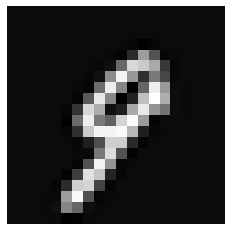

Neural Network Prediction:  [0.] (digit  [0.] )
376
Displaying Example Image


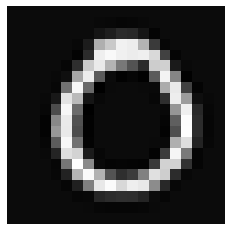

Neural Network Prediction:  [0.] (digit  [0.] )
377
Displaying Example Image


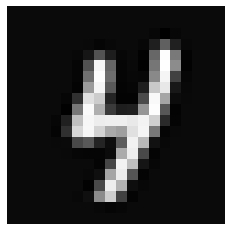

Neural Network Prediction:  [0.] (digit  [0.] )
378
Displaying Example Image


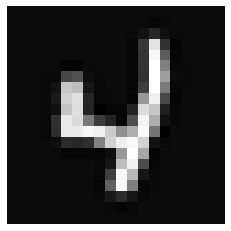

Neural Network Prediction:  [0.] (digit  [0.] )
379
Displaying Example Image


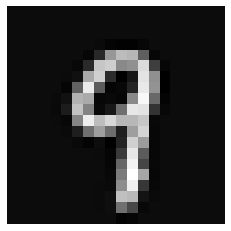

Neural Network Prediction:  [0.] (digit  [0.] )
380
Displaying Example Image


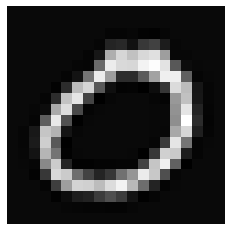

Neural Network Prediction:  [0.] (digit  [0.] )
381
Displaying Example Image


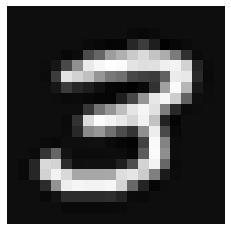

Neural Network Prediction:  [0.] (digit  [0.] )
382
Displaying Example Image


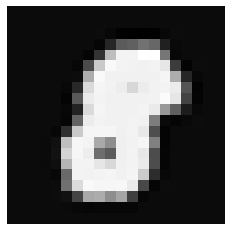

Neural Network Prediction:  [0.] (digit  [0.] )
383
Displaying Example Image


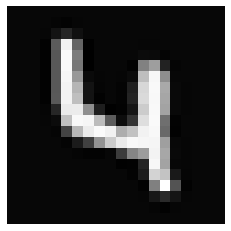

Neural Network Prediction:  [0.] (digit  [0.] )
384
Displaying Example Image


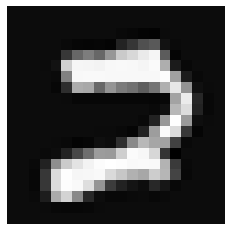

Neural Network Prediction:  [0.] (digit  [0.] )
385
Displaying Example Image


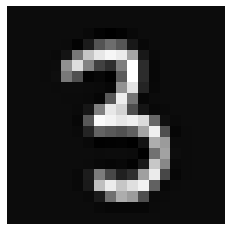

Neural Network Prediction:  [0.] (digit  [0.] )
386
Displaying Example Image


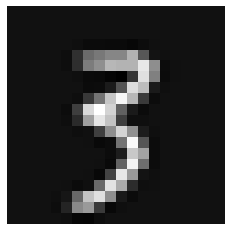

Neural Network Prediction:  [0.] (digit  [0.] )
387
Displaying Example Image


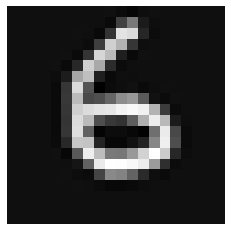

Neural Network Prediction:  [0.] (digit  [0.] )
388
Displaying Example Image


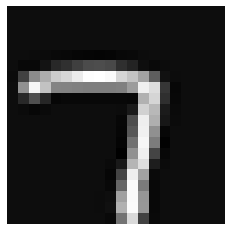

Neural Network Prediction:  [0.] (digit  [0.] )
389
Displaying Example Image


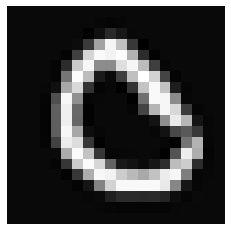

Neural Network Prediction:  [0.] (digit  [0.] )
390
Displaying Example Image


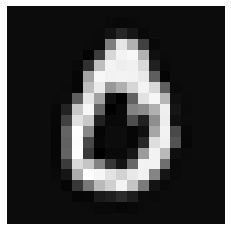

Neural Network Prediction:  [0.] (digit  [0.] )
391
Displaying Example Image


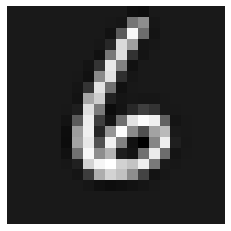

Neural Network Prediction:  [0.] (digit  [0.] )
392
Displaying Example Image


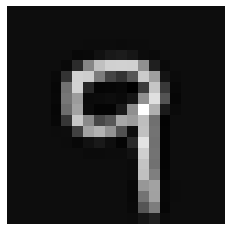

Neural Network Prediction:  [0.] (digit  [0.] )
393
Displaying Example Image


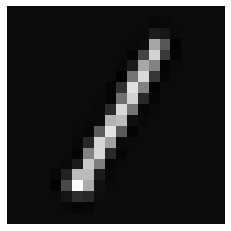

Neural Network Prediction:  [0.] (digit  [0.] )
394
Displaying Example Image


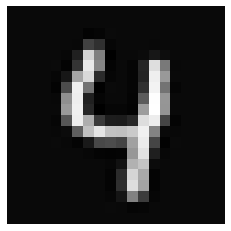

Neural Network Prediction:  [0.] (digit  [0.] )
395
Displaying Example Image


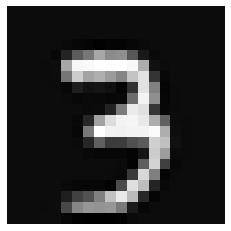

Neural Network Prediction:  [0.] (digit  [0.] )
396
Displaying Example Image


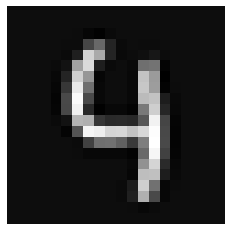

Neural Network Prediction:  [0.] (digit  [0.] )
397
Displaying Example Image


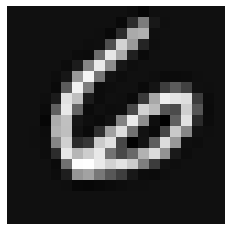

Neural Network Prediction:  [0.] (digit  [0.] )
398
Displaying Example Image


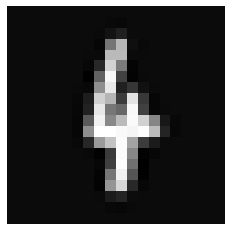

Neural Network Prediction:  [0.] (digit  [0.] )
399
Displaying Example Image


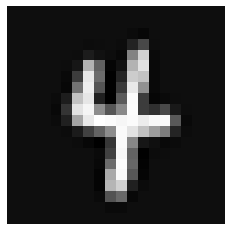

Neural Network Prediction:  [0.] (digit  [0.] )
400
Displaying Example Image


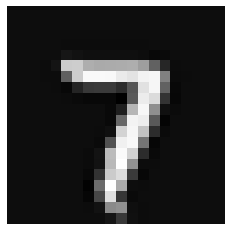

Neural Network Prediction:  [0.] (digit  [0.] )
401
Displaying Example Image


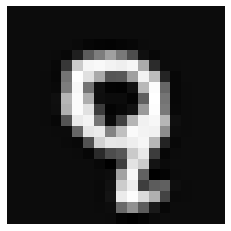

Neural Network Prediction:  [0.] (digit  [0.] )
402
Displaying Example Image


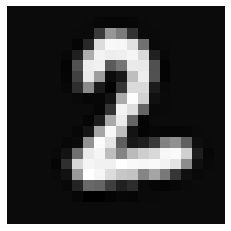

Neural Network Prediction:  [0.] (digit  [0.] )
403
Displaying Example Image


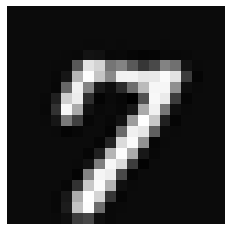

Neural Network Prediction:  [0.] (digit  [0.] )
404
Displaying Example Image


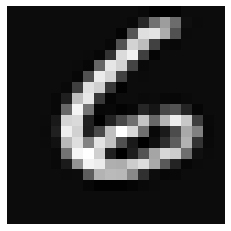

Neural Network Prediction:  [0.] (digit  [0.] )
405
Displaying Example Image


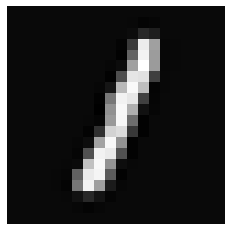

Neural Network Prediction:  [0.] (digit  [0.] )
406
Displaying Example Image


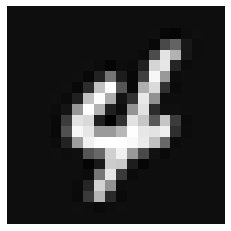

Neural Network Prediction:  [0.] (digit  [0.] )
407
Displaying Example Image


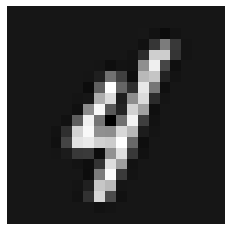

Neural Network Prediction:  [0.] (digit  [0.] )
408
Displaying Example Image


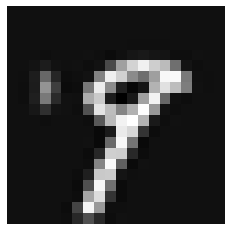

Neural Network Prediction:  [0.] (digit  [0.] )
409
Displaying Example Image


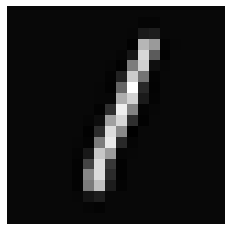

Neural Network Prediction:  [0.] (digit  [0.] )
410
Displaying Example Image


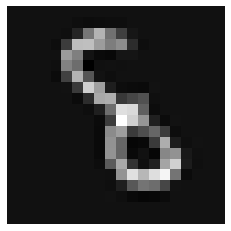

Neural Network Prediction:  [0.] (digit  [0.] )
411
Displaying Example Image


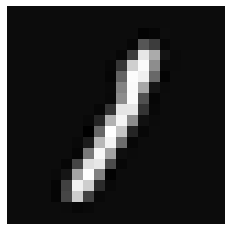

Neural Network Prediction:  [0.] (digit  [0.] )
412
Displaying Example Image


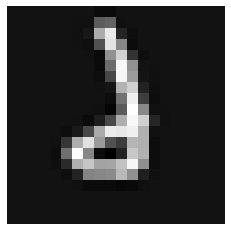

Neural Network Prediction:  [0.] (digit  [0.] )
413
Displaying Example Image


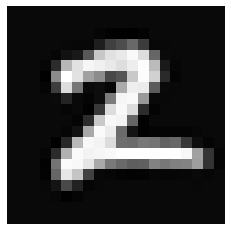

Neural Network Prediction:  [0.] (digit  [0.] )
414
Displaying Example Image


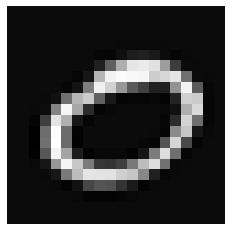

Neural Network Prediction:  [0.] (digit  [0.] )
415
Displaying Example Image


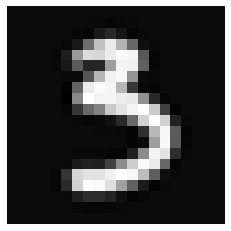

Neural Network Prediction:  [0.] (digit  [0.] )
416
Displaying Example Image


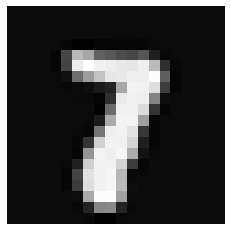

Neural Network Prediction:  [0.] (digit  [0.] )
417
Displaying Example Image


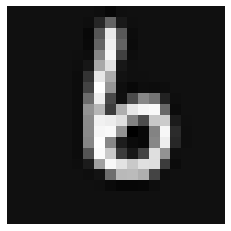

Neural Network Prediction:  [0.] (digit  [0.] )
418
Displaying Example Image


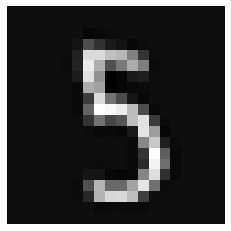

Neural Network Prediction:  [0.] (digit  [0.] )
419
Displaying Example Image


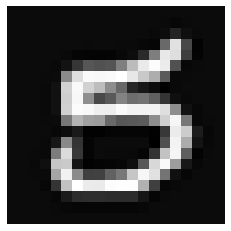

Neural Network Prediction:  [0.] (digit  [0.] )
420
Displaying Example Image


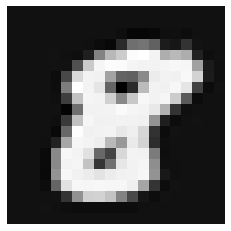

Neural Network Prediction:  [0.] (digit  [0.] )
421
Displaying Example Image


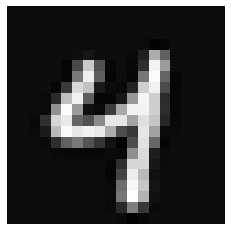

Neural Network Prediction:  [0.] (digit  [0.] )
422
Displaying Example Image


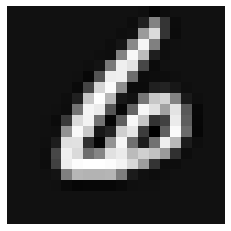

Neural Network Prediction:  [0.] (digit  [0.] )
423
Displaying Example Image


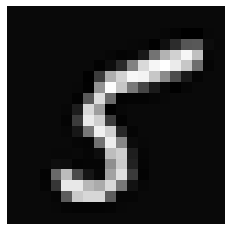

Neural Network Prediction:  [0.] (digit  [0.] )
424
Displaying Example Image


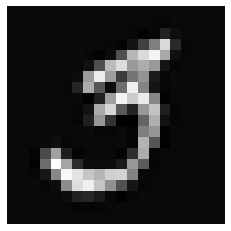

Neural Network Prediction:  [0.] (digit  [0.] )
425
Displaying Example Image


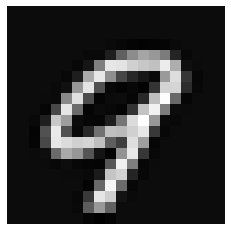

Neural Network Prediction:  [0.] (digit  [0.] )
426
Displaying Example Image


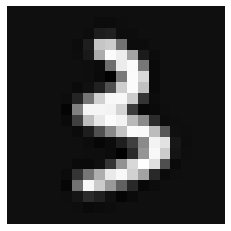

Neural Network Prediction:  [0.] (digit  [0.] )
427
Displaying Example Image


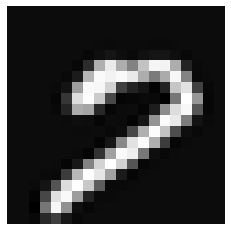

Neural Network Prediction:  [0.] (digit  [0.] )
428
Displaying Example Image


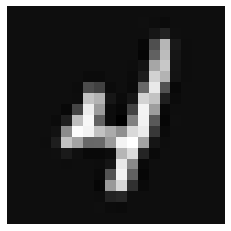

Neural Network Prediction:  [0.] (digit  [0.] )
429
Displaying Example Image


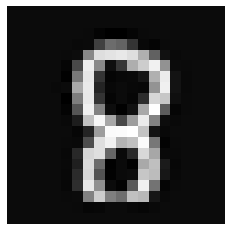

Neural Network Prediction:  [0.] (digit  [0.] )
430
Displaying Example Image


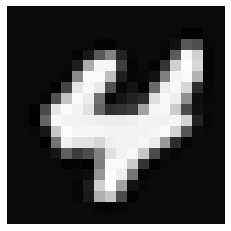

Neural Network Prediction:  [0.] (digit  [0.] )
431
Displaying Example Image


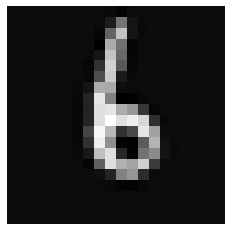

Neural Network Prediction:  [0.] (digit  [0.] )
432
Displaying Example Image


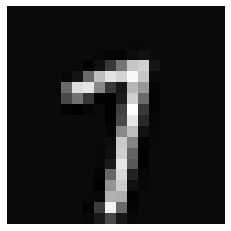

Neural Network Prediction:  [0.] (digit  [0.] )
433
Displaying Example Image


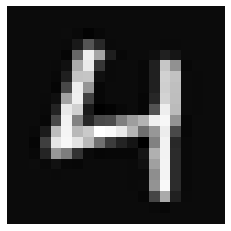

Neural Network Prediction:  [0.] (digit  [0.] )
434
Displaying Example Image


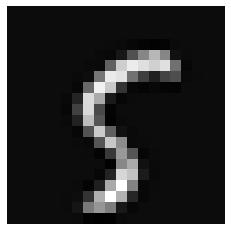

Neural Network Prediction:  [0.] (digit  [0.] )
435
Displaying Example Image


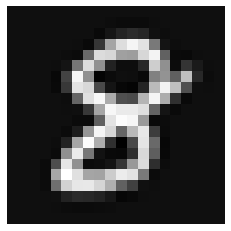

Neural Network Prediction:  [0.] (digit  [0.] )
436
Displaying Example Image


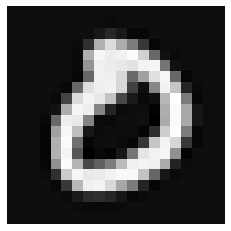

Neural Network Prediction:  [0.] (digit  [0.] )
437
Displaying Example Image


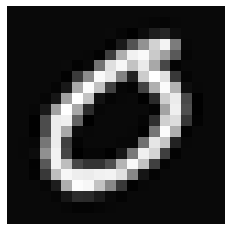

Neural Network Prediction:  [0.] (digit  [0.] )
438
Displaying Example Image


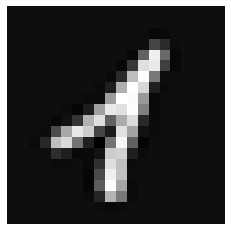

Neural Network Prediction:  [0.] (digit  [0.] )
439
Displaying Example Image


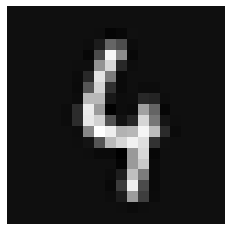

Neural Network Prediction:  [0.] (digit  [0.] )
440
Displaying Example Image


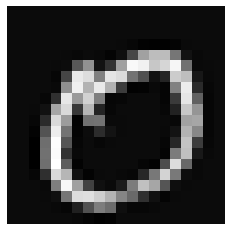

Neural Network Prediction:  [0.] (digit  [0.] )
441
Displaying Example Image


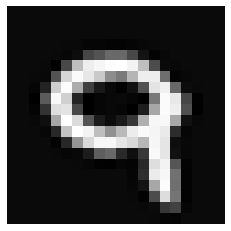

Neural Network Prediction:  [0.] (digit  [0.] )
442
Displaying Example Image


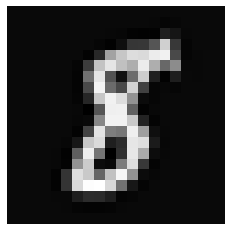

Neural Network Prediction:  [0.] (digit  [0.] )
443
Displaying Example Image


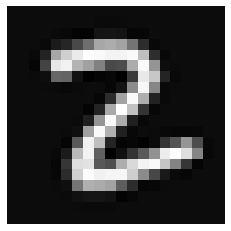

Neural Network Prediction:  [0.] (digit  [0.] )
444
Displaying Example Image


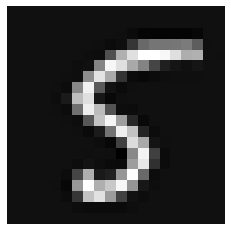

Neural Network Prediction:  [0.] (digit  [0.] )
445
Displaying Example Image


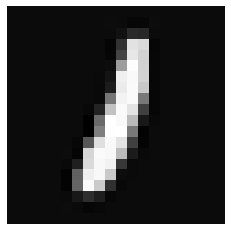

Neural Network Prediction:  [0.] (digit  [0.] )
446
Displaying Example Image


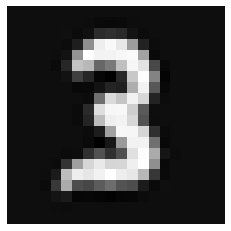

Neural Network Prediction:  [0.] (digit  [0.] )
447
Displaying Example Image


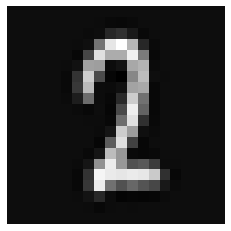

Neural Network Prediction:  [0.] (digit  [0.] )
448
Displaying Example Image


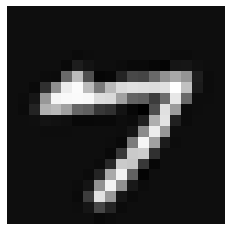

Neural Network Prediction:  [0.] (digit  [0.] )
449
Displaying Example Image


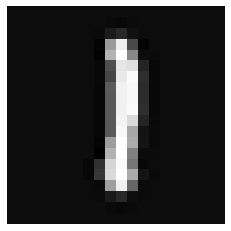

Neural Network Prediction:  [0.] (digit  [0.] )
450
Displaying Example Image


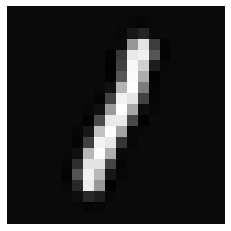

Neural Network Prediction:  [0.] (digit  [0.] )
451
Displaying Example Image


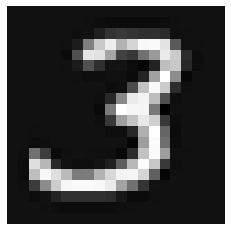

Neural Network Prediction:  [0.] (digit  [0.] )
452
Displaying Example Image


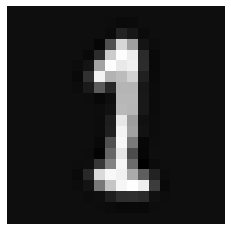

Neural Network Prediction:  [0.] (digit  [0.] )
453
Displaying Example Image


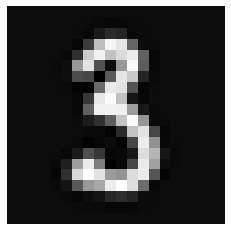

Neural Network Prediction:  [0.] (digit  [0.] )
454
Displaying Example Image


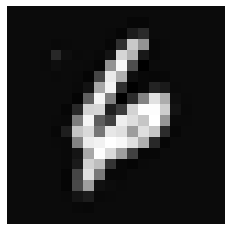

Neural Network Prediction:  [0.] (digit  [0.] )
455
Displaying Example Image


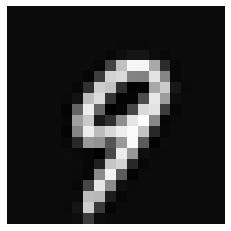

Neural Network Prediction:  [0.] (digit  [0.] )
456
Displaying Example Image


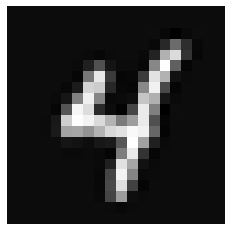

Neural Network Prediction:  [0.] (digit  [0.] )
457
Displaying Example Image


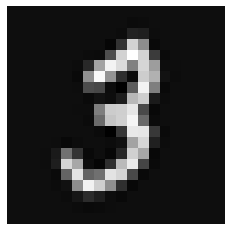

Neural Network Prediction:  [0.] (digit  [0.] )
458
Displaying Example Image


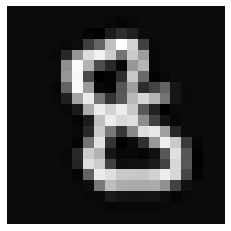

Neural Network Prediction:  [0.] (digit  [0.] )
459
Displaying Example Image


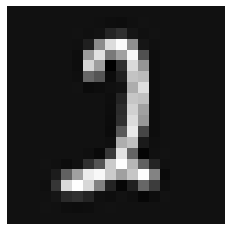

Neural Network Prediction:  [0.] (digit  [0.] )
460
Displaying Example Image


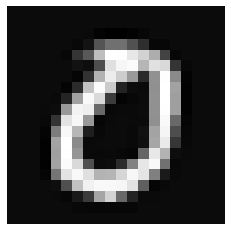

Neural Network Prediction:  [0.] (digit  [0.] )
461
Displaying Example Image


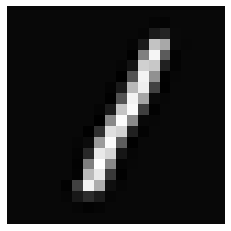

Neural Network Prediction:  [0.] (digit  [0.] )
462
Displaying Example Image


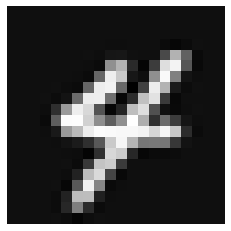

Neural Network Prediction:  [0.] (digit  [0.] )
463
Displaying Example Image


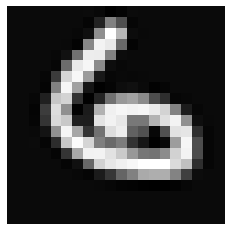

Neural Network Prediction:  [0.] (digit  [0.] )
464
Displaying Example Image


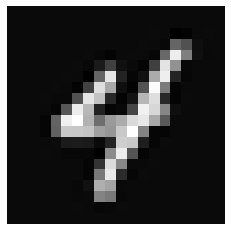

Neural Network Prediction:  [0.] (digit  [0.] )
465
Displaying Example Image


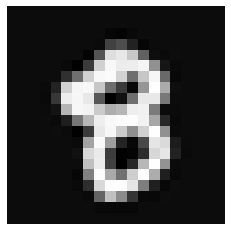

Neural Network Prediction:  [0.] (digit  [0.] )
466
Displaying Example Image


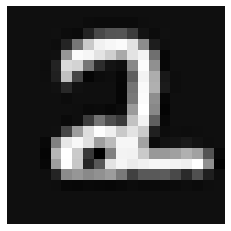

Neural Network Prediction:  [0.] (digit  [0.] )
467
Displaying Example Image


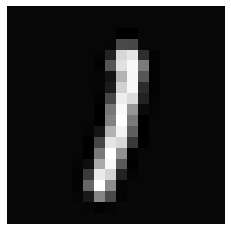

Neural Network Prediction:  [0.] (digit  [0.] )
468
Displaying Example Image


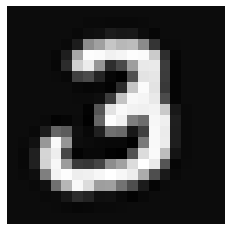

Neural Network Prediction:  [0.] (digit  [0.] )
469
Displaying Example Image


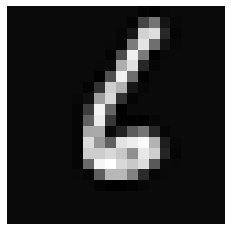

Neural Network Prediction:  [0.] (digit  [0.] )
470
Displaying Example Image


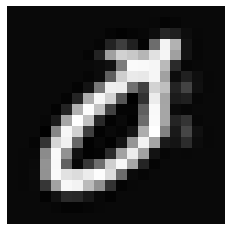

Neural Network Prediction:  [0.] (digit  [0.] )
471
Displaying Example Image


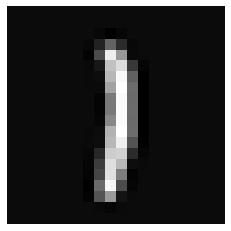

Neural Network Prediction:  [0.] (digit  [0.] )
472
Displaying Example Image


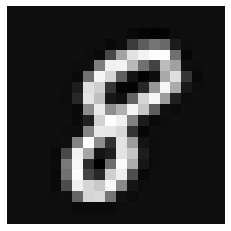

Neural Network Prediction:  [0.] (digit  [0.] )
473
Displaying Example Image


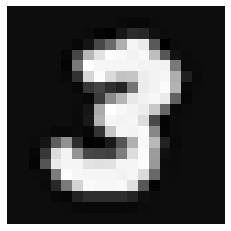

Neural Network Prediction:  [0.] (digit  [0.] )
474
Displaying Example Image


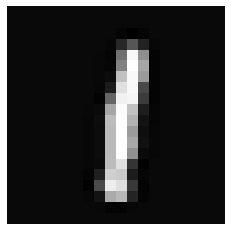

Neural Network Prediction:  [0.] (digit  [0.] )
475
Displaying Example Image


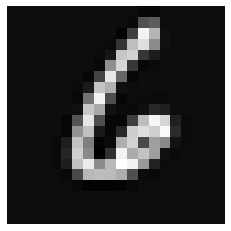

Neural Network Prediction:  [0.] (digit  [0.] )
476
Displaying Example Image


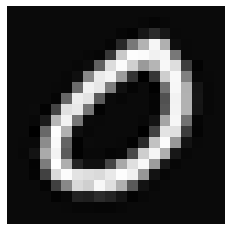

Neural Network Prediction:  [0.] (digit  [0.] )
477
Displaying Example Image


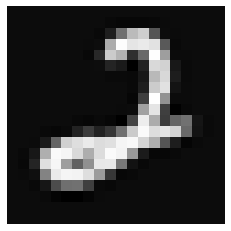

Neural Network Prediction:  [0.] (digit  [0.] )
478
Displaying Example Image


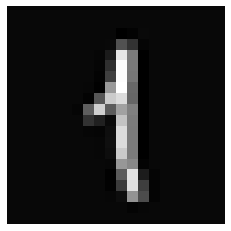

Neural Network Prediction:  [0.] (digit  [0.] )
479
Displaying Example Image


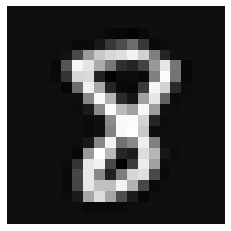

Neural Network Prediction:  [0.] (digit  [0.] )
480
Displaying Example Image


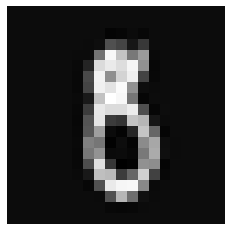

Neural Network Prediction:  [0.] (digit  [0.] )
481
Displaying Example Image


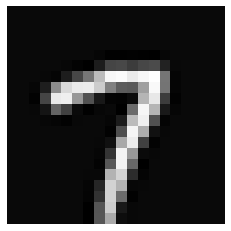

Neural Network Prediction:  [0.] (digit  [0.] )
482
Displaying Example Image


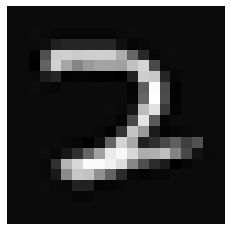

Neural Network Prediction:  [0.] (digit  [0.] )
483
Displaying Example Image


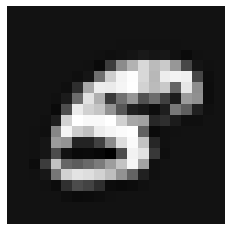

Neural Network Prediction:  [0.] (digit  [0.] )
484
Displaying Example Image


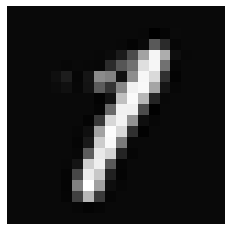

Neural Network Prediction:  [0.] (digit  [0.] )
485
Displaying Example Image


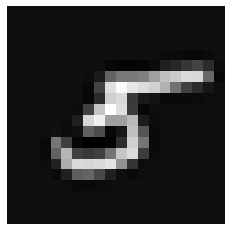

Neural Network Prediction:  [0.] (digit  [0.] )
486
Displaying Example Image


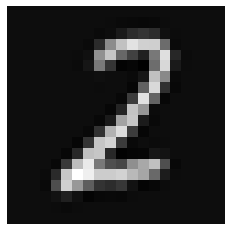

Neural Network Prediction:  [0.] (digit  [0.] )
487
Displaying Example Image


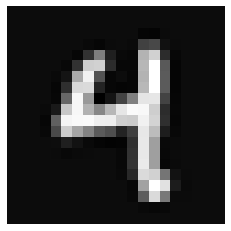

Neural Network Prediction:  [0.] (digit  [0.] )
488
Displaying Example Image


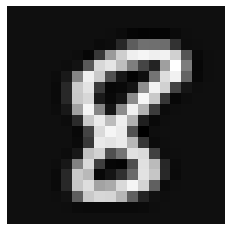

Neural Network Prediction:  [0.] (digit  [0.] )
489
Displaying Example Image


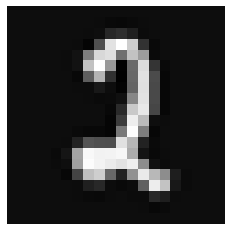

Neural Network Prediction:  [0.] (digit  [0.] )
490
Displaying Example Image


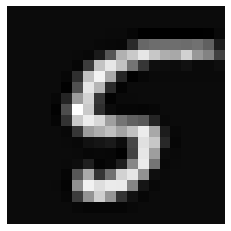

Neural Network Prediction:  [0.] (digit  [0.] )
491
Displaying Example Image


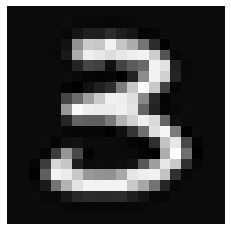

Neural Network Prediction:  [0.] (digit  [0.] )
492
Displaying Example Image


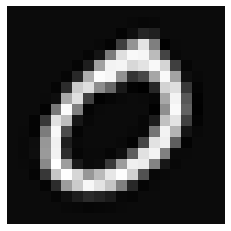

Neural Network Prediction:  [0.] (digit  [0.] )
493
Displaying Example Image


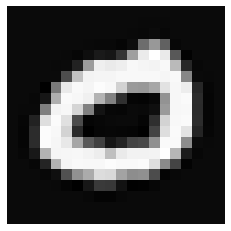

Neural Network Prediction:  [0.] (digit  [0.] )
494
Displaying Example Image


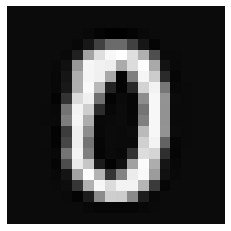

Neural Network Prediction:  [0.] (digit  [0.] )
495
Displaying Example Image


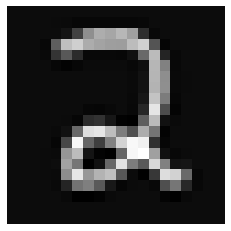

Neural Network Prediction:  [0.] (digit  [0.] )
496
Displaying Example Image


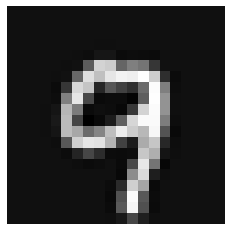

Neural Network Prediction:  [0.] (digit  [0.] )
497
Displaying Example Image


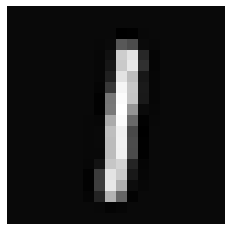

Neural Network Prediction:  [0.] (digit  [0.] )
498
Displaying Example Image


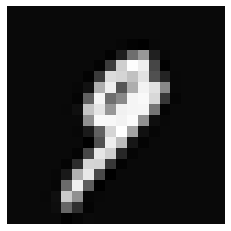

Neural Network Prediction:  [0.] (digit  [0.] )
499
Displaying Example Image


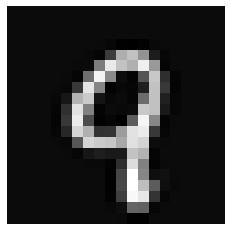

Neural Network Prediction:  [0.] (digit  [0.] )
500
Displaying Example Image


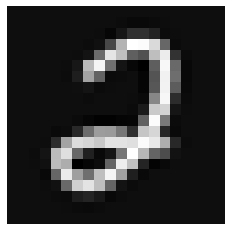

Neural Network Prediction:  [0.] (digit  [0.] )
501
Displaying Example Image


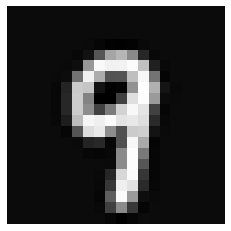

Neural Network Prediction:  [0.] (digit  [0.] )
502
Displaying Example Image


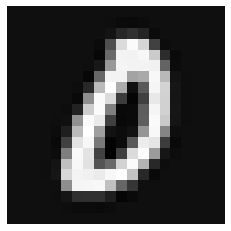

Neural Network Prediction:  [0.] (digit  [0.] )
503
Displaying Example Image


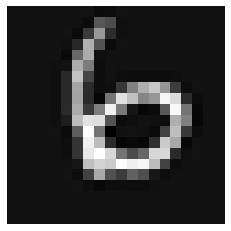

Neural Network Prediction:  [0.] (digit  [0.] )
504
Displaying Example Image


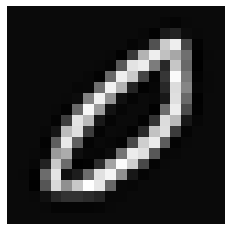

Neural Network Prediction:  [0.] (digit  [0.] )
505
Displaying Example Image


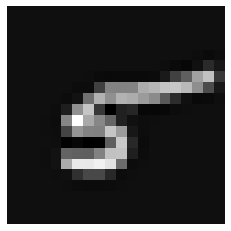

Neural Network Prediction:  [0.] (digit  [0.] )
506
Displaying Example Image


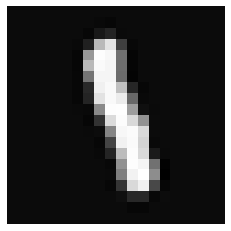

Neural Network Prediction:  [0.] (digit  [0.] )
507
Displaying Example Image


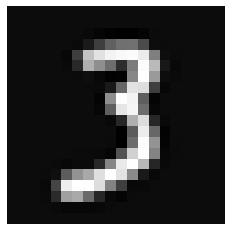

Neural Network Prediction:  [0.] (digit  [0.] )
508
Displaying Example Image


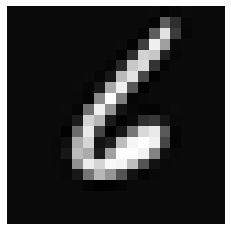

Neural Network Prediction:  [0.] (digit  [0.] )
509
Displaying Example Image


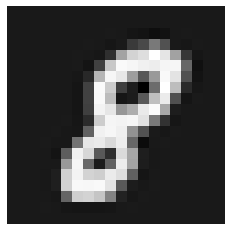

Neural Network Prediction:  [0.] (digit  [0.] )
510
Displaying Example Image


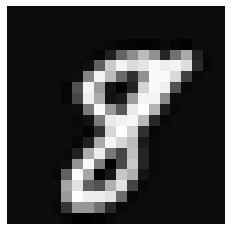

Neural Network Prediction:  [0.] (digit  [0.] )
511
Displaying Example Image


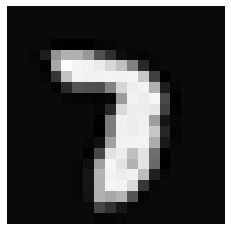

Neural Network Prediction:  [0.] (digit  [0.] )
512
Displaying Example Image


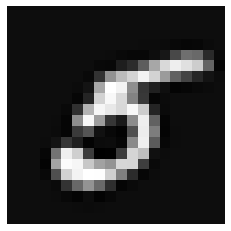

Neural Network Prediction:  [0.] (digit  [0.] )
513
Displaying Example Image


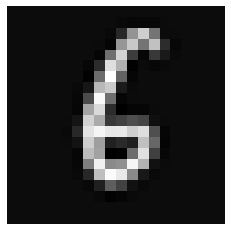

Neural Network Prediction:  [0.] (digit  [0.] )
514
Displaying Example Image


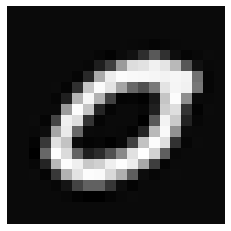

Neural Network Prediction:  [0.] (digit  [0.] )
515
Displaying Example Image


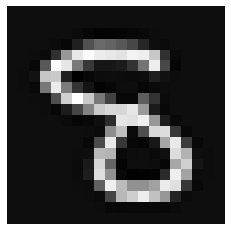

Neural Network Prediction:  [0.] (digit  [0.] )
516
Displaying Example Image


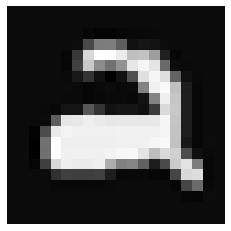

Neural Network Prediction:  [0.] (digit  [0.] )
517
Displaying Example Image


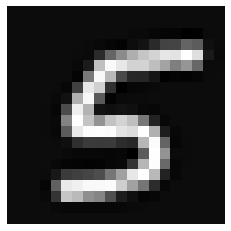

Neural Network Prediction:  [0.] (digit  [0.] )
518
Displaying Example Image


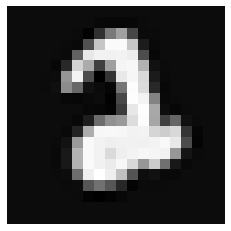

Neural Network Prediction:  [0.] (digit  [0.] )
519
Displaying Example Image


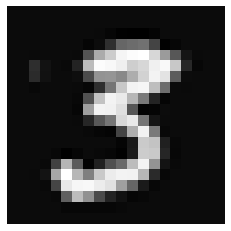

Neural Network Prediction:  [0.] (digit  [0.] )
520
Displaying Example Image


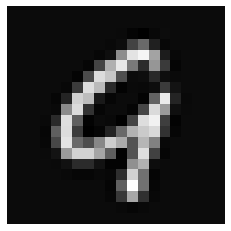

Neural Network Prediction:  [0.] (digit  [0.] )
521
Displaying Example Image


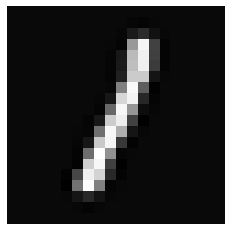

Neural Network Prediction:  [0.] (digit  [0.] )
522
Displaying Example Image


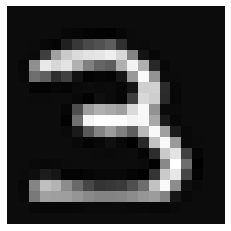

Neural Network Prediction:  [0.] (digit  [0.] )
523
Displaying Example Image


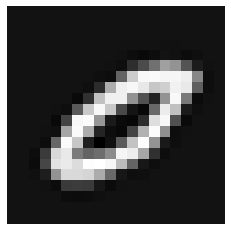

Neural Network Prediction:  [0.] (digit  [0.] )
524
Displaying Example Image


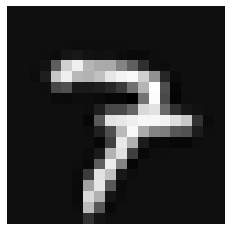

Neural Network Prediction:  [0.] (digit  [0.] )
525
Displaying Example Image


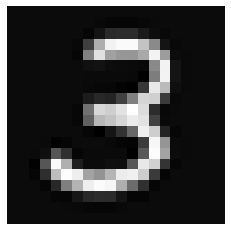

Neural Network Prediction:  [0.] (digit  [0.] )
526
Displaying Example Image


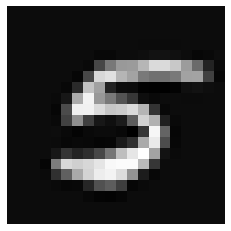

Neural Network Prediction:  [0.] (digit  [0.] )
527
Displaying Example Image


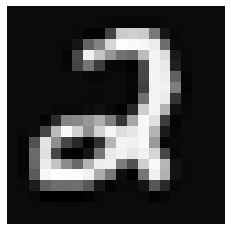

Neural Network Prediction:  [0.] (digit  [0.] )
528
Displaying Example Image


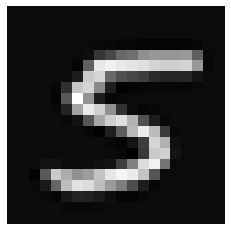

Neural Network Prediction:  [0.] (digit  [0.] )
529
Displaying Example Image


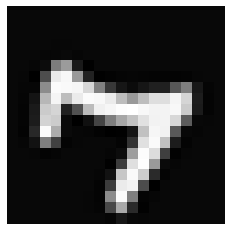

Neural Network Prediction:  [0.] (digit  [0.] )
530
Displaying Example Image


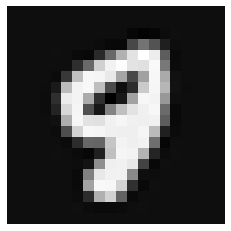

Neural Network Prediction:  [0.] (digit  [0.] )
531
Displaying Example Image


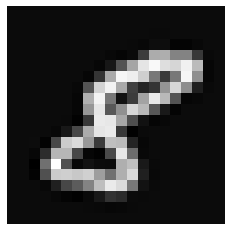

Neural Network Prediction:  [0.] (digit  [0.] )
532
Displaying Example Image


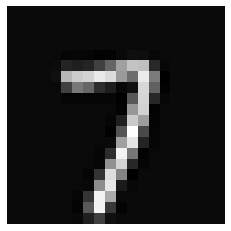

Neural Network Prediction:  [0.] (digit  [0.] )
533
Displaying Example Image


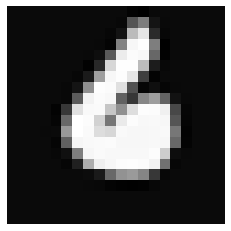

Neural Network Prediction:  [0.] (digit  [0.] )
534
Displaying Example Image


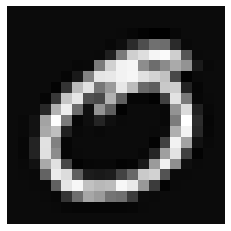

Neural Network Prediction:  [0.] (digit  [0.] )
535
Displaying Example Image


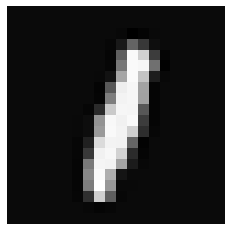

Neural Network Prediction:  [0.] (digit  [0.] )
536
Displaying Example Image


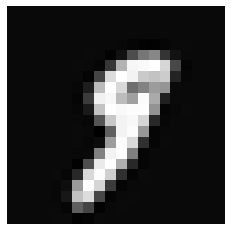

Neural Network Prediction:  [0.] (digit  [0.] )
537
Displaying Example Image


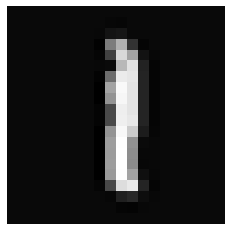

Neural Network Prediction:  [0.] (digit  [0.] )
538
Displaying Example Image


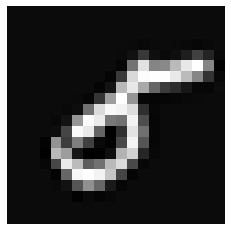

Neural Network Prediction:  [0.] (digit  [0.] )
539
Displaying Example Image


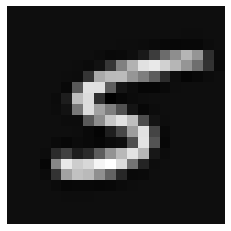

Neural Network Prediction:  [0.] (digit  [0.] )
540
Displaying Example Image


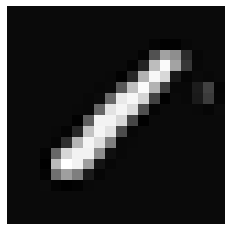

Neural Network Prediction:  [0.] (digit  [0.] )
541
Displaying Example Image


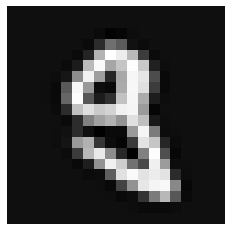

Neural Network Prediction:  [0.] (digit  [0.] )
542
Displaying Example Image


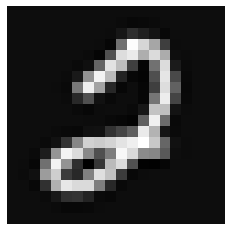

Neural Network Prediction:  [0.] (digit  [0.] )
543
Displaying Example Image


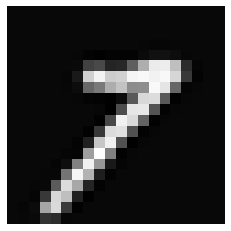

Neural Network Prediction:  [0.] (digit  [0.] )
544
Displaying Example Image


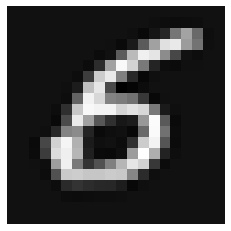

Neural Network Prediction:  [0.] (digit  [0.] )
545
Displaying Example Image


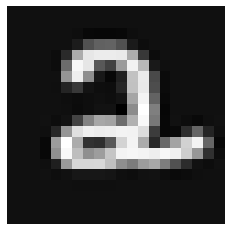

Neural Network Prediction:  [0.] (digit  [0.] )
546
Displaying Example Image


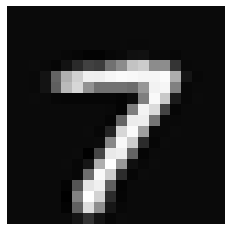

Neural Network Prediction:  [0.] (digit  [0.] )
547
Displaying Example Image


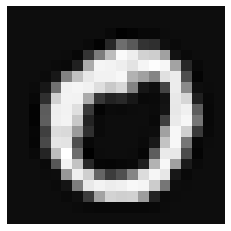

Neural Network Prediction:  [0.] (digit  [0.] )
548
Displaying Example Image


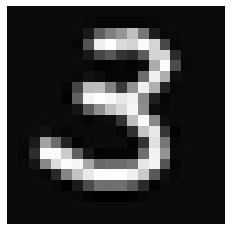

Neural Network Prediction:  [0.] (digit  [0.] )
549
Displaying Example Image


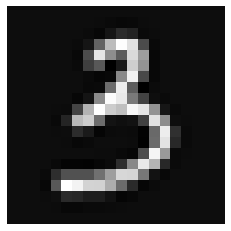

Neural Network Prediction:  [0.] (digit  [0.] )
550
Displaying Example Image


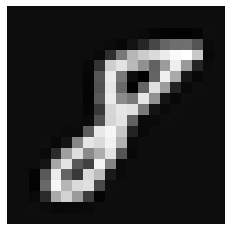

Neural Network Prediction:  [0.] (digit  [0.] )
551
Displaying Example Image


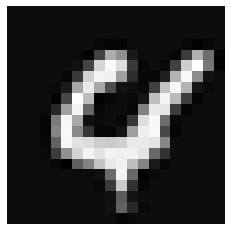

Neural Network Prediction:  [0.] (digit  [0.] )
552
Displaying Example Image


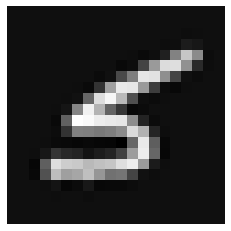

Neural Network Prediction:  [0.] (digit  [0.] )
553
Displaying Example Image


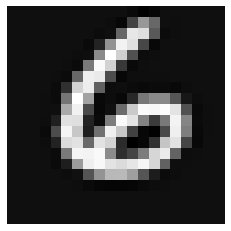

Neural Network Prediction:  [0.] (digit  [0.] )
554
Displaying Example Image


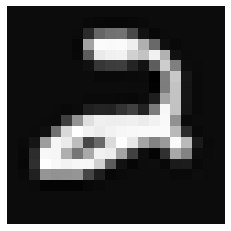

Neural Network Prediction:  [0.] (digit  [0.] )
555
Displaying Example Image


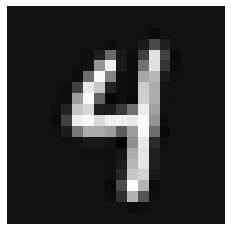

Neural Network Prediction:  [0.] (digit  [0.] )
556
Displaying Example Image


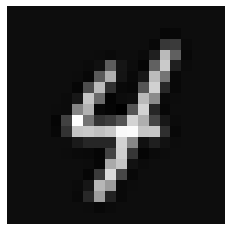

Neural Network Prediction:  [0.] (digit  [0.] )
557
Displaying Example Image


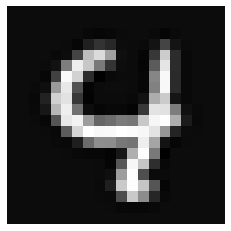

Neural Network Prediction:  [0.] (digit  [0.] )
558
Displaying Example Image


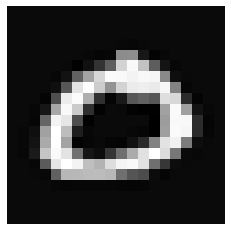

Neural Network Prediction:  [0.] (digit  [0.] )
559
Displaying Example Image


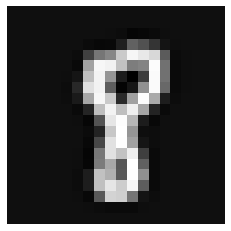

Neural Network Prediction:  [0.] (digit  [0.] )
560
Displaying Example Image


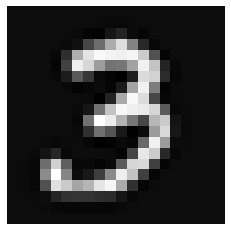

Neural Network Prediction:  [0.] (digit  [0.] )
561
Displaying Example Image


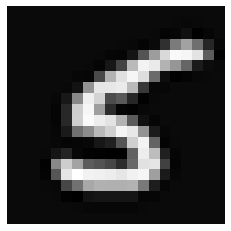

Neural Network Prediction:  [0.] (digit  [0.] )
562
Displaying Example Image


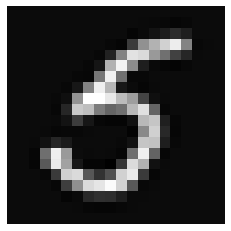

Neural Network Prediction:  [0.] (digit  [0.] )
563
Displaying Example Image


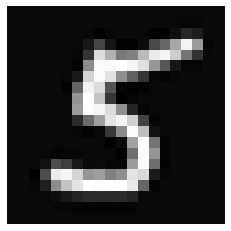

Neural Network Prediction:  [0.] (digit  [0.] )
564
Displaying Example Image


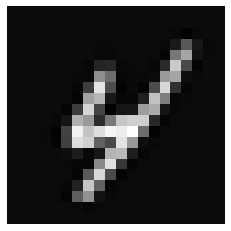

Neural Network Prediction:  [0.] (digit  [0.] )
565
Displaying Example Image


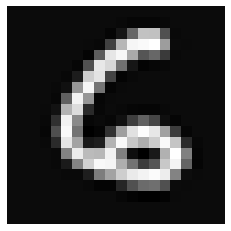

Neural Network Prediction:  [0.] (digit  [0.] )
566
Displaying Example Image


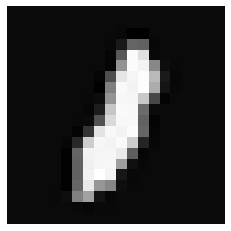

Neural Network Prediction:  [0.] (digit  [0.] )
567
Displaying Example Image


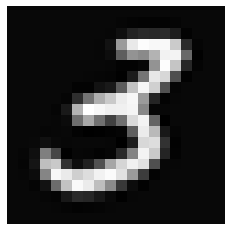

Neural Network Prediction:  [0.] (digit  [0.] )
568
Displaying Example Image


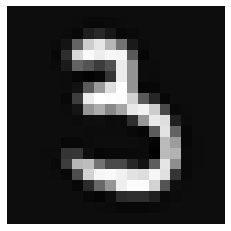

Neural Network Prediction:  [0.] (digit  [0.] )
569
Displaying Example Image


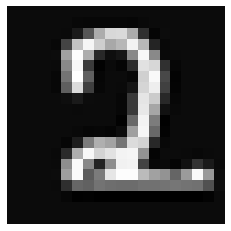

Neural Network Prediction:  [0.] (digit  [0.] )
570
Displaying Example Image


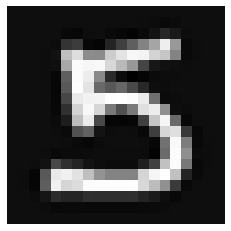

Neural Network Prediction:  [0.] (digit  [0.] )
571
Displaying Example Image


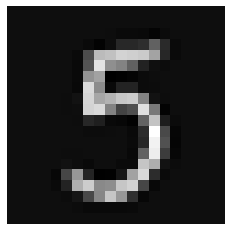

Neural Network Prediction:  [0.] (digit  [0.] )
572
Displaying Example Image


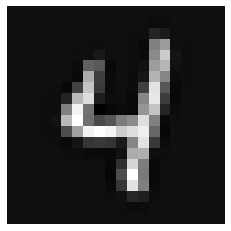

Neural Network Prediction:  [0.] (digit  [0.] )
573
Displaying Example Image


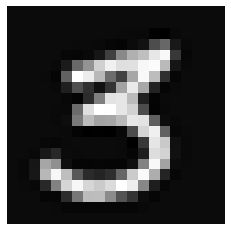

Neural Network Prediction:  [0.] (digit  [0.] )
574
Displaying Example Image


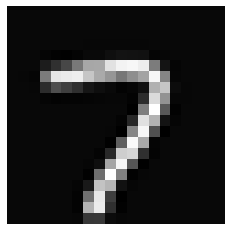

Neural Network Prediction:  [0.] (digit  [0.] )
575
Displaying Example Image


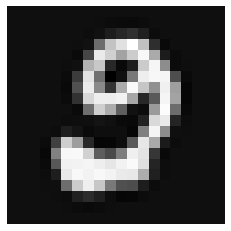

Neural Network Prediction:  [0.] (digit  [0.] )
576
Displaying Example Image


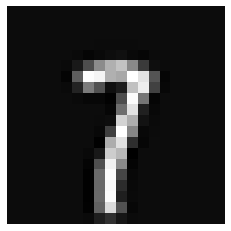

Neural Network Prediction:  [0.] (digit  [0.] )
577
Displaying Example Image


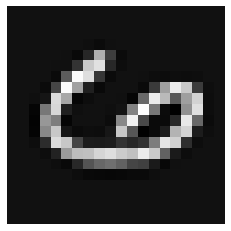

Neural Network Prediction:  [0.] (digit  [0.] )
578
Displaying Example Image


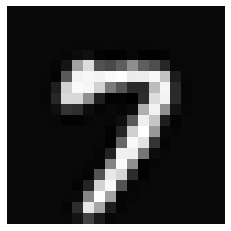

Neural Network Prediction:  [0.] (digit  [0.] )
579
Displaying Example Image


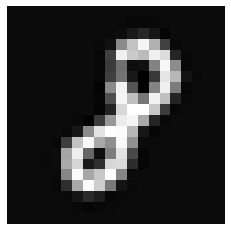

Neural Network Prediction:  [0.] (digit  [0.] )
580
Displaying Example Image


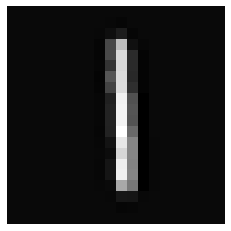

Neural Network Prediction:  [0.] (digit  [0.] )
581
Displaying Example Image


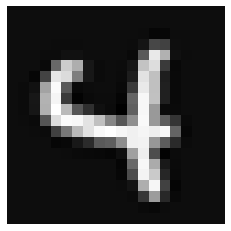

Neural Network Prediction:  [0.] (digit  [0.] )
582
Displaying Example Image


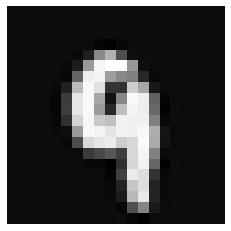

Neural Network Prediction:  [0.] (digit  [0.] )
583
Displaying Example Image


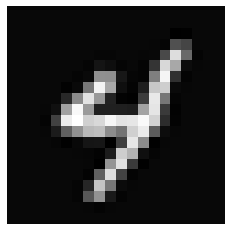

Neural Network Prediction:  [0.] (digit  [0.] )
584
Displaying Example Image


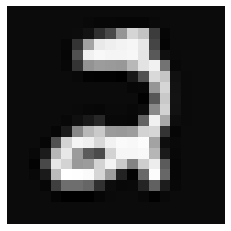

Neural Network Prediction:  [0.] (digit  [0.] )
585
Displaying Example Image


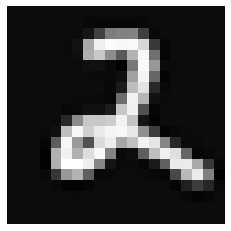

Neural Network Prediction:  [0.] (digit  [0.] )
586
Displaying Example Image


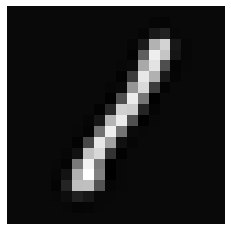

Neural Network Prediction:  [0.] (digit  [0.] )
587
Displaying Example Image


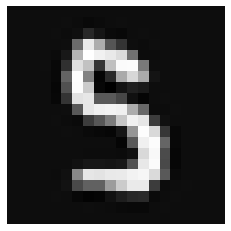

Neural Network Prediction:  [0.] (digit  [0.] )
588
Displaying Example Image


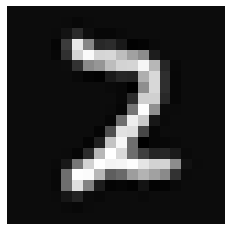

Neural Network Prediction:  [0.] (digit  [0.] )
589
Displaying Example Image


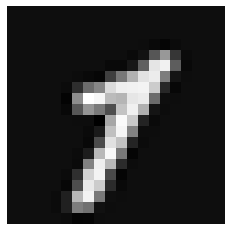

Neural Network Prediction:  [0.] (digit  [0.] )
590
Displaying Example Image


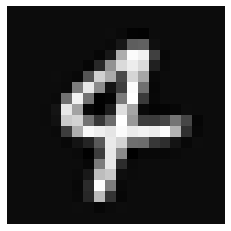

Neural Network Prediction:  [0.] (digit  [0.] )
591
Displaying Example Image


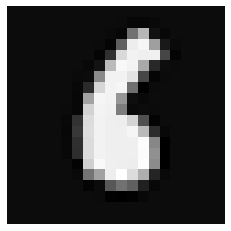

Neural Network Prediction:  [0.] (digit  [0.] )
592
Displaying Example Image


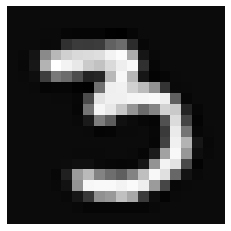

Neural Network Prediction:  [0.] (digit  [0.] )
593
Displaying Example Image


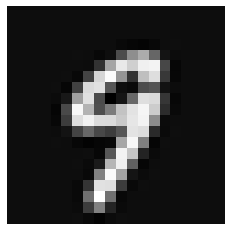

Neural Network Prediction:  [0.] (digit  [0.] )
594
Displaying Example Image


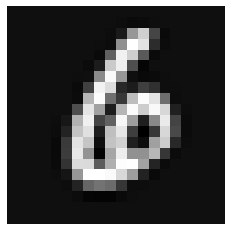

Neural Network Prediction:  [0.] (digit  [0.] )
595
Displaying Example Image


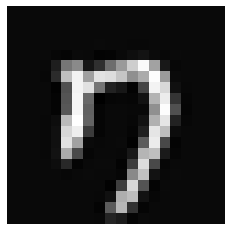

Neural Network Prediction:  [0.] (digit  [0.] )
596
Displaying Example Image


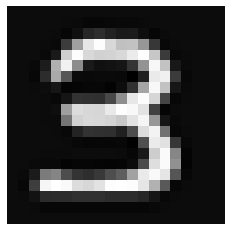

Neural Network Prediction:  [0.] (digit  [0.] )
597
Displaying Example Image


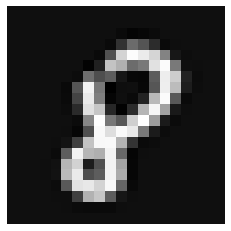

Neural Network Prediction:  [0.] (digit  [0.] )
598
Displaying Example Image


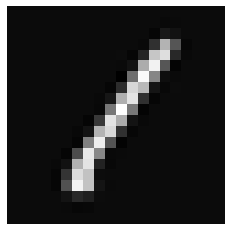

Neural Network Prediction:  [0.] (digit  [0.] )
599
Displaying Example Image


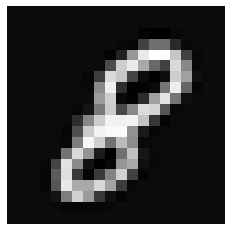

Neural Network Prediction:  [0.] (digit  [0.] )
600
Displaying Example Image


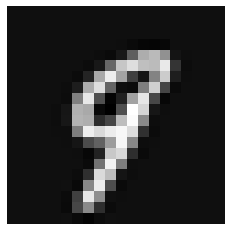

Neural Network Prediction:  [0.] (digit  [0.] )
601
Displaying Example Image


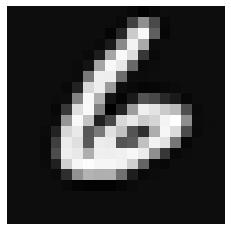

Neural Network Prediction:  [0.] (digit  [0.] )
602
Displaying Example Image


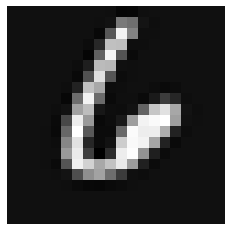

Neural Network Prediction:  [0.] (digit  [0.] )
603
Displaying Example Image


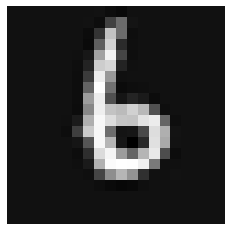

Neural Network Prediction:  [0.] (digit  [0.] )
604
Displaying Example Image


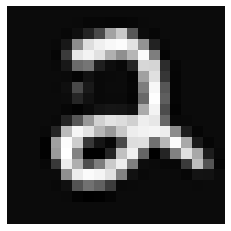

Neural Network Prediction:  [0.] (digit  [0.] )
605
Displaying Example Image


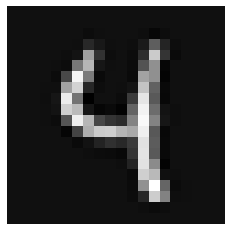

Neural Network Prediction:  [0.] (digit  [0.] )
606
Displaying Example Image


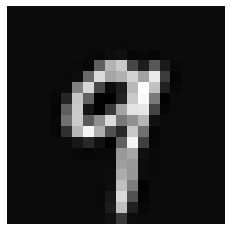

Neural Network Prediction:  [0.] (digit  [0.] )
607
Displaying Example Image


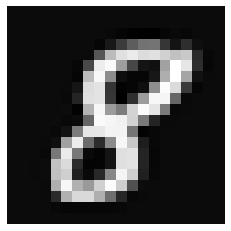

Neural Network Prediction:  [0.] (digit  [0.] )
608
Displaying Example Image


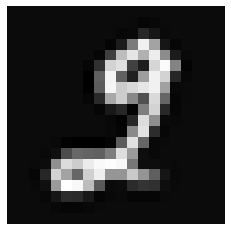

Neural Network Prediction:  [0.] (digit  [0.] )
609
Displaying Example Image


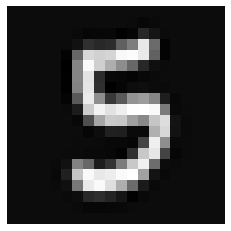

Neural Network Prediction:  [0.] (digit  [0.] )
610
Displaying Example Image


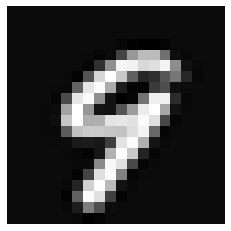

Neural Network Prediction:  [0.] (digit  [0.] )
611
Displaying Example Image


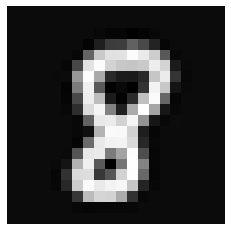

Neural Network Prediction:  [0.] (digit  [0.] )
612
Displaying Example Image


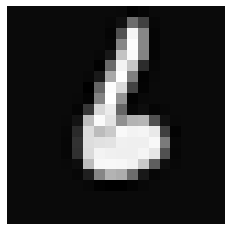

Neural Network Prediction:  [0.] (digit  [0.] )
613
Displaying Example Image


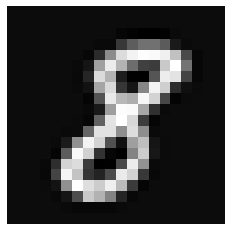

Neural Network Prediction:  [0.] (digit  [0.] )
614
Displaying Example Image


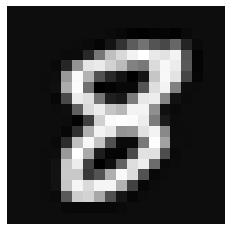

Neural Network Prediction:  [0.] (digit  [0.] )
615
Displaying Example Image


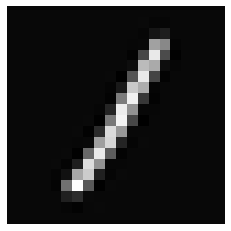

Neural Network Prediction:  [0.] (digit  [0.] )
616
Displaying Example Image


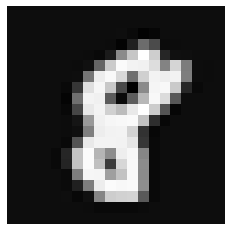

Neural Network Prediction:  [0.] (digit  [0.] )
617
Displaying Example Image


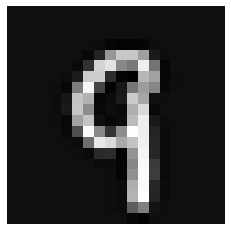

Neural Network Prediction:  [0.] (digit  [0.] )
618
Displaying Example Image


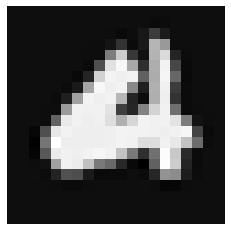

Neural Network Prediction:  [0.] (digit  [0.] )
619
Displaying Example Image


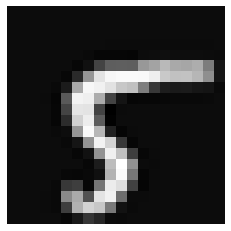

Neural Network Prediction:  [0.] (digit  [0.] )
620
Displaying Example Image


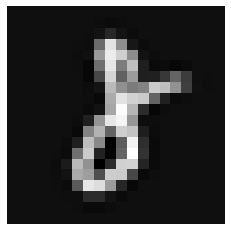

Neural Network Prediction:  [0.] (digit  [0.] )
621
Displaying Example Image


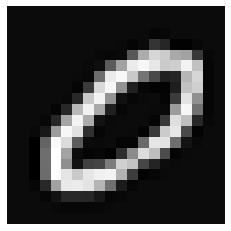

Neural Network Prediction:  [0.] (digit  [0.] )
622
Displaying Example Image


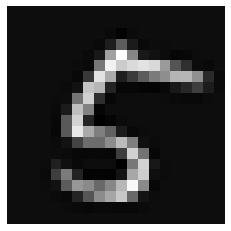

Neural Network Prediction:  [0.] (digit  [0.] )
623
Displaying Example Image


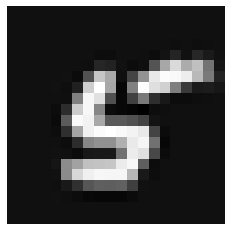

Neural Network Prediction:  [0.] (digit  [0.] )
624
Displaying Example Image


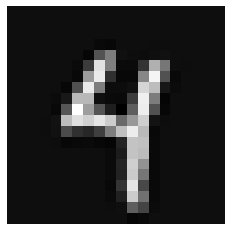

Neural Network Prediction:  [0.] (digit  [0.] )
625
Displaying Example Image


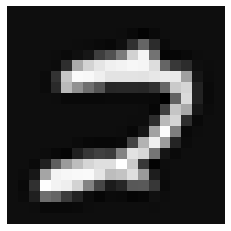

Neural Network Prediction:  [0.] (digit  [0.] )
626
Displaying Example Image


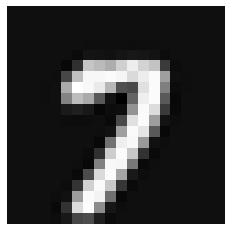

Neural Network Prediction:  [0.] (digit  [0.] )
627
Displaying Example Image


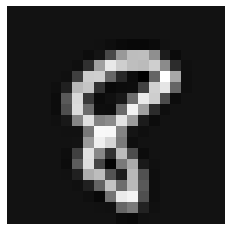

Neural Network Prediction:  [0.] (digit  [0.] )
628
Displaying Example Image


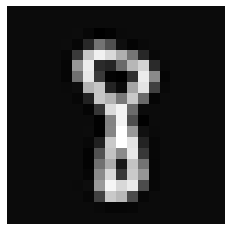

Neural Network Prediction:  [0.] (digit  [0.] )
629
Displaying Example Image


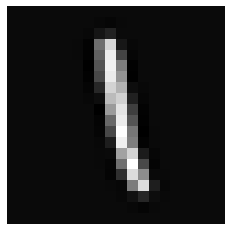

Neural Network Prediction:  [0.] (digit  [0.] )
630
Displaying Example Image


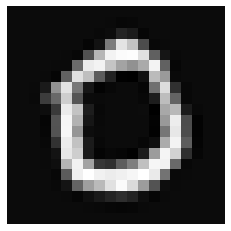

Neural Network Prediction:  [0.] (digit  [0.] )
631
Displaying Example Image


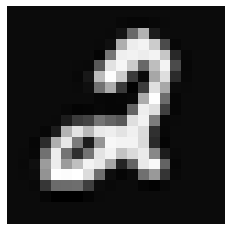

Neural Network Prediction:  [0.] (digit  [0.] )
632
Displaying Example Image


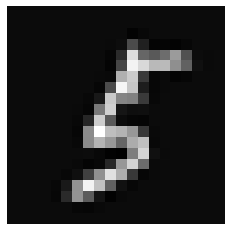

Neural Network Prediction:  [0.] (digit  [0.] )
633
Displaying Example Image


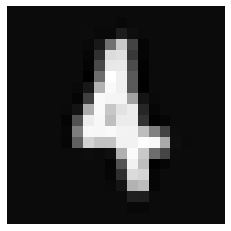

Neural Network Prediction:  [0.] (digit  [0.] )
634
Displaying Example Image


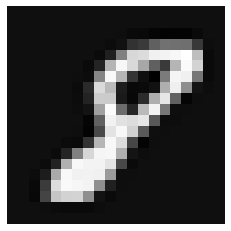

Neural Network Prediction:  [0.] (digit  [0.] )
635
Displaying Example Image


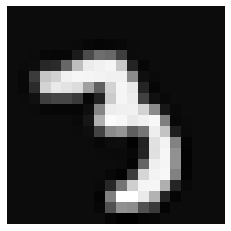

Neural Network Prediction:  [0.] (digit  [0.] )
636
Displaying Example Image


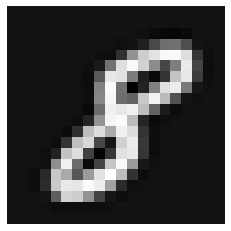

Neural Network Prediction:  [0.] (digit  [0.] )
637
Displaying Example Image


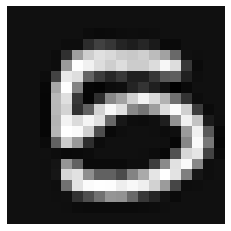

Neural Network Prediction:  [0.] (digit  [0.] )
638
Displaying Example Image


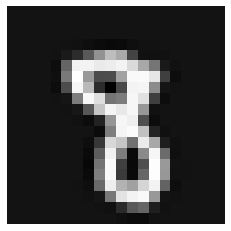

Neural Network Prediction:  [0.] (digit  [0.] )
639
Displaying Example Image


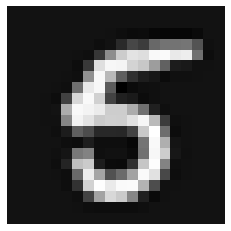

Neural Network Prediction:  [0.] (digit  [0.] )
640
Displaying Example Image


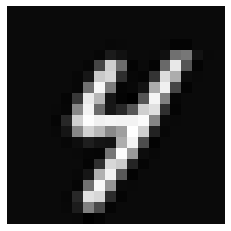

Neural Network Prediction:  [0.] (digit  [0.] )
641
Displaying Example Image


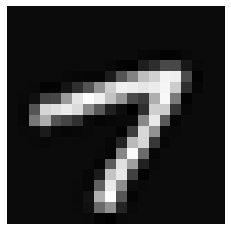

Neural Network Prediction:  [0.] (digit  [0.] )
642
Displaying Example Image


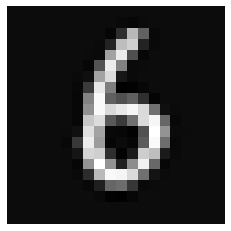

Neural Network Prediction:  [0.] (digit  [0.] )
643
Displaying Example Image


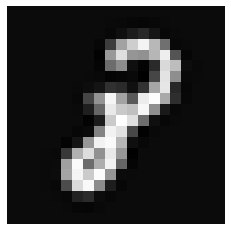

Neural Network Prediction:  [0.] (digit  [0.] )
644
Displaying Example Image


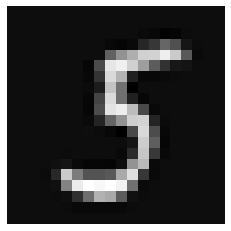

Neural Network Prediction:  [0.] (digit  [0.] )
645
Displaying Example Image


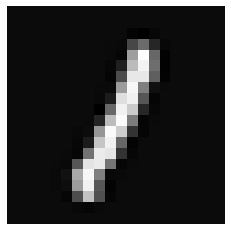

Neural Network Prediction:  [0.] (digit  [0.] )
646
Displaying Example Image


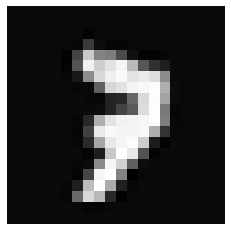

Neural Network Prediction:  [0.] (digit  [0.] )
647
Displaying Example Image


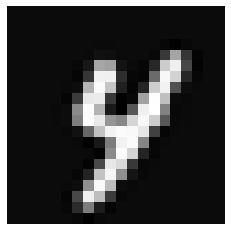

Neural Network Prediction:  [0.] (digit  [0.] )
648
Displaying Example Image


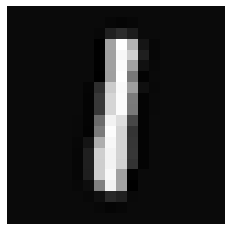

Neural Network Prediction:  [0.] (digit  [0.] )
649
Displaying Example Image


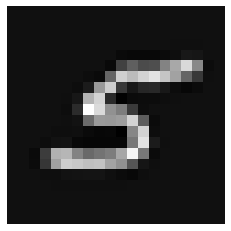

Neural Network Prediction:  [0.] (digit  [0.] )
650
Displaying Example Image


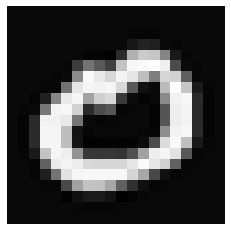

Neural Network Prediction:  [0.] (digit  [0.] )
651
Displaying Example Image


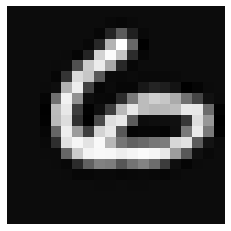

Neural Network Prediction:  [0.] (digit  [0.] )
652
Displaying Example Image


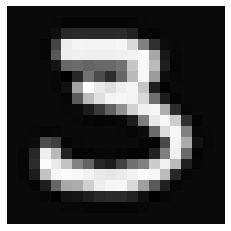

Neural Network Prediction:  [0.] (digit  [0.] )
653
Displaying Example Image


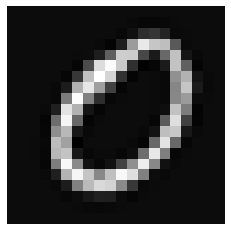

Neural Network Prediction:  [0.] (digit  [0.] )
654
Displaying Example Image


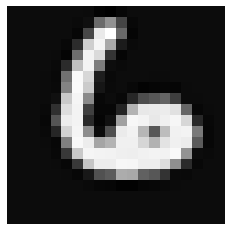

Neural Network Prediction:  [0.] (digit  [0.] )
655
Displaying Example Image


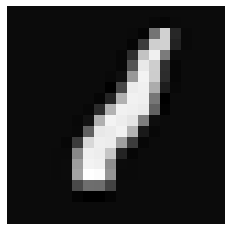

Neural Network Prediction:  [0.] (digit  [0.] )
656
Displaying Example Image


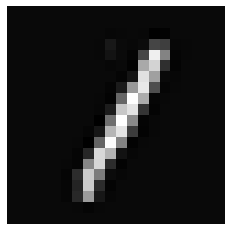

Neural Network Prediction:  [0.] (digit  [0.] )
657
Displaying Example Image


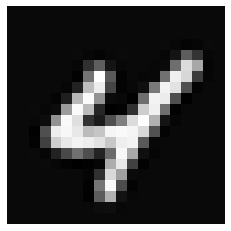

Neural Network Prediction:  [0.] (digit  [0.] )
658
Displaying Example Image


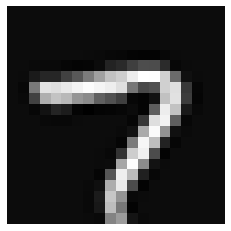

Neural Network Prediction:  [0.] (digit  [0.] )
659
Displaying Example Image


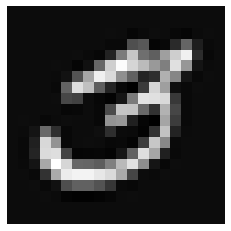

Neural Network Prediction:  [0.] (digit  [0.] )
660
Displaying Example Image


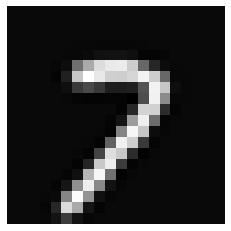

Neural Network Prediction:  [0.] (digit  [0.] )
661
Displaying Example Image


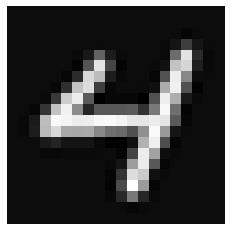

Neural Network Prediction:  [0.] (digit  [0.] )
662
Displaying Example Image


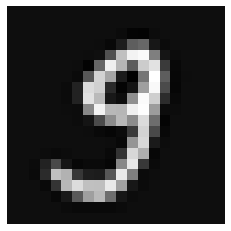

Neural Network Prediction:  [0.] (digit  [0.] )
663
Displaying Example Image


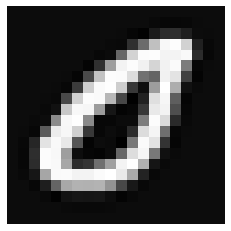

Neural Network Prediction:  [0.] (digit  [0.] )
664
Displaying Example Image


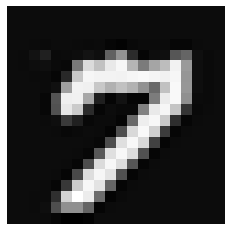

Neural Network Prediction:  [0.] (digit  [0.] )
665
Displaying Example Image


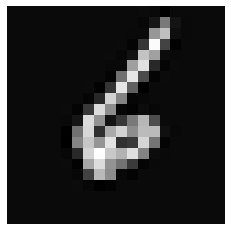

Neural Network Prediction:  [0.] (digit  [0.] )
666
Displaying Example Image


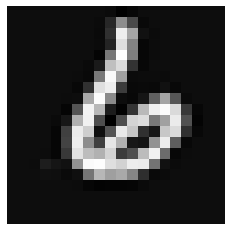

Neural Network Prediction:  [0.] (digit  [0.] )
667
Displaying Example Image


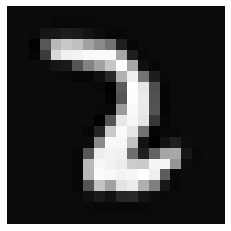

Neural Network Prediction:  [0.] (digit  [0.] )
668
Displaying Example Image


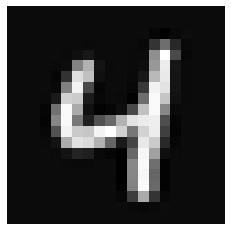

Neural Network Prediction:  [0.] (digit  [0.] )
669
Displaying Example Image


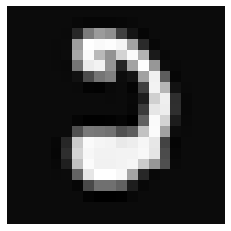

Neural Network Prediction:  [0.] (digit  [0.] )
670
Displaying Example Image


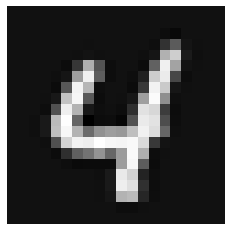

Neural Network Prediction:  [0.] (digit  [0.] )
671
Displaying Example Image


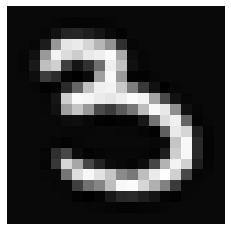

Neural Network Prediction:  [0.] (digit  [0.] )
672
Displaying Example Image


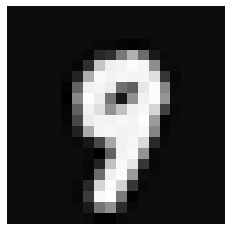

Neural Network Prediction:  [0.] (digit  [0.] )
673
Displaying Example Image


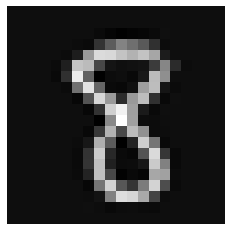

Neural Network Prediction:  [0.] (digit  [0.] )
674
Displaying Example Image


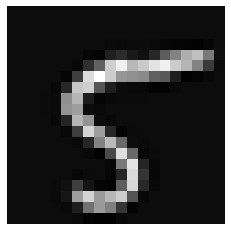

Neural Network Prediction:  [0.] (digit  [0.] )
675
Displaying Example Image


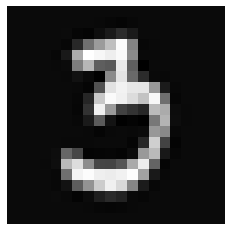

Neural Network Prediction:  [0.] (digit  [0.] )
676
Displaying Example Image


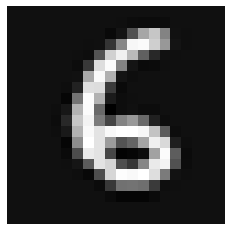

Neural Network Prediction:  [0.] (digit  [0.] )
677
Displaying Example Image


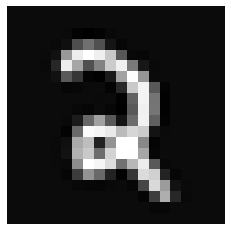

Neural Network Prediction:  [0.] (digit  [0.] )
678
Displaying Example Image


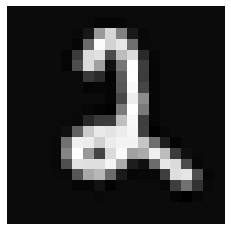

Neural Network Prediction:  [0.] (digit  [0.] )
679
Displaying Example Image


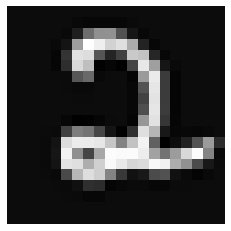

Neural Network Prediction:  [0.] (digit  [0.] )
680
Displaying Example Image


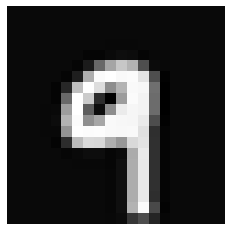

Neural Network Prediction:  [0.] (digit  [0.] )
681
Displaying Example Image


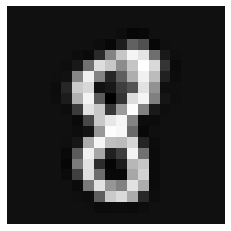

Neural Network Prediction:  [0.] (digit  [0.] )
682
Displaying Example Image


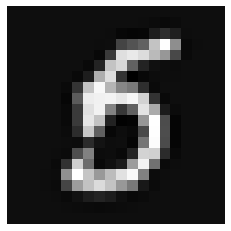

Neural Network Prediction:  [0.] (digit  [0.] )
683
Displaying Example Image


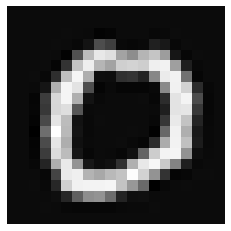

Neural Network Prediction:  [0.] (digit  [0.] )
684
Displaying Example Image


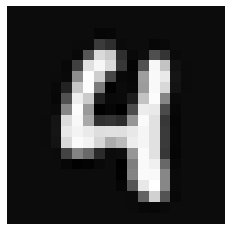

Neural Network Prediction:  [0.] (digit  [0.] )
685
Displaying Example Image


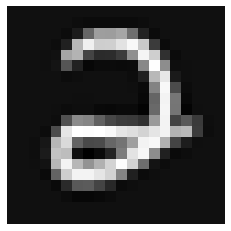

Neural Network Prediction:  [0.] (digit  [0.] )
686
Displaying Example Image


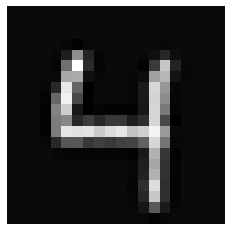

Neural Network Prediction:  [0.] (digit  [0.] )
687
Displaying Example Image


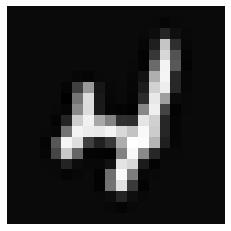

Neural Network Prediction:  [0.] (digit  [0.] )
688
Displaying Example Image


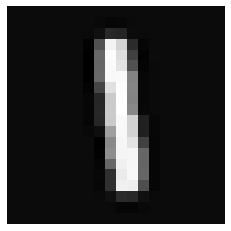

Neural Network Prediction:  [0.] (digit  [0.] )
689
Displaying Example Image


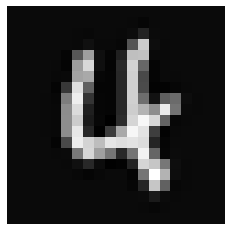

Neural Network Prediction:  [0.] (digit  [0.] )
690
Displaying Example Image


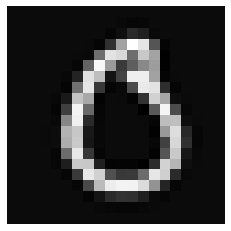

Neural Network Prediction:  [0.] (digit  [0.] )
691
Displaying Example Image


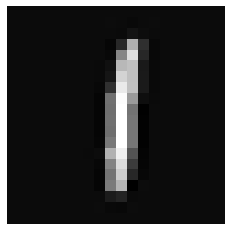

Neural Network Prediction:  [0.] (digit  [0.] )
692
Displaying Example Image


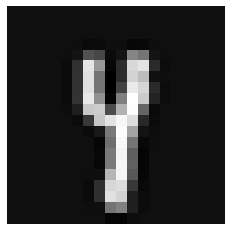

Neural Network Prediction:  [0.] (digit  [0.] )
693
Displaying Example Image


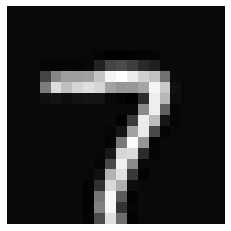

Neural Network Prediction:  [0.] (digit  [0.] )
694
Displaying Example Image


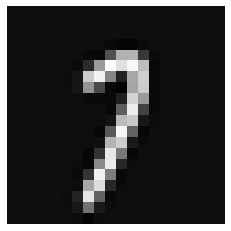

Neural Network Prediction:  [0.] (digit  [0.] )
695
Displaying Example Image


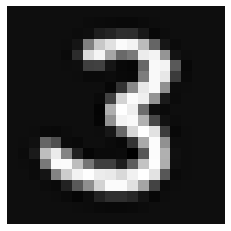

Neural Network Prediction:  [0.] (digit  [0.] )
696
Displaying Example Image


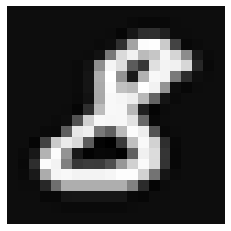

Neural Network Prediction:  [0.] (digit  [0.] )
697
Displaying Example Image


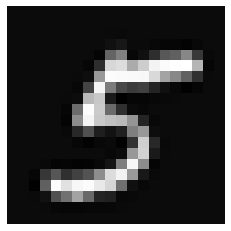

Neural Network Prediction:  [0.] (digit  [0.] )
698
Displaying Example Image


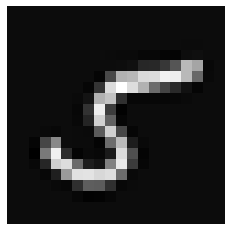

Neural Network Prediction:  [0.] (digit  [0.] )
699
Displaying Example Image


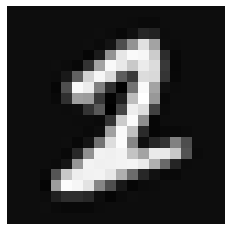

Neural Network Prediction:  [0.] (digit  [0.] )
700
Displaying Example Image


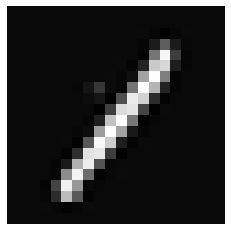

Neural Network Prediction:  [0.] (digit  [0.] )
701
Displaying Example Image


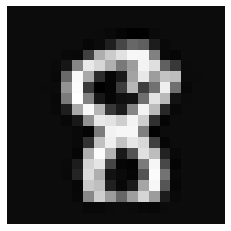

Neural Network Prediction:  [0.] (digit  [0.] )
702
Displaying Example Image


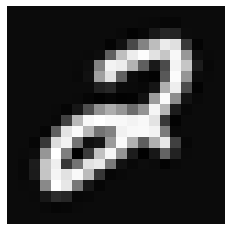

Neural Network Prediction:  [0.] (digit  [0.] )
703
Displaying Example Image


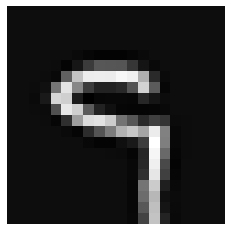

Neural Network Prediction:  [0.] (digit  [0.] )
704
Displaying Example Image


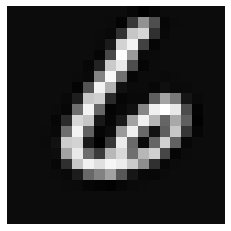

Neural Network Prediction:  [0.] (digit  [0.] )
705
Displaying Example Image


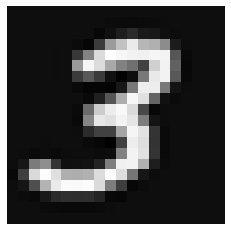

Neural Network Prediction:  [0.] (digit  [0.] )
706
Displaying Example Image


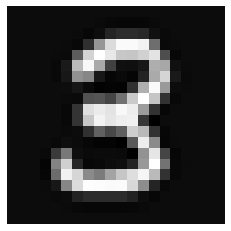

Neural Network Prediction:  [0.] (digit  [0.] )
707
Displaying Example Image


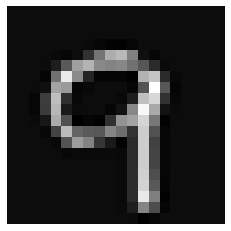

Neural Network Prediction:  [0.] (digit  [0.] )
708
Displaying Example Image


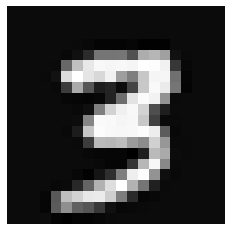

Neural Network Prediction:  [0.] (digit  [0.] )
709
Displaying Example Image


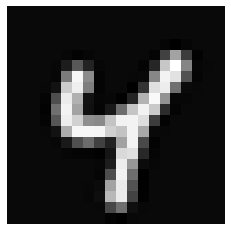

Neural Network Prediction:  [0.] (digit  [0.] )
710
Displaying Example Image


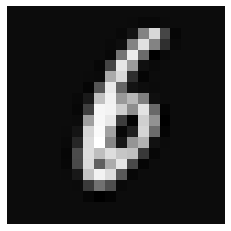

Neural Network Prediction:  [0.] (digit  [0.] )
711
Displaying Example Image


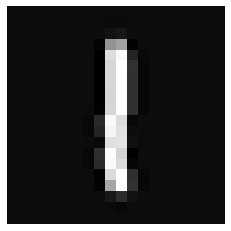

Neural Network Prediction:  [0.] (digit  [0.] )
712
Displaying Example Image


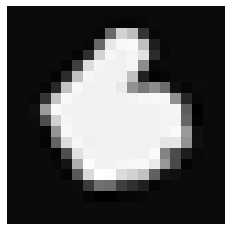

Neural Network Prediction:  [0.] (digit  [0.] )
713
Displaying Example Image


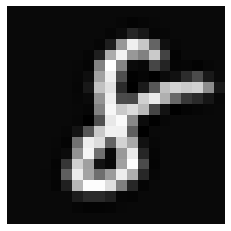

Neural Network Prediction:  [0.] (digit  [0.] )
714
Displaying Example Image


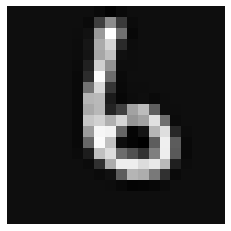

Neural Network Prediction:  [0.] (digit  [0.] )
715
Displaying Example Image


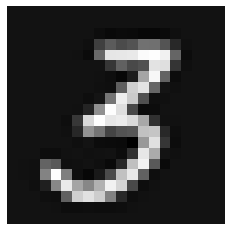

Neural Network Prediction:  [0.] (digit  [0.] )
716
Displaying Example Image


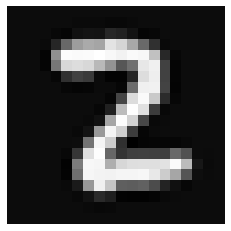

Neural Network Prediction:  [0.] (digit  [0.] )
717
Displaying Example Image


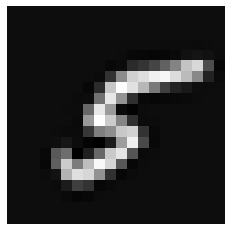

Neural Network Prediction:  [0.] (digit  [0.] )
718
Displaying Example Image


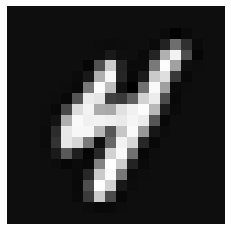

Neural Network Prediction:  [0.] (digit  [0.] )
719
Displaying Example Image


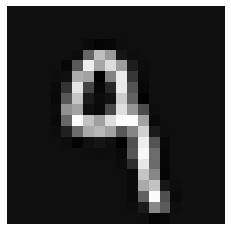

Neural Network Prediction:  [0.] (digit  [0.] )
720
Displaying Example Image


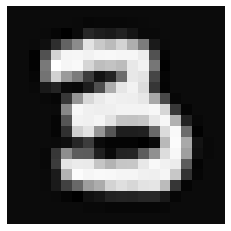

Neural Network Prediction:  [0.] (digit  [0.] )
721
Displaying Example Image


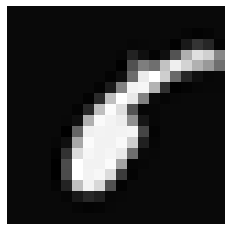

Neural Network Prediction:  [0.] (digit  [0.] )
722
Displaying Example Image


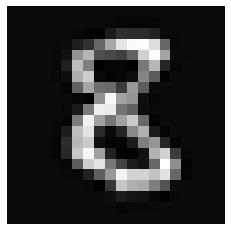

Neural Network Prediction:  [0.] (digit  [0.] )
723
Displaying Example Image


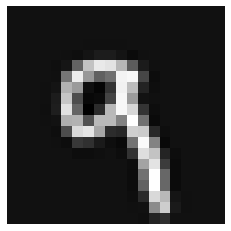

Neural Network Prediction:  [0.] (digit  [0.] )
724
Displaying Example Image


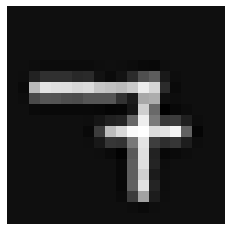

Neural Network Prediction:  [0.] (digit  [0.] )
725
Displaying Example Image


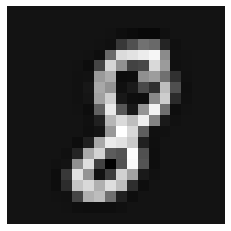

Neural Network Prediction:  [0.] (digit  [0.] )
726
Displaying Example Image


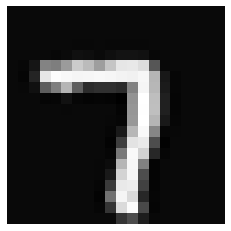

Neural Network Prediction:  [0.] (digit  [0.] )
727
Displaying Example Image


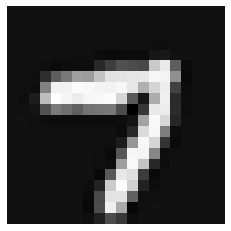

Neural Network Prediction:  [0.] (digit  [0.] )
728
Displaying Example Image


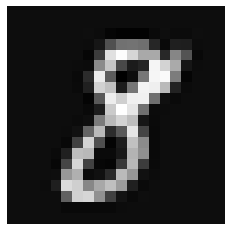

Neural Network Prediction:  [0.] (digit  [0.] )
729
Displaying Example Image


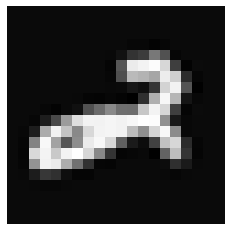

Neural Network Prediction:  [0.] (digit  [0.] )
730
Displaying Example Image


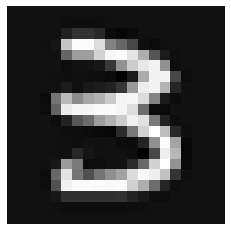

Neural Network Prediction:  [0.] (digit  [0.] )
731
Displaying Example Image


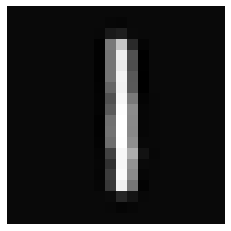

Neural Network Prediction:  [0.] (digit  [0.] )
732
Displaying Example Image


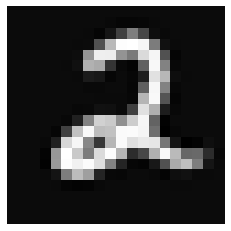

Neural Network Prediction:  [0.] (digit  [0.] )
733
Displaying Example Image


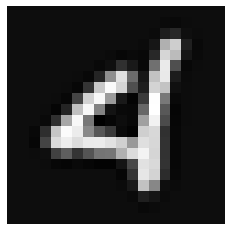

Neural Network Prediction:  [0.] (digit  [0.] )
734
Displaying Example Image


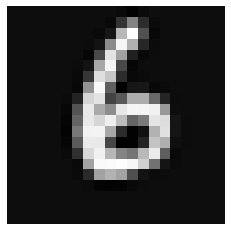

Neural Network Prediction:  [0.] (digit  [0.] )
735
Displaying Example Image


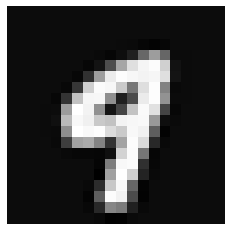

Neural Network Prediction:  [0.] (digit  [0.] )
736
Displaying Example Image


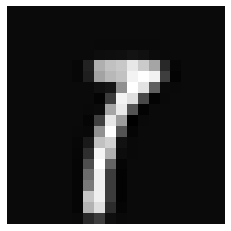

Neural Network Prediction:  [0.] (digit  [0.] )
737
Displaying Example Image


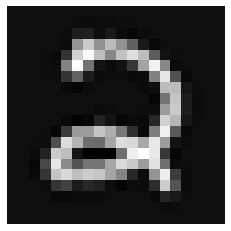

Neural Network Prediction:  [0.] (digit  [0.] )
738
Displaying Example Image


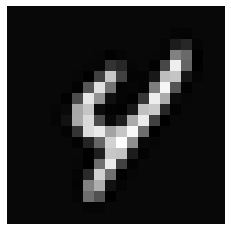

Neural Network Prediction:  [0.] (digit  [0.] )
739
Displaying Example Image


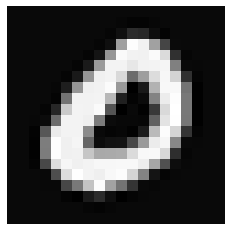

Neural Network Prediction:  [0.] (digit  [0.] )
740
Displaying Example Image


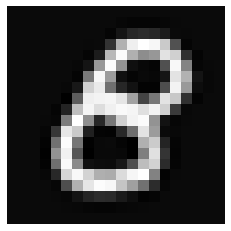

Neural Network Prediction:  [0.] (digit  [0.] )
741
Displaying Example Image


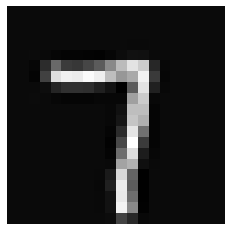

Neural Network Prediction:  [0.] (digit  [0.] )
742
Displaying Example Image


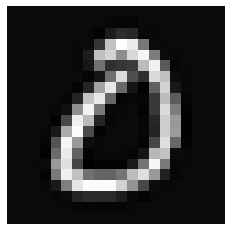

Neural Network Prediction:  [0.] (digit  [0.] )
743
Displaying Example Image


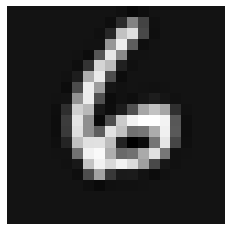

Neural Network Prediction:  [0.] (digit  [0.] )
744
Displaying Example Image


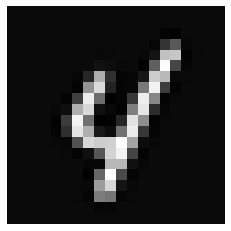

Neural Network Prediction:  [0.] (digit  [0.] )
745
Displaying Example Image


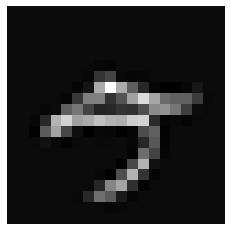

Neural Network Prediction:  [0.] (digit  [0.] )
746
Displaying Example Image


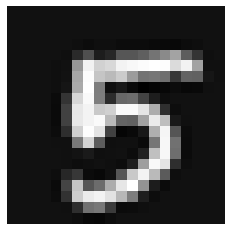

Neural Network Prediction:  [0.] (digit  [0.] )
747
Displaying Example Image


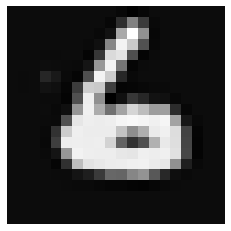

Neural Network Prediction:  [0.] (digit  [0.] )
748
Displaying Example Image


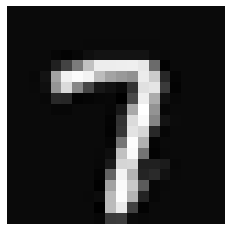

Neural Network Prediction:  [0.] (digit  [0.] )
749
Displaying Example Image


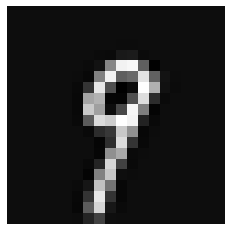

Neural Network Prediction:  [0.] (digit  [0.] )
750
Displaying Example Image


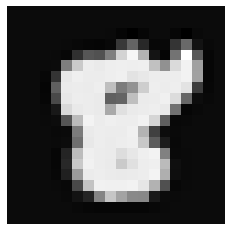

Neural Network Prediction:  [0.] (digit  [0.] )
751
Displaying Example Image


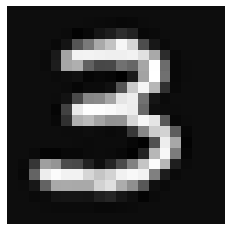

Neural Network Prediction:  [0.] (digit  [0.] )
752
Displaying Example Image


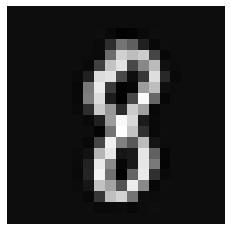

Neural Network Prediction:  [0.] (digit  [0.] )
753
Displaying Example Image


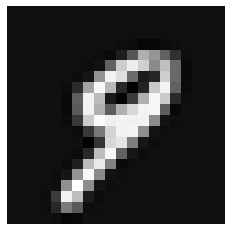

Neural Network Prediction:  [0.] (digit  [0.] )
754
Displaying Example Image


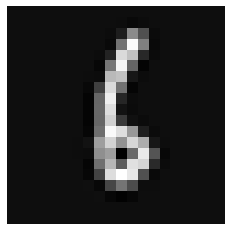

Neural Network Prediction:  [0.] (digit  [0.] )
755
Displaying Example Image


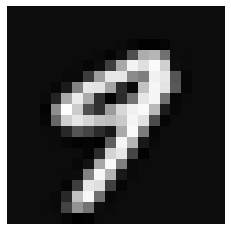

Neural Network Prediction:  [0.] (digit  [0.] )
756
Displaying Example Image


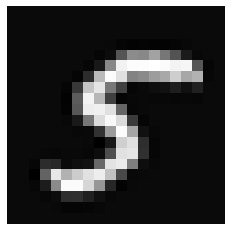

Neural Network Prediction:  [0.] (digit  [0.] )
757
Displaying Example Image


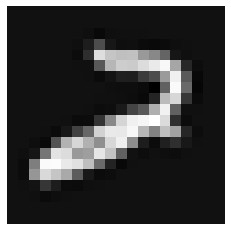

Neural Network Prediction:  [0.] (digit  [0.] )
758
Displaying Example Image


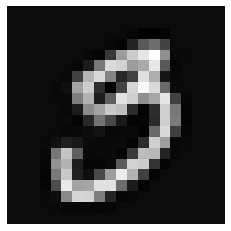

Neural Network Prediction:  [0.] (digit  [0.] )
759
Displaying Example Image


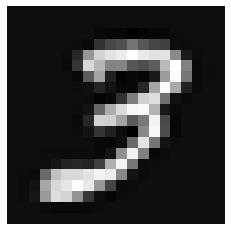

Neural Network Prediction:  [0.] (digit  [0.] )
760
Displaying Example Image


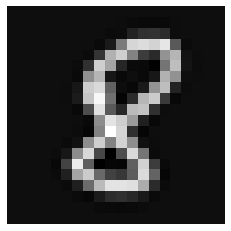

Neural Network Prediction:  [0.] (digit  [0.] )
761
Displaying Example Image


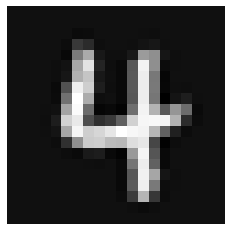

Neural Network Prediction:  [0.] (digit  [0.] )
762
Displaying Example Image


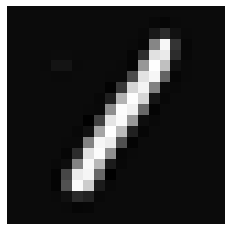

Neural Network Prediction:  [0.] (digit  [0.] )
763
Displaying Example Image


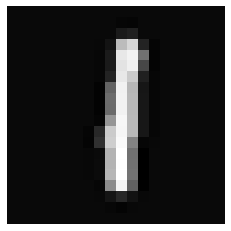

Neural Network Prediction:  [0.] (digit  [0.] )
764
Displaying Example Image


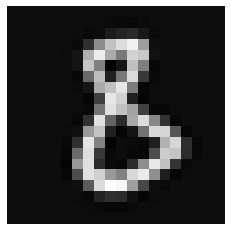

Neural Network Prediction:  [0.] (digit  [0.] )
765
Displaying Example Image


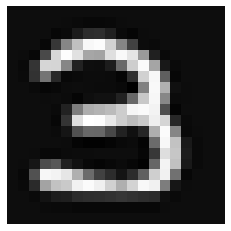

Neural Network Prediction:  [0.] (digit  [0.] )
766
Displaying Example Image


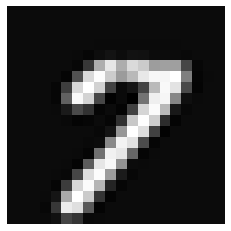

Neural Network Prediction:  [0.] (digit  [0.] )
767
Displaying Example Image


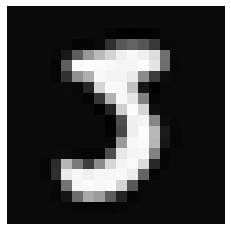

Neural Network Prediction:  [0.] (digit  [0.] )
768
Displaying Example Image


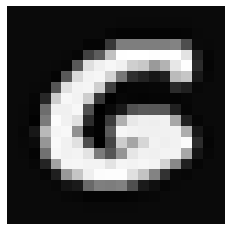

Neural Network Prediction:  [0.] (digit  [0.] )
769
Displaying Example Image


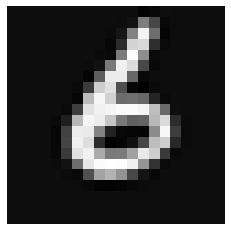

Neural Network Prediction:  [0.] (digit  [0.] )
770
Displaying Example Image


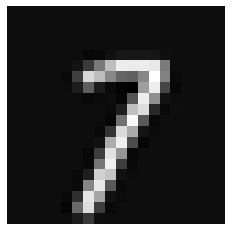

Neural Network Prediction:  [0.] (digit  [0.] )
771
Displaying Example Image


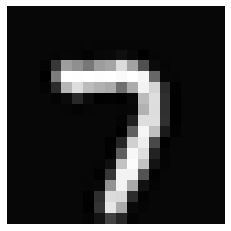

Neural Network Prediction:  [0.] (digit  [0.] )
772
Displaying Example Image


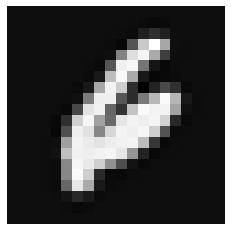

Neural Network Prediction:  [0.] (digit  [0.] )
773
Displaying Example Image


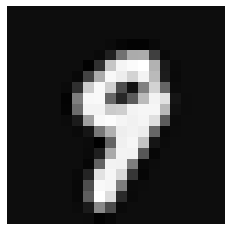

Neural Network Prediction:  [0.] (digit  [0.] )
774
Displaying Example Image


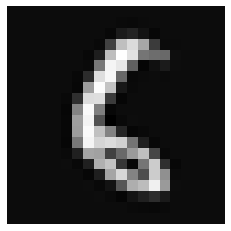

Neural Network Prediction:  [0.] (digit  [0.] )
775
Displaying Example Image


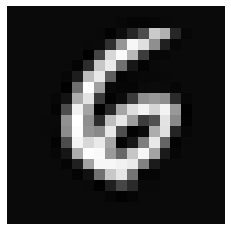

Neural Network Prediction:  [0.] (digit  [0.] )
776
Displaying Example Image


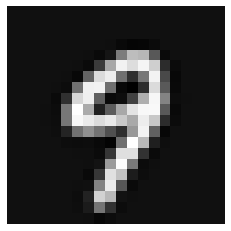

Neural Network Prediction:  [0.] (digit  [0.] )
777
Displaying Example Image


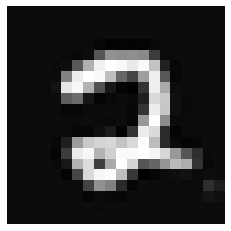

Neural Network Prediction:  [0.] (digit  [0.] )
778
Displaying Example Image


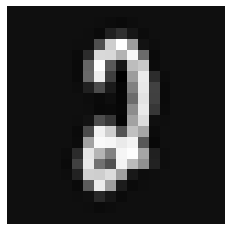

Neural Network Prediction:  [0.] (digit  [0.] )
779
Displaying Example Image


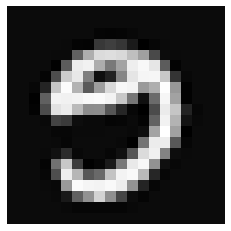

Neural Network Prediction:  [0.] (digit  [0.] )
780
Displaying Example Image


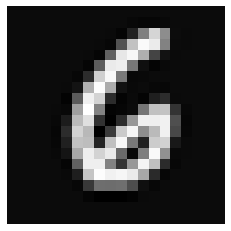

Neural Network Prediction:  [0.] (digit  [0.] )
781
Displaying Example Image


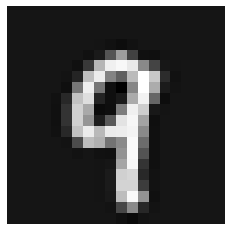

Neural Network Prediction:  [0.] (digit  [0.] )
782
Displaying Example Image


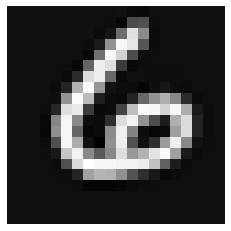

Neural Network Prediction:  [0.] (digit  [0.] )
783
Displaying Example Image


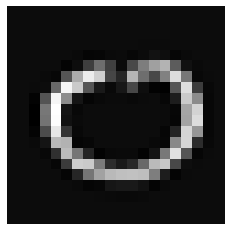

Neural Network Prediction:  [0.] (digit  [0.] )
784
Displaying Example Image


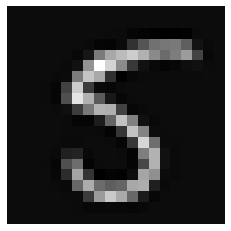

Neural Network Prediction:  [0.] (digit  [0.] )
785
Displaying Example Image


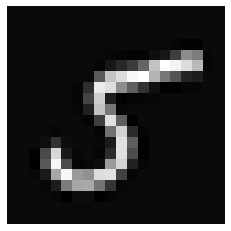

Neural Network Prediction:  [0.] (digit  [0.] )
786
Displaying Example Image


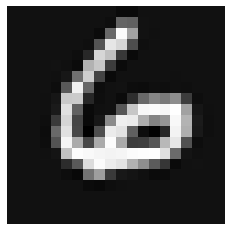

Neural Network Prediction:  [0.] (digit  [0.] )
787
Displaying Example Image


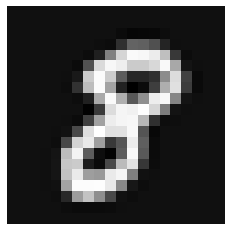

Neural Network Prediction:  [0.] (digit  [0.] )
788
Displaying Example Image


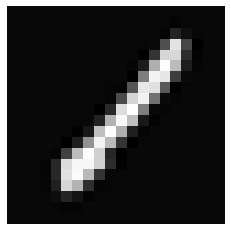

Neural Network Prediction:  [0.] (digit  [0.] )
789
Displaying Example Image


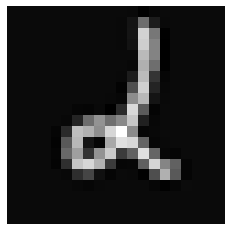

Neural Network Prediction:  [0.] (digit  [0.] )
790
Displaying Example Image


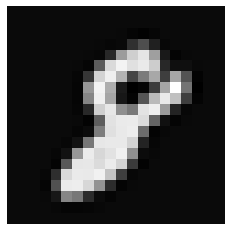

Neural Network Prediction:  [0.] (digit  [0.] )
791
Displaying Example Image


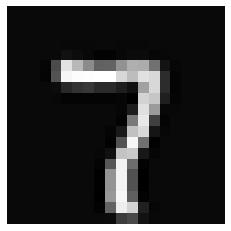

Neural Network Prediction:  [0.] (digit  [0.] )
792
Displaying Example Image


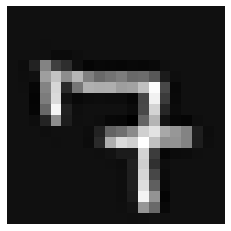

Neural Network Prediction:  [0.] (digit  [0.] )
793
Displaying Example Image


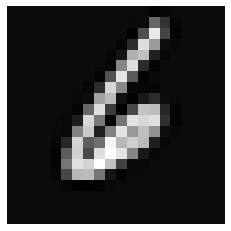

Neural Network Prediction:  [0.] (digit  [0.] )
794
Displaying Example Image


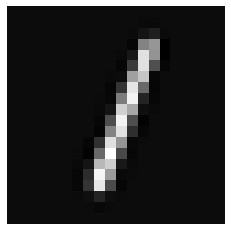

Neural Network Prediction:  [0.] (digit  [0.] )
795
Displaying Example Image


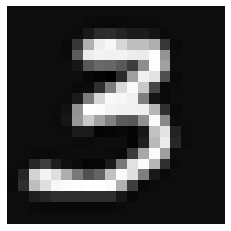

Neural Network Prediction:  [0.] (digit  [0.] )
796
Displaying Example Image


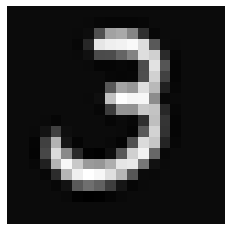

Neural Network Prediction:  [0.] (digit  [0.] )
797
Displaying Example Image


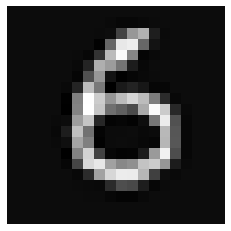

Neural Network Prediction:  [0.] (digit  [0.] )
798
Displaying Example Image


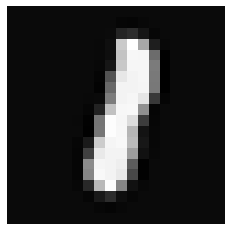

Neural Network Prediction:  [0.] (digit  [0.] )
799
Displaying Example Image


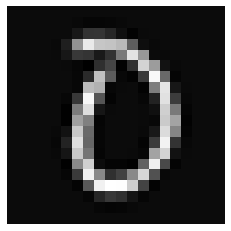

Neural Network Prediction:  [0.] (digit  [0.] )
800
Displaying Example Image


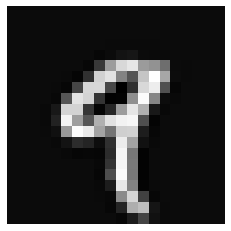

Neural Network Prediction:  [0.] (digit  [0.] )
801
Displaying Example Image


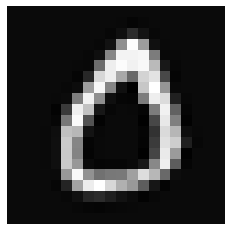

Neural Network Prediction:  [0.] (digit  [0.] )
802
Displaying Example Image


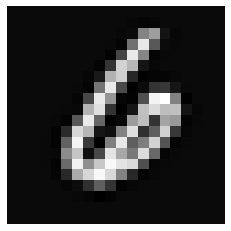

Neural Network Prediction:  [0.] (digit  [0.] )
803
Displaying Example Image


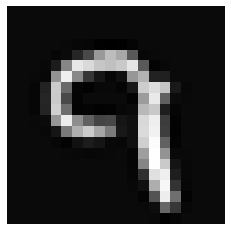

Neural Network Prediction:  [0.] (digit  [0.] )
804
Displaying Example Image


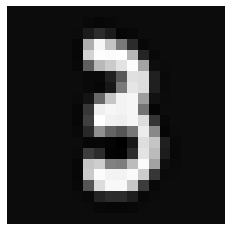

Neural Network Prediction:  [0.] (digit  [0.] )
805
Displaying Example Image


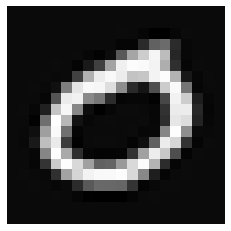

Neural Network Prediction:  [0.] (digit  [0.] )
806
Displaying Example Image


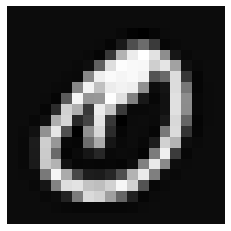

Neural Network Prediction:  [0.] (digit  [0.] )
807
Displaying Example Image


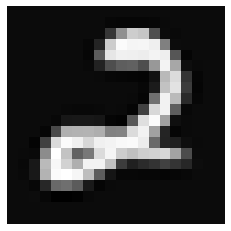

Neural Network Prediction:  [0.] (digit  [0.] )
808
Displaying Example Image


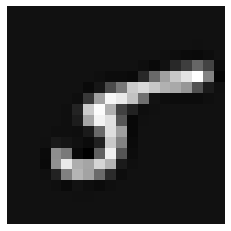

Neural Network Prediction:  [0.] (digit  [0.] )
809
Displaying Example Image


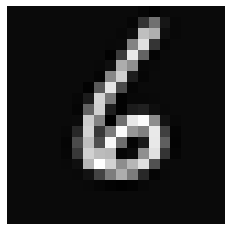

Neural Network Prediction:  [0.] (digit  [0.] )
810
Displaying Example Image


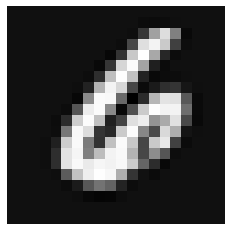

Neural Network Prediction:  [0.] (digit  [0.] )
811
Displaying Example Image


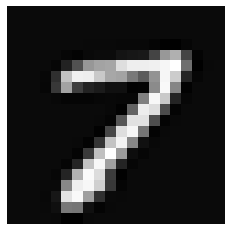

Neural Network Prediction:  [0.] (digit  [0.] )
812
Displaying Example Image


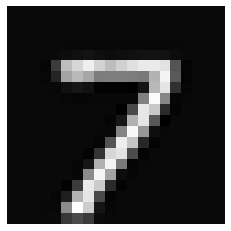

Neural Network Prediction:  [0.] (digit  [0.] )
813
Displaying Example Image


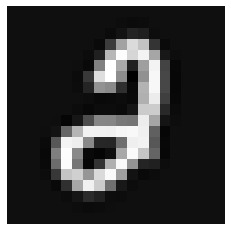

Neural Network Prediction:  [0.] (digit  [0.] )
814
Displaying Example Image


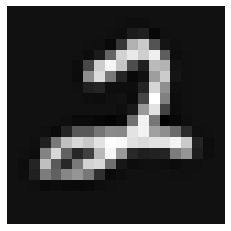

Neural Network Prediction:  [0.] (digit  [0.] )
815
Displaying Example Image


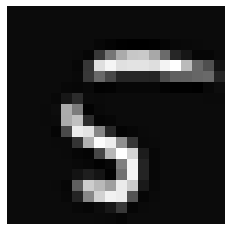

Neural Network Prediction:  [0.] (digit  [0.] )
816
Displaying Example Image


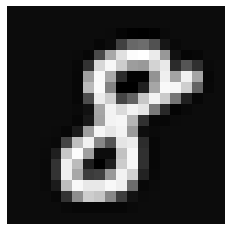

Neural Network Prediction:  [0.] (digit  [0.] )
817
Displaying Example Image


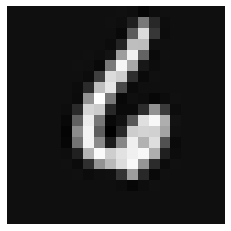

Neural Network Prediction:  [0.] (digit  [0.] )
818
Displaying Example Image


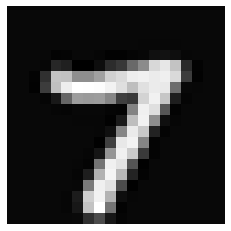

Neural Network Prediction:  [0.] (digit  [0.] )
819
Displaying Example Image


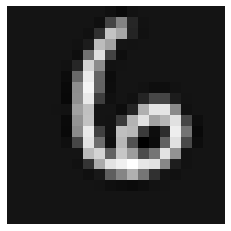

Neural Network Prediction:  [0.] (digit  [0.] )
820
Displaying Example Image


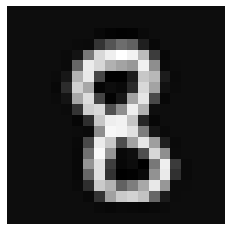

Neural Network Prediction:  [0.] (digit  [0.] )
821
Displaying Example Image


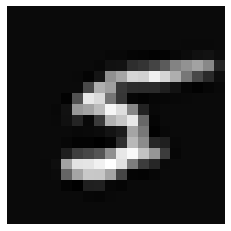

Neural Network Prediction:  [0.] (digit  [0.] )
822
Displaying Example Image


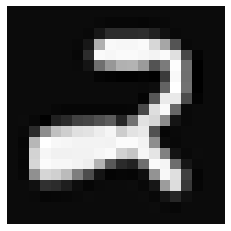

Neural Network Prediction:  [0.] (digit  [0.] )
823
Displaying Example Image


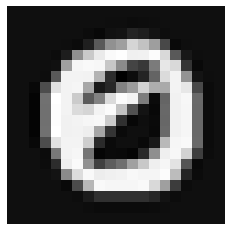

Neural Network Prediction:  [0.] (digit  [0.] )
824
Displaying Example Image


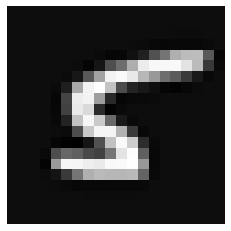

Neural Network Prediction:  [0.] (digit  [0.] )
825
Displaying Example Image


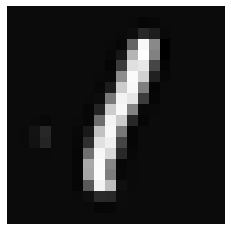

Neural Network Prediction:  [0.] (digit  [0.] )
826
Displaying Example Image


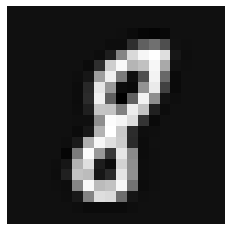

Neural Network Prediction:  [0.] (digit  [0.] )
827
Displaying Example Image


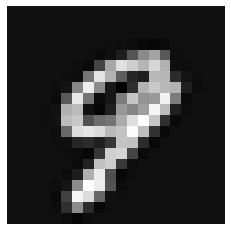

Neural Network Prediction:  [0.] (digit  [0.] )
828
Displaying Example Image


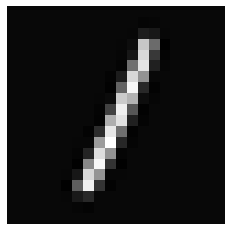

Neural Network Prediction:  [0.] (digit  [0.] )
829
Displaying Example Image


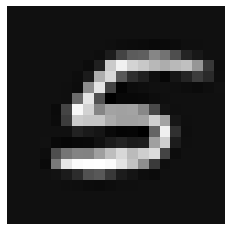

Neural Network Prediction:  [0.] (digit  [0.] )
830
Displaying Example Image


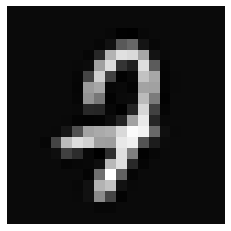

Neural Network Prediction:  [0.] (digit  [0.] )
831
Displaying Example Image


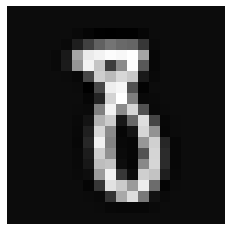

Neural Network Prediction:  [0.] (digit  [0.] )
832
Displaying Example Image


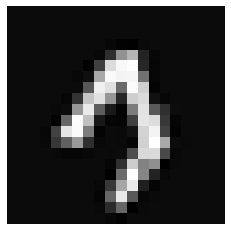

Neural Network Prediction:  [0.] (digit  [0.] )
833
Displaying Example Image


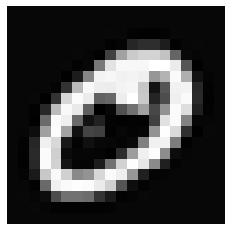

Neural Network Prediction:  [0.] (digit  [0.] )
834
Displaying Example Image


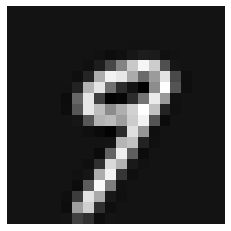

Neural Network Prediction:  [0.] (digit  [0.] )
835
Displaying Example Image


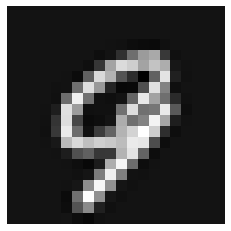

Neural Network Prediction:  [0.] (digit  [0.] )
836
Displaying Example Image


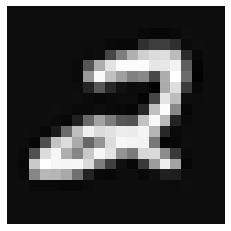

Neural Network Prediction:  [0.] (digit  [0.] )
837
Displaying Example Image


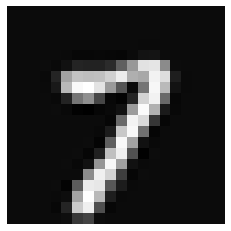

Neural Network Prediction:  [0.] (digit  [0.] )
838
Displaying Example Image


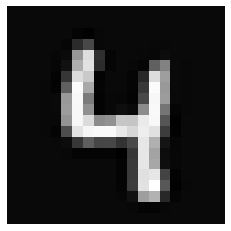

Neural Network Prediction:  [0.] (digit  [0.] )
839
Displaying Example Image


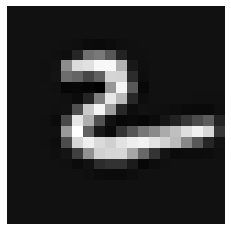

Neural Network Prediction:  [0.] (digit  [0.] )
840
Displaying Example Image


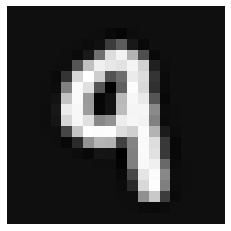

Neural Network Prediction:  [0.] (digit  [0.] )
841
Displaying Example Image


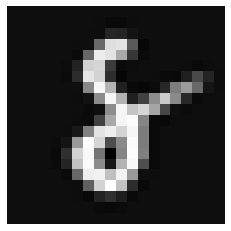

Neural Network Prediction:  [0.] (digit  [0.] )
842
Displaying Example Image


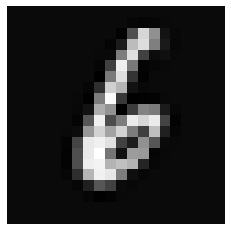

Neural Network Prediction:  [0.] (digit  [0.] )
843
Displaying Example Image


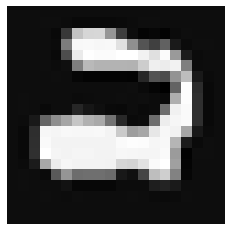

Neural Network Prediction:  [0.] (digit  [0.] )
844
Displaying Example Image


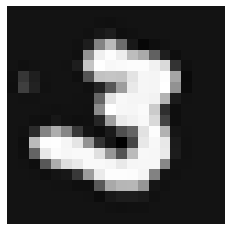

Neural Network Prediction:  [0.] (digit  [0.] )
845
Displaying Example Image


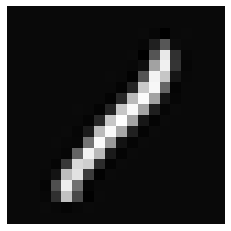

Neural Network Prediction:  [0.] (digit  [0.] )
846
Displaying Example Image


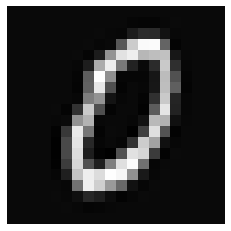

Neural Network Prediction:  [0.] (digit  [0.] )
847
Displaying Example Image


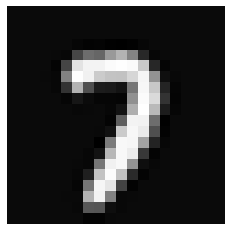

Neural Network Prediction:  [0.] (digit  [0.] )
848
Displaying Example Image


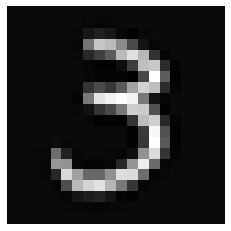

Neural Network Prediction:  [0.] (digit  [0.] )
849
Displaying Example Image


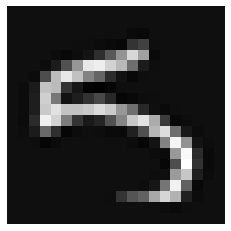

Neural Network Prediction:  [0.] (digit  [0.] )
850
Displaying Example Image


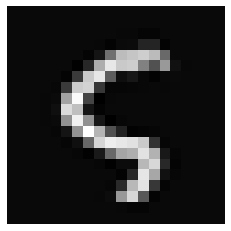

Neural Network Prediction:  [0.] (digit  [0.] )
851
Displaying Example Image


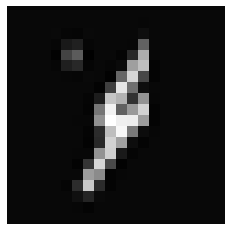

Neural Network Prediction:  [0.] (digit  [0.] )
852
Displaying Example Image


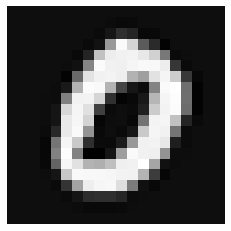

Neural Network Prediction:  [0.] (digit  [0.] )
853
Displaying Example Image


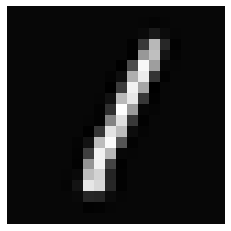

Neural Network Prediction:  [0.] (digit  [0.] )
854
Displaying Example Image


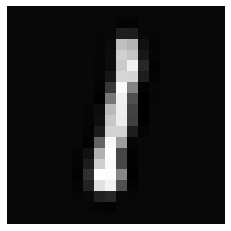

Neural Network Prediction:  [0.] (digit  [0.] )
855
Displaying Example Image


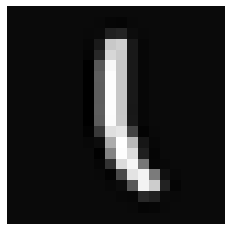

Neural Network Prediction:  [0.] (digit  [0.] )
856
Displaying Example Image


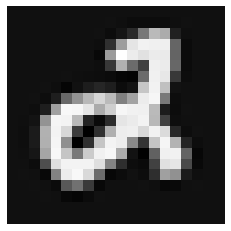

Neural Network Prediction:  [0.] (digit  [0.] )
857
Displaying Example Image


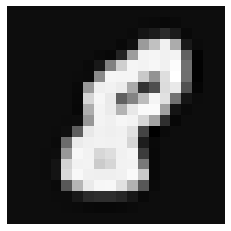

Neural Network Prediction:  [0.] (digit  [0.] )
858
Displaying Example Image


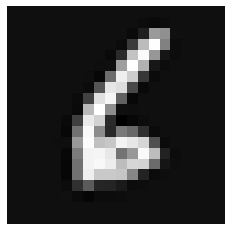

Neural Network Prediction:  [0.] (digit  [0.] )
859
Displaying Example Image


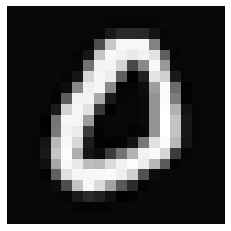

Neural Network Prediction:  [0.] (digit  [0.] )
860
Displaying Example Image


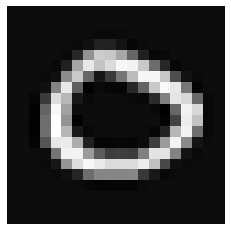

Neural Network Prediction:  [0.] (digit  [0.] )
861
Displaying Example Image


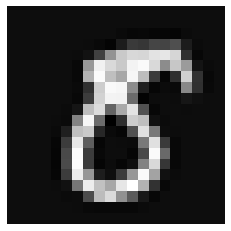

Neural Network Prediction:  [0.] (digit  [0.] )
862
Displaying Example Image


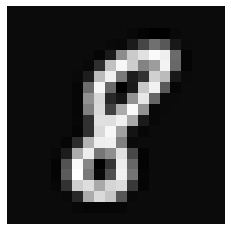

Neural Network Prediction:  [0.] (digit  [0.] )
863
Displaying Example Image


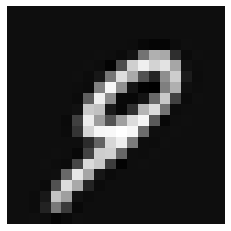

Neural Network Prediction:  [0.] (digit  [0.] )
864
Displaying Example Image


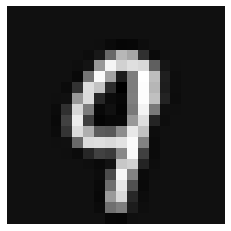

Neural Network Prediction:  [0.] (digit  [0.] )
865
Displaying Example Image


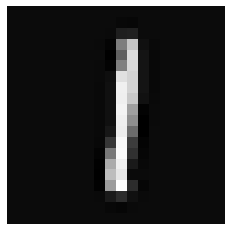

Neural Network Prediction:  [0.] (digit  [0.] )
866
Displaying Example Image


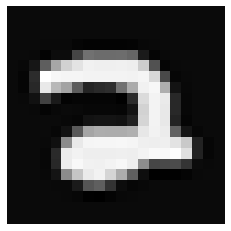

Neural Network Prediction:  [0.] (digit  [0.] )
867
Displaying Example Image


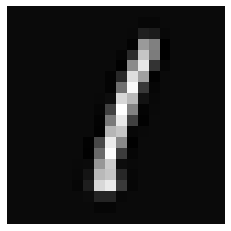

Neural Network Prediction:  [0.] (digit  [0.] )
868
Displaying Example Image


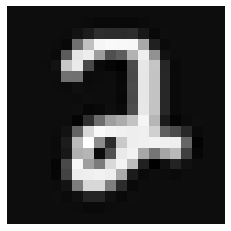

Neural Network Prediction:  [0.] (digit  [0.] )
869
Displaying Example Image


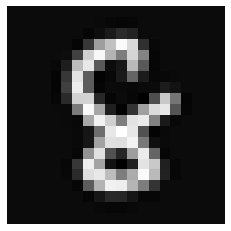

Neural Network Prediction:  [0.] (digit  [0.] )
870
Displaying Example Image


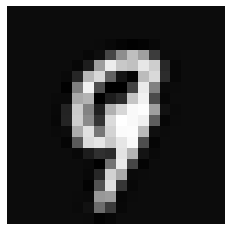

Neural Network Prediction:  [0.] (digit  [0.] )
871
Displaying Example Image


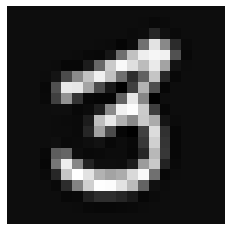

Neural Network Prediction:  [0.] (digit  [0.] )
872
Displaying Example Image


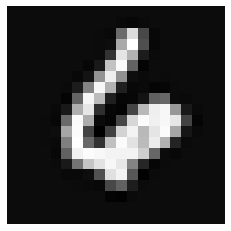

Neural Network Prediction:  [0.] (digit  [0.] )
873
Displaying Example Image


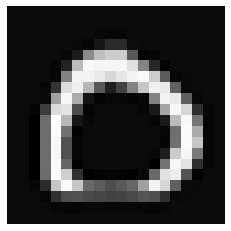

Neural Network Prediction:  [0.] (digit  [0.] )
874
Displaying Example Image


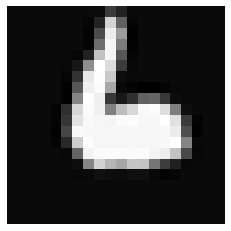

Neural Network Prediction:  [0.] (digit  [0.] )
875
Displaying Example Image


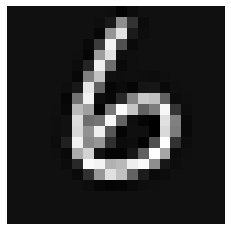

Neural Network Prediction:  [0.] (digit  [0.] )
876
Displaying Example Image


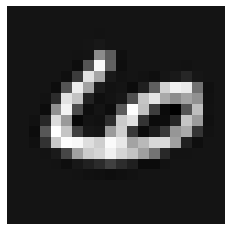

Neural Network Prediction:  [0.] (digit  [0.] )
877
Displaying Example Image


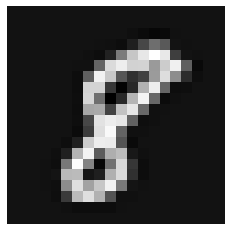

Neural Network Prediction:  [0.] (digit  [0.] )
878
Displaying Example Image


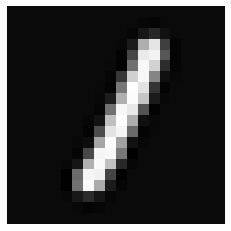

Neural Network Prediction:  [0.] (digit  [0.] )
879
Displaying Example Image


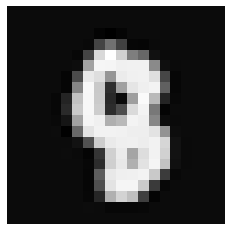

Neural Network Prediction:  [0.] (digit  [0.] )
880
Displaying Example Image


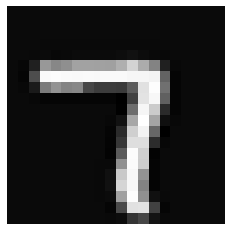

Neural Network Prediction:  [0.] (digit  [0.] )
881
Displaying Example Image


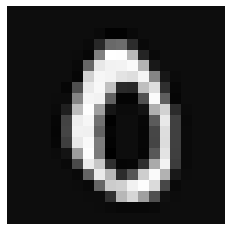

Neural Network Prediction:  [0.] (digit  [0.] )
882
Displaying Example Image


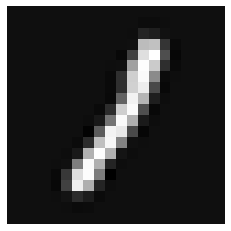

Neural Network Prediction:  [0.] (digit  [0.] )
883
Displaying Example Image


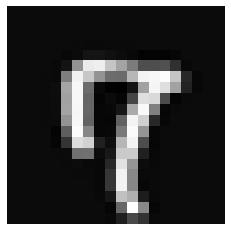

Neural Network Prediction:  [0.] (digit  [0.] )
884
Displaying Example Image


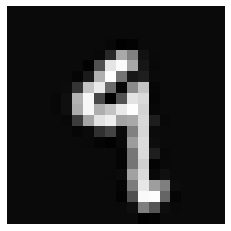

Neural Network Prediction:  [0.] (digit  [0.] )
885
Displaying Example Image


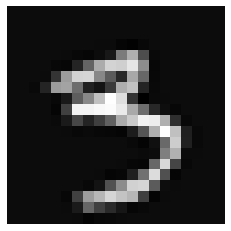

Neural Network Prediction:  [0.] (digit  [0.] )
886
Displaying Example Image


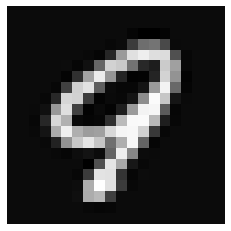

Neural Network Prediction:  [0.] (digit  [0.] )
887
Displaying Example Image


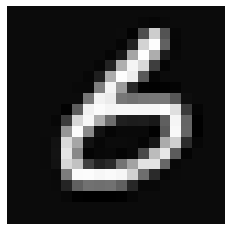

Neural Network Prediction:  [0.] (digit  [0.] )
888
Displaying Example Image


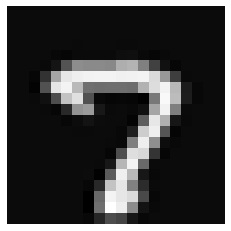

Neural Network Prediction:  [0.] (digit  [0.] )
889
Displaying Example Image


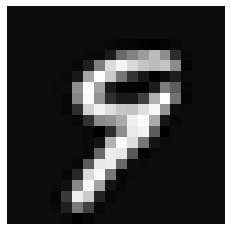

Neural Network Prediction:  [0.] (digit  [0.] )
890
Displaying Example Image


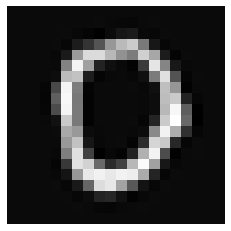

Neural Network Prediction:  [0.] (digit  [0.] )
891
Displaying Example Image


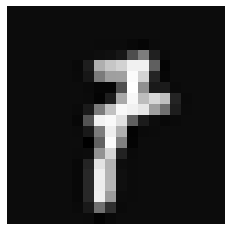

Neural Network Prediction:  [0.] (digit  [0.] )
892
Displaying Example Image


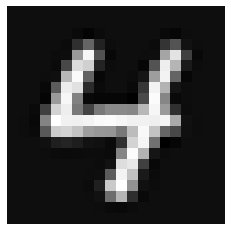

Neural Network Prediction:  [0.] (digit  [0.] )
893
Displaying Example Image


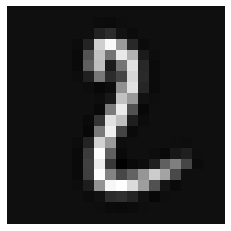

Neural Network Prediction:  [0.] (digit  [0.] )
894
Displaying Example Image


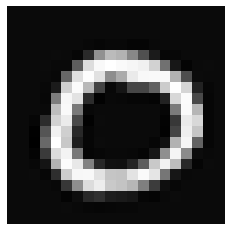

Neural Network Prediction:  [0.] (digit  [0.] )
895
Displaying Example Image


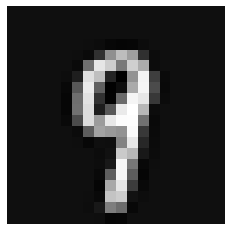

Neural Network Prediction:  [0.] (digit  [0.] )
896
Displaying Example Image


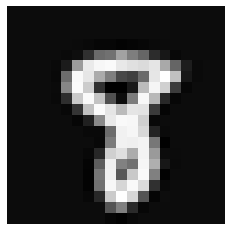

Neural Network Prediction:  [0.] (digit  [0.] )
897
Displaying Example Image


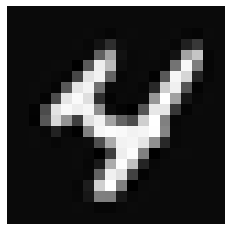

Neural Network Prediction:  [0.] (digit  [0.] )
898
Displaying Example Image


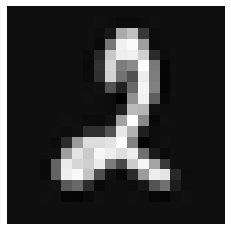

Neural Network Prediction:  [0.] (digit  [0.] )
899
Displaying Example Image


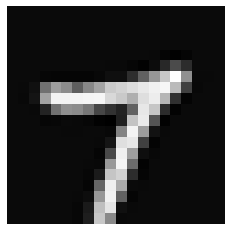

Neural Network Prediction:  [0.] (digit  [0.] )
900
Displaying Example Image


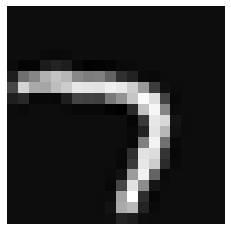

Neural Network Prediction:  [0.] (digit  [0.] )
901
Displaying Example Image


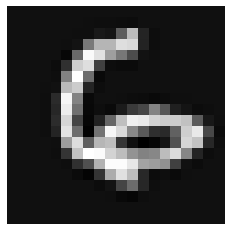

Neural Network Prediction:  [0.] (digit  [0.] )
902
Displaying Example Image


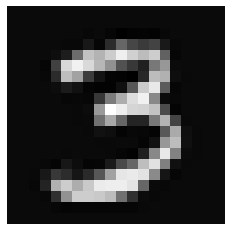

Neural Network Prediction:  [0.] (digit  [0.] )
903
Displaying Example Image


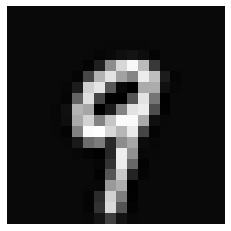

Neural Network Prediction:  [0.] (digit  [0.] )
904
Displaying Example Image


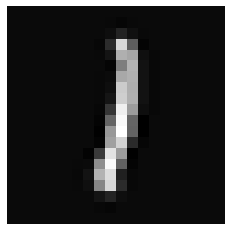

Neural Network Prediction:  [0.] (digit  [0.] )
905
Displaying Example Image


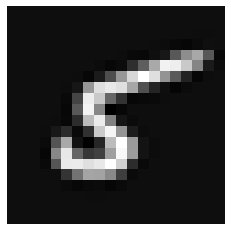

Neural Network Prediction:  [0.] (digit  [0.] )
906
Displaying Example Image


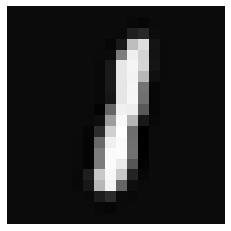

Neural Network Prediction:  [0.] (digit  [0.] )
907
Displaying Example Image


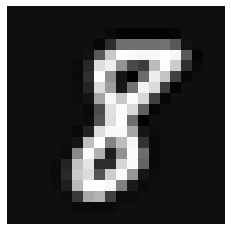

Neural Network Prediction:  [0.] (digit  [0.] )
908
Displaying Example Image


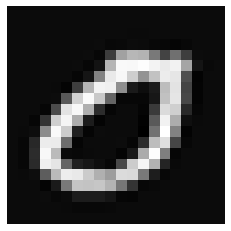

Neural Network Prediction:  [0.] (digit  [0.] )
909
Displaying Example Image


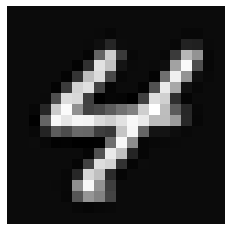

Neural Network Prediction:  [0.] (digit  [0.] )
910
Displaying Example Image


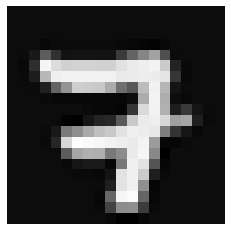

Neural Network Prediction:  [0.] (digit  [0.] )
911
Displaying Example Image


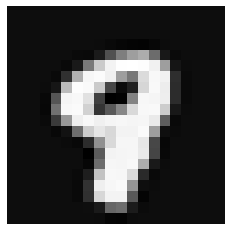

Neural Network Prediction:  [0.] (digit  [0.] )
912
Displaying Example Image


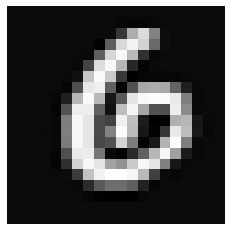

Neural Network Prediction:  [0.] (digit  [0.] )
913
Displaying Example Image


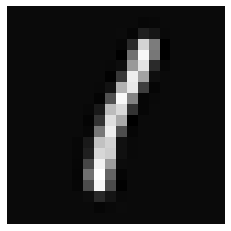

Neural Network Prediction:  [0.] (digit  [0.] )
914
Displaying Example Image


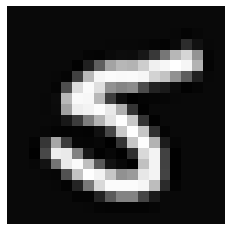

Neural Network Prediction:  [0.] (digit  [0.] )
915
Displaying Example Image


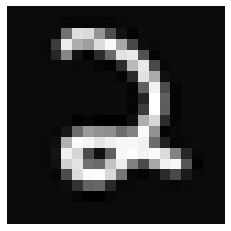

Neural Network Prediction:  [0.] (digit  [0.] )
916
Displaying Example Image


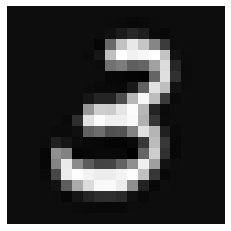

Neural Network Prediction:  [0.] (digit  [0.] )
917
Displaying Example Image


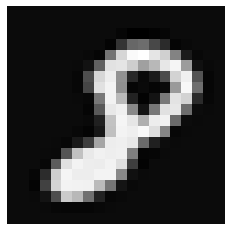

Neural Network Prediction:  [0.] (digit  [0.] )
918
Displaying Example Image


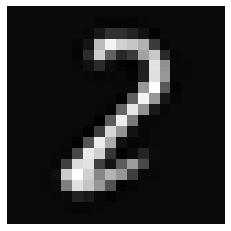

Neural Network Prediction:  [0.] (digit  [0.] )
919
Displaying Example Image


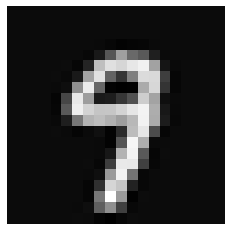

Neural Network Prediction:  [0.] (digit  [0.] )
920
Displaying Example Image


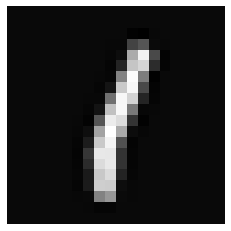

Neural Network Prediction:  [0.] (digit  [0.] )
921
Displaying Example Image


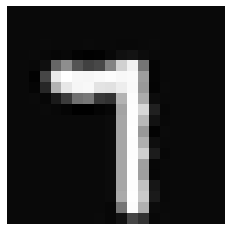

Neural Network Prediction:  [0.] (digit  [0.] )
922
Displaying Example Image


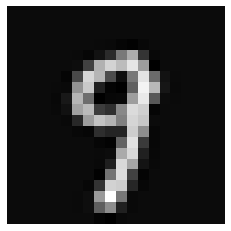

Neural Network Prediction:  [0.] (digit  [0.] )
923
Displaying Example Image


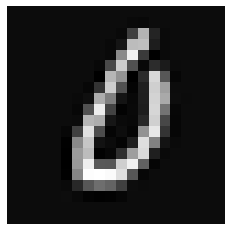

Neural Network Prediction:  [0.] (digit  [0.] )
924
Displaying Example Image


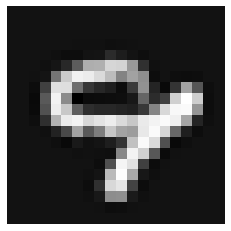

Neural Network Prediction:  [0.] (digit  [0.] )
925
Displaying Example Image


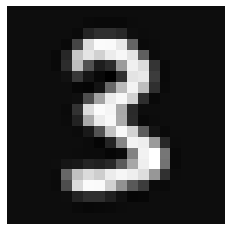

Neural Network Prediction:  [0.] (digit  [0.] )
926
Displaying Example Image


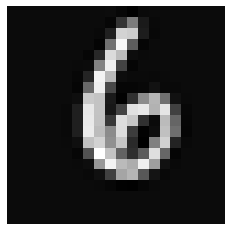

Neural Network Prediction:  [0.] (digit  [0.] )
927
Displaying Example Image


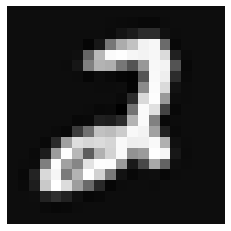

Neural Network Prediction:  [0.] (digit  [0.] )
928
Displaying Example Image


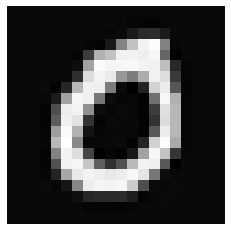

Neural Network Prediction:  [0.] (digit  [0.] )
929
Displaying Example Image


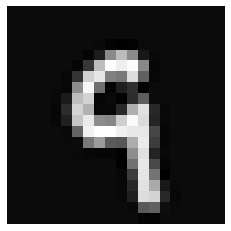

Neural Network Prediction:  [0.] (digit  [0.] )
930
Displaying Example Image


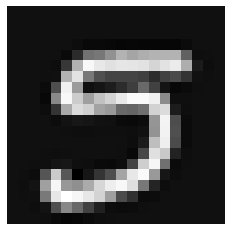

Neural Network Prediction:  [0.] (digit  [0.] )
931
Displaying Example Image


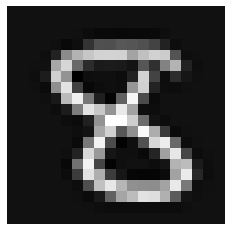

Neural Network Prediction:  [0.] (digit  [0.] )
932
Displaying Example Image


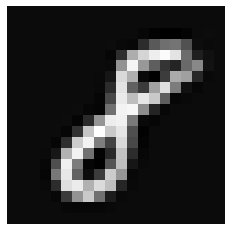

Neural Network Prediction:  [0.] (digit  [0.] )
933
Displaying Example Image


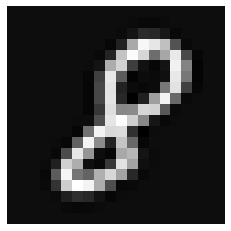

Neural Network Prediction:  [0.] (digit  [0.] )
934
Displaying Example Image


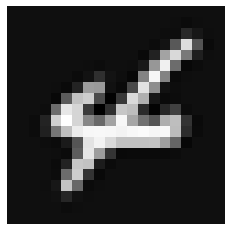

Neural Network Prediction:  [0.] (digit  [0.] )
935
Displaying Example Image


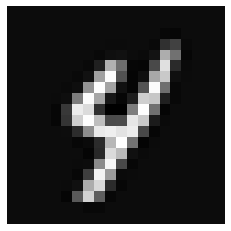

Neural Network Prediction:  [0.] (digit  [0.] )
936
Displaying Example Image


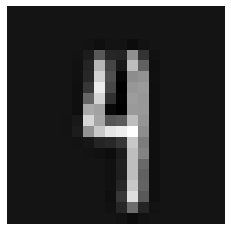

Neural Network Prediction:  [0.] (digit  [0.] )
937
Displaying Example Image


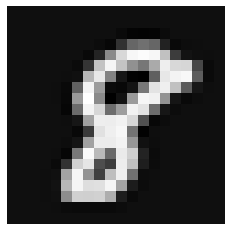

Neural Network Prediction:  [0.] (digit  [0.] )
938
Displaying Example Image


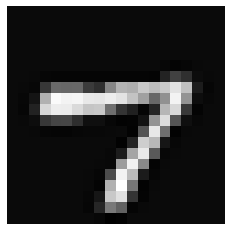

Neural Network Prediction:  [0.] (digit  [0.] )
939
Displaying Example Image


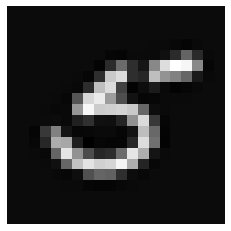

Neural Network Prediction:  [0.] (digit  [0.] )
940
Displaying Example Image


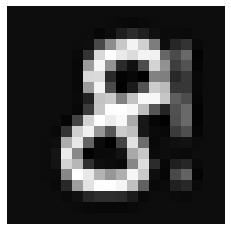

Neural Network Prediction:  [0.] (digit  [0.] )
941
Displaying Example Image


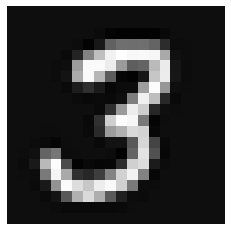

Neural Network Prediction:  [0.] (digit  [0.] )
942
Displaying Example Image


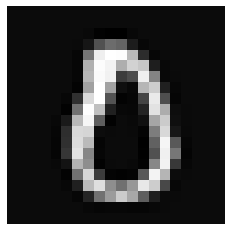

Neural Network Prediction:  [0.] (digit  [0.] )
943
Displaying Example Image


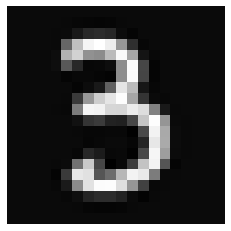

Neural Network Prediction:  [0.] (digit  [0.] )
944
Displaying Example Image


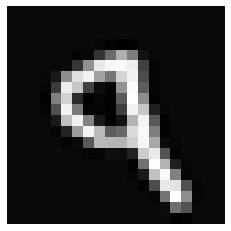

Neural Network Prediction:  [0.] (digit  [0.] )
945
Displaying Example Image


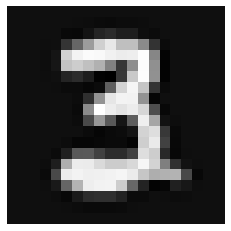

Neural Network Prediction:  [0.] (digit  [0.] )
946
Displaying Example Image


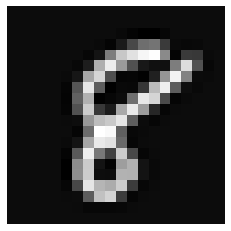

Neural Network Prediction:  [0.] (digit  [0.] )
947
Displaying Example Image


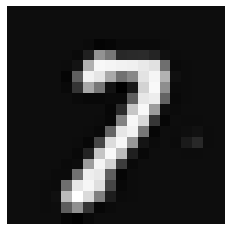

Neural Network Prediction:  [0.] (digit  [0.] )
948
Displaying Example Image


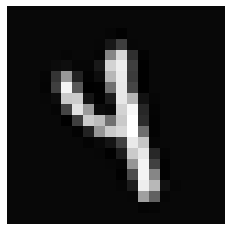

Neural Network Prediction:  [0.] (digit  [0.] )
949
Displaying Example Image


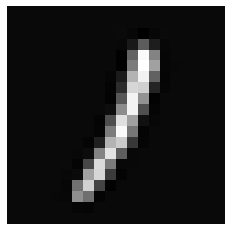

Neural Network Prediction:  [0.] (digit  [0.] )
950
Displaying Example Image


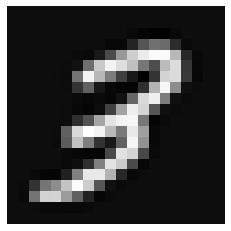

Neural Network Prediction:  [0.] (digit  [0.] )
951
Displaying Example Image


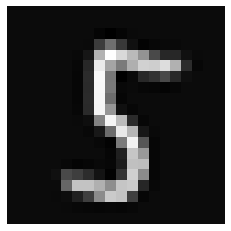

Neural Network Prediction:  [0.] (digit  [0.] )
952
Displaying Example Image


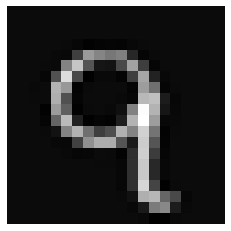

Neural Network Prediction:  [0.] (digit  [0.] )
953
Displaying Example Image


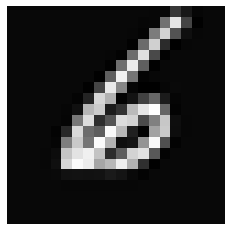

Neural Network Prediction:  [0.] (digit  [0.] )
954
Displaying Example Image


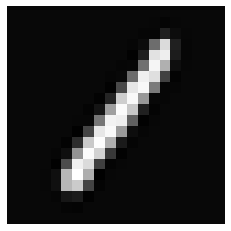

Neural Network Prediction:  [0.] (digit  [0.] )
955
Displaying Example Image


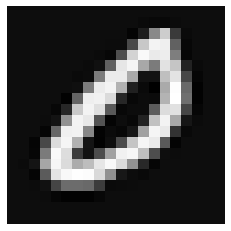

Neural Network Prediction:  [0.] (digit  [0.] )
956
Displaying Example Image


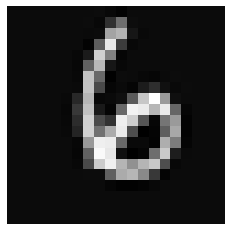

Neural Network Prediction:  [0.] (digit  [0.] )
957
Displaying Example Image


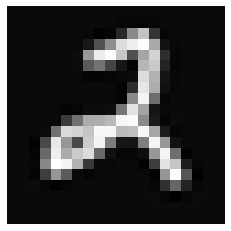

Neural Network Prediction:  [0.] (digit  [0.] )
958
Displaying Example Image


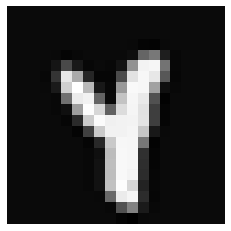

Neural Network Prediction:  [0.] (digit  [0.] )
959
Displaying Example Image


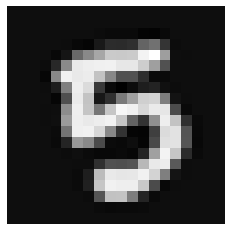

Neural Network Prediction:  [0.] (digit  [0.] )
960
Displaying Example Image


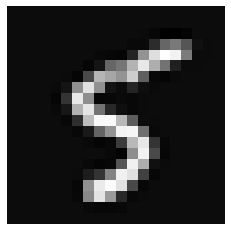

Neural Network Prediction:  [0.] (digit  [0.] )
961
Displaying Example Image


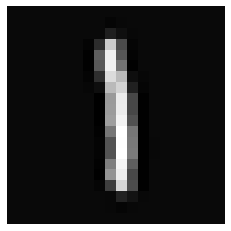

Neural Network Prediction:  [0.] (digit  [0.] )
962
Displaying Example Image


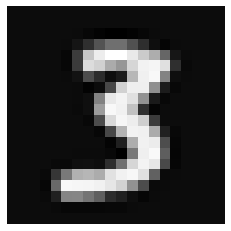

Neural Network Prediction:  [0.] (digit  [0.] )
963
Displaying Example Image


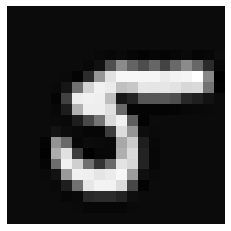

Neural Network Prediction:  [0.] (digit  [0.] )
964
Displaying Example Image


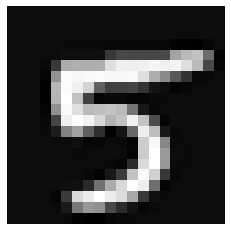

Neural Network Prediction:  [0.] (digit  [0.] )
965
Displaying Example Image


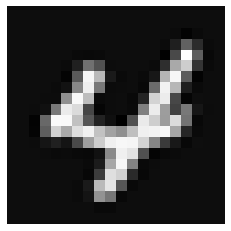

Neural Network Prediction:  [0.] (digit  [0.] )
966
Displaying Example Image


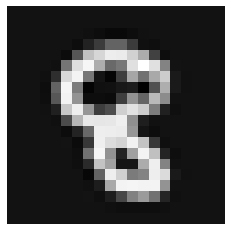

Neural Network Prediction:  [0.] (digit  [0.] )
967
Displaying Example Image


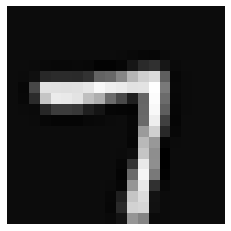

Neural Network Prediction:  [0.] (digit  [0.] )
968
Displaying Example Image


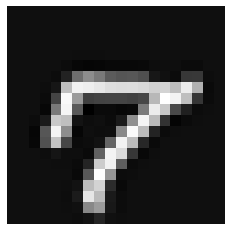

Neural Network Prediction:  [0.] (digit  [0.] )
969
Displaying Example Image


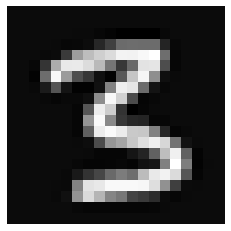

Neural Network Prediction:  [0.] (digit  [0.] )
970
Displaying Example Image


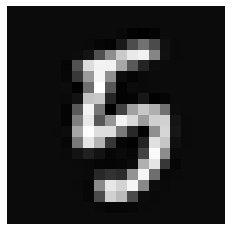

Neural Network Prediction:  [0.] (digit  [0.] )
971
Displaying Example Image


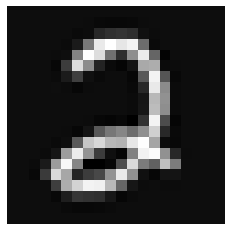

Neural Network Prediction:  [0.] (digit  [0.] )
972
Displaying Example Image


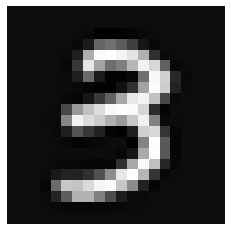

Neural Network Prediction:  [0.] (digit  [0.] )
973
Displaying Example Image


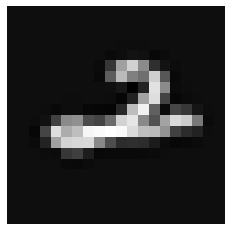

Neural Network Prediction:  [0.] (digit  [0.] )
974
Displaying Example Image


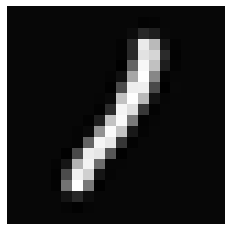

Neural Network Prediction:  [0.] (digit  [0.] )
975
Displaying Example Image


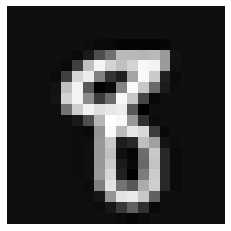

Neural Network Prediction:  [0.] (digit  [0.] )
976
Displaying Example Image


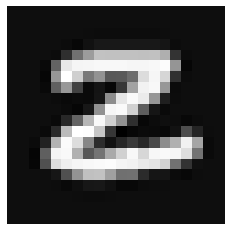

Neural Network Prediction:  [0.] (digit  [0.] )
977
Displaying Example Image


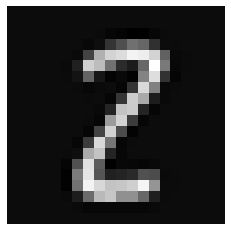

Neural Network Prediction:  [0.] (digit  [0.] )
978
Displaying Example Image


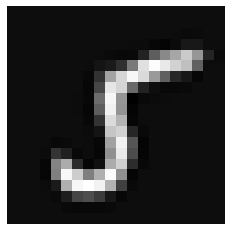

Neural Network Prediction:  [0.] (digit  [0.] )
979
Displaying Example Image


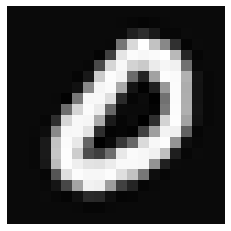

Neural Network Prediction:  [0.] (digit  [0.] )
980
Displaying Example Image


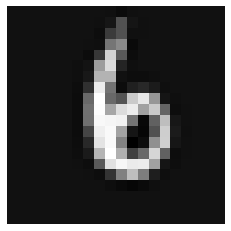

Neural Network Prediction:  [0.] (digit  [0.] )
981
Displaying Example Image


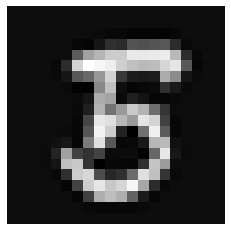

Neural Network Prediction:  [0.] (digit  [0.] )
982
Displaying Example Image


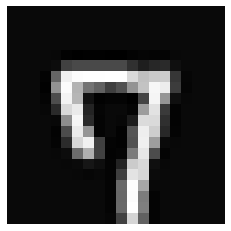

Neural Network Prediction:  [0.] (digit  [0.] )
983
Displaying Example Image


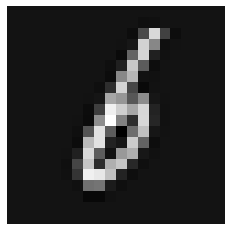

Neural Network Prediction:  [0.] (digit  [0.] )
984
Displaying Example Image


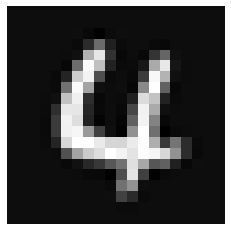

Neural Network Prediction:  [0.] (digit  [0.] )
985
Displaying Example Image


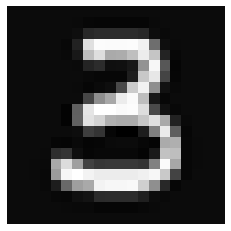

Neural Network Prediction:  [0.] (digit  [0.] )
986
Displaying Example Image


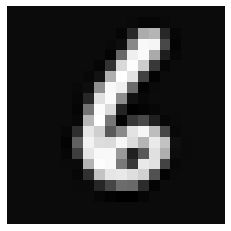

Neural Network Prediction:  [0.] (digit  [0.] )
987
Displaying Example Image


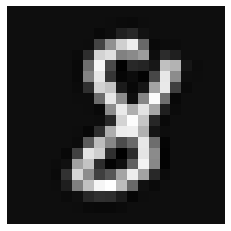

Neural Network Prediction:  [0.] (digit  [0.] )
988
Displaying Example Image


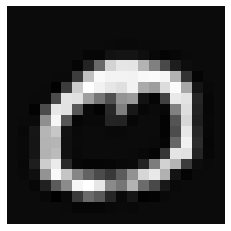

Neural Network Prediction:  [0.] (digit  [0.] )
989
Displaying Example Image


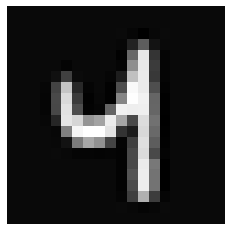

Neural Network Prediction:  [0.] (digit  [0.] )
990
Displaying Example Image


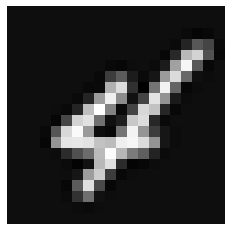

Neural Network Prediction:  [0.] (digit  [0.] )
991
Displaying Example Image


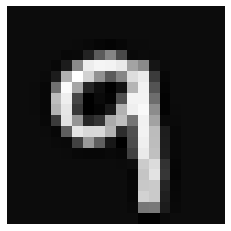

Neural Network Prediction:  [0.] (digit  [0.] )
992
Displaying Example Image


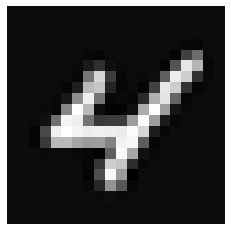

Neural Network Prediction:  [0.] (digit  [0.] )
993
Displaying Example Image


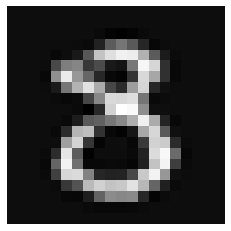

Neural Network Prediction:  [0.] (digit  [0.] )
994
Displaying Example Image


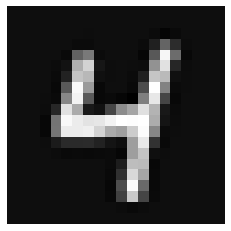

Neural Network Prediction:  [0.] (digit  [0.] )
995
Displaying Example Image


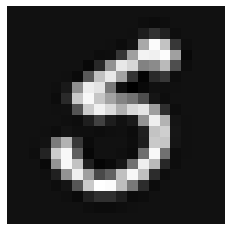

Neural Network Prediction:  [0.] (digit  [0.] )
996
Displaying Example Image


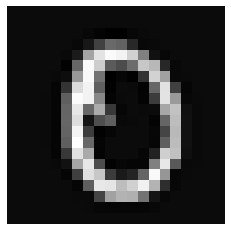

Neural Network Prediction:  [0.] (digit  [0.] )
997
Displaying Example Image


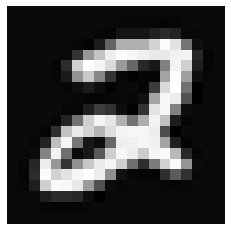

Neural Network Prediction:  [0.] (digit  [0.] )
998
Displaying Example Image


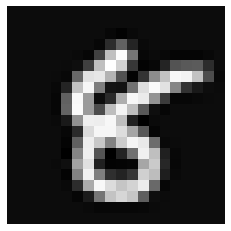

Neural Network Prediction:  [0.] (digit  [0.] )
999
Displaying Example Image


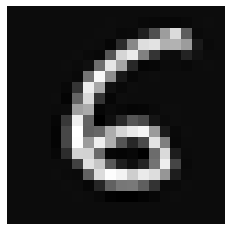

Neural Network Prediction:  [0.] (digit  [0.] )
1000
Displaying Example Image


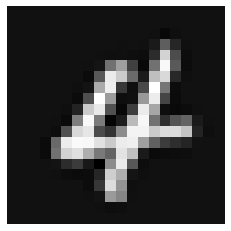

Neural Network Prediction:  [0.] (digit  [0.] )
1001
Displaying Example Image


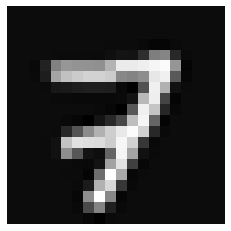

Neural Network Prediction:  [0.] (digit  [0.] )
1002
Displaying Example Image


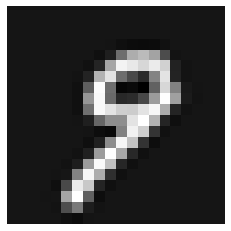

Neural Network Prediction:  [0.] (digit  [0.] )
1003
Displaying Example Image


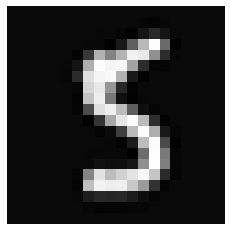

Neural Network Prediction:  [0.] (digit  [0.] )
1004
Displaying Example Image


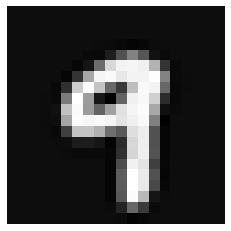

Neural Network Prediction:  [0.] (digit  [0.] )
1005
Displaying Example Image


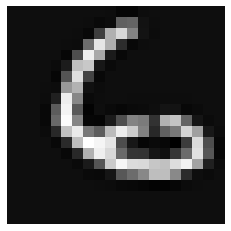

Neural Network Prediction:  [0.] (digit  [0.] )
1006
Displaying Example Image


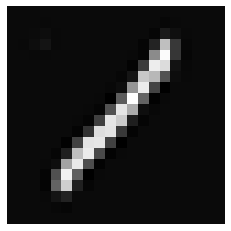

Neural Network Prediction:  [0.] (digit  [0.] )
1007
Displaying Example Image


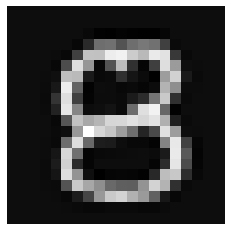

Neural Network Prediction:  [0.] (digit  [0.] )
1008
Displaying Example Image


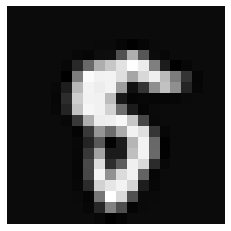

Neural Network Prediction:  [0.] (digit  [0.] )
1009
Displaying Example Image


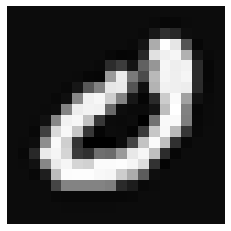

Neural Network Prediction:  [0.] (digit  [0.] )
1010
Displaying Example Image


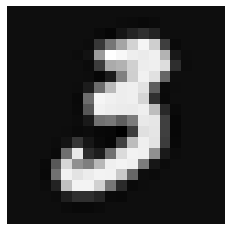

Neural Network Prediction:  [0.] (digit  [0.] )
1011
Displaying Example Image


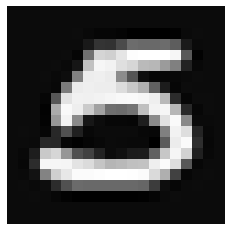

Neural Network Prediction:  [0.] (digit  [0.] )
1012
Displaying Example Image


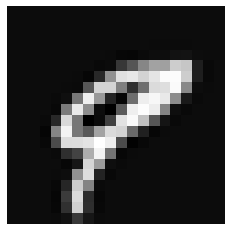

Neural Network Prediction:  [0.] (digit  [0.] )
1013
Displaying Example Image


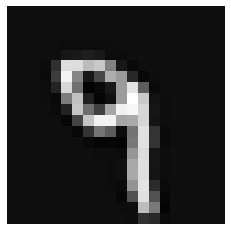

Neural Network Prediction:  [0.] (digit  [0.] )
1014
Displaying Example Image


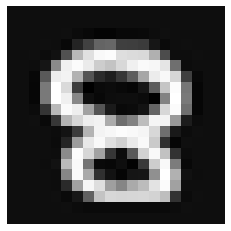

Neural Network Prediction:  [0.] (digit  [0.] )
1015
Displaying Example Image


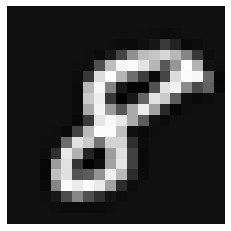

Neural Network Prediction:  [0.] (digit  [0.] )
1016
Displaying Example Image


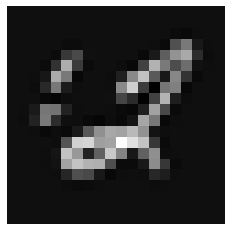

Neural Network Prediction:  [0.] (digit  [0.] )
1017
Displaying Example Image


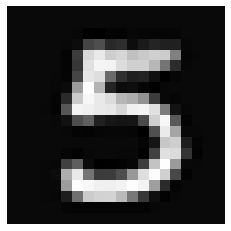

Neural Network Prediction:  [0.] (digit  [0.] )
1018
Displaying Example Image


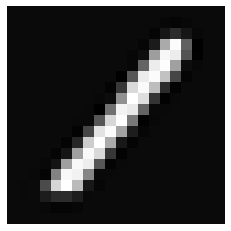

Neural Network Prediction:  [0.] (digit  [0.] )
1019
Displaying Example Image


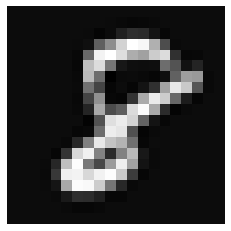

Neural Network Prediction:  [0.] (digit  [0.] )
1020
Displaying Example Image


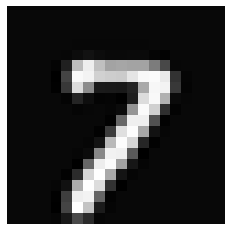

Neural Network Prediction:  [0.] (digit  [0.] )
1021
Displaying Example Image


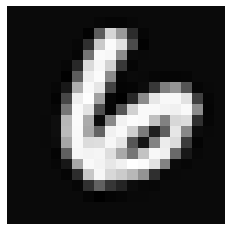

Neural Network Prediction:  [0.] (digit  [0.] )
1022
Displaying Example Image


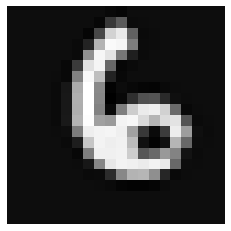

Neural Network Prediction:  [0.] (digit  [0.] )
1023
Displaying Example Image


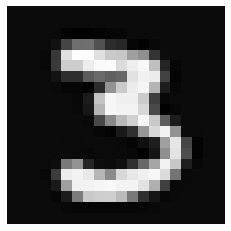

Neural Network Prediction:  [0.] (digit  [0.] )
1024
Displaying Example Image


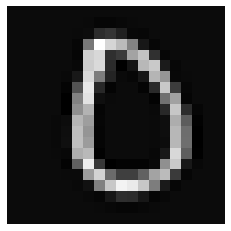

Neural Network Prediction:  [0.] (digit  [0.] )
1025
Displaying Example Image


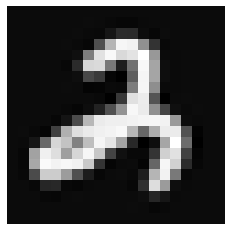

Neural Network Prediction:  [0.] (digit  [0.] )
1026
Displaying Example Image


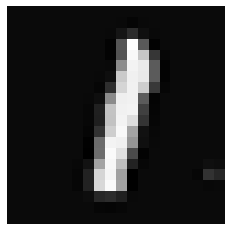

Neural Network Prediction:  [0.] (digit  [0.] )
1027
Displaying Example Image


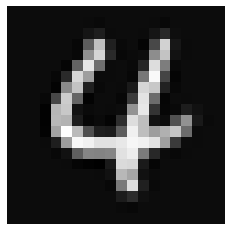

Neural Network Prediction:  [0.] (digit  [0.] )
1028
Displaying Example Image


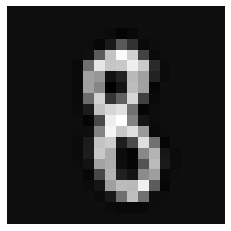

Neural Network Prediction:  [0.] (digit  [0.] )
1029
Displaying Example Image


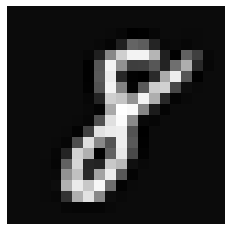

Neural Network Prediction:  [0.] (digit  [0.] )
1030
Displaying Example Image


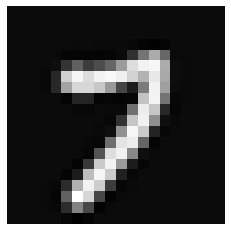

Neural Network Prediction:  [0.] (digit  [0.] )
1031
Displaying Example Image


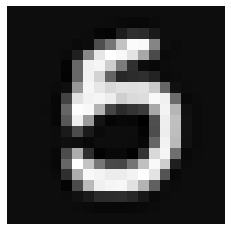

Neural Network Prediction:  [0.] (digit  [0.] )
1032
Displaying Example Image


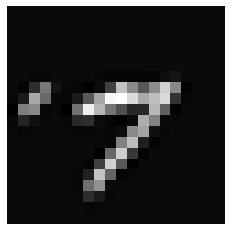

Neural Network Prediction:  [0.] (digit  [0.] )
1033
Displaying Example Image


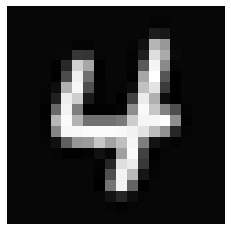

Neural Network Prediction:  [0.] (digit  [0.] )
1034
Displaying Example Image


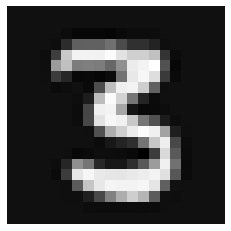

Neural Network Prediction:  [0.] (digit  [0.] )
1035
Displaying Example Image


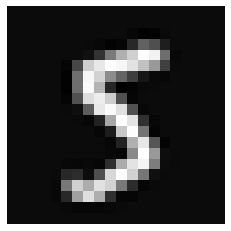

Neural Network Prediction:  [0.] (digit  [0.] )
1036
Displaying Example Image


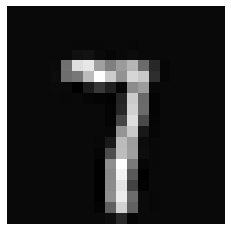

Neural Network Prediction:  [0.] (digit  [0.] )
1037
Displaying Example Image


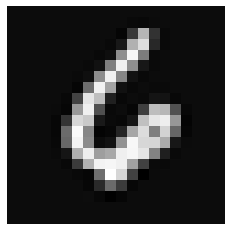

Neural Network Prediction:  [0.] (digit  [0.] )
1038
Displaying Example Image


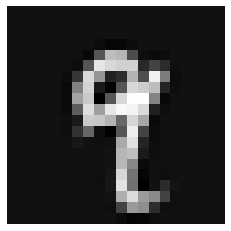

Neural Network Prediction:  [0.] (digit  [0.] )
1039
Displaying Example Image


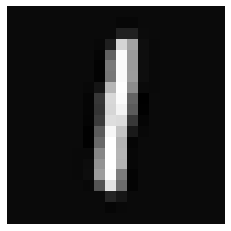

Neural Network Prediction:  [0.] (digit  [0.] )
1040
Displaying Example Image


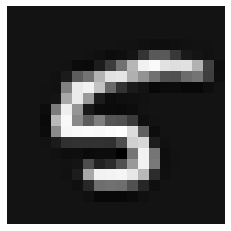

Neural Network Prediction:  [0.] (digit  [0.] )
1041
Displaying Example Image


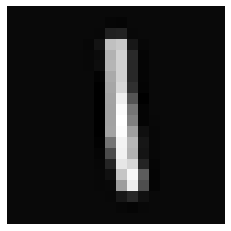

Neural Network Prediction:  [0.] (digit  [0.] )
1042
Displaying Example Image


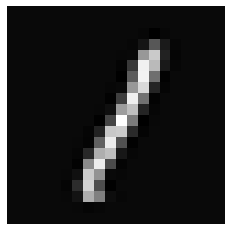

Neural Network Prediction:  [0.] (digit  [0.] )
1043
Displaying Example Image


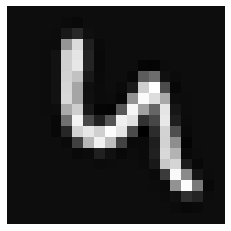

Neural Network Prediction:  [0.] (digit  [0.] )
1044
Displaying Example Image


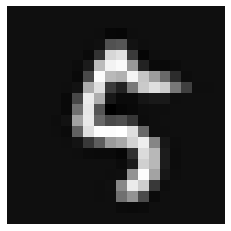

Neural Network Prediction:  [0.] (digit  [0.] )
1045
Displaying Example Image


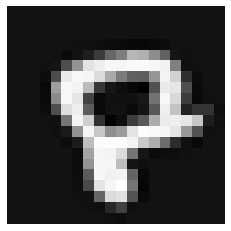

Neural Network Prediction:  [0.] (digit  [0.] )
1046
Displaying Example Image


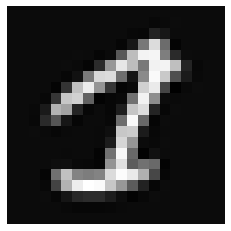

Neural Network Prediction:  [0.] (digit  [0.] )
1047
Displaying Example Image


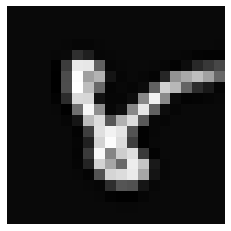

Neural Network Prediction:  [0.] (digit  [0.] )
1048
Displaying Example Image


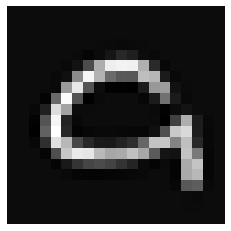

Neural Network Prediction:  [0.] (digit  [0.] )
1049
Displaying Example Image


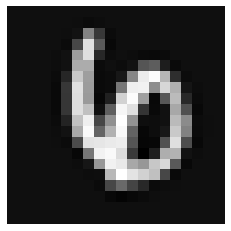

Neural Network Prediction:  [0.] (digit  [0.] )
1050
Displaying Example Image


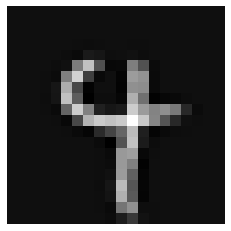

Neural Network Prediction:  [0.] (digit  [0.] )
1051
Displaying Example Image


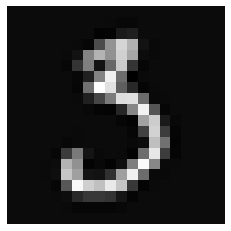

Neural Network Prediction:  [0.] (digit  [0.] )
1052
Displaying Example Image


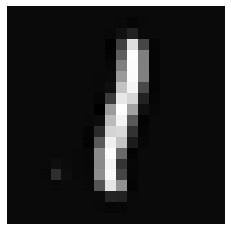

Neural Network Prediction:  [0.] (digit  [0.] )
1053
Displaying Example Image


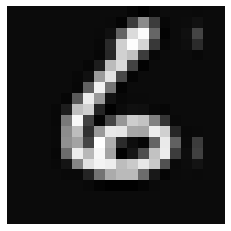

Neural Network Prediction:  [0.] (digit  [0.] )
1054
Displaying Example Image


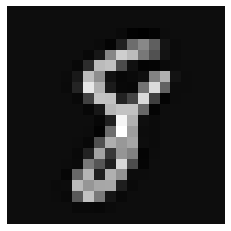

Neural Network Prediction:  [0.] (digit  [0.] )
1055
Displaying Example Image


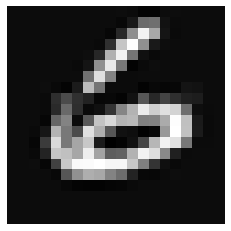

Neural Network Prediction:  [0.] (digit  [0.] )
1056
Displaying Example Image


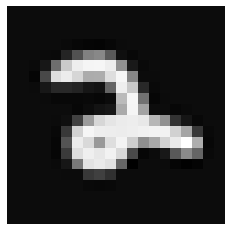

Neural Network Prediction:  [0.] (digit  [0.] )
1057
Displaying Example Image


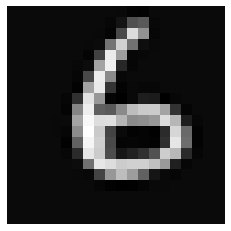

Neural Network Prediction:  [0.] (digit  [0.] )
1058
Displaying Example Image


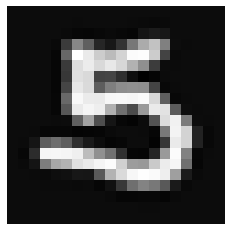

Neural Network Prediction:  [0.] (digit  [0.] )
1059
Displaying Example Image


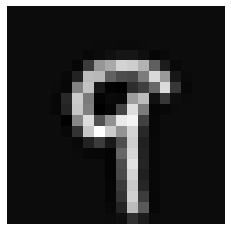

Neural Network Prediction:  [0.] (digit  [0.] )
1060
Displaying Example Image


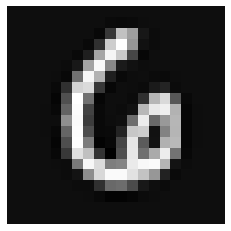

Neural Network Prediction:  [0.] (digit  [0.] )
1061
Displaying Example Image


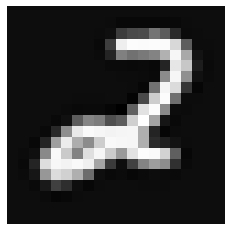

Neural Network Prediction:  [0.] (digit  [0.] )
1062
Displaying Example Image


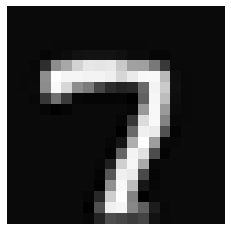

Neural Network Prediction:  [0.] (digit  [0.] )
1063
Displaying Example Image


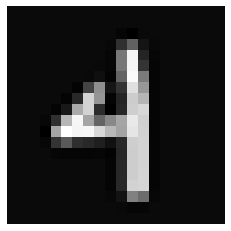

Neural Network Prediction:  [0.] (digit  [0.] )
1064
Displaying Example Image


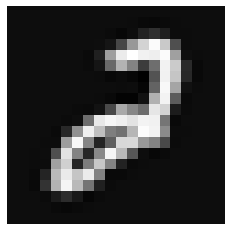

Neural Network Prediction:  [0.] (digit  [0.] )
1065
Displaying Example Image


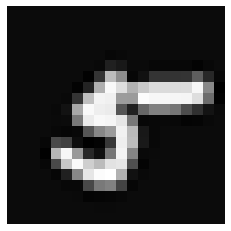

Neural Network Prediction:  [0.] (digit  [0.] )
1066
Displaying Example Image


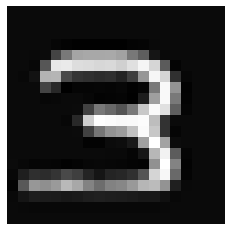

Neural Network Prediction:  [0.] (digit  [0.] )
1067
Displaying Example Image


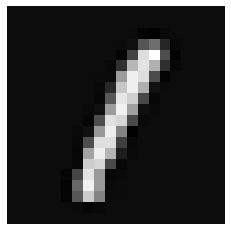

Neural Network Prediction:  [0.] (digit  [0.] )
1068
Displaying Example Image


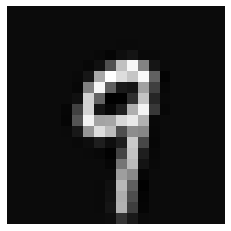

Neural Network Prediction:  [0.] (digit  [0.] )
1069
Displaying Example Image


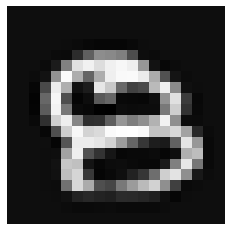

Neural Network Prediction:  [0.] (digit  [0.] )
1070
Displaying Example Image


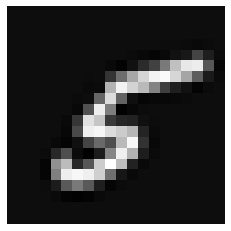

Neural Network Prediction:  [0.] (digit  [0.] )
1071
Displaying Example Image


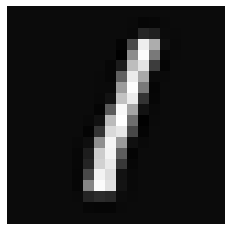

Neural Network Prediction:  [0.] (digit  [0.] )
1072
Displaying Example Image


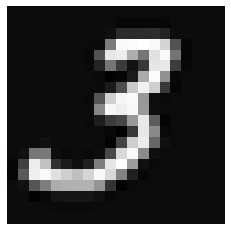

Neural Network Prediction:  [0.] (digit  [0.] )
1073
Displaying Example Image


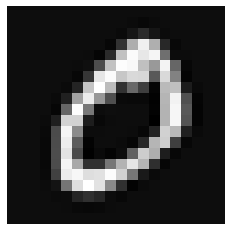

Neural Network Prediction:  [0.] (digit  [0.] )
1074
Displaying Example Image


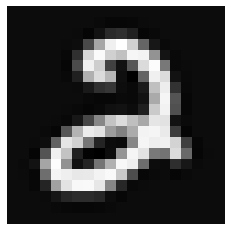

Neural Network Prediction:  [0.] (digit  [0.] )
1075
Displaying Example Image


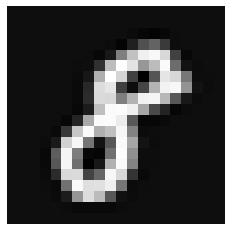

Neural Network Prediction:  [0.] (digit  [0.] )
1076
Displaying Example Image


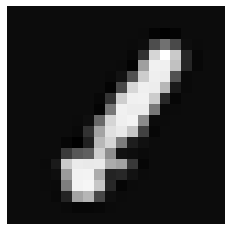

Neural Network Prediction:  [0.] (digit  [0.] )
1077
Displaying Example Image


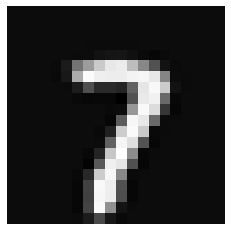

Neural Network Prediction:  [0.] (digit  [0.] )
1078
Displaying Example Image


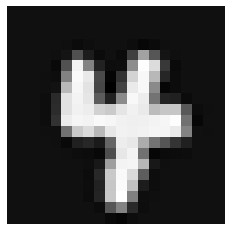

Neural Network Prediction:  [0.] (digit  [0.] )
1079
Displaying Example Image


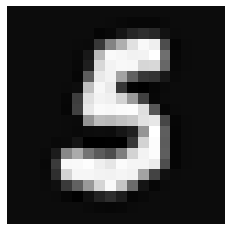

Neural Network Prediction:  [0.] (digit  [0.] )
1080
Displaying Example Image


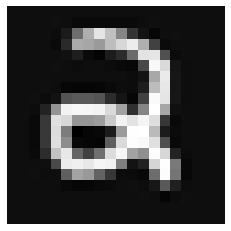

Neural Network Prediction:  [0.] (digit  [0.] )
1081
Displaying Example Image


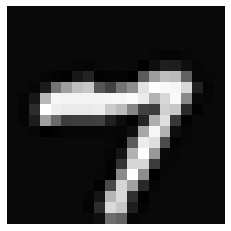

Neural Network Prediction:  [0.] (digit  [0.] )
1082
Displaying Example Image


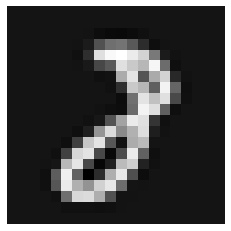

Neural Network Prediction:  [0.] (digit  [0.] )
1083
Displaying Example Image


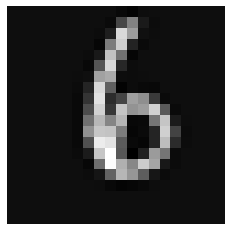

Neural Network Prediction:  [0.] (digit  [0.] )
1084
Displaying Example Image


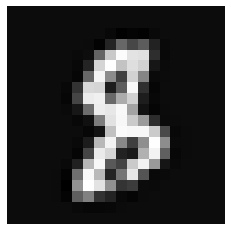

Neural Network Prediction:  [0.] (digit  [0.] )
1085
Displaying Example Image


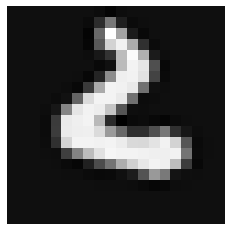

Neural Network Prediction:  [0.] (digit  [0.] )
1086
Displaying Example Image


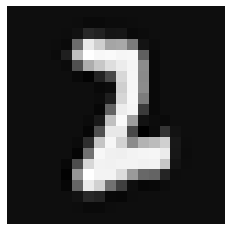

Neural Network Prediction:  [0.] (digit  [0.] )
1087
Displaying Example Image


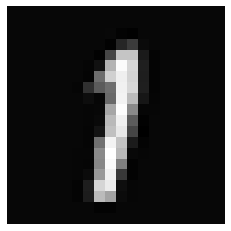

Neural Network Prediction:  [0.] (digit  [0.] )
1088
Displaying Example Image


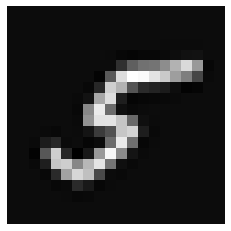

Neural Network Prediction:  [0.] (digit  [0.] )
1089
Displaying Example Image


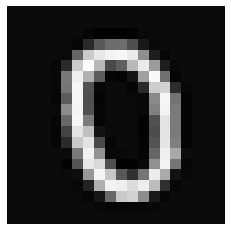

Neural Network Prediction:  [0.] (digit  [0.] )
1090
Displaying Example Image


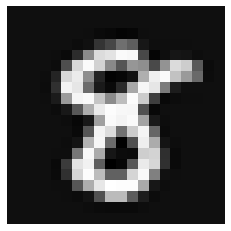

Neural Network Prediction:  [0.] (digit  [0.] )
1091
Displaying Example Image


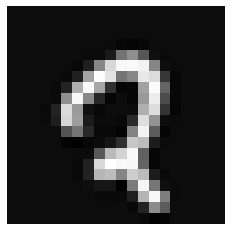

Neural Network Prediction:  [0.] (digit  [0.] )
1092
Displaying Example Image


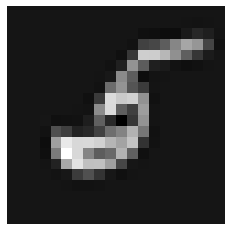

Neural Network Prediction:  [0.] (digit  [0.] )
1093
Displaying Example Image


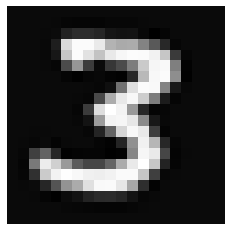

Neural Network Prediction:  [0.] (digit  [0.] )
1094
Displaying Example Image


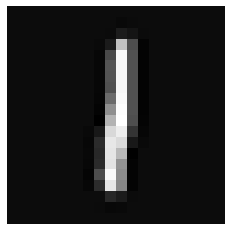

Neural Network Prediction:  [0.] (digit  [0.] )
1095
Displaying Example Image


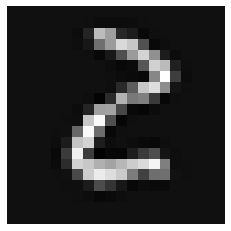

Neural Network Prediction:  [0.] (digit  [0.] )
1096
Displaying Example Image


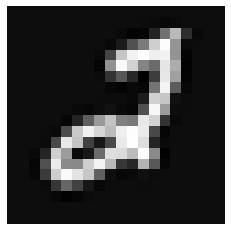

Neural Network Prediction:  [0.] (digit  [0.] )
1097
Displaying Example Image


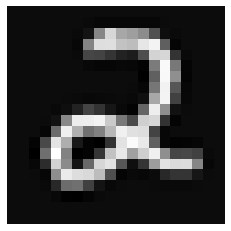

Neural Network Prediction:  [0.] (digit  [0.] )
1098
Displaying Example Image


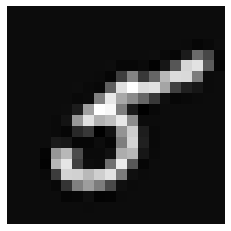

Neural Network Prediction:  [0.] (digit  [0.] )
1099
Displaying Example Image


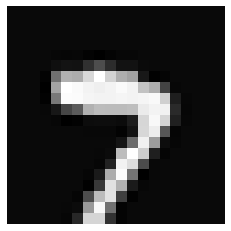

Neural Network Prediction:  [0.] (digit  [0.] )
1100
Displaying Example Image


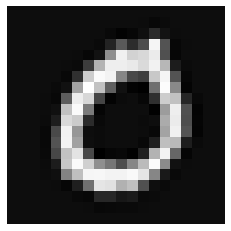

Neural Network Prediction:  [0.] (digit  [0.] )
1101
Displaying Example Image


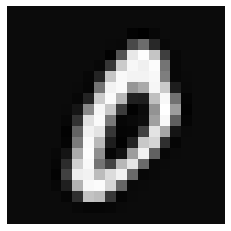

Neural Network Prediction:  [0.] (digit  [0.] )
1102
Displaying Example Image


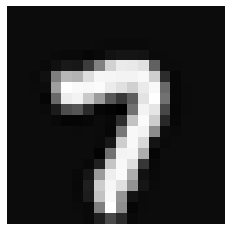

Neural Network Prediction:  [0.] (digit  [0.] )
1103
Displaying Example Image


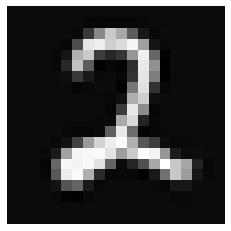

Neural Network Prediction:  [0.] (digit  [0.] )
1104
Displaying Example Image


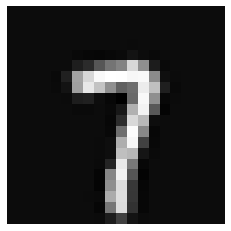

Neural Network Prediction:  [0.] (digit  [0.] )
1105
Displaying Example Image


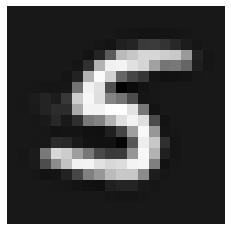

Neural Network Prediction:  [0.] (digit  [0.] )
1106
Displaying Example Image


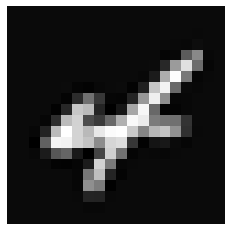

Neural Network Prediction:  [0.] (digit  [0.] )
1107
Displaying Example Image


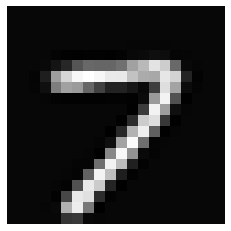

Neural Network Prediction:  [0.] (digit  [0.] )
1108
Displaying Example Image


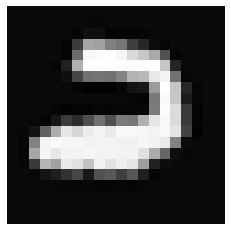

Neural Network Prediction:  [0.] (digit  [0.] )
1109
Displaying Example Image


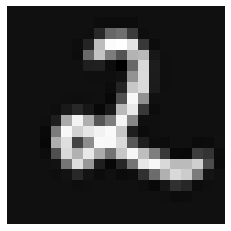

Neural Network Prediction:  [0.] (digit  [0.] )
1110
Displaying Example Image


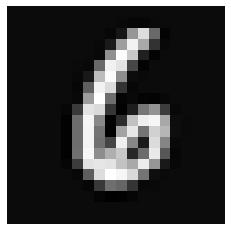

Neural Network Prediction:  [0.] (digit  [0.] )
1111
Displaying Example Image


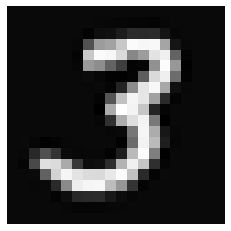

Neural Network Prediction:  [0.] (digit  [0.] )
1112
Displaying Example Image


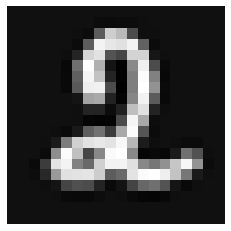

Neural Network Prediction:  [0.] (digit  [0.] )
1113
Displaying Example Image


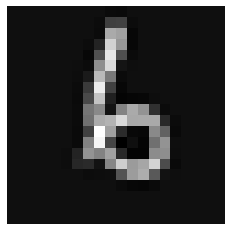

Neural Network Prediction:  [0.] (digit  [0.] )
1114
Displaying Example Image


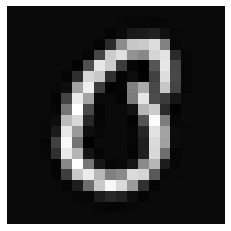

Neural Network Prediction:  [0.] (digit  [0.] )
1115
Displaying Example Image


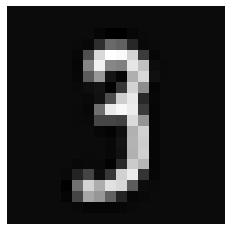

Neural Network Prediction:  [0.] (digit  [0.] )
1116
Displaying Example Image


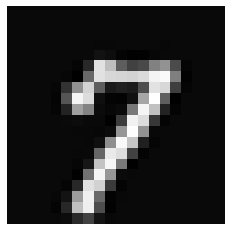

Neural Network Prediction:  [0.] (digit  [0.] )
1117
Displaying Example Image


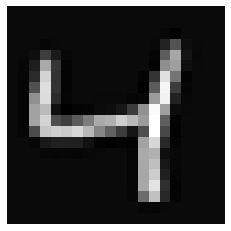

Neural Network Prediction:  [0.] (digit  [0.] )
1118
Displaying Example Image


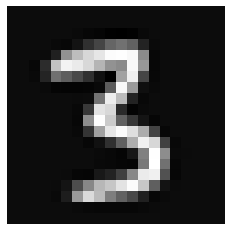

Neural Network Prediction:  [0.] (digit  [0.] )
1119
Displaying Example Image


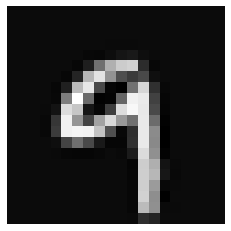

Neural Network Prediction:  [0.] (digit  [0.] )
1120
Displaying Example Image


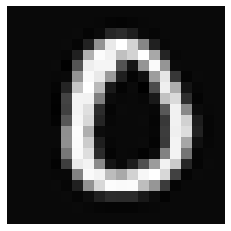

Neural Network Prediction:  [0.] (digit  [0.] )
1121
Displaying Example Image


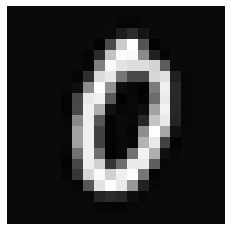

Neural Network Prediction:  [0.] (digit  [0.] )
1122
Displaying Example Image


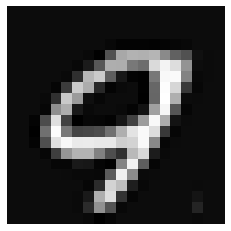

Neural Network Prediction:  [0.] (digit  [0.] )
1123
Displaying Example Image


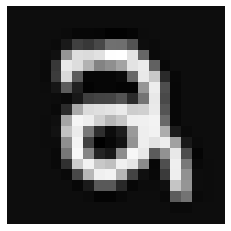

Neural Network Prediction:  [0.] (digit  [0.] )
1124
Displaying Example Image


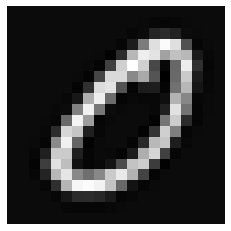

Neural Network Prediction:  [0.] (digit  [0.] )
1125
Displaying Example Image


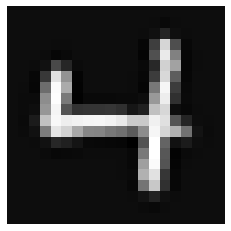

Neural Network Prediction:  [0.] (digit  [0.] )
1126
Displaying Example Image


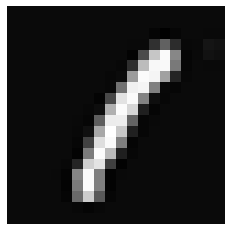

Neural Network Prediction:  [0.] (digit  [0.] )
1127
Displaying Example Image


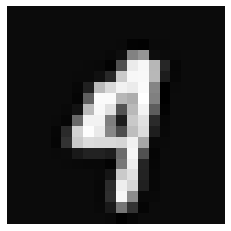

Neural Network Prediction:  [0.] (digit  [0.] )
1128
Displaying Example Image


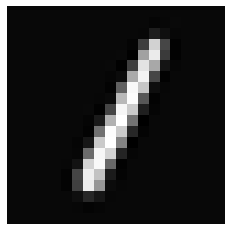

Neural Network Prediction:  [0.] (digit  [0.] )
1129
Displaying Example Image


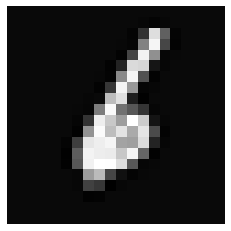

Neural Network Prediction:  [0.] (digit  [0.] )
1130
Displaying Example Image


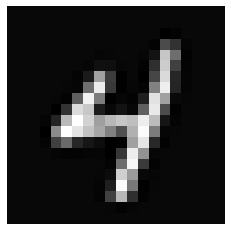

Neural Network Prediction:  [0.] (digit  [0.] )
1131
Displaying Example Image


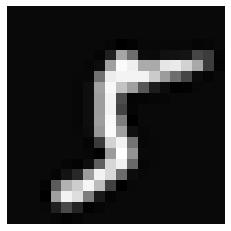

Neural Network Prediction:  [0.] (digit  [0.] )
1132
Displaying Example Image


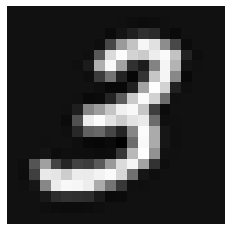

Neural Network Prediction:  [0.] (digit  [0.] )
1133
Displaying Example Image


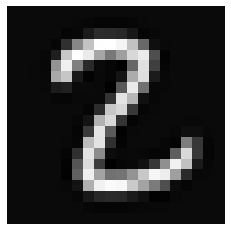

Neural Network Prediction:  [0.] (digit  [0.] )
1134
Displaying Example Image


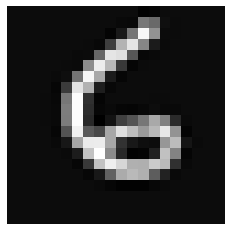

Neural Network Prediction:  [0.] (digit  [0.] )
1135
Displaying Example Image


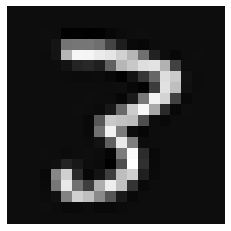

Neural Network Prediction:  [0.] (digit  [0.] )
1136
Displaying Example Image


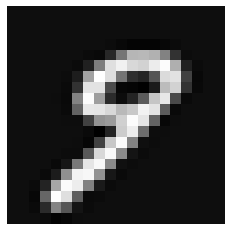

Neural Network Prediction:  [0.] (digit  [0.] )
1137
Displaying Example Image


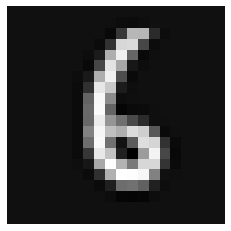

Neural Network Prediction:  [0.] (digit  [0.] )
1138
Displaying Example Image


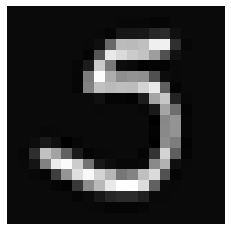

Neural Network Prediction:  [0.] (digit  [0.] )
1139
Displaying Example Image


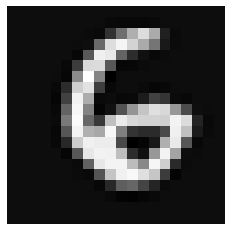

Neural Network Prediction:  [0.] (digit  [0.] )
1140
Displaying Example Image


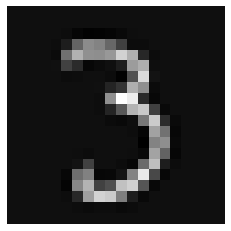

Neural Network Prediction:  [0.] (digit  [0.] )
1141
Displaying Example Image


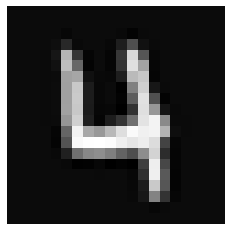

Neural Network Prediction:  [0.] (digit  [0.] )
1142
Displaying Example Image


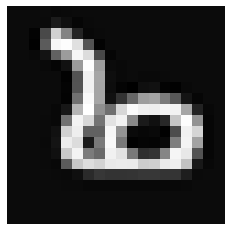

Neural Network Prediction:  [0.] (digit  [0.] )
1143
Displaying Example Image


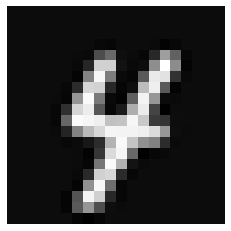

Neural Network Prediction:  [0.] (digit  [0.] )
1144
Displaying Example Image


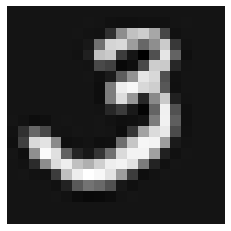

Neural Network Prediction:  [0.] (digit  [0.] )
1145
Displaying Example Image


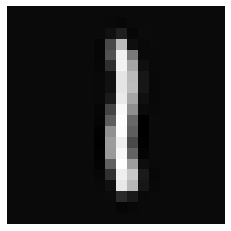

Neural Network Prediction:  [0.] (digit  [0.] )
1146
Displaying Example Image


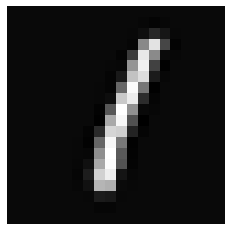

Neural Network Prediction:  [0.] (digit  [0.] )
1147
Displaying Example Image


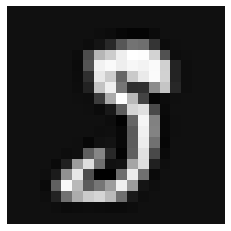

Neural Network Prediction:  [0.] (digit  [0.] )
1148
Displaying Example Image


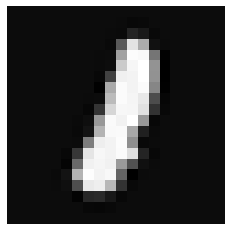

Neural Network Prediction:  [0.] (digit  [0.] )
1149
Displaying Example Image


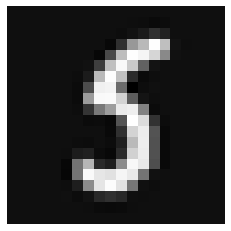

Neural Network Prediction:  [0.] (digit  [0.] )
1150
Displaying Example Image


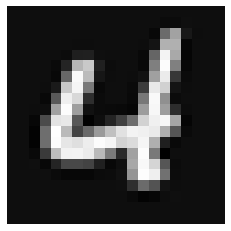

Neural Network Prediction:  [0.] (digit  [0.] )
1151
Displaying Example Image


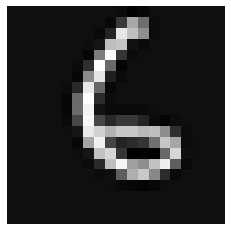

Neural Network Prediction:  [0.] (digit  [0.] )
1152
Displaying Example Image


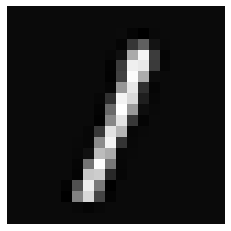

Neural Network Prediction:  [0.] (digit  [0.] )
1153
Displaying Example Image


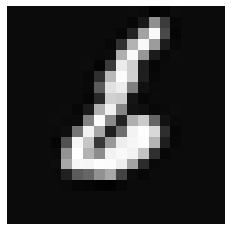

Neural Network Prediction:  [0.] (digit  [0.] )
1154
Displaying Example Image


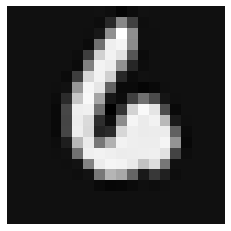

Neural Network Prediction:  [0.] (digit  [0.] )
1155
Displaying Example Image


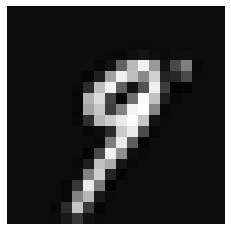

Neural Network Prediction:  [0.] (digit  [0.] )
1156
Displaying Example Image


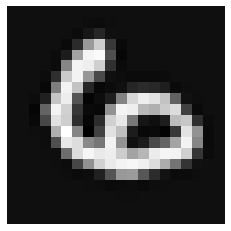

Neural Network Prediction:  [0.] (digit  [0.] )
1157
Displaying Example Image


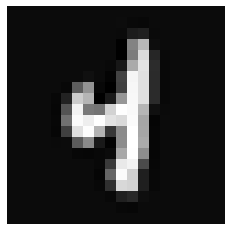

Neural Network Prediction:  [0.] (digit  [0.] )
1158
Displaying Example Image


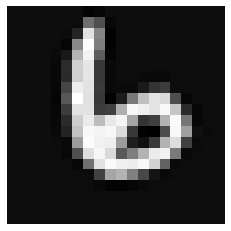

Neural Network Prediction:  [0.] (digit  [0.] )
1159
Displaying Example Image


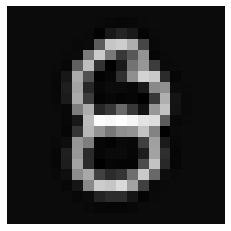

Neural Network Prediction:  [0.] (digit  [0.] )
1160
Displaying Example Image


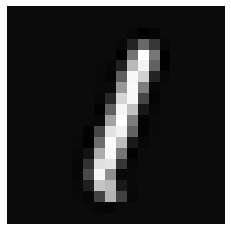

Neural Network Prediction:  [0.] (digit  [0.] )
1161
Displaying Example Image


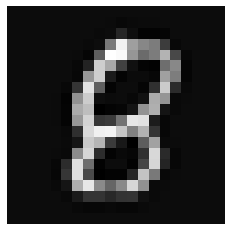

Neural Network Prediction:  [0.] (digit  [0.] )
1162
Displaying Example Image


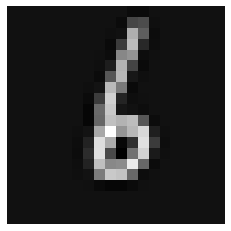

Neural Network Prediction:  [0.] (digit  [0.] )
1163
Displaying Example Image


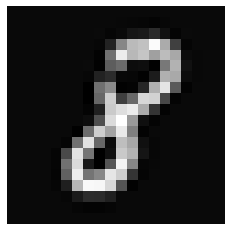

Neural Network Prediction:  [0.] (digit  [0.] )
1164
Displaying Example Image


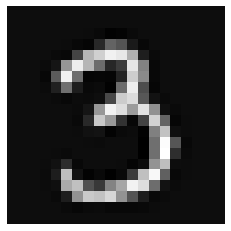

Neural Network Prediction:  [0.] (digit  [0.] )
1165
Displaying Example Image


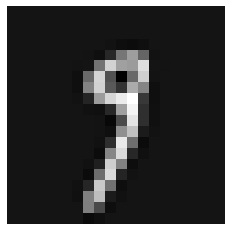

Neural Network Prediction:  [0.] (digit  [0.] )
1166
Displaying Example Image


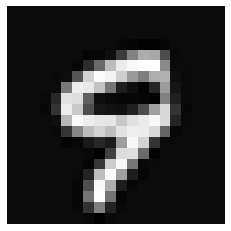

Neural Network Prediction:  [0.] (digit  [0.] )
1167
Displaying Example Image


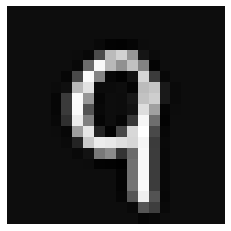

Neural Network Prediction:  [0.] (digit  [0.] )
1168
Displaying Example Image


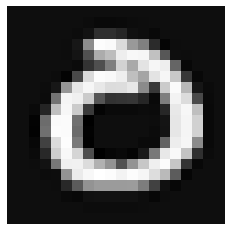

Neural Network Prediction:  [0.] (digit  [0.] )
1169
Displaying Example Image


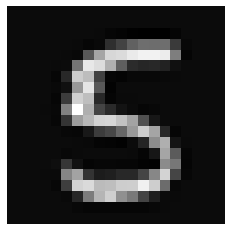

Neural Network Prediction:  [0.] (digit  [0.] )
1170
Displaying Example Image


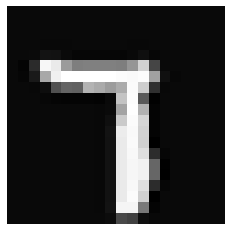

Neural Network Prediction:  [0.] (digit  [0.] )
1171
Displaying Example Image


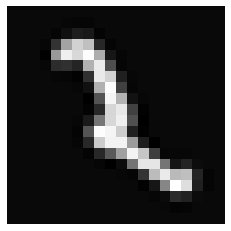

Neural Network Prediction:  [0.] (digit  [0.] )
1172
Displaying Example Image


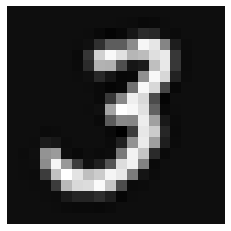

Neural Network Prediction:  [0.] (digit  [0.] )
1173
Displaying Example Image


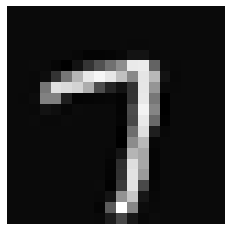

Neural Network Prediction:  [0.] (digit  [0.] )
1174
Displaying Example Image


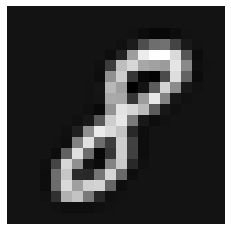

Neural Network Prediction:  [0.] (digit  [0.] )
1175
Displaying Example Image


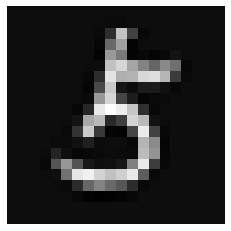

Neural Network Prediction:  [0.] (digit  [0.] )
1176
Displaying Example Image


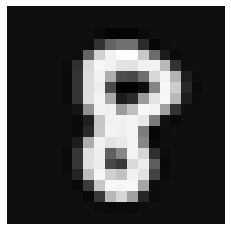

Neural Network Prediction:  [0.] (digit  [0.] )
1177
Displaying Example Image


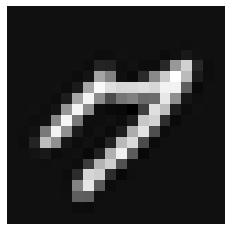

Neural Network Prediction:  [0.] (digit  [0.] )
1178
Displaying Example Image


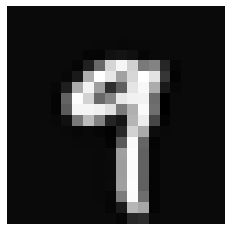

Neural Network Prediction:  [0.] (digit  [0.] )
1179
Displaying Example Image


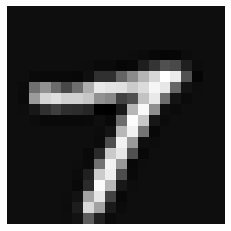

Neural Network Prediction:  [0.] (digit  [0.] )
1180
Displaying Example Image


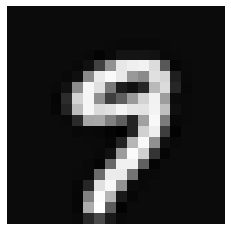

Neural Network Prediction:  [0.] (digit  [0.] )
1181
Displaying Example Image


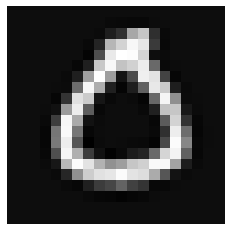

Neural Network Prediction:  [0.] (digit  [0.] )
1182
Displaying Example Image


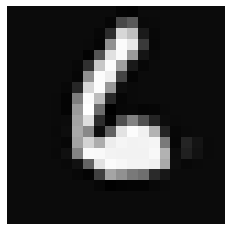

Neural Network Prediction:  [0.] (digit  [0.] )
1183
Displaying Example Image


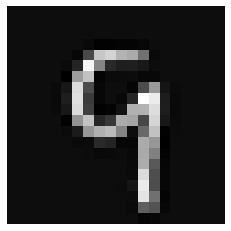

Neural Network Prediction:  [0.] (digit  [0.] )
1184
Displaying Example Image


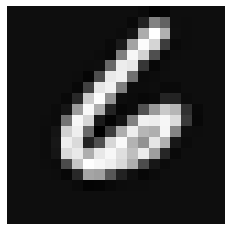

Neural Network Prediction:  [0.] (digit  [0.] )
1185
Displaying Example Image


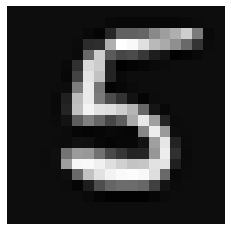

Neural Network Prediction:  [0.] (digit  [0.] )
1186
Displaying Example Image


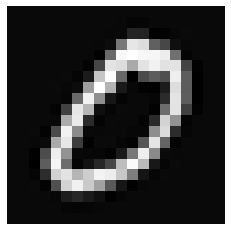

Neural Network Prediction:  [0.] (digit  [0.] )
1187
Displaying Example Image


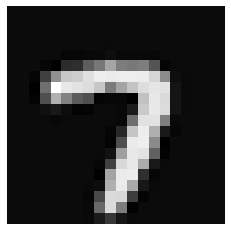

Neural Network Prediction:  [0.] (digit  [0.] )
1188
Displaying Example Image


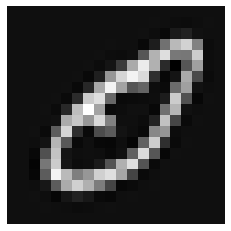

Neural Network Prediction:  [0.] (digit  [0.] )
1189
Displaying Example Image


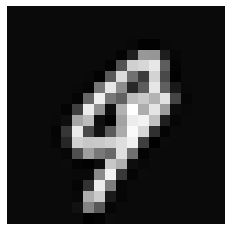

Neural Network Prediction:  [0.] (digit  [0.] )
1190
Displaying Example Image


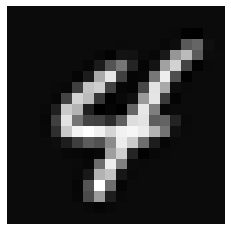

Neural Network Prediction:  [0.] (digit  [0.] )
1191
Displaying Example Image


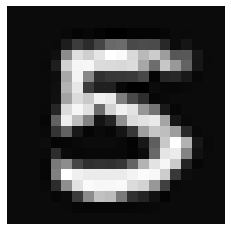

Neural Network Prediction:  [0.] (digit  [0.] )
1192
Displaying Example Image


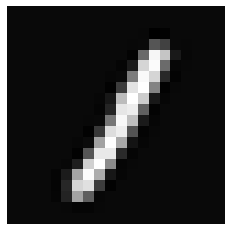

Neural Network Prediction:  [0.] (digit  [0.] )
1193
Displaying Example Image


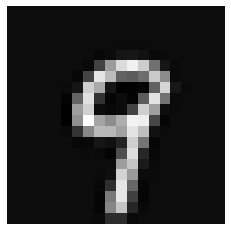

Neural Network Prediction:  [0.] (digit  [0.] )
1194
Displaying Example Image


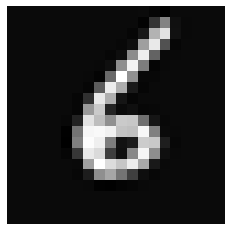

Neural Network Prediction:  [0.] (digit  [0.] )
1195
Displaying Example Image


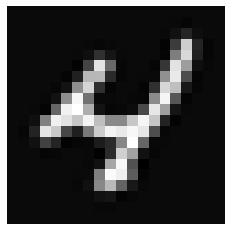

Neural Network Prediction:  [0.] (digit  [0.] )
1196
Displaying Example Image


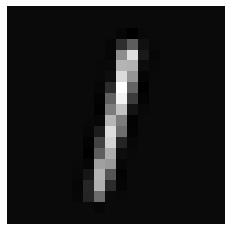

Neural Network Prediction:  [0.] (digit  [0.] )
1197
Displaying Example Image


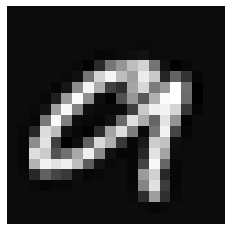

Neural Network Prediction:  [0.] (digit  [0.] )
1198
Displaying Example Image


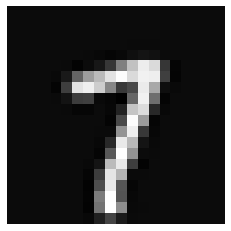

Neural Network Prediction:  [0.] (digit  [0.] )
1199
Displaying Example Image


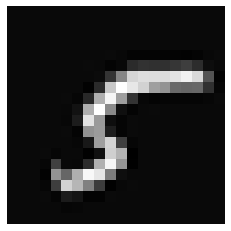

Neural Network Prediction:  [0.] (digit  [0.] )
1200
Displaying Example Image


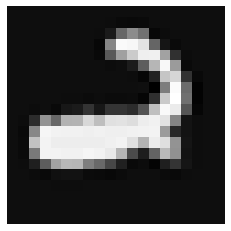

Neural Network Prediction:  [0.] (digit  [0.] )
1201
Displaying Example Image


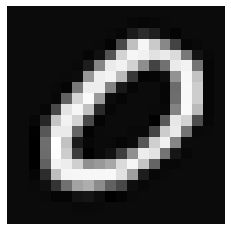

Neural Network Prediction:  [0.] (digit  [0.] )
1202
Displaying Example Image


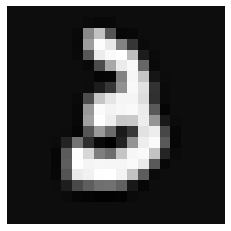

Neural Network Prediction:  [0.] (digit  [0.] )
1203
Displaying Example Image


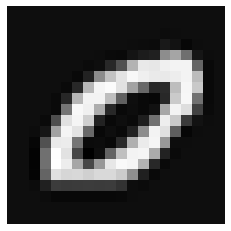

Neural Network Prediction:  [0.] (digit  [0.] )
1204
Displaying Example Image


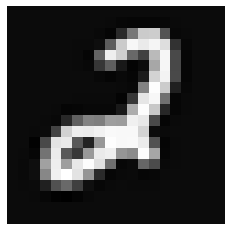

Neural Network Prediction:  [0.] (digit  [0.] )
1205
Displaying Example Image


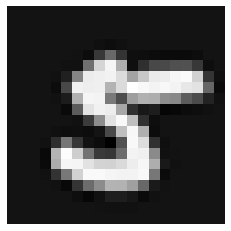

Neural Network Prediction:  [0.] (digit  [0.] )
1206
Displaying Example Image


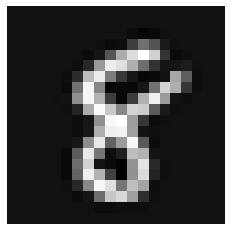

Neural Network Prediction:  [0.] (digit  [0.] )
1207
Displaying Example Image


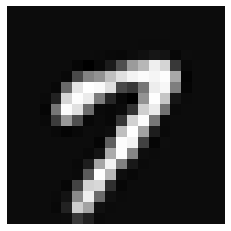

Neural Network Prediction:  [0.] (digit  [0.] )
1208
Displaying Example Image


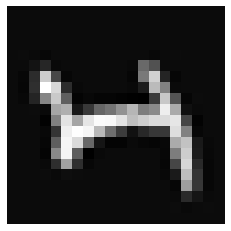

Neural Network Prediction:  [0.] (digit  [0.] )
1209
Displaying Example Image


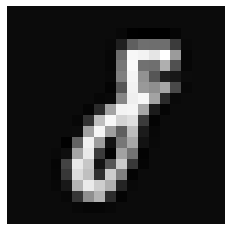

Neural Network Prediction:  [0.] (digit  [0.] )
1210
Displaying Example Image


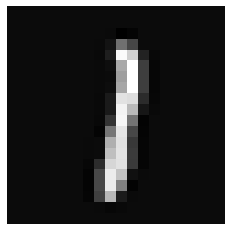

Neural Network Prediction:  [0.] (digit  [0.] )
1211
Displaying Example Image


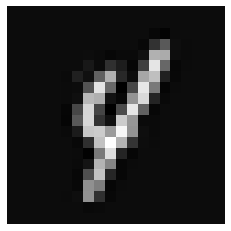

Neural Network Prediction:  [0.] (digit  [0.] )
1212
Displaying Example Image


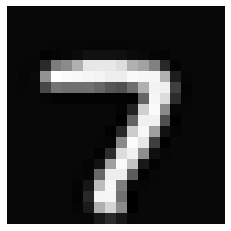

Neural Network Prediction:  [0.] (digit  [0.] )
1213
Displaying Example Image


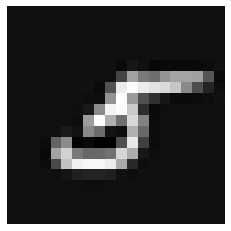

Neural Network Prediction:  [0.] (digit  [0.] )
1214
Displaying Example Image


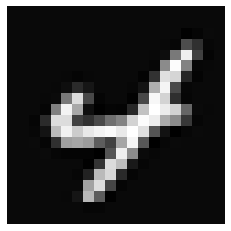

Neural Network Prediction:  [0.] (digit  [0.] )
1215
Displaying Example Image


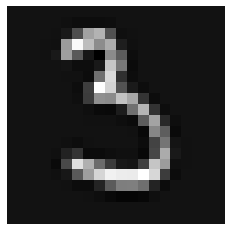

Neural Network Prediction:  [0.] (digit  [0.] )
1216
Displaying Example Image


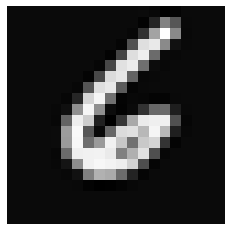

Neural Network Prediction:  [0.] (digit  [0.] )
1217
Displaying Example Image


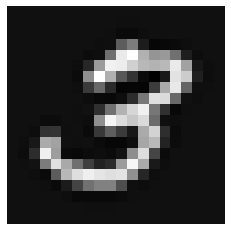

Neural Network Prediction:  [0.] (digit  [0.] )
1218
Displaying Example Image


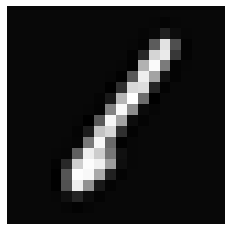

Neural Network Prediction:  [0.] (digit  [0.] )
1219
Displaying Example Image


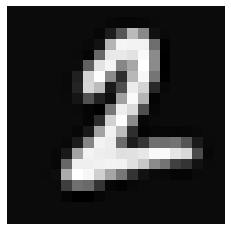

Neural Network Prediction:  [0.] (digit  [0.] )
1220
Displaying Example Image


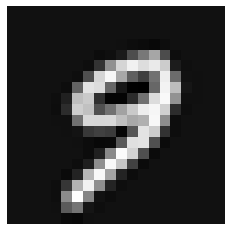

Neural Network Prediction:  [0.] (digit  [0.] )
1221
Displaying Example Image


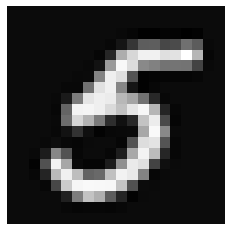

Neural Network Prediction:  [0.] (digit  [0.] )
1222
Displaying Example Image


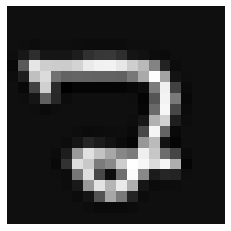

Neural Network Prediction:  [0.] (digit  [0.] )
1223
Displaying Example Image


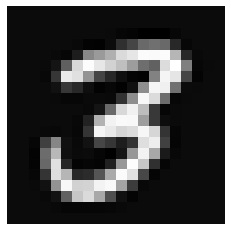

Neural Network Prediction:  [0.] (digit  [0.] )
1224
Displaying Example Image


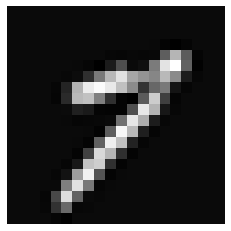

Neural Network Prediction:  [0.] (digit  [0.] )
1225
Displaying Example Image


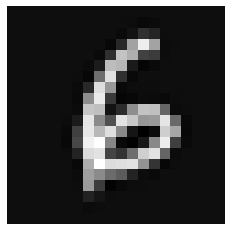

Neural Network Prediction:  [0.] (digit  [0.] )
1226
Displaying Example Image


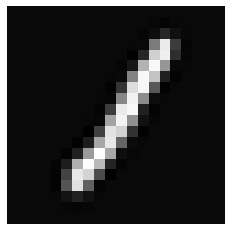

Neural Network Prediction:  [0.] (digit  [0.] )
1227
Displaying Example Image


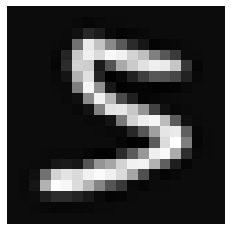

Neural Network Prediction:  [0.] (digit  [0.] )
1228
Displaying Example Image


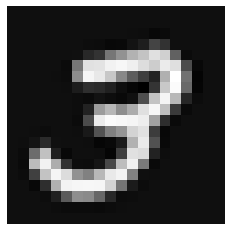

Neural Network Prediction:  [0.] (digit  [0.] )
1229
Displaying Example Image


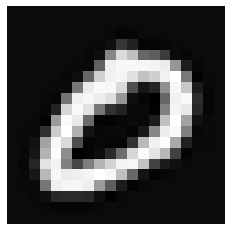

Neural Network Prediction:  [0.] (digit  [0.] )
1230
Displaying Example Image


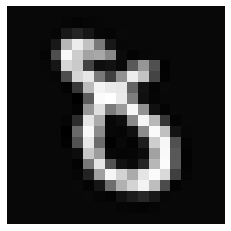

Neural Network Prediction:  [0.] (digit  [0.] )
1231
Displaying Example Image


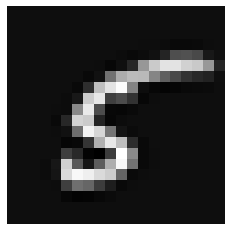

Neural Network Prediction:  [0.] (digit  [0.] )
1232
Displaying Example Image


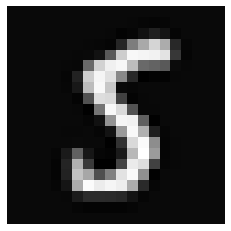

Neural Network Prediction:  [0.] (digit  [0.] )
1233
Displaying Example Image


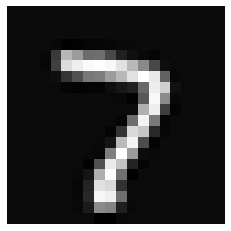

Neural Network Prediction:  [0.] (digit  [0.] )
1234
Displaying Example Image


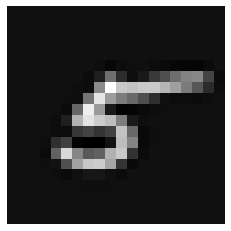

Neural Network Prediction:  [0.] (digit  [0.] )
1235
Displaying Example Image


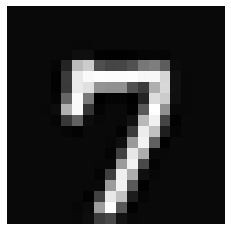

Neural Network Prediction:  [0.] (digit  [0.] )
1236
Displaying Example Image


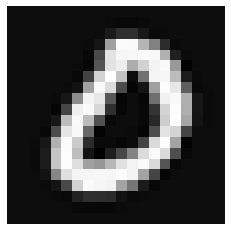

Neural Network Prediction:  [0.] (digit  [0.] )
1237
Displaying Example Image


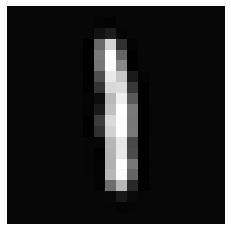

Neural Network Prediction:  [0.] (digit  [0.] )
1238
Displaying Example Image


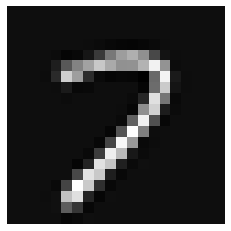

Neural Network Prediction:  [0.] (digit  [0.] )
1239
Displaying Example Image


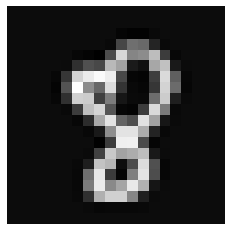

Neural Network Prediction:  [0.] (digit  [0.] )
1240
Displaying Example Image


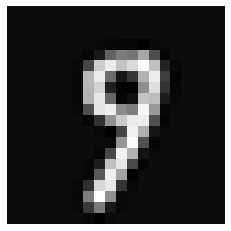

Neural Network Prediction:  [0.] (digit  [0.] )
1241
Displaying Example Image


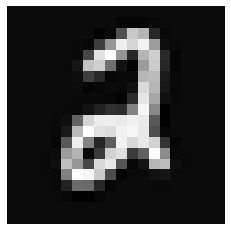

Neural Network Prediction:  [0.] (digit  [0.] )
1242
Displaying Example Image


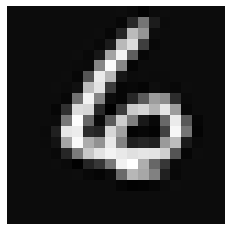

Neural Network Prediction:  [0.] (digit  [0.] )
1243
Displaying Example Image


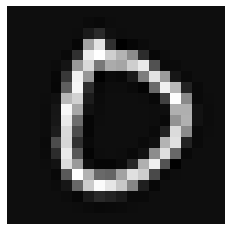

Neural Network Prediction:  [0.] (digit  [0.] )
1244
Displaying Example Image


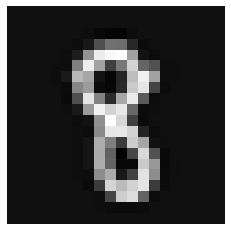

Neural Network Prediction:  [0.] (digit  [0.] )
1245
Displaying Example Image


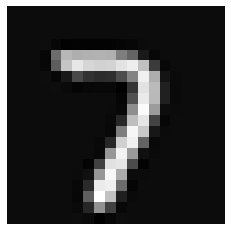

Neural Network Prediction:  [0.] (digit  [0.] )
1246
Displaying Example Image


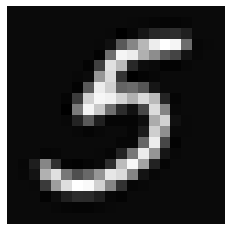

Neural Network Prediction:  [0.] (digit  [0.] )
1247
Displaying Example Image


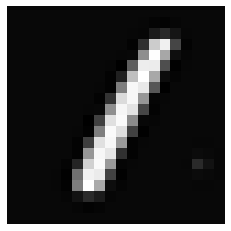

Neural Network Prediction:  [0.] (digit  [0.] )
1248
Displaying Example Image


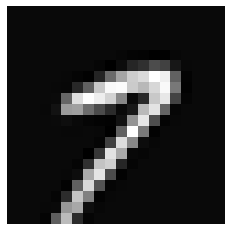

Neural Network Prediction:  [0.] (digit  [0.] )
1249
Displaying Example Image


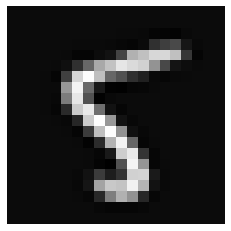

Neural Network Prediction:  [0.] (digit  [0.] )
1250
Displaying Example Image


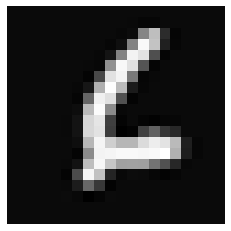

Neural Network Prediction:  [0.] (digit  [0.] )
1251
Displaying Example Image


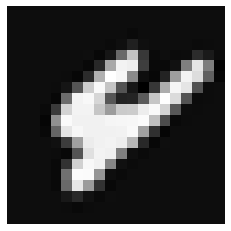

Neural Network Prediction:  [0.] (digit  [0.] )
1252
Displaying Example Image


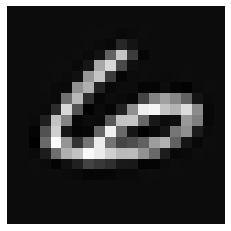

Neural Network Prediction:  [0.] (digit  [0.] )
1253
Displaying Example Image


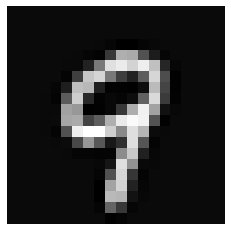

Neural Network Prediction:  [0.] (digit  [0.] )
1254
Displaying Example Image


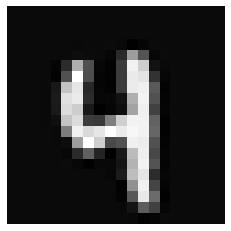

Neural Network Prediction:  [0.] (digit  [0.] )
1255
Displaying Example Image


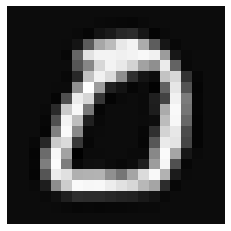

Neural Network Prediction:  [0.] (digit  [0.] )
1256
Displaying Example Image


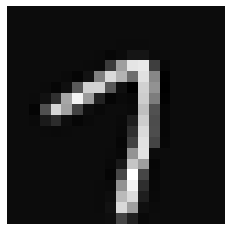

Neural Network Prediction:  [0.] (digit  [0.] )
1257
Displaying Example Image


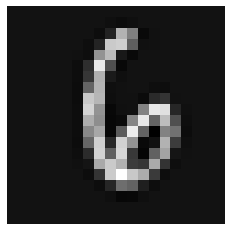

Neural Network Prediction:  [0.] (digit  [0.] )
1258
Displaying Example Image


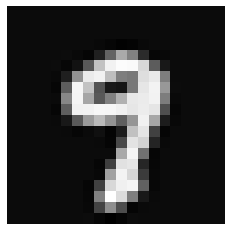

Neural Network Prediction:  [0.] (digit  [0.] )
1259
Displaying Example Image


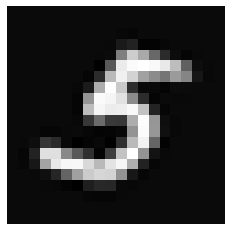

Neural Network Prediction:  [0.] (digit  [0.] )
1260
Displaying Example Image


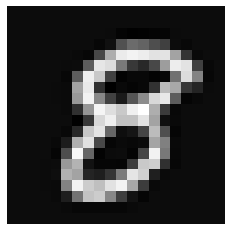

Neural Network Prediction:  [0.] (digit  [0.] )
1261
Displaying Example Image


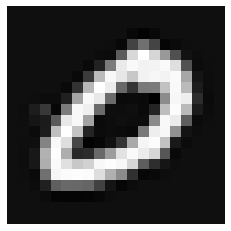

Neural Network Prediction:  [0.] (digit  [0.] )
1262
Displaying Example Image


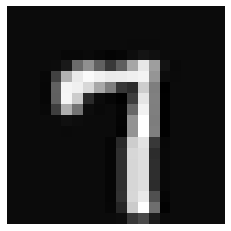

Neural Network Prediction:  [0.] (digit  [0.] )
1263
Displaying Example Image


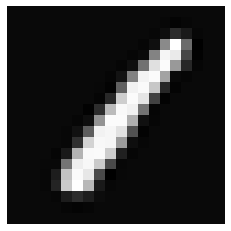

Neural Network Prediction:  [0.] (digit  [0.] )
1264
Displaying Example Image


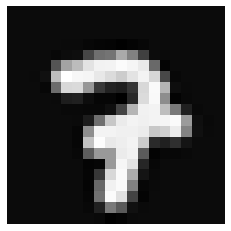

Neural Network Prediction:  [0.] (digit  [0.] )
1265
Displaying Example Image


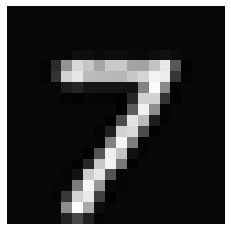

Neural Network Prediction:  [0.] (digit  [0.] )
1266
Displaying Example Image


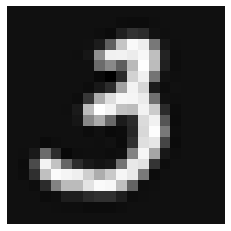

Neural Network Prediction:  [0.] (digit  [0.] )
1267
Displaying Example Image


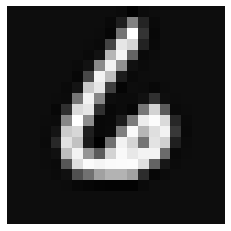

Neural Network Prediction:  [0.] (digit  [0.] )
1268
Displaying Example Image


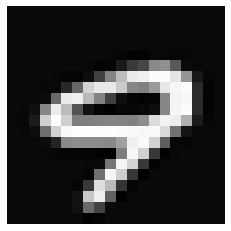

Neural Network Prediction:  [0.] (digit  [0.] )
1269
Displaying Example Image


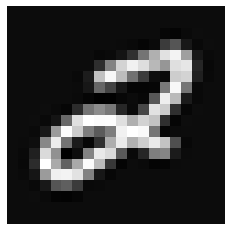

Neural Network Prediction:  [0.] (digit  [0.] )
1270
Displaying Example Image


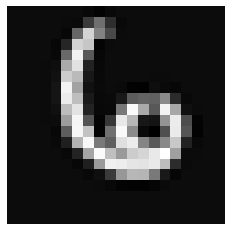

Neural Network Prediction:  [0.] (digit  [0.] )
1271
Displaying Example Image


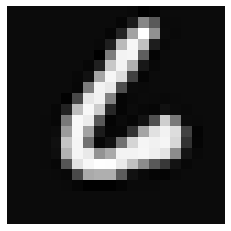

Neural Network Prediction:  [0.] (digit  [0.] )
1272
Displaying Example Image


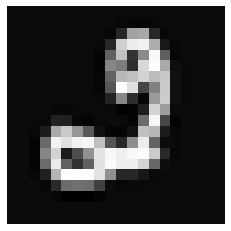

Neural Network Prediction:  [0.] (digit  [0.] )
1273
Displaying Example Image


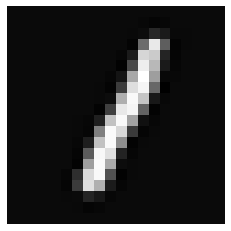

Neural Network Prediction:  [0.] (digit  [0.] )
1274
Displaying Example Image


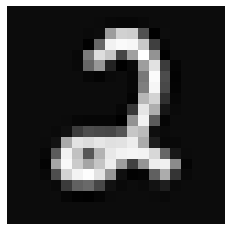

Neural Network Prediction:  [0.] (digit  [0.] )
1275
Displaying Example Image


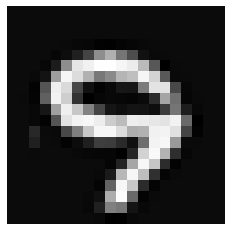

Neural Network Prediction:  [0.] (digit  [0.] )
1276
Displaying Example Image


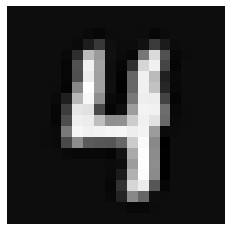

Neural Network Prediction:  [0.] (digit  [0.] )
1277
Displaying Example Image


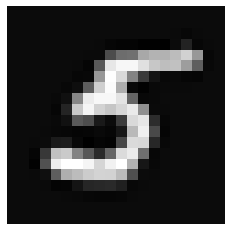

Neural Network Prediction:  [0.] (digit  [0.] )
1278
Displaying Example Image


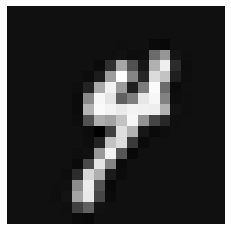

Neural Network Prediction:  [0.] (digit  [0.] )
1279
Displaying Example Image


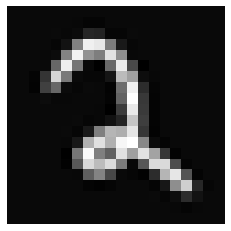

Neural Network Prediction:  [0.] (digit  [0.] )
1280
Displaying Example Image


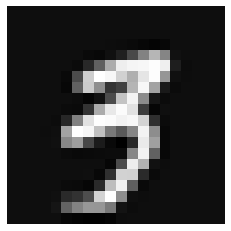

Neural Network Prediction:  [0.] (digit  [0.] )
1281
Displaying Example Image


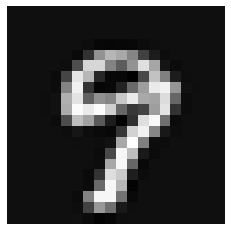

Neural Network Prediction:  [0.] (digit  [0.] )
1282
Displaying Example Image


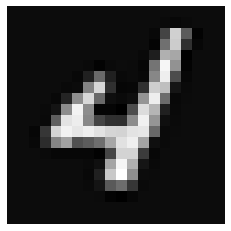

Neural Network Prediction:  [0.] (digit  [0.] )
1283
Displaying Example Image


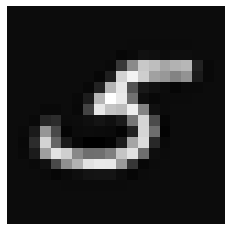

Neural Network Prediction:  [0.] (digit  [0.] )
1284
Displaying Example Image


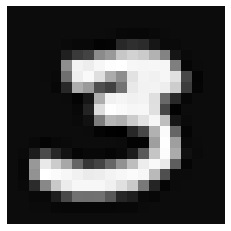

Neural Network Prediction:  [0.] (digit  [0.] )
1285
Displaying Example Image


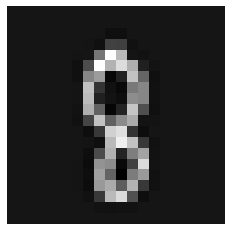

Neural Network Prediction:  [0.] (digit  [0.] )
1286
Displaying Example Image


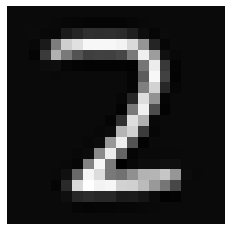

Neural Network Prediction:  [0.] (digit  [0.] )
1287
Displaying Example Image


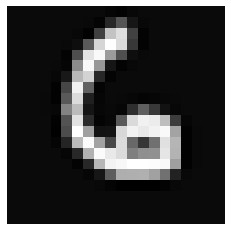

Neural Network Prediction:  [0.] (digit  [0.] )
1288
Displaying Example Image


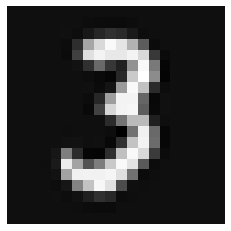

Neural Network Prediction:  [0.] (digit  [0.] )
1289
Displaying Example Image


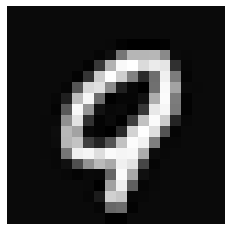

Neural Network Prediction:  [0.] (digit  [0.] )
1290
Displaying Example Image


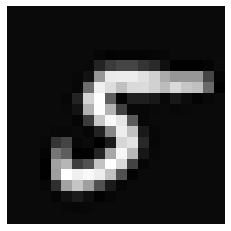

Neural Network Prediction:  [0.] (digit  [0.] )
1291
Displaying Example Image


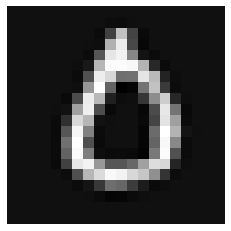

Neural Network Prediction:  [0.] (digit  [0.] )
1292
Displaying Example Image


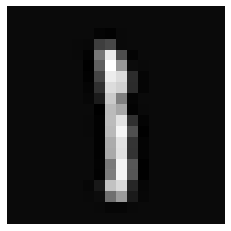

Neural Network Prediction:  [0.] (digit  [0.] )
1293
Displaying Example Image


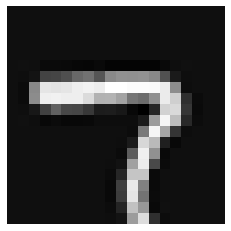

Neural Network Prediction:  [0.] (digit  [0.] )
1294
Displaying Example Image


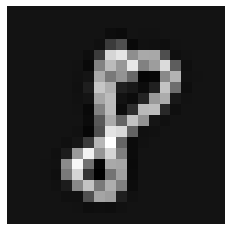

Neural Network Prediction:  [0.] (digit  [0.] )
1295
Displaying Example Image


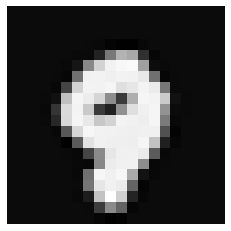

Neural Network Prediction:  [0.] (digit  [0.] )
1296
Displaying Example Image


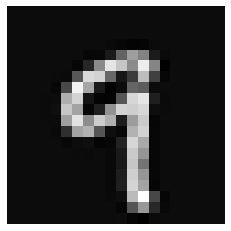

Neural Network Prediction:  [0.] (digit  [0.] )
1297
Displaying Example Image


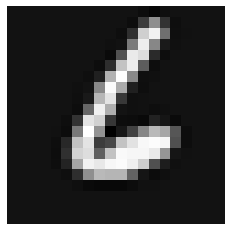

Neural Network Prediction:  [0.] (digit  [0.] )
1298
Displaying Example Image


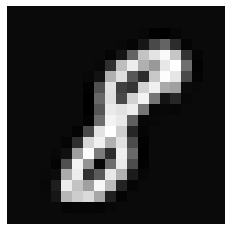

Neural Network Prediction:  [0.] (digit  [0.] )
1299
Displaying Example Image


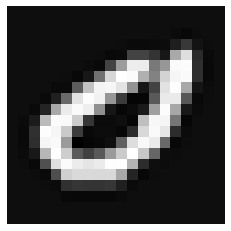

Neural Network Prediction:  [0.] (digit  [0.] )
1300
Displaying Example Image


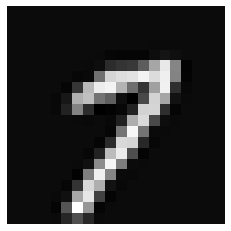

Neural Network Prediction:  [0.] (digit  [0.] )
1301
Displaying Example Image


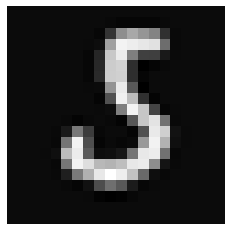

Neural Network Prediction:  [0.] (digit  [0.] )
1302
Displaying Example Image


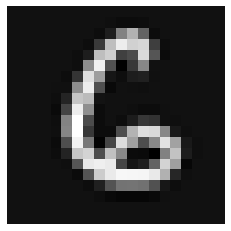

Neural Network Prediction:  [0.] (digit  [0.] )
1303
Displaying Example Image


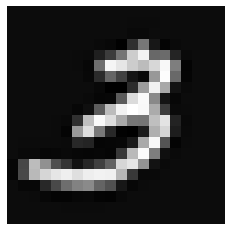

Neural Network Prediction:  [0.] (digit  [0.] )
1304
Displaying Example Image


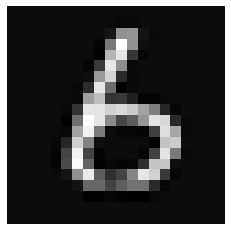

Neural Network Prediction:  [0.] (digit  [0.] )
1305
Displaying Example Image


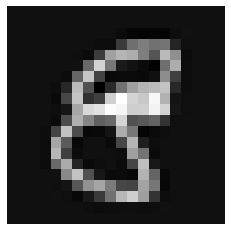

Neural Network Prediction:  [0.] (digit  [0.] )
1306
Displaying Example Image


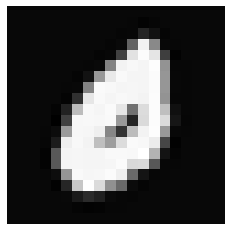

Neural Network Prediction:  [0.] (digit  [0.] )
1307
Displaying Example Image


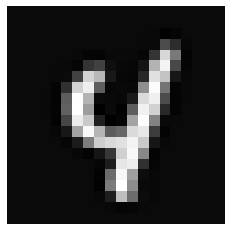

Neural Network Prediction:  [0.] (digit  [0.] )
1308
Displaying Example Image


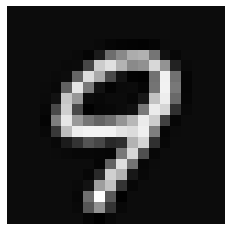

Neural Network Prediction:  [0.] (digit  [0.] )
1309
Displaying Example Image


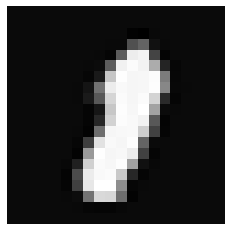

Neural Network Prediction:  [0.] (digit  [0.] )
1310
Displaying Example Image


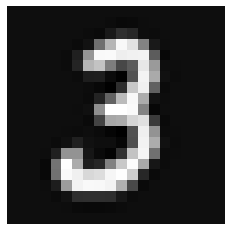

Neural Network Prediction:  [0.] (digit  [0.] )
1311
Displaying Example Image


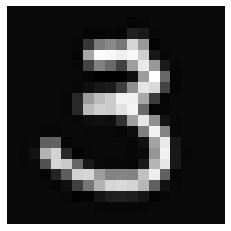

Neural Network Prediction:  [0.] (digit  [0.] )
1312
Displaying Example Image


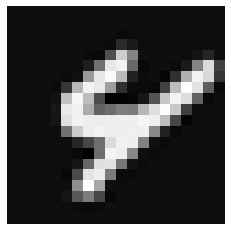

Neural Network Prediction:  [0.] (digit  [0.] )
1313
Displaying Example Image


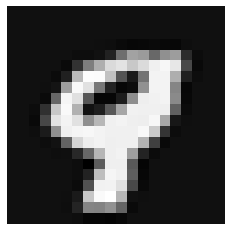

Neural Network Prediction:  [0.] (digit  [0.] )
1314
Displaying Example Image


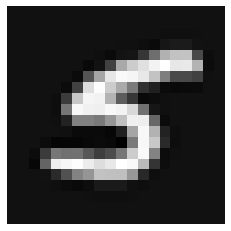

Neural Network Prediction:  [0.] (digit  [0.] )
1315
Displaying Example Image


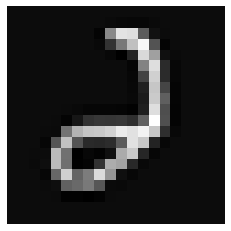

Neural Network Prediction:  [0.] (digit  [0.] )
1316
Displaying Example Image


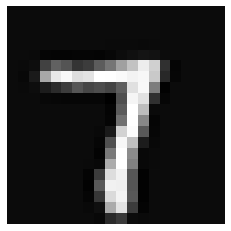

Neural Network Prediction:  [0.] (digit  [0.] )
1317
Displaying Example Image


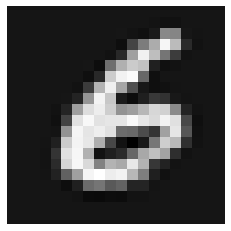

Neural Network Prediction:  [0.] (digit  [0.] )
1318
Displaying Example Image


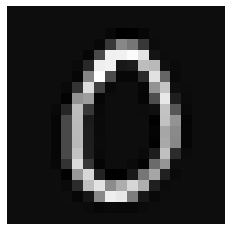

Neural Network Prediction:  [0.] (digit  [0.] )
1319
Displaying Example Image


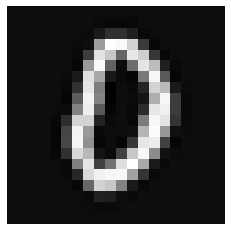

Neural Network Prediction:  [0.] (digit  [0.] )
1320
Displaying Example Image


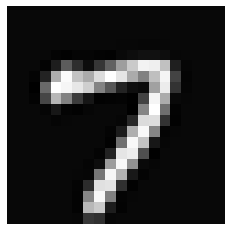

Neural Network Prediction:  [0.] (digit  [0.] )
1321
Displaying Example Image


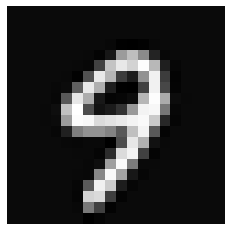

Neural Network Prediction:  [0.] (digit  [0.] )
1322
Displaying Example Image


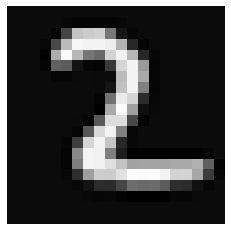

Neural Network Prediction:  [0.] (digit  [0.] )
1323
Displaying Example Image


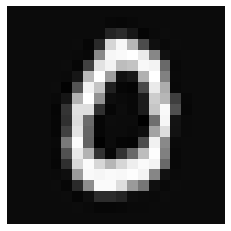

Neural Network Prediction:  [0.] (digit  [0.] )
1324
Displaying Example Image


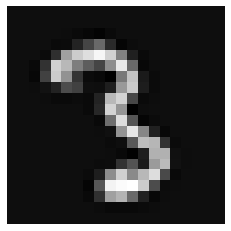

Neural Network Prediction:  [0.] (digit  [0.] )
1325
Displaying Example Image


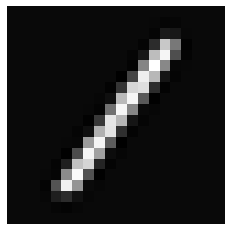

Neural Network Prediction:  [0.] (digit  [0.] )
1326
Displaying Example Image


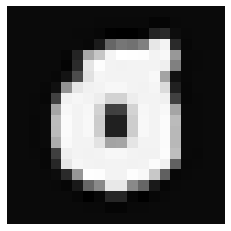

Neural Network Prediction:  [0.] (digit  [0.] )
1327
Displaying Example Image


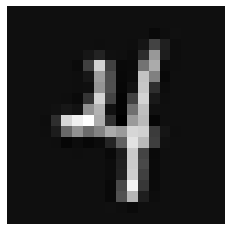

Neural Network Prediction:  [0.] (digit  [0.] )
1328
Displaying Example Image


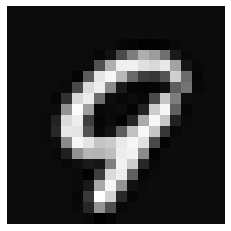

Neural Network Prediction:  [0.] (digit  [0.] )
1329
Displaying Example Image


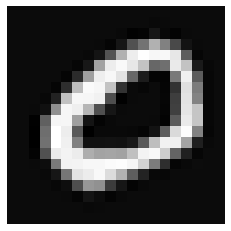

Neural Network Prediction:  [0.] (digit  [0.] )
1330
Displaying Example Image


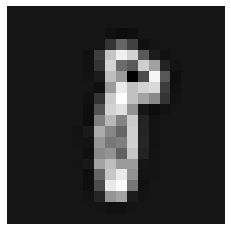

Neural Network Prediction:  [0.] (digit  [0.] )
1331
Displaying Example Image


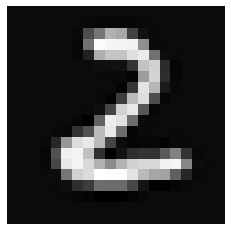

Neural Network Prediction:  [0.] (digit  [0.] )
1332
Displaying Example Image


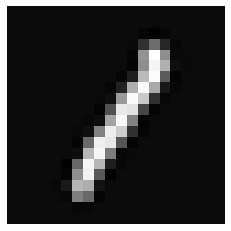

Neural Network Prediction:  [0.] (digit  [0.] )
1333
Displaying Example Image


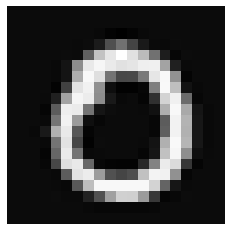

Neural Network Prediction:  [0.] (digit  [0.] )
1334
Displaying Example Image


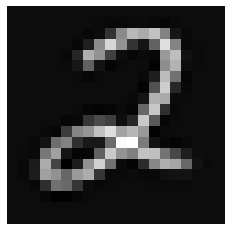

Neural Network Prediction:  [0.] (digit  [0.] )
1335
Displaying Example Image


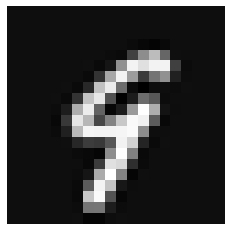

Neural Network Prediction:  [0.] (digit  [0.] )
1336
Displaying Example Image


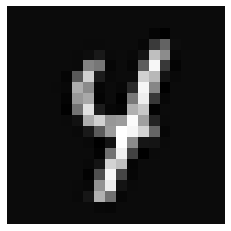

Neural Network Prediction:  [0.] (digit  [0.] )
1337
Displaying Example Image


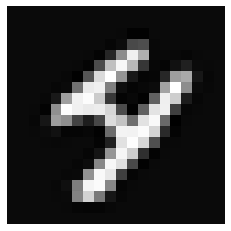

Neural Network Prediction:  [0.] (digit  [0.] )
1338
Displaying Example Image


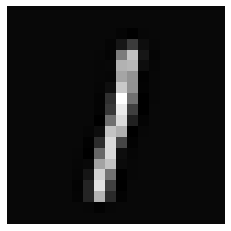

Neural Network Prediction:  [0.] (digit  [0.] )
1339
Displaying Example Image


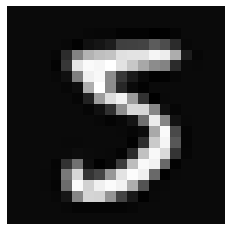

Neural Network Prediction:  [0.] (digit  [0.] )
1340
Displaying Example Image


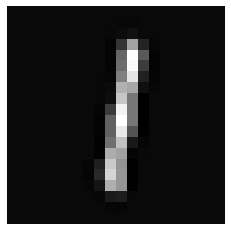

Neural Network Prediction:  [0.] (digit  [0.] )
1341
Displaying Example Image


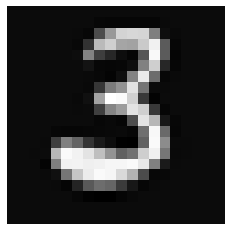

Neural Network Prediction:  [0.] (digit  [0.] )
1342
Displaying Example Image


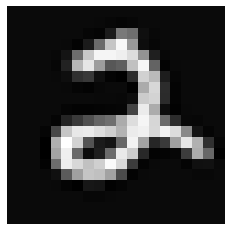

Neural Network Prediction:  [0.] (digit  [0.] )
1343
Displaying Example Image


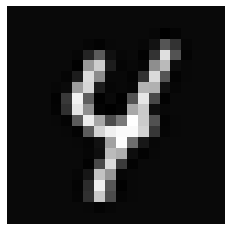

Neural Network Prediction:  [0.] (digit  [0.] )
1344
Displaying Example Image


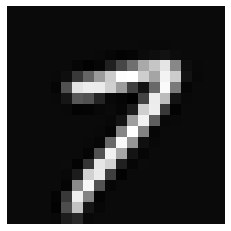

Neural Network Prediction:  [0.] (digit  [0.] )
1345
Displaying Example Image


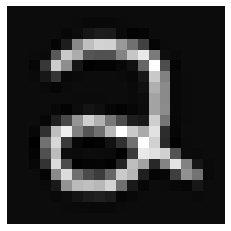

Neural Network Prediction:  [0.] (digit  [0.] )
1346
Displaying Example Image


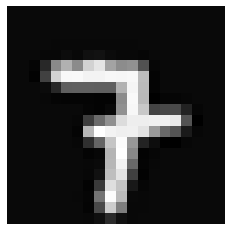

Neural Network Prediction:  [0.] (digit  [0.] )
1347
Displaying Example Image


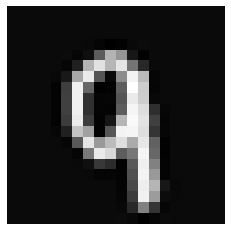

Neural Network Prediction:  [0.] (digit  [0.] )
1348
Displaying Example Image


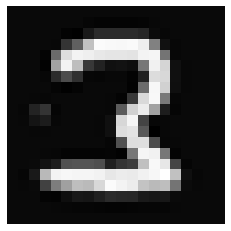

Neural Network Prediction:  [0.] (digit  [0.] )
1349
Displaying Example Image


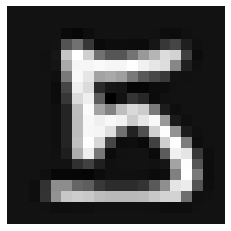

Neural Network Prediction:  [0.] (digit  [0.] )
1350
Displaying Example Image


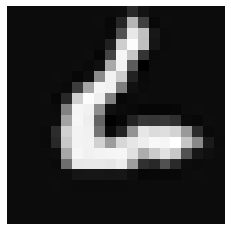

Neural Network Prediction:  [0.] (digit  [0.] )
1351
Displaying Example Image


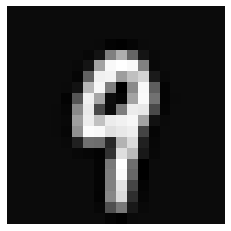

Neural Network Prediction:  [0.] (digit  [0.] )
1352
Displaying Example Image


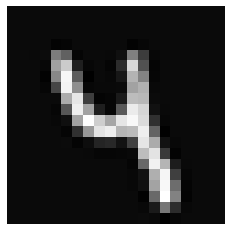

Neural Network Prediction:  [0.] (digit  [0.] )
1353
Displaying Example Image


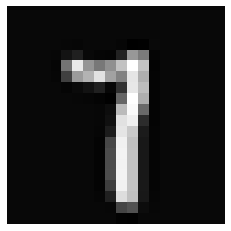

Neural Network Prediction:  [0.] (digit  [0.] )
1354
Displaying Example Image


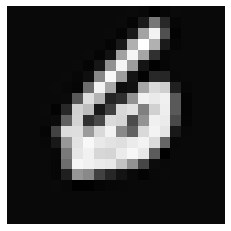

Neural Network Prediction:  [0.] (digit  [0.] )
1355
Displaying Example Image


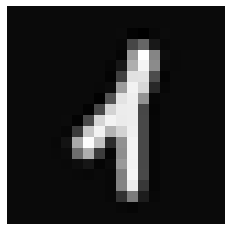

Neural Network Prediction:  [0.] (digit  [0.] )
1356
Displaying Example Image


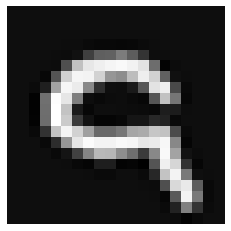

Neural Network Prediction:  [0.] (digit  [0.] )
1357
Displaying Example Image


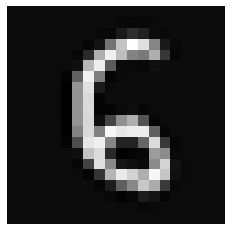

Neural Network Prediction:  [0.] (digit  [0.] )
1358
Displaying Example Image


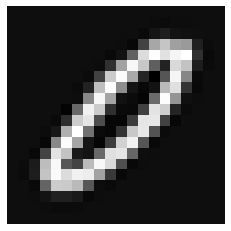

Neural Network Prediction:  [0.] (digit  [0.] )
1359
Displaying Example Image


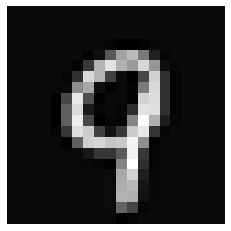

Neural Network Prediction:  [0.] (digit  [0.] )
1360
Displaying Example Image


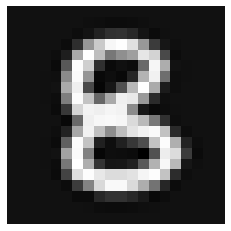

Neural Network Prediction:  [0.] (digit  [0.] )
1361
Displaying Example Image


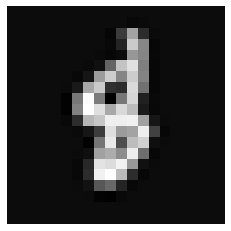

Neural Network Prediction:  [0.] (digit  [0.] )
1362
Displaying Example Image


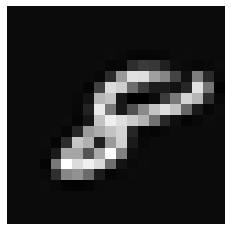

Neural Network Prediction:  [0.] (digit  [0.] )
1363
Displaying Example Image


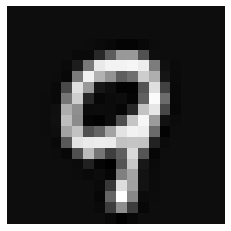

Neural Network Prediction:  [0.] (digit  [0.] )
1364
Displaying Example Image


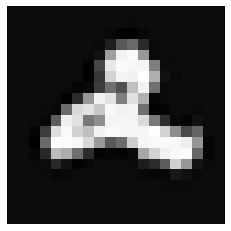

Neural Network Prediction:  [0.] (digit  [0.] )
1365
Displaying Example Image


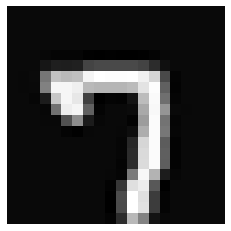

Neural Network Prediction:  [0.] (digit  [0.] )
1366
Displaying Example Image


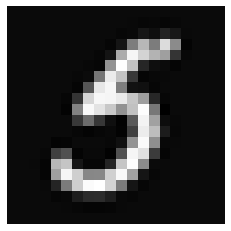

Neural Network Prediction:  [0.] (digit  [0.] )
1367
Displaying Example Image


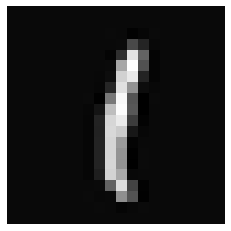

Neural Network Prediction:  [0.] (digit  [0.] )
1368
Displaying Example Image


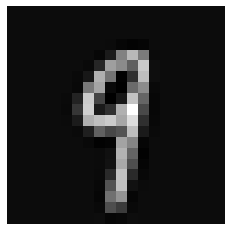

Neural Network Prediction:  [0.] (digit  [0.] )
1369
Displaying Example Image


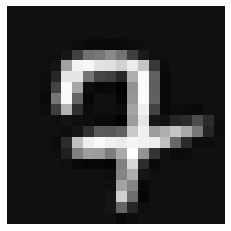

Neural Network Prediction:  [0.] (digit  [0.] )
1370
Displaying Example Image


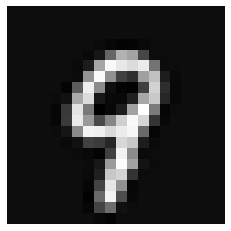

Neural Network Prediction:  [0.] (digit  [0.] )
1371
Displaying Example Image


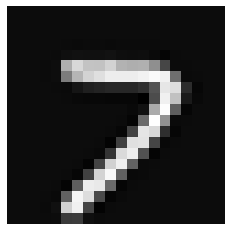

Neural Network Prediction:  [0.] (digit  [0.] )
1372
Displaying Example Image


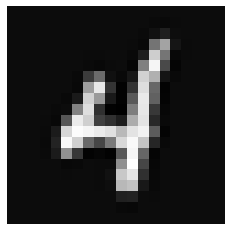

Neural Network Prediction:  [0.] (digit  [0.] )
1373
Displaying Example Image


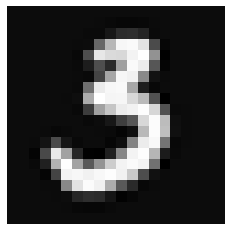

Neural Network Prediction:  [0.] (digit  [0.] )
1374
Displaying Example Image


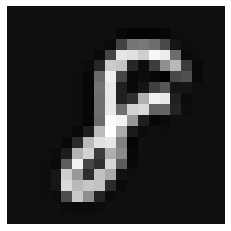

Neural Network Prediction:  [0.] (digit  [0.] )
1375
Displaying Example Image


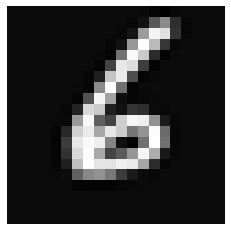

Neural Network Prediction:  [0.] (digit  [0.] )
1376
Displaying Example Image


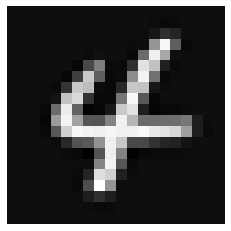

Neural Network Prediction:  [0.] (digit  [0.] )
1377
Displaying Example Image


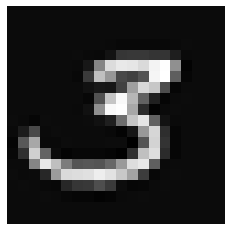

Neural Network Prediction:  [0.] (digit  [0.] )
1378
Displaying Example Image


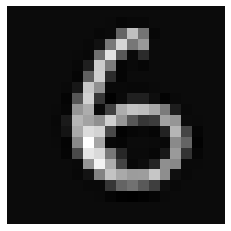

Neural Network Prediction:  [0.] (digit  [0.] )
1379
Displaying Example Image


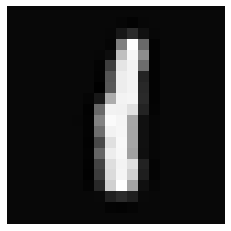

Neural Network Prediction:  [0.] (digit  [0.] )
1380
Displaying Example Image


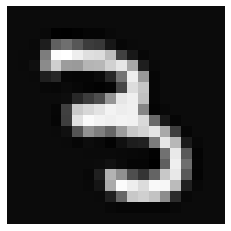

Neural Network Prediction:  [0.] (digit  [0.] )
1381
Displaying Example Image


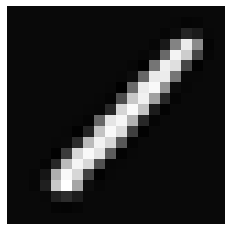

Neural Network Prediction:  [0.] (digit  [0.] )
1382
Displaying Example Image


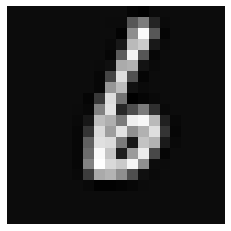

Neural Network Prediction:  [0.] (digit  [0.] )
1383
Displaying Example Image


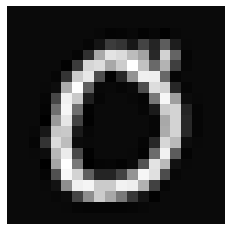

Neural Network Prediction:  [0.] (digit  [0.] )
1384
Displaying Example Image


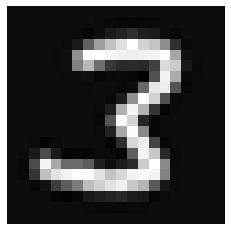

Neural Network Prediction:  [0.] (digit  [0.] )
1385
Displaying Example Image


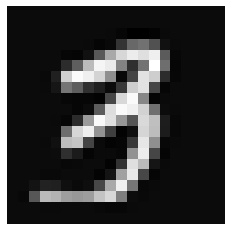

Neural Network Prediction:  [0.] (digit  [0.] )
1386
Displaying Example Image


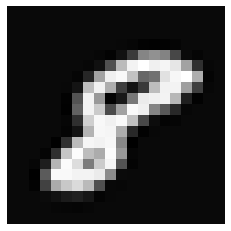

Neural Network Prediction:  [0.] (digit  [0.] )
1387
Displaying Example Image


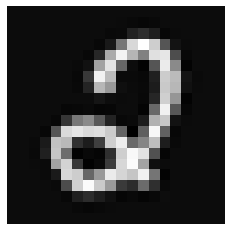

Neural Network Prediction:  [0.] (digit  [0.] )
1388
Displaying Example Image


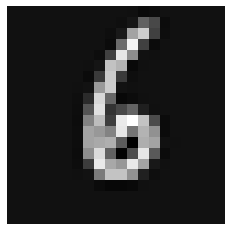

Neural Network Prediction:  [0.] (digit  [0.] )
1389
Displaying Example Image


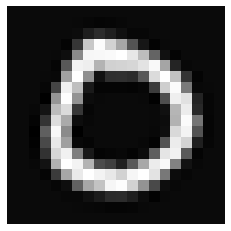

Neural Network Prediction:  [0.] (digit  [0.] )
1390
Displaying Example Image


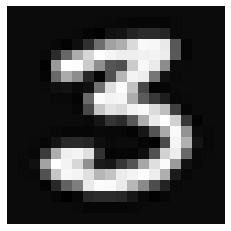

Neural Network Prediction:  [0.] (digit  [0.] )
1391
Displaying Example Image


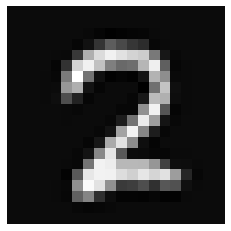

Neural Network Prediction:  [0.] (digit  [0.] )
1392
Displaying Example Image


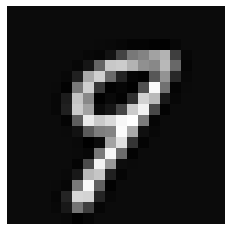

Neural Network Prediction:  [0.] (digit  [0.] )
1393
Displaying Example Image


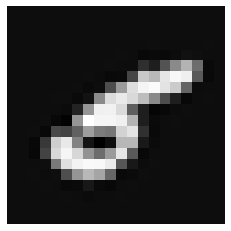

Neural Network Prediction:  [0.] (digit  [0.] )
1394
Displaying Example Image


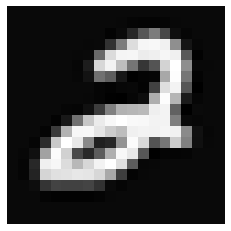

Neural Network Prediction:  [0.] (digit  [0.] )
1395
Displaying Example Image


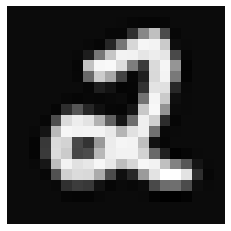

Neural Network Prediction:  [0.] (digit  [0.] )
1396
Displaying Example Image


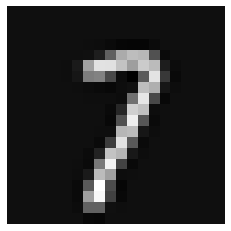

Neural Network Prediction:  [0.] (digit  [0.] )
1397
Displaying Example Image


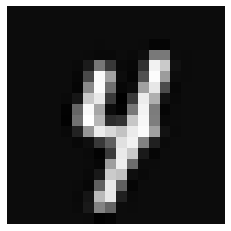

Neural Network Prediction:  [0.] (digit  [0.] )
1398
Displaying Example Image


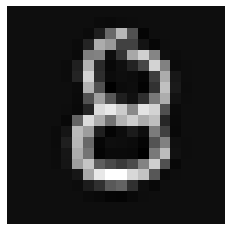

Neural Network Prediction:  [0.] (digit  [0.] )
1399
Displaying Example Image


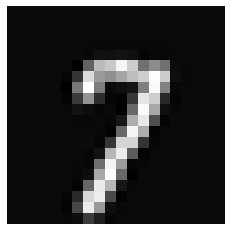

Neural Network Prediction:  [0.] (digit  [0.] )
1400
Displaying Example Image


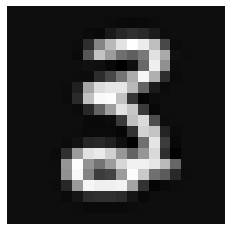

Neural Network Prediction:  [0.] (digit  [0.] )
1401
Displaying Example Image


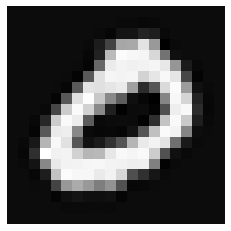

Neural Network Prediction:  [0.] (digit  [0.] )
1402
Displaying Example Image


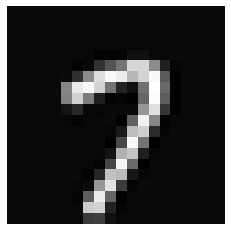

Neural Network Prediction:  [0.] (digit  [0.] )
1403
Displaying Example Image


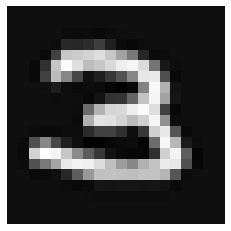

Neural Network Prediction:  [0.] (digit  [0.] )
1404
Displaying Example Image


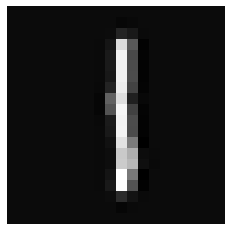

Neural Network Prediction:  [0.] (digit  [0.] )
1405
Displaying Example Image


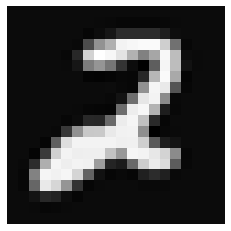

Neural Network Prediction:  [0.] (digit  [0.] )
1406
Displaying Example Image


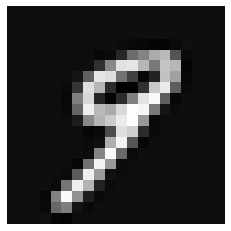

Neural Network Prediction:  [0.] (digit  [0.] )
1407
Displaying Example Image


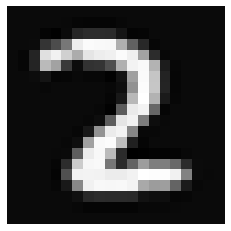

Neural Network Prediction:  [0.] (digit  [0.] )
1408
Displaying Example Image


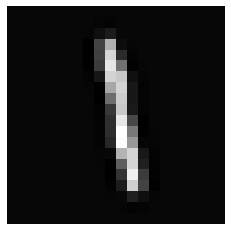

Neural Network Prediction:  [0.] (digit  [0.] )
1409
Displaying Example Image


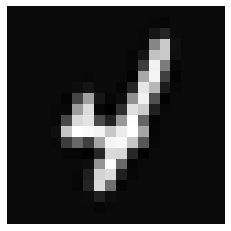

Neural Network Prediction:  [0.] (digit  [0.] )
1410
Displaying Example Image


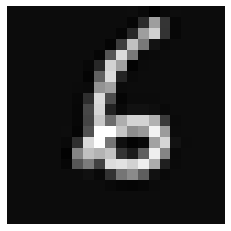

Neural Network Prediction:  [0.] (digit  [0.] )
1411
Displaying Example Image


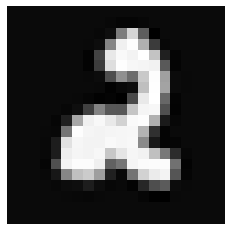

Neural Network Prediction:  [0.] (digit  [0.] )
1412
Displaying Example Image


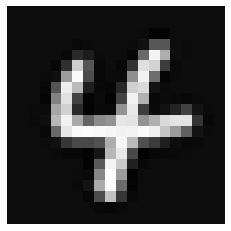

Neural Network Prediction:  [0.] (digit  [0.] )
1413
Displaying Example Image


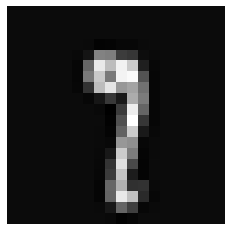

Neural Network Prediction:  [0.] (digit  [0.] )
1414
Displaying Example Image


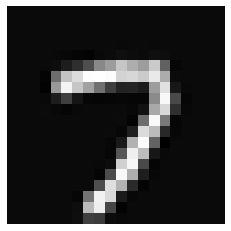

Neural Network Prediction:  [0.] (digit  [0.] )
1415
Displaying Example Image


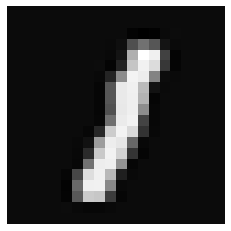

Neural Network Prediction:  [0.] (digit  [0.] )
1416
Displaying Example Image


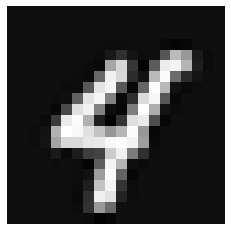

Neural Network Prediction:  [0.] (digit  [0.] )
1417
Displaying Example Image


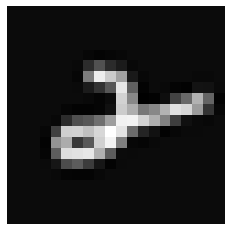

Neural Network Prediction:  [0.] (digit  [0.] )
1418
Displaying Example Image


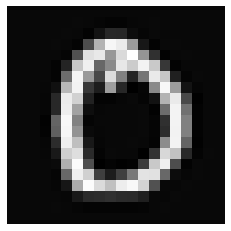

Neural Network Prediction:  [0.] (digit  [0.] )
1419
Displaying Example Image


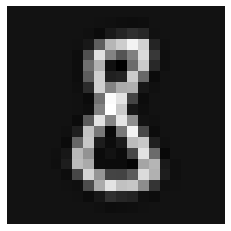

Neural Network Prediction:  [0.] (digit  [0.] )
1420
Displaying Example Image


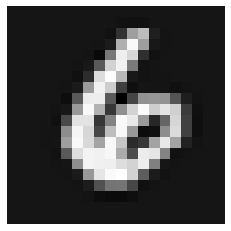

Neural Network Prediction:  [0.] (digit  [0.] )
1421
Displaying Example Image


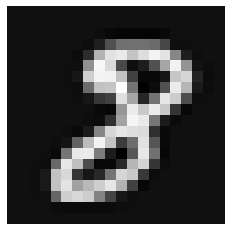

Neural Network Prediction:  [0.] (digit  [0.] )
1422
Displaying Example Image


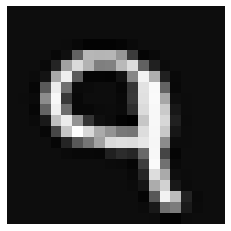

Neural Network Prediction:  [0.] (digit  [0.] )
1423
Displaying Example Image


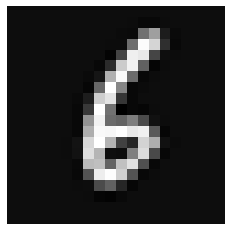

Neural Network Prediction:  [0.] (digit  [0.] )
1424
Displaying Example Image


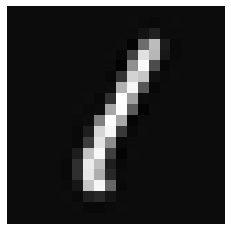

Neural Network Prediction:  [0.] (digit  [0.] )
1425
Displaying Example Image


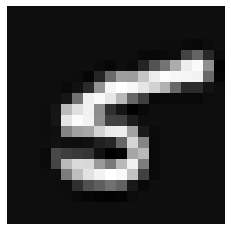

Neural Network Prediction:  [0.] (digit  [0.] )
1426
Displaying Example Image


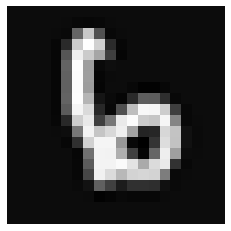

Neural Network Prediction:  [0.] (digit  [0.] )
1427
Displaying Example Image


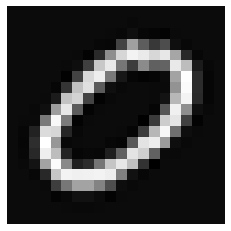

Neural Network Prediction:  [0.] (digit  [0.] )
1428
Displaying Example Image


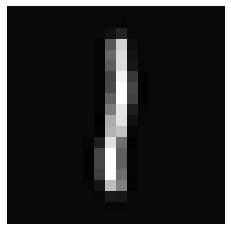

Neural Network Prediction:  [0.] (digit  [0.] )
1429
Displaying Example Image


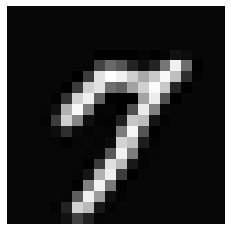

Neural Network Prediction:  [0.] (digit  [0.] )
1430
Displaying Example Image


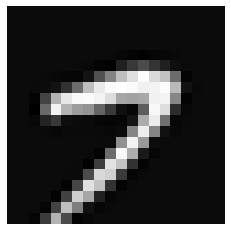

Neural Network Prediction:  [0.] (digit  [0.] )
1431
Displaying Example Image


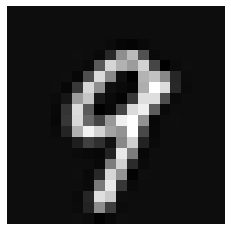

Neural Network Prediction:  [0.] (digit  [0.] )
1432
Displaying Example Image


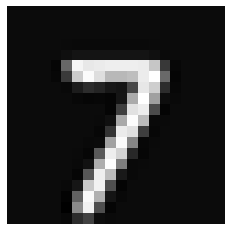

Neural Network Prediction:  [0.] (digit  [0.] )
1433
Displaying Example Image


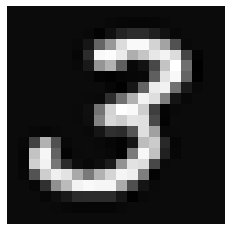

Neural Network Prediction:  [0.] (digit  [0.] )
1434
Displaying Example Image


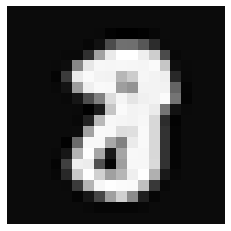

Neural Network Prediction:  [0.] (digit  [0.] )
1435
Displaying Example Image


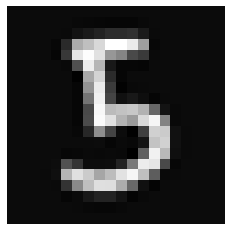

Neural Network Prediction:  [0.] (digit  [0.] )
1436
Displaying Example Image


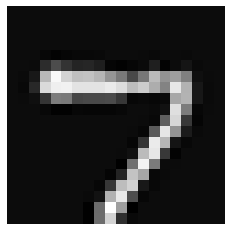

Neural Network Prediction:  [0.] (digit  [0.] )
1437
Displaying Example Image


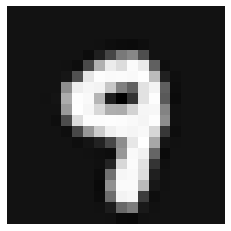

Neural Network Prediction:  [0.] (digit  [0.] )
1438
Displaying Example Image


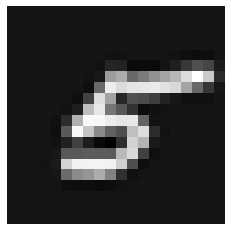

Neural Network Prediction:  [0.] (digit  [0.] )
1439
Displaying Example Image


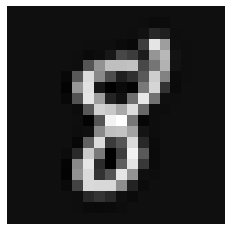

Neural Network Prediction:  [0.] (digit  [0.] )
1440
Displaying Example Image


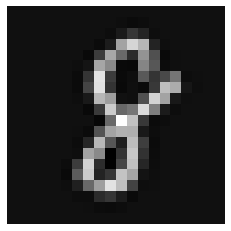

Neural Network Prediction:  [0.] (digit  [0.] )
1441
Displaying Example Image


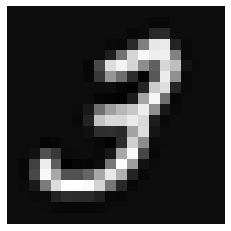

Neural Network Prediction:  [0.] (digit  [0.] )
1442
Displaying Example Image


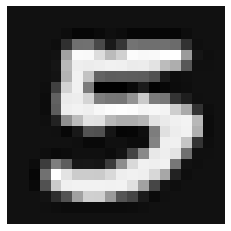

Neural Network Prediction:  [0.] (digit  [0.] )
1443
Displaying Example Image


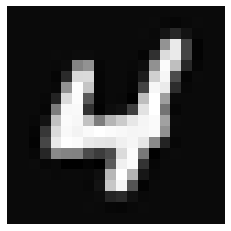

Neural Network Prediction:  [0.] (digit  [0.] )
1444
Displaying Example Image


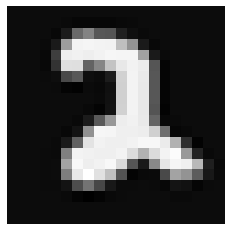

Neural Network Prediction:  [0.] (digit  [0.] )
1445
Displaying Example Image


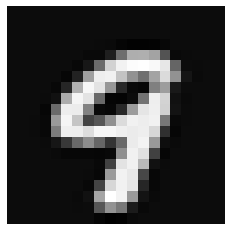

Neural Network Prediction:  [0.] (digit  [0.] )
1446
Displaying Example Image


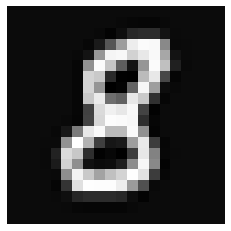

Neural Network Prediction:  [0.] (digit  [0.] )
1447
Displaying Example Image


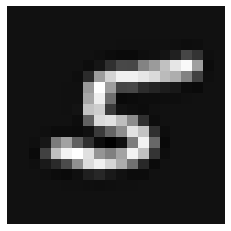

Neural Network Prediction:  [0.] (digit  [0.] )
1448
Displaying Example Image


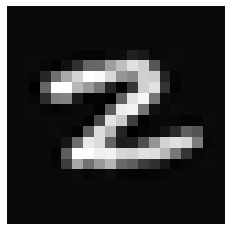

Neural Network Prediction:  [0.] (digit  [0.] )
1449
Displaying Example Image


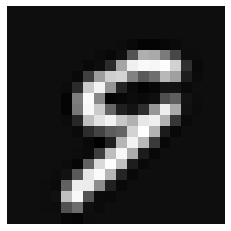

Neural Network Prediction:  [0.] (digit  [0.] )
1450
Displaying Example Image


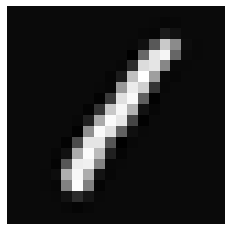

Neural Network Prediction:  [0.] (digit  [0.] )
1451
Displaying Example Image


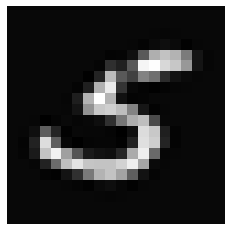

Neural Network Prediction:  [0.] (digit  [0.] )
1452
Displaying Example Image


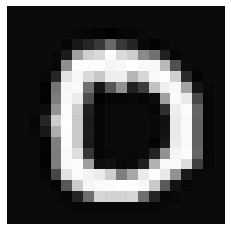

Neural Network Prediction:  [0.] (digit  [0.] )
1453
Displaying Example Image


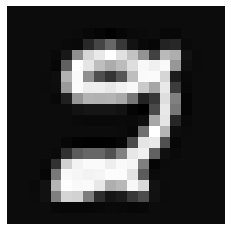

Neural Network Prediction:  [0.] (digit  [0.] )
1454
Displaying Example Image


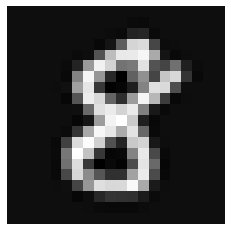

Neural Network Prediction:  [0.] (digit  [0.] )
1455
Displaying Example Image


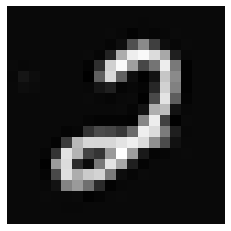

Neural Network Prediction:  [0.] (digit  [0.] )
1456
Displaying Example Image


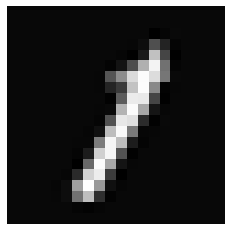

Neural Network Prediction:  [0.] (digit  [0.] )
1457
Displaying Example Image


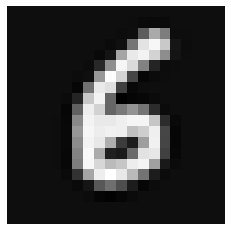

Neural Network Prediction:  [0.] (digit  [0.] )
1458
Displaying Example Image


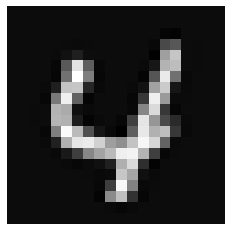

Neural Network Prediction:  [0.] (digit  [0.] )
1459
Displaying Example Image


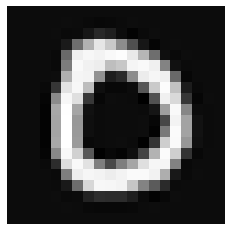

Neural Network Prediction:  [0.] (digit  [0.] )
1460
Displaying Example Image


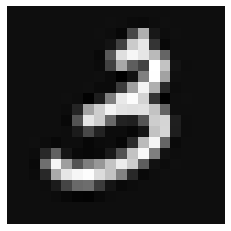

Neural Network Prediction:  [0.] (digit  [0.] )
1461
Displaying Example Image


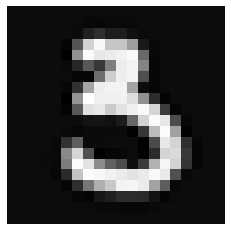

Neural Network Prediction:  [0.] (digit  [0.] )
1462
Displaying Example Image


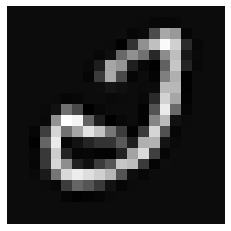

Neural Network Prediction:  [0.] (digit  [0.] )
1463
Displaying Example Image


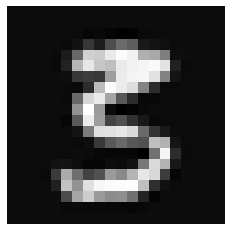

Neural Network Prediction:  [0.] (digit  [0.] )
1464
Displaying Example Image


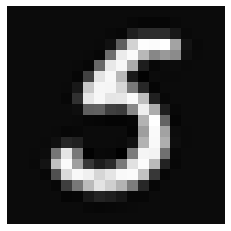

Neural Network Prediction:  [0.] (digit  [0.] )
1465
Displaying Example Image


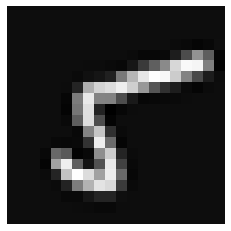

Neural Network Prediction:  [0.] (digit  [0.] )
1466
Displaying Example Image


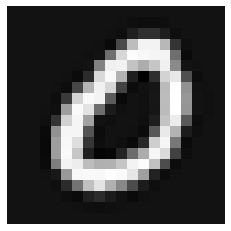

Neural Network Prediction:  [0.] (digit  [0.] )
1467
Displaying Example Image


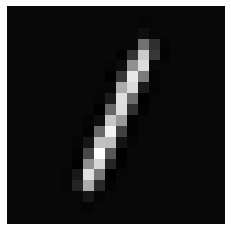

Neural Network Prediction:  [0.] (digit  [0.] )
1468
Displaying Example Image


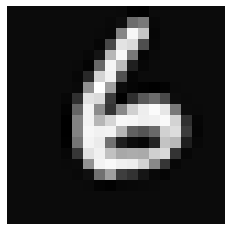

Neural Network Prediction:  [0.] (digit  [0.] )
1469
Displaying Example Image


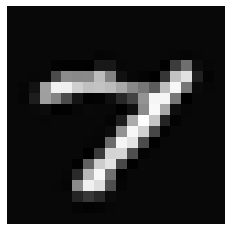

Neural Network Prediction:  [0.] (digit  [0.] )
1470
Displaying Example Image


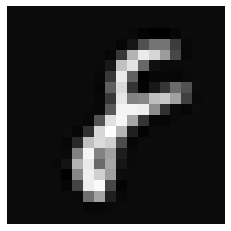

Neural Network Prediction:  [0.] (digit  [0.] )
1471
Displaying Example Image


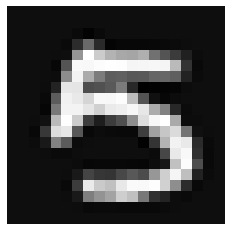

Neural Network Prediction:  [0.] (digit  [0.] )
1472
Displaying Example Image


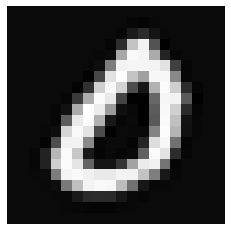

Neural Network Prediction:  [0.] (digit  [0.] )
1473
Displaying Example Image


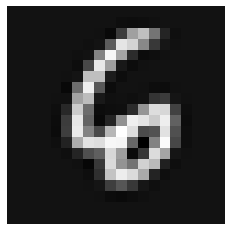

Neural Network Prediction:  [0.] (digit  [0.] )
1474
Displaying Example Image


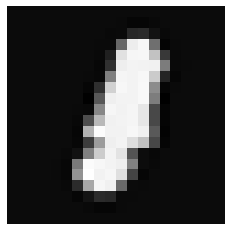

Neural Network Prediction:  [0.] (digit  [0.] )
1475
Displaying Example Image


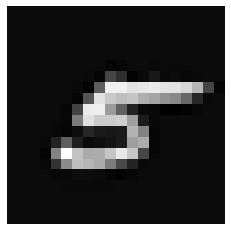

Neural Network Prediction:  [0.] (digit  [0.] )
1476
Displaying Example Image


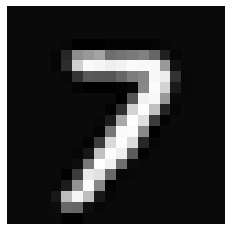

Neural Network Prediction:  [0.] (digit  [0.] )
1477
Displaying Example Image


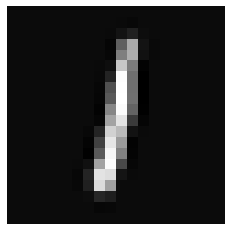

Neural Network Prediction:  [0.] (digit  [0.] )
1478
Displaying Example Image


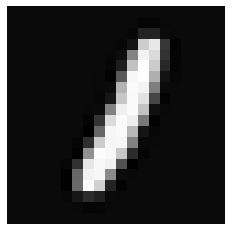

Neural Network Prediction:  [0.] (digit  [0.] )
1479
Displaying Example Image


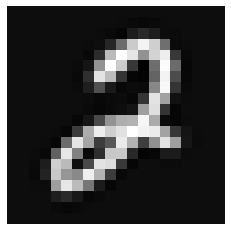

Neural Network Prediction:  [0.] (digit  [0.] )
1480
Displaying Example Image


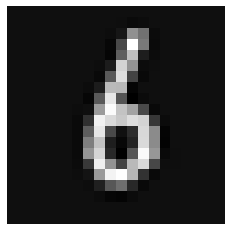

Neural Network Prediction:  [0.] (digit  [0.] )
1481
Displaying Example Image


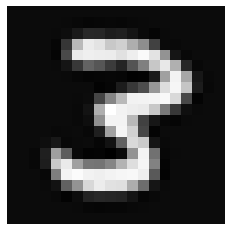

Neural Network Prediction:  [0.] (digit  [0.] )
1482
Displaying Example Image


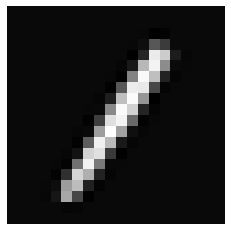

Neural Network Prediction:  [0.] (digit  [0.] )
1483
Displaying Example Image


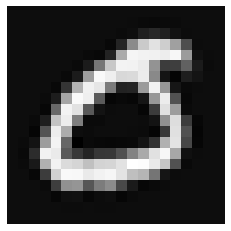

Neural Network Prediction:  [0.] (digit  [0.] )
1484
Displaying Example Image


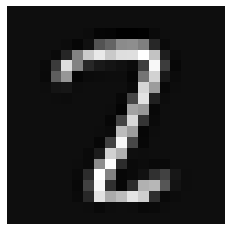

Neural Network Prediction:  [0.] (digit  [0.] )
1485
Displaying Example Image


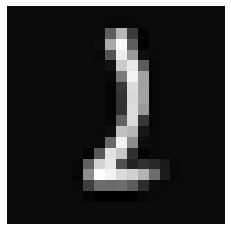

Neural Network Prediction:  [0.] (digit  [0.] )
1486
Displaying Example Image


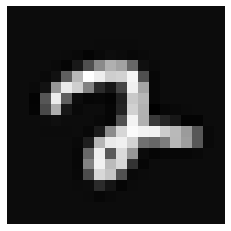

Neural Network Prediction:  [0.] (digit  [0.] )
1487
Displaying Example Image


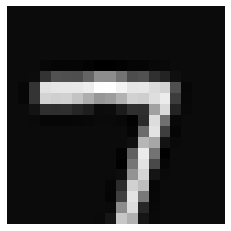

Neural Network Prediction:  [0.] (digit  [0.] )
1488
Displaying Example Image


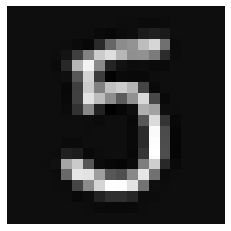

Neural Network Prediction:  [0.] (digit  [0.] )
1489
Displaying Example Image


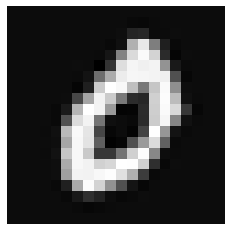

Neural Network Prediction:  [0.] (digit  [0.] )
1490
Displaying Example Image


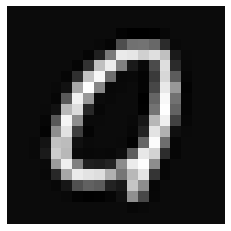

Neural Network Prediction:  [0.] (digit  [0.] )
1491
Displaying Example Image


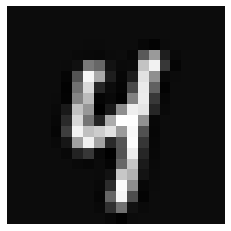

Neural Network Prediction:  [0.] (digit  [0.] )
1492
Displaying Example Image


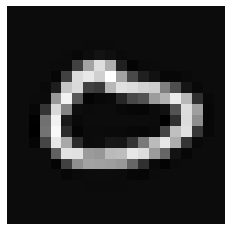

Neural Network Prediction:  [0.] (digit  [0.] )
1493
Displaying Example Image


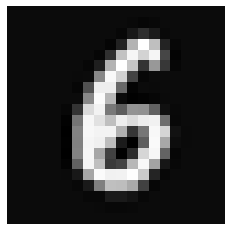

Neural Network Prediction:  [0.] (digit  [0.] )
1494
Displaying Example Image


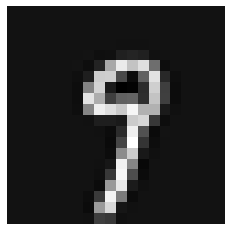

Neural Network Prediction:  [0.] (digit  [0.] )
1495
Displaying Example Image


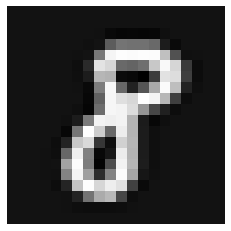

Neural Network Prediction:  [0.] (digit  [0.] )
1496
Displaying Example Image


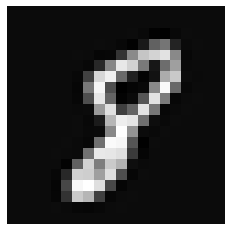

Neural Network Prediction:  [0.] (digit  [0.] )
1497
Displaying Example Image


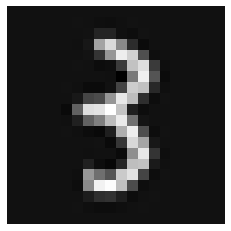

Neural Network Prediction:  [0.] (digit  [0.] )
1498
Displaying Example Image


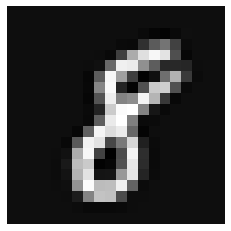

Neural Network Prediction:  [0.] (digit  [0.] )
1499
Displaying Example Image


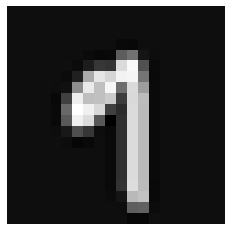

Neural Network Prediction:  [0.] (digit  [0.] )
1500
Displaying Example Image


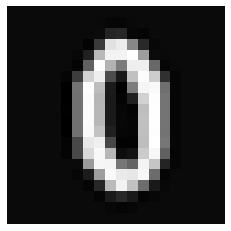

Neural Network Prediction:  [0.] (digit  [0.] )
1501
Displaying Example Image


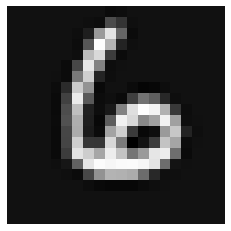

Neural Network Prediction:  [0.] (digit  [0.] )
1502
Displaying Example Image


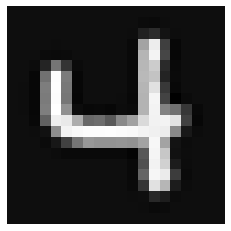

Neural Network Prediction:  [0.] (digit  [0.] )
1503
Displaying Example Image


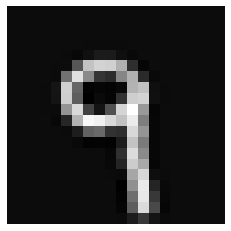

Neural Network Prediction:  [0.] (digit  [0.] )
1504
Displaying Example Image


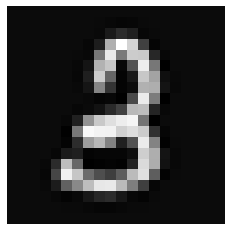

Neural Network Prediction:  [0.] (digit  [0.] )
1505
Displaying Example Image


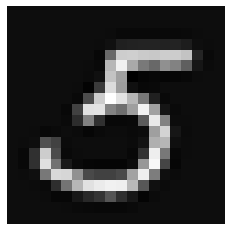

Neural Network Prediction:  [0.] (digit  [0.] )
1506
Displaying Example Image


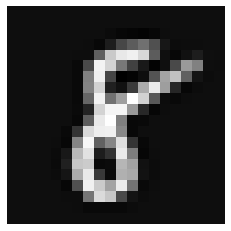

Neural Network Prediction:  [0.] (digit  [0.] )
1507
Displaying Example Image


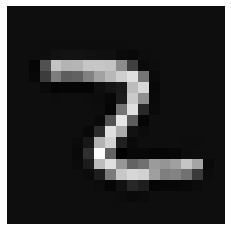

Neural Network Prediction:  [0.] (digit  [0.] )
1508
Displaying Example Image


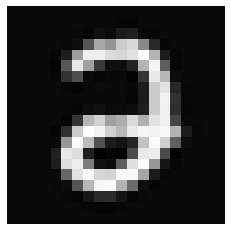

Neural Network Prediction:  [0.] (digit  [0.] )
1509
Displaying Example Image


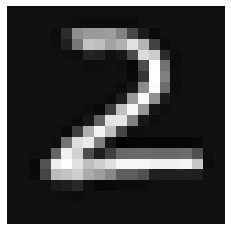

Neural Network Prediction:  [0.] (digit  [0.] )
1510
Displaying Example Image


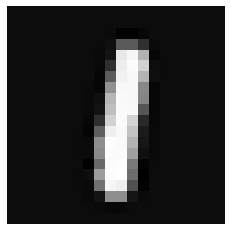

Neural Network Prediction:  [0.] (digit  [0.] )
1511
Displaying Example Image


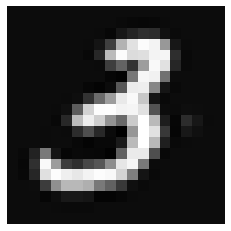

Neural Network Prediction:  [0.] (digit  [0.] )
1512
Displaying Example Image


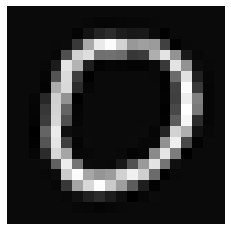

Neural Network Prediction:  [0.] (digit  [0.] )
1513
Displaying Example Image


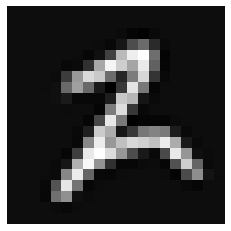

Neural Network Prediction:  [0.] (digit  [0.] )
1514
Displaying Example Image


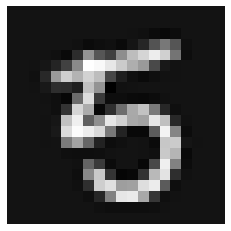

Neural Network Prediction:  [0.] (digit  [0.] )
1515
Displaying Example Image


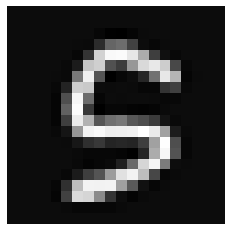

Neural Network Prediction:  [0.] (digit  [0.] )
1516
Displaying Example Image


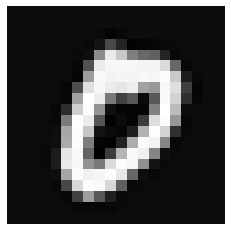

Neural Network Prediction:  [0.] (digit  [0.] )
1517
Displaying Example Image


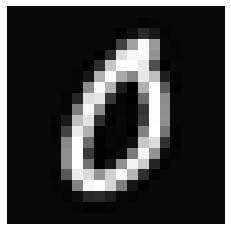

Neural Network Prediction:  [0.] (digit  [0.] )
1518
Displaying Example Image


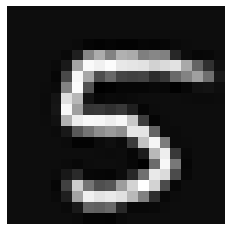

Neural Network Prediction:  [0.] (digit  [0.] )
1519
Displaying Example Image


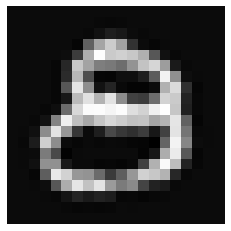

Neural Network Prediction:  [0.] (digit  [0.] )
1520
Displaying Example Image


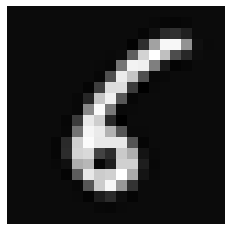

Neural Network Prediction:  [0.] (digit  [0.] )
1521
Displaying Example Image


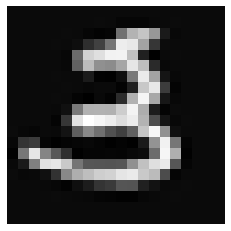

Neural Network Prediction:  [0.] (digit  [0.] )
1522
Displaying Example Image


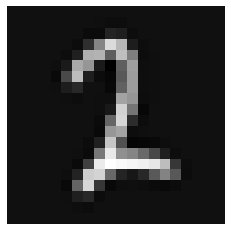

Neural Network Prediction:  [0.] (digit  [0.] )
1523
Displaying Example Image


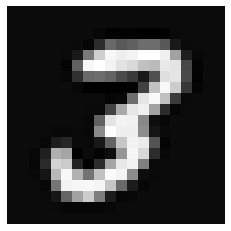

Neural Network Prediction:  [0.] (digit  [0.] )
1524
Displaying Example Image


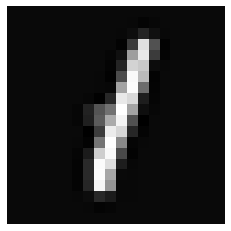

Neural Network Prediction:  [0.] (digit  [0.] )
1525
Displaying Example Image


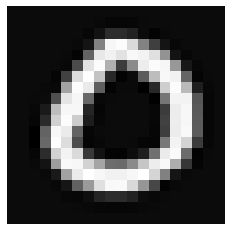

Neural Network Prediction:  [0.] (digit  [0.] )
1526
Displaying Example Image


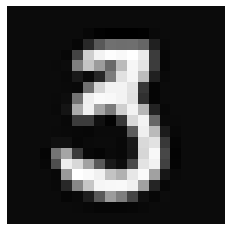

Neural Network Prediction:  [0.] (digit  [0.] )
1527
Displaying Example Image


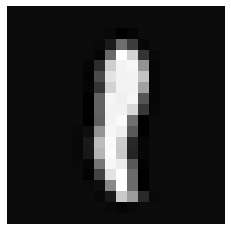

Neural Network Prediction:  [0.] (digit  [0.] )
1528
Displaying Example Image


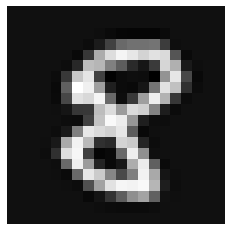

Neural Network Prediction:  [0.] (digit  [0.] )
1529
Displaying Example Image


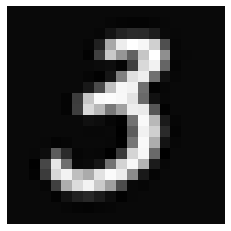

Neural Network Prediction:  [0.] (digit  [0.] )
1530
Displaying Example Image


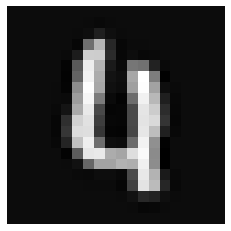

Neural Network Prediction:  [0.] (digit  [0.] )
1531
Displaying Example Image


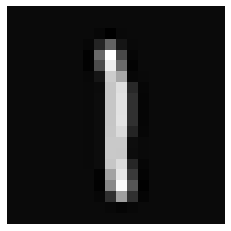

Neural Network Prediction:  [0.] (digit  [0.] )
1532
Displaying Example Image


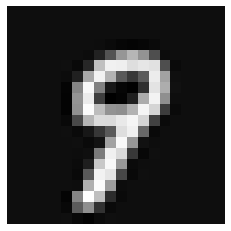

Neural Network Prediction:  [0.] (digit  [0.] )
1533
Displaying Example Image


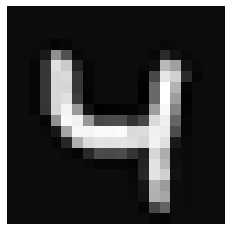

Neural Network Prediction:  [0.] (digit  [0.] )
1534
Displaying Example Image


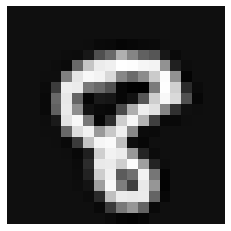

Neural Network Prediction:  [0.] (digit  [0.] )
1535
Displaying Example Image


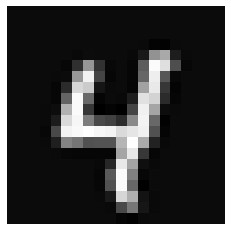

Neural Network Prediction:  [0.] (digit  [0.] )
1536
Displaying Example Image


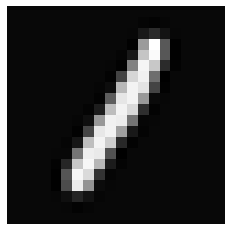

Neural Network Prediction:  [0.] (digit  [0.] )
1537
Displaying Example Image


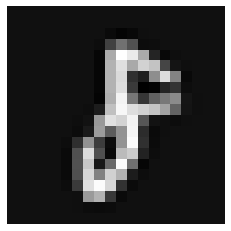

Neural Network Prediction:  [0.] (digit  [0.] )
1538
Displaying Example Image


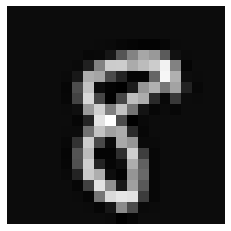

Neural Network Prediction:  [0.] (digit  [0.] )
1539
Displaying Example Image


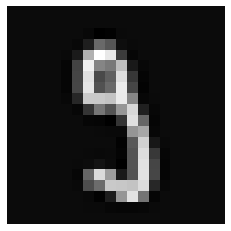

Neural Network Prediction:  [0.] (digit  [0.] )
1540
Displaying Example Image


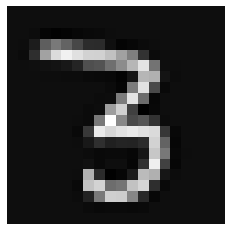

Neural Network Prediction:  [0.] (digit  [0.] )
1541
Displaying Example Image


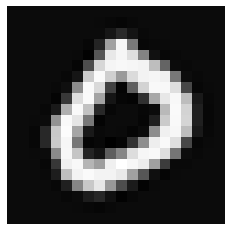

Neural Network Prediction:  [0.] (digit  [0.] )
1542
Displaying Example Image


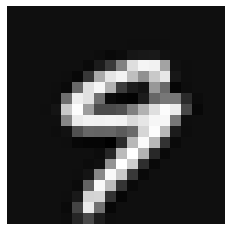

Neural Network Prediction:  [0.] (digit  [0.] )
1543
Displaying Example Image


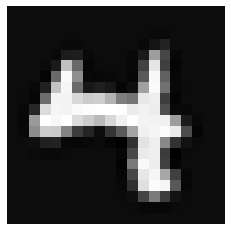

Neural Network Prediction:  [0.] (digit  [0.] )
1544
Displaying Example Image


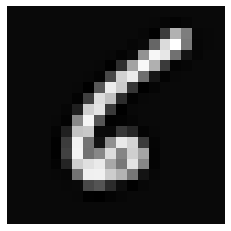

Neural Network Prediction:  [0.] (digit  [0.] )
1545
Displaying Example Image


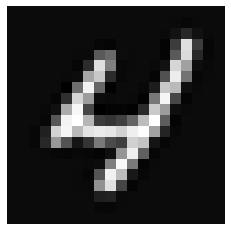

Neural Network Prediction:  [0.] (digit  [0.] )
1546
Displaying Example Image


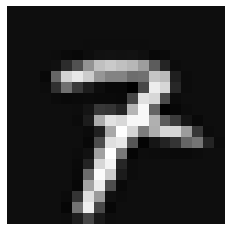

Neural Network Prediction:  [0.] (digit  [0.] )
1547
Displaying Example Image


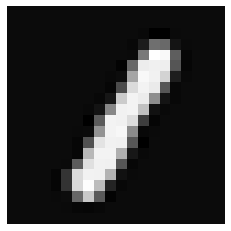

Neural Network Prediction:  [0.] (digit  [0.] )
1548
Displaying Example Image


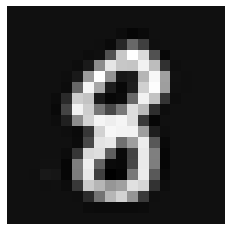

Neural Network Prediction:  [0.] (digit  [0.] )
1549
Displaying Example Image


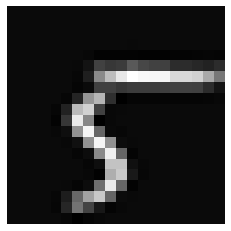

Neural Network Prediction:  [0.] (digit  [0.] )
1550
Displaying Example Image


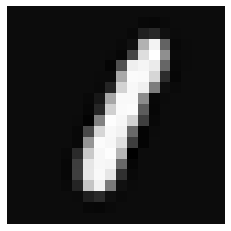

Neural Network Prediction:  [0.] (digit  [0.] )
1551
Displaying Example Image


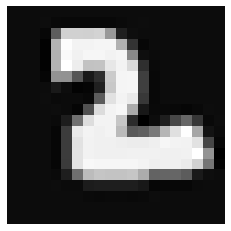

Neural Network Prediction:  [0.] (digit  [0.] )
1552
Displaying Example Image


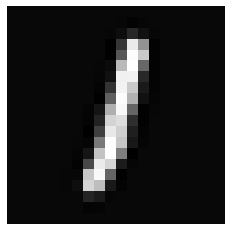

Neural Network Prediction:  [0.] (digit  [0.] )
1553
Displaying Example Image


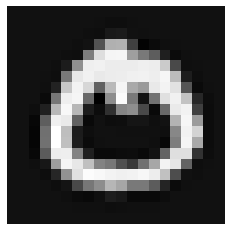

Neural Network Prediction:  [0.] (digit  [0.] )
1554
Displaying Example Image


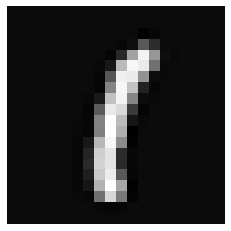

Neural Network Prediction:  [0.] (digit  [0.] )
1555
Displaying Example Image


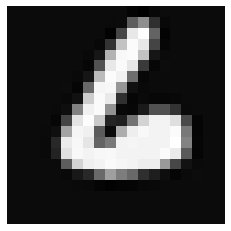

Neural Network Prediction:  [0.] (digit  [0.] )
1556
Displaying Example Image


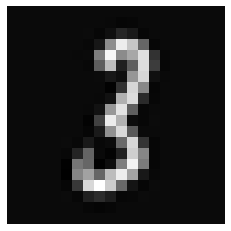

Neural Network Prediction:  [0.] (digit  [0.] )
1557
Displaying Example Image


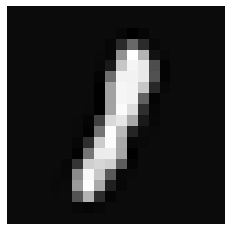

Neural Network Prediction:  [0.] (digit  [0.] )
1558
Displaying Example Image


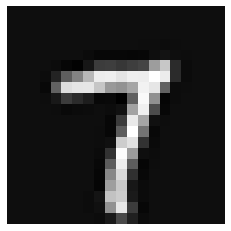

Neural Network Prediction:  [0.] (digit  [0.] )
1559
Displaying Example Image


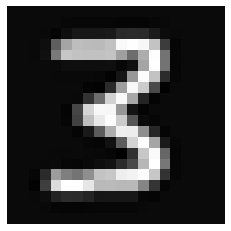

Neural Network Prediction:  [0.] (digit  [0.] )
1560
Displaying Example Image


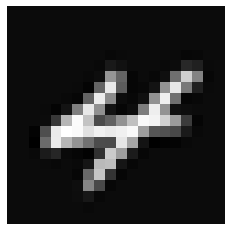

Neural Network Prediction:  [0.] (digit  [0.] )
1561
Displaying Example Image


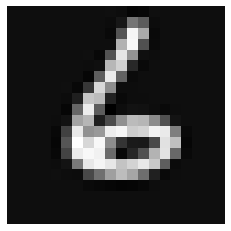

Neural Network Prediction:  [0.] (digit  [0.] )
1562
Displaying Example Image


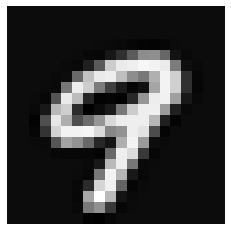

Neural Network Prediction:  [0.] (digit  [0.] )
1563
Displaying Example Image


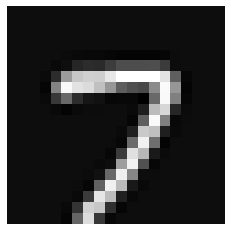

Neural Network Prediction:  [0.] (digit  [0.] )
1564
Displaying Example Image


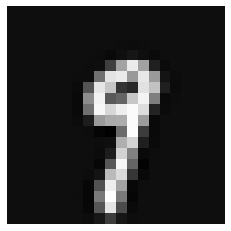

Neural Network Prediction:  [0.] (digit  [0.] )
1565
Displaying Example Image


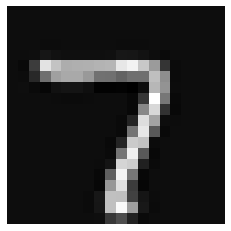

Neural Network Prediction:  [0.] (digit  [0.] )
1566
Displaying Example Image


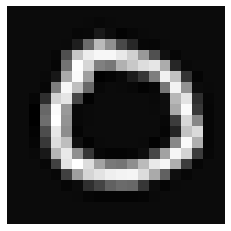

Neural Network Prediction:  [0.] (digit  [0.] )
1567
Displaying Example Image


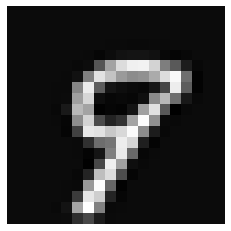

Neural Network Prediction:  [0.] (digit  [0.] )
1568
Displaying Example Image


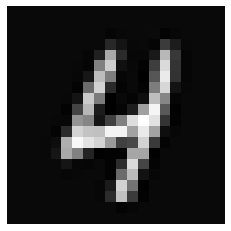

Neural Network Prediction:  [0.] (digit  [0.] )
1569
Displaying Example Image


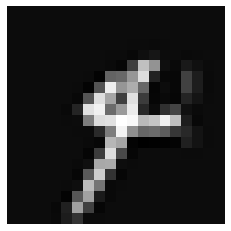

Neural Network Prediction:  [0.] (digit  [0.] )
1570
Displaying Example Image


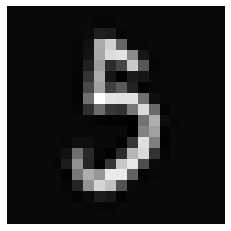

Neural Network Prediction:  [0.] (digit  [0.] )
1571
Displaying Example Image


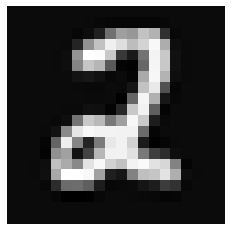

Neural Network Prediction:  [0.] (digit  [0.] )
1572
Displaying Example Image


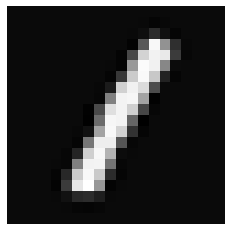

Neural Network Prediction:  [0.] (digit  [0.] )
1573
Displaying Example Image


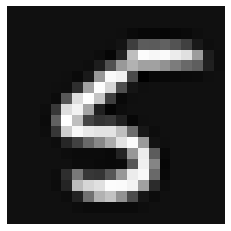

Neural Network Prediction:  [0.] (digit  [0.] )
1574
Displaying Example Image


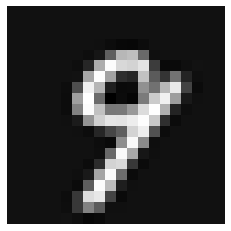

Neural Network Prediction:  [0.] (digit  [0.] )
1575
Displaying Example Image


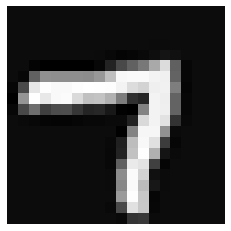

Neural Network Prediction:  [0.] (digit  [0.] )
1576
Displaying Example Image


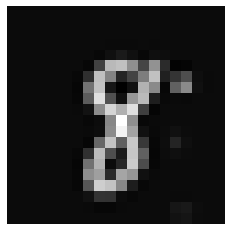

Neural Network Prediction:  [0.] (digit  [0.] )
1577
Displaying Example Image


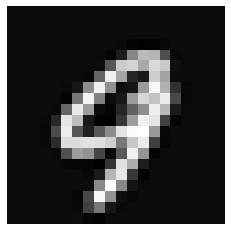

Neural Network Prediction:  [0.] (digit  [0.] )
1578
Displaying Example Image


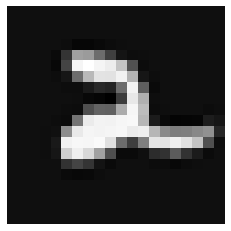

Neural Network Prediction:  [0.] (digit  [0.] )
1579
Displaying Example Image


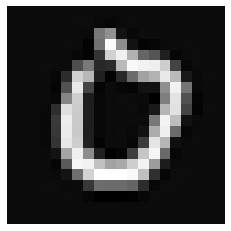

Neural Network Prediction:  [0.] (digit  [0.] )
1580
Displaying Example Image


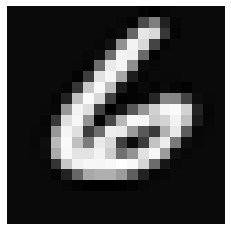

Neural Network Prediction:  [0.] (digit  [0.] )
1581
Displaying Example Image


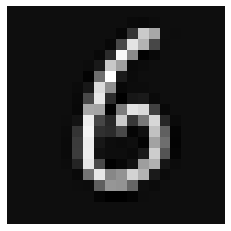

Neural Network Prediction:  [0.] (digit  [0.] )
1582
Displaying Example Image


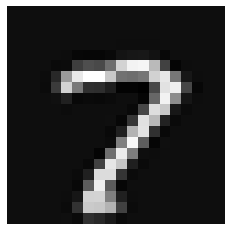

Neural Network Prediction:  [0.] (digit  [0.] )
1583
Displaying Example Image


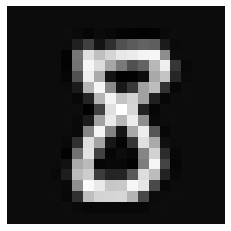

Neural Network Prediction:  [0.] (digit  [0.] )
1584
Displaying Example Image


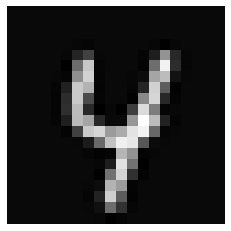

Neural Network Prediction:  [0.] (digit  [0.] )
1585
Displaying Example Image


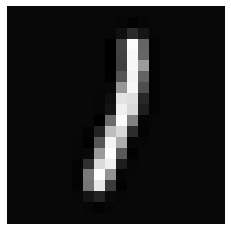

Neural Network Prediction:  [0.] (digit  [0.] )
1586
Displaying Example Image


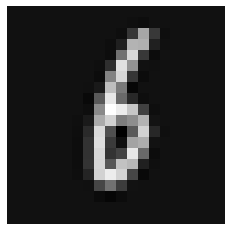

Neural Network Prediction:  [0.] (digit  [0.] )
1587
Displaying Example Image


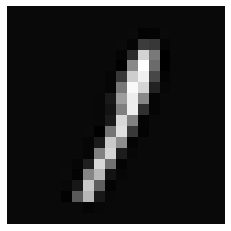

Neural Network Prediction:  [0.] (digit  [0.] )
1588
Displaying Example Image


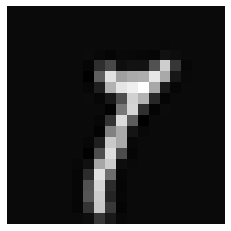

Neural Network Prediction:  [0.] (digit  [0.] )
1589
Displaying Example Image


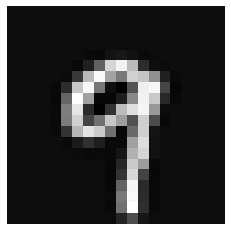

Neural Network Prediction:  [0.] (digit  [0.] )
1590
Displaying Example Image


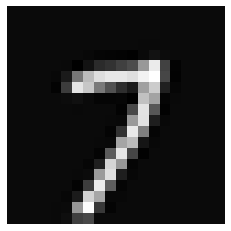

Neural Network Prediction:  [0.] (digit  [0.] )
1591
Displaying Example Image


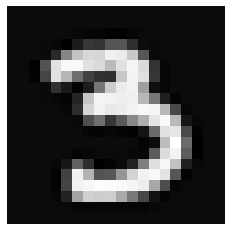

Neural Network Prediction:  [0.] (digit  [0.] )
1592
Displaying Example Image


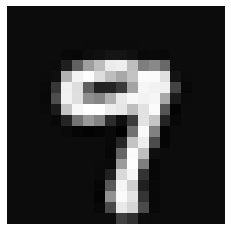

Neural Network Prediction:  [0.] (digit  [0.] )
1593
Displaying Example Image


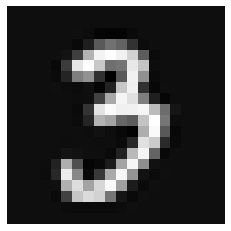

Neural Network Prediction:  [0.] (digit  [0.] )
1594
Displaying Example Image


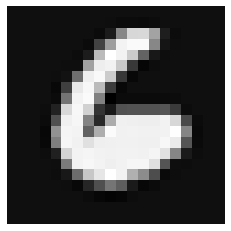

Neural Network Prediction:  [0.] (digit  [0.] )
1595
Displaying Example Image


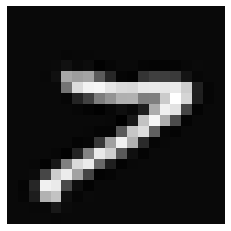

Neural Network Prediction:  [0.] (digit  [0.] )
1596
Displaying Example Image


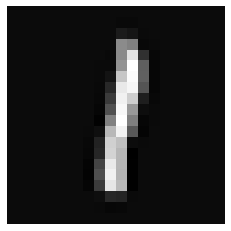

Neural Network Prediction:  [0.] (digit  [0.] )
1597
Displaying Example Image


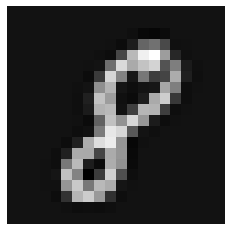

Neural Network Prediction:  [0.] (digit  [0.] )
1598
Displaying Example Image


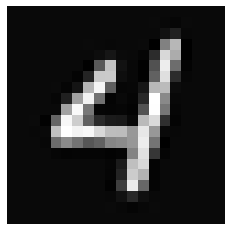

Neural Network Prediction:  [0.] (digit  [0.] )
1599
Displaying Example Image


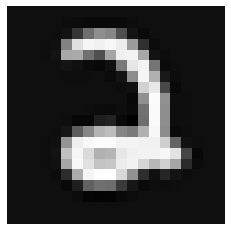

Neural Network Prediction:  [0.] (digit  [0.] )
1600
Displaying Example Image


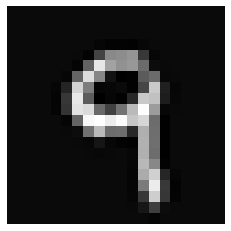

Neural Network Prediction:  [0.] (digit  [0.] )
1601
Displaying Example Image


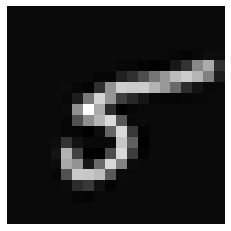

Neural Network Prediction:  [0.] (digit  [0.] )
1602
Displaying Example Image


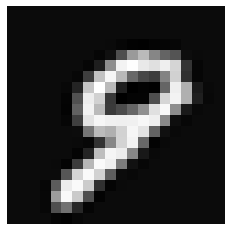

Neural Network Prediction:  [0.] (digit  [0.] )
1603
Displaying Example Image


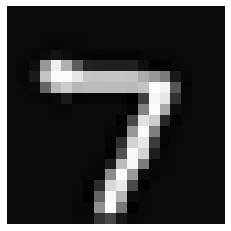

Neural Network Prediction:  [0.] (digit  [0.] )
1604
Displaying Example Image


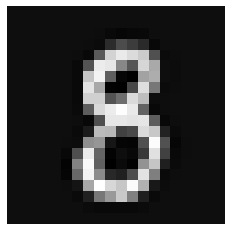

Neural Network Prediction:  [0.] (digit  [0.] )
1605
Displaying Example Image


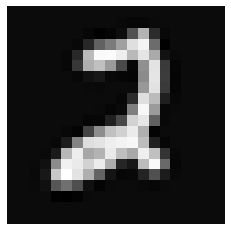

Neural Network Prediction:  [0.] (digit  [0.] )
1606
Displaying Example Image


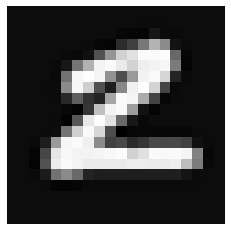

Neural Network Prediction:  [0.] (digit  [0.] )
1607
Displaying Example Image


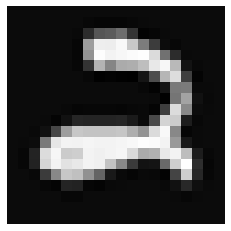

Neural Network Prediction:  [0.] (digit  [0.] )
1608
Displaying Example Image


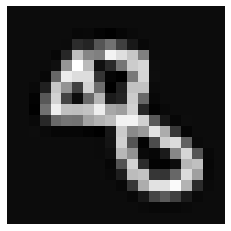

Neural Network Prediction:  [0.] (digit  [0.] )
1609
Displaying Example Image


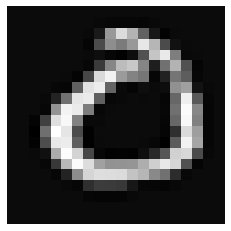

Neural Network Prediction:  [0.] (digit  [0.] )
1610
Displaying Example Image


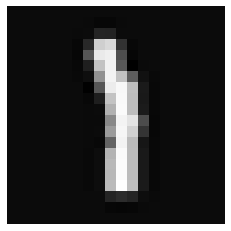

Neural Network Prediction:  [0.] (digit  [0.] )
1611
Displaying Example Image


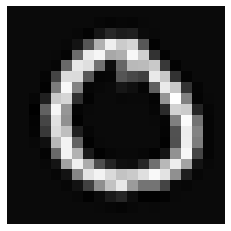

Neural Network Prediction:  [0.] (digit  [0.] )
1612
Displaying Example Image


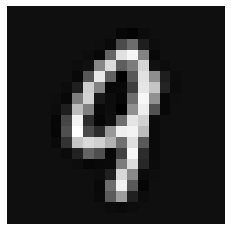

Neural Network Prediction:  [0.] (digit  [0.] )
1613
Displaying Example Image


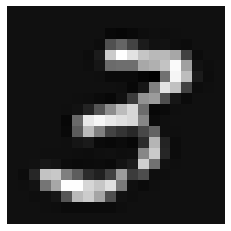

Neural Network Prediction:  [0.] (digit  [0.] )
1614
Displaying Example Image


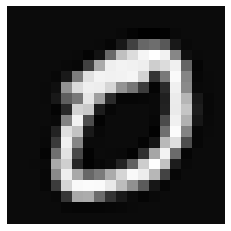

Neural Network Prediction:  [0.] (digit  [0.] )
1615
Displaying Example Image


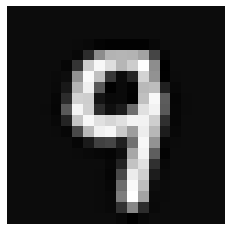

Neural Network Prediction:  [0.] (digit  [0.] )
1616
Displaying Example Image


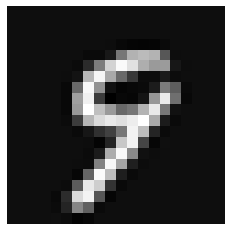

Neural Network Prediction:  [0.] (digit  [0.] )
1617
Displaying Example Image


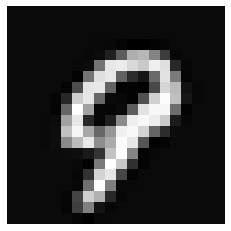

Neural Network Prediction:  [0.] (digit  [0.] )
1618
Displaying Example Image


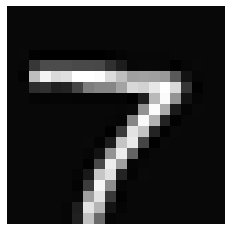

Neural Network Prediction:  [0.] (digit  [0.] )
1619
Displaying Example Image


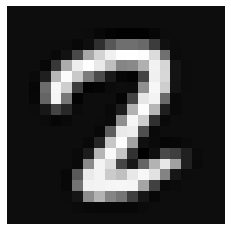

Neural Network Prediction:  [0.] (digit  [0.] )
1620
Displaying Example Image


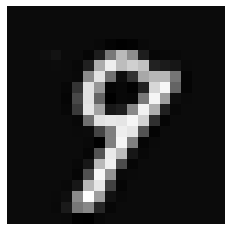

Neural Network Prediction:  [0.] (digit  [0.] )
1621
Displaying Example Image


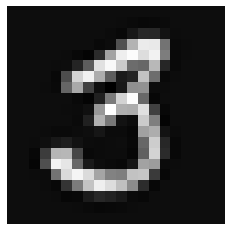

Neural Network Prediction:  [0.] (digit  [0.] )
1622
Displaying Example Image


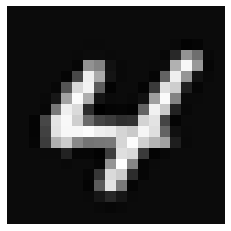

Neural Network Prediction:  [0.] (digit  [0.] )
1623
Displaying Example Image


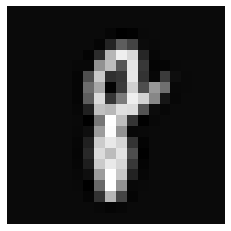

Neural Network Prediction:  [0.] (digit  [0.] )
1624
Displaying Example Image


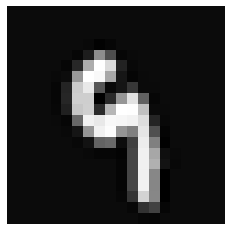

Neural Network Prediction:  [0.] (digit  [0.] )
1625
Displaying Example Image


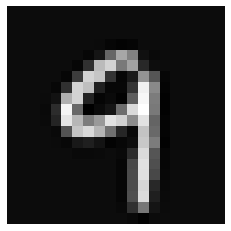

Neural Network Prediction:  [0.] (digit  [0.] )
1626
Displaying Example Image


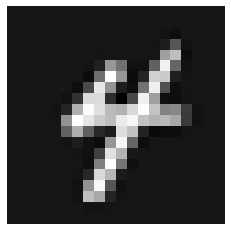

Neural Network Prediction:  [0.] (digit  [0.] )
1627
Displaying Example Image


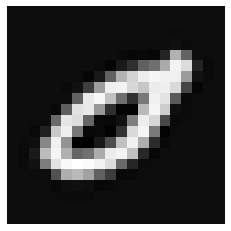

Neural Network Prediction:  [0.] (digit  [0.] )
1628
Displaying Example Image


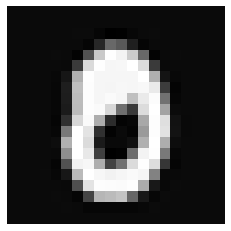

Neural Network Prediction:  [0.] (digit  [0.] )
1629
Displaying Example Image


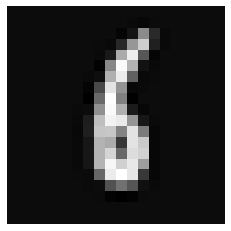

Neural Network Prediction:  [0.] (digit  [0.] )
1630
Displaying Example Image


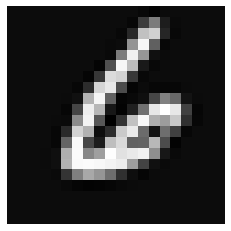

Neural Network Prediction:  [0.] (digit  [0.] )
1631
Displaying Example Image


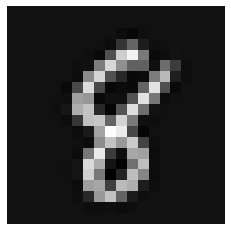

Neural Network Prediction:  [0.] (digit  [0.] )
1632
Displaying Example Image


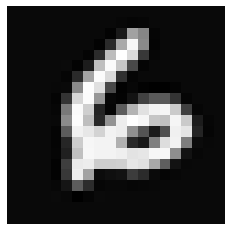

Neural Network Prediction:  [0.] (digit  [0.] )
1633
Displaying Example Image


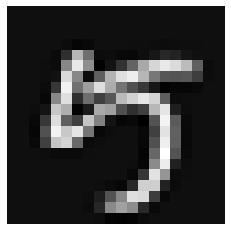

Neural Network Prediction:  [0.] (digit  [0.] )
1634
Displaying Example Image


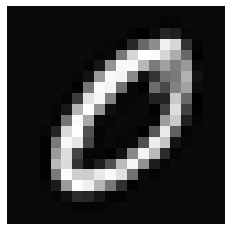

Neural Network Prediction:  [0.] (digit  [0.] )
1635
Displaying Example Image


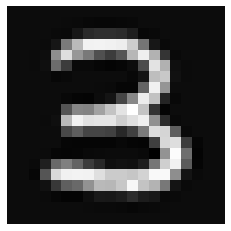

Neural Network Prediction:  [0.] (digit  [0.] )
1636
Displaying Example Image


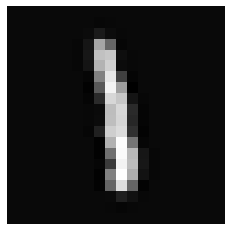

Neural Network Prediction:  [0.] (digit  [0.] )
1637
Displaying Example Image


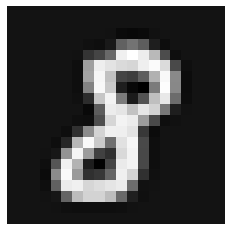

Neural Network Prediction:  [0.] (digit  [0.] )
1638
Displaying Example Image


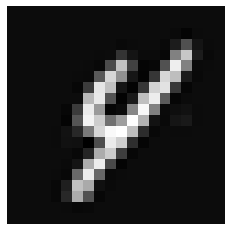

Neural Network Prediction:  [0.] (digit  [0.] )
1639
Displaying Example Image


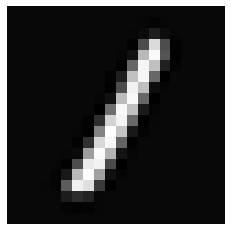

Neural Network Prediction:  [0.] (digit  [0.] )
1640
Displaying Example Image


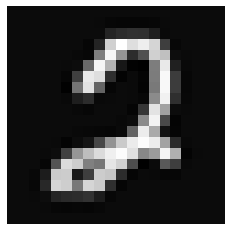

Neural Network Prediction:  [0.] (digit  [0.] )
1641
Displaying Example Image


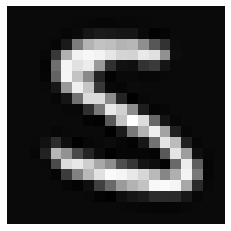

Neural Network Prediction:  [0.] (digit  [0.] )
1642
Displaying Example Image


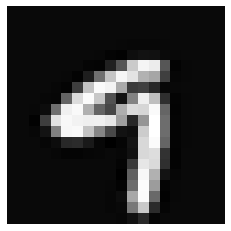

Neural Network Prediction:  [0.] (digit  [0.] )
1643
Displaying Example Image


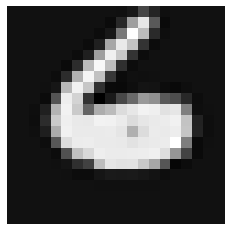

Neural Network Prediction:  [0.] (digit  [0.] )
1644
Displaying Example Image


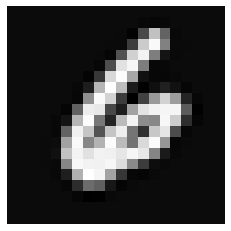

Neural Network Prediction:  [0.] (digit  [0.] )
1645
Displaying Example Image


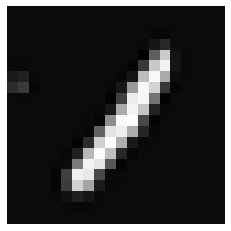

Neural Network Prediction:  [0.] (digit  [0.] )
1646
Displaying Example Image


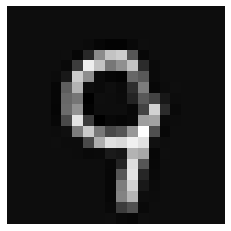

Neural Network Prediction:  [0.] (digit  [0.] )
1647
Displaying Example Image


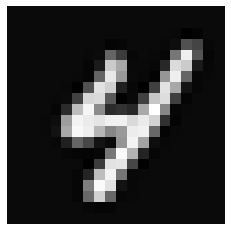

Neural Network Prediction:  [0.] (digit  [0.] )
1648
Displaying Example Image


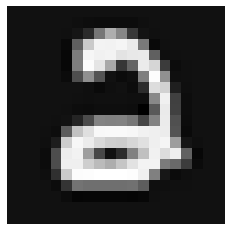

Neural Network Prediction:  [0.] (digit  [0.] )
1649
Displaying Example Image


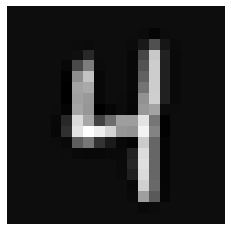

Neural Network Prediction:  [0.] (digit  [0.] )
1650
Displaying Example Image


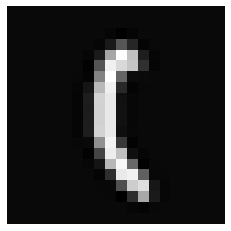

Neural Network Prediction:  [0.] (digit  [0.] )
1651
Displaying Example Image


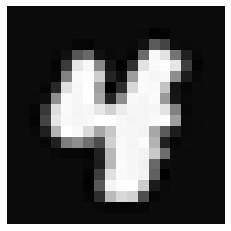

Neural Network Prediction:  [0.] (digit  [0.] )
1652
Displaying Example Image


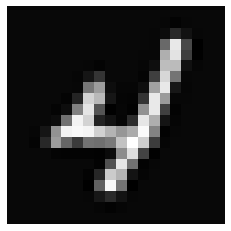

Neural Network Prediction:  [0.] (digit  [0.] )
1653
Displaying Example Image


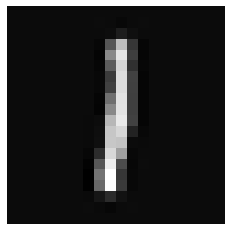

Neural Network Prediction:  [0.] (digit  [0.] )
1654
Displaying Example Image


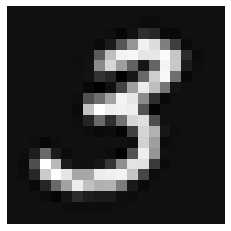

Neural Network Prediction:  [0.] (digit  [0.] )
1655
Displaying Example Image


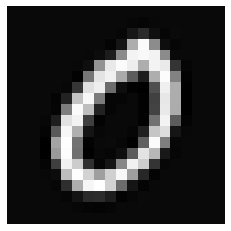

Neural Network Prediction:  [0.] (digit  [0.] )
1656
Displaying Example Image


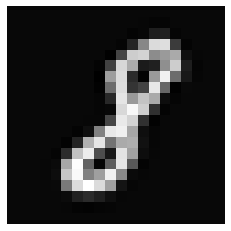

Neural Network Prediction:  [0.] (digit  [0.] )
1657
Displaying Example Image


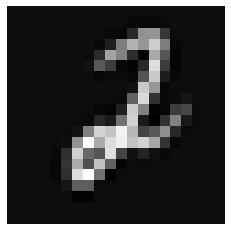

Neural Network Prediction:  [0.] (digit  [0.] )
1658
Displaying Example Image


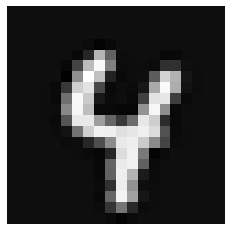

Neural Network Prediction:  [0.] (digit  [0.] )
1659
Displaying Example Image


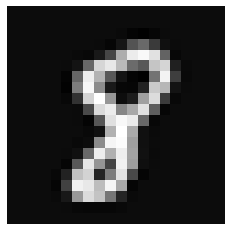

Neural Network Prediction:  [0.] (digit  [0.] )
1660
Displaying Example Image


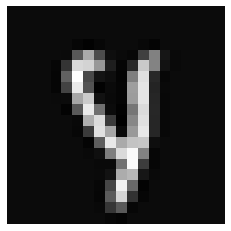

Neural Network Prediction:  [0.] (digit  [0.] )
1661
Displaying Example Image


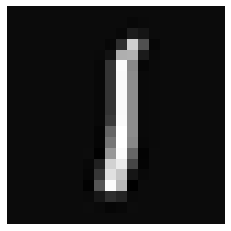

Neural Network Prediction:  [0.] (digit  [0.] )
1662
Displaying Example Image


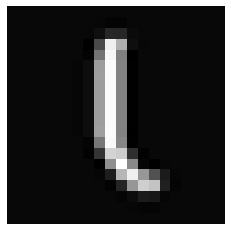

Neural Network Prediction:  [0.] (digit  [0.] )
1663
Displaying Example Image


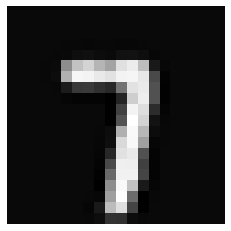

Neural Network Prediction:  [0.] (digit  [0.] )
1664
Displaying Example Image


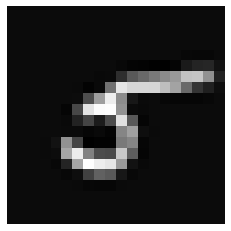

Neural Network Prediction:  [0.] (digit  [0.] )
1665
Displaying Example Image


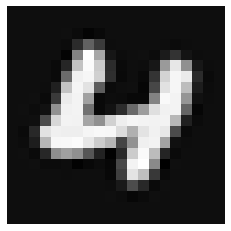

Neural Network Prediction:  [0.] (digit  [0.] )
1666
Displaying Example Image


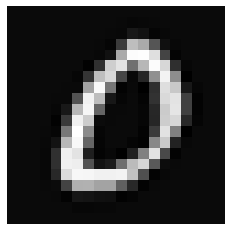

Neural Network Prediction:  [0.] (digit  [0.] )
1667
Displaying Example Image


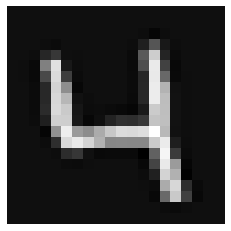

Neural Network Prediction:  [0.] (digit  [0.] )
1668
Displaying Example Image


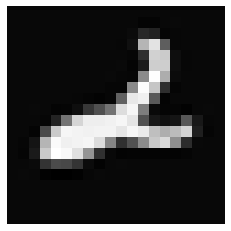

Neural Network Prediction:  [0.] (digit  [0.] )
1669
Displaying Example Image


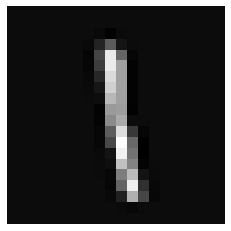

Neural Network Prediction:  [0.] (digit  [0.] )
1670
Displaying Example Image


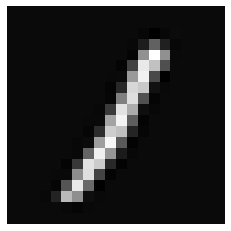

Neural Network Prediction:  [0.] (digit  [0.] )
1671
Displaying Example Image


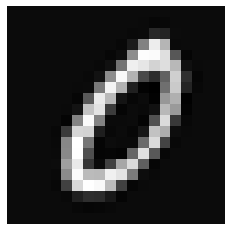

Neural Network Prediction:  [0.] (digit  [0.] )
1672
Displaying Example Image


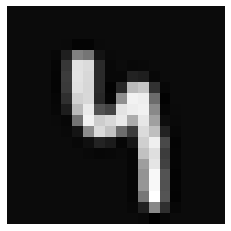

Neural Network Prediction:  [0.] (digit  [0.] )
1673
Displaying Example Image


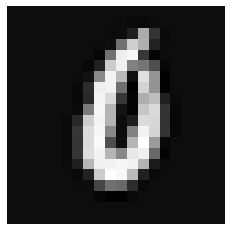

Neural Network Prediction:  [0.] (digit  [0.] )
1674
Displaying Example Image


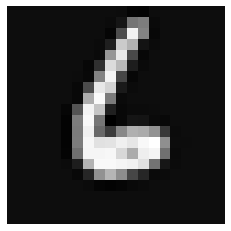

Neural Network Prediction:  [0.] (digit  [0.] )
1675
Displaying Example Image


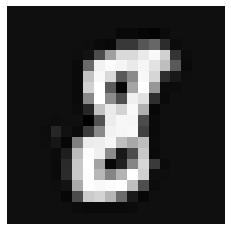

Neural Network Prediction:  [0.] (digit  [0.] )
1676
Displaying Example Image


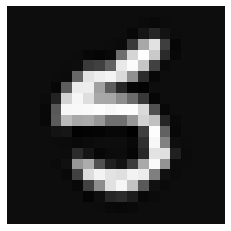

Neural Network Prediction:  [0.] (digit  [0.] )
1677
Displaying Example Image


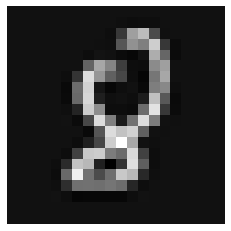

Neural Network Prediction:  [0.] (digit  [0.] )
1678
Displaying Example Image


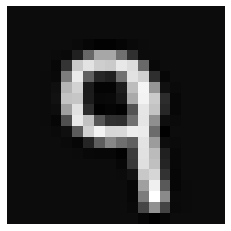

Neural Network Prediction:  [0.] (digit  [0.] )
1679
Displaying Example Image


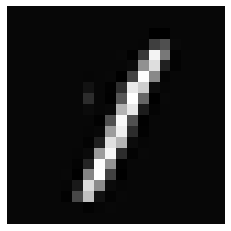

Neural Network Prediction:  [0.] (digit  [0.] )
1680
Displaying Example Image


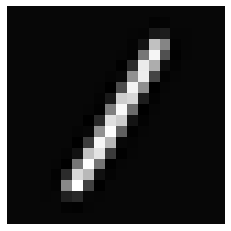

Neural Network Prediction:  [0.] (digit  [0.] )
1681
Displaying Example Image


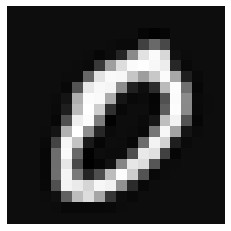

Neural Network Prediction:  [0.] (digit  [0.] )
1682
Displaying Example Image


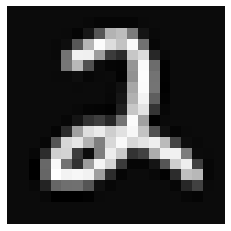

Neural Network Prediction:  [0.] (digit  [0.] )
1683
Displaying Example Image


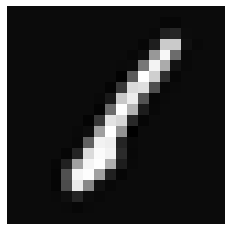

Neural Network Prediction:  [0.] (digit  [0.] )
1684
Displaying Example Image


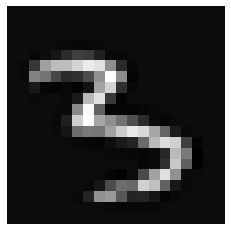

Neural Network Prediction:  [0.] (digit  [0.] )
1685
Displaying Example Image


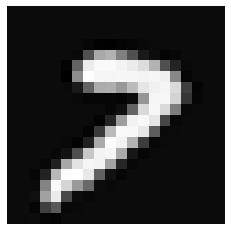

Neural Network Prediction:  [0.] (digit  [0.] )
1686
Displaying Example Image


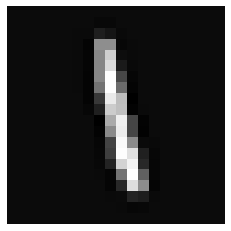

Neural Network Prediction:  [0.] (digit  [0.] )
1687
Displaying Example Image


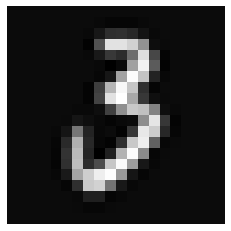

Neural Network Prediction:  [0.] (digit  [0.] )
1688
Displaying Example Image


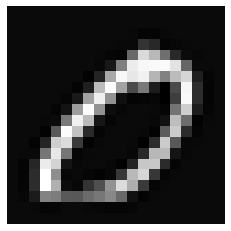

Neural Network Prediction:  [0.] (digit  [0.] )
1689
Displaying Example Image


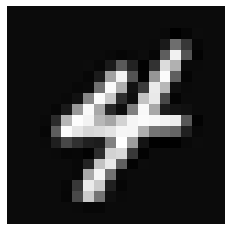

Neural Network Prediction:  [0.] (digit  [0.] )
1690
Displaying Example Image


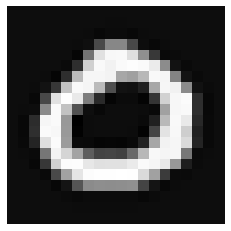

Neural Network Prediction:  [0.] (digit  [0.] )
1691
Displaying Example Image


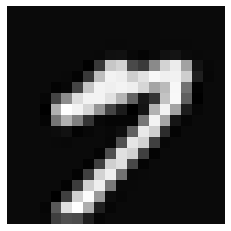

Neural Network Prediction:  [0.] (digit  [0.] )
1692
Displaying Example Image


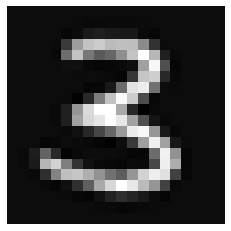

Neural Network Prediction:  [0.] (digit  [0.] )
1693
Displaying Example Image


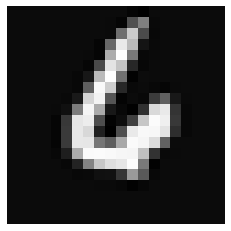

Neural Network Prediction:  [0.] (digit  [0.] )
1694
Displaying Example Image


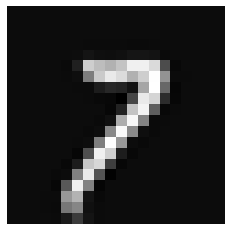

Neural Network Prediction:  [0.] (digit  [0.] )
1695
Displaying Example Image


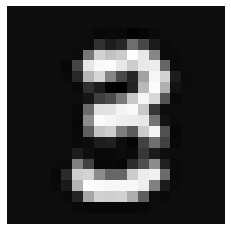

Neural Network Prediction:  [0.] (digit  [0.] )
1696
Displaying Example Image


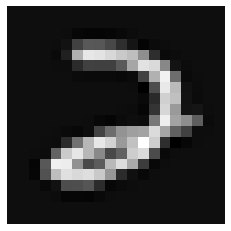

Neural Network Prediction:  [0.] (digit  [0.] )
1697
Displaying Example Image


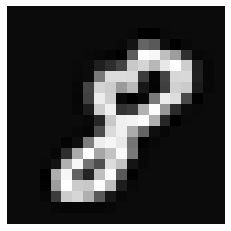

Neural Network Prediction:  [0.] (digit  [0.] )
1698
Displaying Example Image


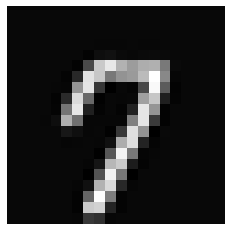

Neural Network Prediction:  [0.] (digit  [0.] )
1699
Displaying Example Image


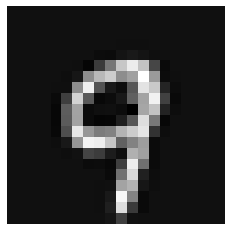

Neural Network Prediction:  [0.] (digit  [0.] )
1700
Displaying Example Image


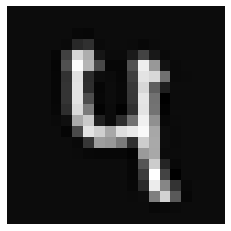

Neural Network Prediction:  [0.] (digit  [0.] )
1701
Displaying Example Image


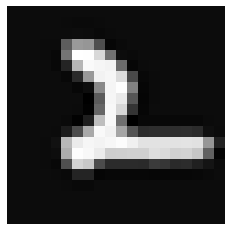

Neural Network Prediction:  [0.] (digit  [0.] )
1702
Displaying Example Image


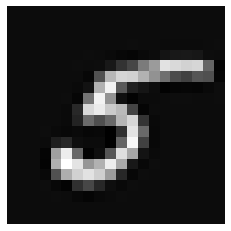

Neural Network Prediction:  [0.] (digit  [0.] )
1703
Displaying Example Image


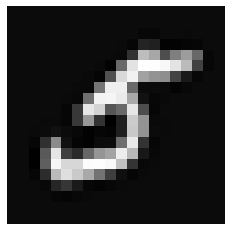

Neural Network Prediction:  [0.] (digit  [0.] )
1704
Displaying Example Image


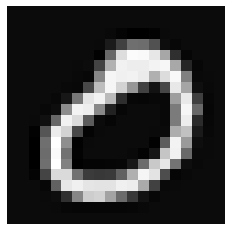

In [ ]:
#  Randomly permute examples
rp = np.random.permutation(m)

for i in range(m):
    print(i)
    # Display 
    print('Displaying Example Image')
    tmp = np.transpose(np.expand_dims(X[rp[i], :], axis=1))
    displayData(tmp)

    pred = predict(Theta1, Theta2, tmp)
    print('Neural Network Prediction: ', pred, '(digit ', pred%10, ')')

# ================ Part 4: Sigmoid Gradient  ================
Before you start implementing backpropagation, you will first implement the gradient for the sigmoid function. You should complete the code in the sigmoidGradient.m file.

In [ ]:
print('Evaluating sigmoid gradient...')
example = np.array([-15, -1, -0.5, 0, 0.5, 1, 15])
g = sigmoidGradient(example)
print('Sigmoid gradient evaluated at', example, ':')
print(g)

# ================ Part 5: Initializing Pameters ================
To learn a two layer neural network that classifies digits. You will start by implementing a function to initialize the weights of the neural network (randInitializeWeights.py)

In [ ]:
print('Initializing Neural Network Parameters ...')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_Theta1 = np.reshape(initial_Theta1, initial_Theta1.size, order='F')
initial_Theta2 = np.reshape(initial_Theta2, initial_Theta2.size, order='F')
initial_nn_params = np.hstack((initial_Theta1, initial_Theta2))
print(initial_nn_params)

# =============== Part 6: Implement Backpropagation ===============
Now you will implement the backpropagation algorithm for the neural network. You should add code to nnCostFunction.m to return the partial derivatives of the parameters.

In [ ]:
print('Checking Backpropagation...')

#  Check gradients by running checkNNGradients
checkNNGradients()

# =============== Part 7: Implement Regularization ===============
Once your backpropagation implementation is correct, you should now continue to implement the regularization gradient.

In [ ]:
print('Checking Backpropagation (w/ Regularization) ... ')

##  Check gradients by running checkNNGradients
lambda_value = 3
checkNNGradients(lambda_value)

# Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, 
                          num_labels, X, y, lambda_value)

print('Cost at (fixed) debugging parameters (w/ lambda = 10): ',  debug_J[0][0], 
      '(this value should be about 0.576051)')

# =================== Part 8: Training NN ===================
You have now implemented all the code necessary to train a neural network. To train your neural network, we will now use "fmincg", which is a function which works similarly to "fminunc". Recall that these advanced optimizers are able to train our cost functions efficiently as long as we provide them with the gradient computations.

In [ ]:
print('Training Neural Network...')

#  After you have completed the assignment, change the MaxIter to a larger
#  value to see how more training helps.
MaxIter = 150

#  You should also try different values of lambda
lambda_value = 1

# Create "short hand" for the cost function to be minimized
y = np.expand_dims(y, axis=1)

costFunction = lambda p : nnCostFunction(p, input_layer_size, hidden_layer_size, 
                                         num_labels, X, y, lambda_value)

# Now, costFunction is a function that takes in only one argument (the
# neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, MaxIter)

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[0:hidden_layer_size * (input_layer_size + 1)], 
                              (hidden_layer_size, (input_layer_size + 1)), order='F')
Theta2 = np.reshape(nn_params[((hidden_layer_size * (input_layer_size + 1))):],
                              (num_labels, (hidden_layer_size + 1)), order='F')

# ================= Part 9: Visualize Weights =================
You can now "visualize" what the neural network is learning by displaying the hidden units to see what features they are capturing in the data.

In [ ]:
print('\nVisualizing Neural Network... \n')

displayData(Theta1[:, 1:])

# ============= Part 10: Predicting with learned weights =======
After training the neural network, we would like to use it to predict the labels. The already implemented "predict" function is used by neural network to predict the labels of the training set. This letsyou compute the training set accuracy.

In [ ]:
pred = predict(Theta1, Theta2, X)
pred = np.expand_dims(pred,axis=1)
print('Training Set Accuracy: ', (pred == y).mean()*100)